<a href="https://colab.research.google.com/github/DB9653/Bachelorarbeit/blob/main/TM_H19_Annotation_ConfusionMatrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from functools import reduce


### Predictions 

In [ ]:
train_h19_pred_ge18 = pd.read_excel('/content/TrainH19PredGE18.xlsx')


In [ ]:
train_h19_pred_ge19 = pd.read_excel('/content/TrainH19PredGE19.xlsx')


In [ ]:
train_h19_pred_h19 = pd.read_excel('/content/TrainH19PredH19.xlsx')


In [ ]:
train_h19_pred_h20 = pd.read_excel('/content/TrainH19PredH20.xlsx')


### Testdaten

In [ ]:
ge18_test_raw = pd.read_csv('/content/germeval2018test.txt', sep='\t', 
                              encoding='UTF-8', quoting=csv.QUOTE_NONE, names=('TWEET', 'OFF', 'CAT'))

In [ ]:
ge19_test_raw = pd.read_csv('germeval2019GoldLabelsSubtask1_2.txt', sep='\t', 
                                        encoding='UTF-8', names=['TWEET', 'OFF', 'CAT'])

In [ ]:
h19_test_raw = pd.read_csv('hasoc_de_test_gold.tsv', sep='\t', encoding='UTF-8')


In [ ]:
h20_test_raw = pd.read_csv('hasoc20test_improved.csv', sep=',', encoding='UTF-8')


### kurzer Check

In [ ]:
train_h19_pred_ge18

index   0
0         0   9
1         1   7
2         2  -1
3         3  -1
4         4  18
...     ...  ..
3527   3527   0
3528   3528  -1
3529   3529   0
3530   3530  -1
3531   3531  -1

[3532 rows x 2 columns]

In [ ]:
train_h19_pred_ge19

index   0
0         0   2
1         1  -1
2         2   5
3         3   2
4         4  -1
...     ...  ..
3026   3026  44
3027   3027  15
3028   3028  -1
3029   3029   2
3030   3030  -1

[3031 rows x 2 columns]

In [ ]:
train_h19_pred_h19

index   0
0        0   5
1        1   6
2        2   3
3        3  -1
4        4  -1
..     ...  ..
845    845  -1
846    846  13
847    847  -1
848    848  -1
849    849  10

[850 rows x 2 columns]

In [ ]:
train_h19_pred_h20

index   0
0        0  -1
1        1  36
2        2  -1
3        3  -1
4        4   0
..     ...  ..
521    521  -1
522    522   4
523    523  -1
524    524   2
525    525   4

[526 rows x 2 columns]

### Model-Topics

In [ ]:
train_h19_model_topics = pd.read_excel('/content/Train H19 Model Topics.xlsx')
train_h19_model_topics

index  Topic  Count                                               Name
0       0     -1   1486                       -1_deutschland_immer_spd_afd
1       1      0    367                          0_vögel_danke_wünsche_nix
2       2      1    169                  1_demokratie_wahl_parteien_partei
3       3      2    121                        2_hass_respekt_lügt_meinung
4       4      3    118                           3_erster_energie_the_och
5       5      4    103                            4_grünen_grüne_grün_rot
6       6      5     79                    5_kirchen_kirche_religion_geist
7       7      6     74            6_deutschland_deutschen_deutsche_berlin
8       8      7     71                     7_muslime_moslems_akbar_allahu
9       9      8     69             8_flüchtlinge_migranten_asyl_migration
10     10      9     69          9_vergewaltigt_mädchen_jährige_nigerianer
11     11     10     59                  10_kinder_schule_volkslehrer_kind
12     12     11     56         11_medien_journalisten_journalismus_presse
13     13     12     48                  12_tweet_twitter_account_twittern
14     14     13     45              13_essen_fressen_frosch_gammelfleisch
15     15     14     42        14_polizisten_polizei_abschiebungen_beamten
16     16     15     40     15_mitarbeiter_betroffen_mitarbeitern_schließt
17     17     16     40                 16_nazis_nazi_braunen_innenstädten
18     18     17     40         17_klimawandel_klima_erwärmung_klimaschutz
19     19     18     38               18_flüchtlinge_deutschland_euro_jahr
20     20     19     31                    19_video_youtube_videos_trailer
21     21     20     29                       20_zeiten_immer_schritt_mohr
22     22     21     27                  21_syrer_syrische_iraker_jährigen
23     23     22     27                   22_strom_autos_auto_elektroautos
24     24     23     27                 23_bilder_bild_editorial_paragraph
25     25     24     26                    24_bendit_cohn_daniel_spieglein
26     26     25     25             25_netz_speichern_speichert_ausgemacht
27     27     26     25           26_rassistisch_weiß_rassismus_anzufangen
28     28     27     24                       27_euro_kredite_audi_bargeld
29     29     28     24                   28_mord_skalpieren_fällt_notwehr
30     30     29     23                29_land_landteil_beginnen_vaterland
31     31     30     23                 30_clans_kriminelle_hinweis_begeht
32     32     31     21          31_italien_salvini_italienische_italiener
33     33     32     20              32_islam_deutschland_muslime_deutsche
34     34     33     20                 33_rebecca_instagram_endlich_sucht
35     35     34     20            34_österreich_europawahl_westen_gewinnt
36     36     35     19            35_afrika_herrenrasse_albert_schweitzer
37     37     36     19      36_merkel_hinterlässt_geigenkonzert_sauereien
38     38     37     19                  37_polizei_berliner_endlich_sucht
39     39     38     19                    38_stadt_straße_ückendorf_einst
40     40     39     17                39_milliarden_rente_rechnungen_robo
41     41     40     17             40_lieber_regierung_fastenbrechen_kern
42     42     41     16        41_propaganda_android_anstrengung_empfohlen
43     43     42     15                      42_hollywood_obm_kino_görlitz
44     44     43     15                          43_teil_satire_lach_humor
45     45     44     15                44_türken_türkei_türkischer_arabien
46     46     45     14      45_darpa_militärische_alliierten_umfangreiche
47     47     46     14             46_berlin_flughafen_amerika_hauptstadt
48     48     47     13           47_sundance_justnobody_löschung_bescheid
49     49     48     13                        48_fußball_liga_zwölf_sport
50     50     49     12  49_sozialismus_marktwirtschaft_soziale_kapital...
51     51     50     12                    50_grünen_deutschland_pro_grüne
52     52     51     12      

### GE18_Test: Predictions an Testdaten-DataFrame

In [ ]:
ge18_test_raw['pred'] = train_h19_pred_ge18[0]
ge18_test_raw

TWEET      OFF    CAT  pred
0     Meine Mutter hat mir erzählt, dass mein Vater ...    OTHER  OTHER     9
1     @Tom174_ @davidbest95 Meine Reaktion; |LBR| Ni...    OTHER  OTHER     7
2     #Merkel rollt dem Emir von #Katar, der islamis...    OTHER  OTHER    -1
3     „Merle ist kein junges unschuldiges Mädchen“ K...    OTHER  OTHER    -1
4     @umweltundaktiv Asylantenflut bringt eben nur ...  OFFENSE  ABUSE    18
...                                                 ...      ...    ...   ...
3527  @schlabonski tja, es können einen nicht alle L...    OTHER  OTHER     0
3528  @RKnillmann @lawyerberlin @AfD Aha, der Islam ...  OFFENSE  ABUSE    -1
3529  @podilein Mannheim, weltoffen und kunterbunt. ...  OFFENSE  ABUSE     0
3530  @stephanweil was ist nun mit kostenlosen Kitas...    OTHER  OTHER    -1
3531  @Bartzissey Denn Minderheiten sind für Linke j...    OTHER  OTHER    -1

[3532 rows x 4 columns]

### GE18_Test: OTHER-Verteilung

In [ ]:
# Topic-Verteilung für 'OTHER'-Tweets
ge18_test_other = ge18_test_raw.loc[ge18_test_raw['OFF'] == 'OTHER']
ge18_test_other


TWEET    OFF    CAT  pred
0     Meine Mutter hat mir erzählt, dass mein Vater ...  OTHER  OTHER     9
1     @Tom174_ @davidbest95 Meine Reaktion; |LBR| Ni...  OTHER  OTHER     7
2     #Merkel rollt dem Emir von #Katar, der islamis...  OTHER  OTHER    -1
3     „Merle ist kein junges unschuldiges Mädchen“ K...  OTHER  OTHER    -1
5     @_StultaMundi Die Bibel enthält ebenfalls Gese...  OTHER  OTHER     5
...                                                 ...    ...    ...   ...
3523  @rspctfl @everlast_fs @m8Flo @BolzAndrea @Inne...  OTHER  OTHER    -1
3524  #Grüne bestehen auf Sanktionen gegen #Russland...  OTHER  OTHER    -1
3527  @schlabonski tja, es können einen nicht alle L...  OTHER  OTHER     0
3530  @stephanweil was ist nun mit kostenlosen Kitas...  OTHER  OTHER    -1
3531  @Bartzissey Denn Minderheiten sind für Linke j...  OTHER  OTHER    -1

[2330 rows x 4 columns]

In [ ]:
ge18_test_other_pred_values = pd.DataFrame(ge18_test_other['pred'].value_counts())
ge18_test_other_pred_values['percent'] = (ge18_test_other_pred_values['pred'] / ge18_test_other_pred_values['pred'].sum()) * 100
ge18_test_other_pred_values

pred    percent
-1   1300  55.793991
 0    298  12.789700
 5     99   4.248927
 1     72   3.090129
 9     57   2.446352
 2     52   2.231760
 12    39   1.673820
 7     35   1.502146
 8     33   1.416309
 4     28   1.201717
 10    22   0.944206
 26    19   0.815451
 6     17   0.729614
 36    17   0.729614
 25    16   0.686695
 28    15   0.643777
 44    14   0.600858
 30    14   0.600858
 29    14   0.600858
 15    14   0.600858
 11    13   0.557940
 39    12   0.515021
 16    11   0.472103
 3      9   0.386266
 23     9   0.386266
 21     8   0.343348
 22     8   0.343348
 17     7   0.300429
 13     7   0.300429
 32     7   0.300429
 14     6   0.257511
 45     6   0.257511
 43     5   0.214592
 38     5   0.214592
 27     4   0.171674
 42     4   0.171674
 20     3   0.128755
 47     3   0.128755
 49     3   0.128755
 19     3   0.128755
 34     3   0.128755
 18     3   0.128755
 40     2   0.085837
 41     2   0.085837
 24     2   0.085837
 48     2   0.085837
 50     2   0.085837
 35     1   0.042918
 46     1   0.042918
 52     1   0.042918
 33     1   0.042918
 31     1   0.042918
 51     1   0.042918

In [ ]:
df1 =  train_h19_model_topics[['Topic','Name']]
ge18_test_other_pred_values['Topic'] = ge18_test_other_pred_values.index
df2 = ge18_test_other_pred_values
data_frames = [df1, df2]
df_GE18_OTHER_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_GE18_OTHER_merged['percent'] = df_GE18_OTHER_merged['percent'].astype(float)

In [ ]:
df_GE18_OTHER_merged['pred'] = df_GE18_OTHER_merged['pred'].astype(int)

In [ ]:
df_GE18_OTHER_sorted = df_GE18_OTHER_merged.sort_values('pred', ascending=False)
df_GE18_OTHER_sorted

Topic                                               Name  pred    percent
0      -1                       -1_deutschland_immer_spd_afd  1300  55.793991
1       0                          0_vögel_danke_wünsche_nix   298  12.789700
6       5                    5_kirchen_kirche_religion_geist    99   4.248927
2       1                  1_demokratie_wahl_parteien_partei    72   3.090129
10      9          9_vergewaltigt_mädchen_jährige_nigerianer    57   2.446352
3       2                        2_hass_respekt_lügt_meinung    52   2.231760
13     12                  12_tweet_twitter_account_twittern    39   1.673820
8       7                     7_muslime_moslems_akbar_allahu    35   1.502146
9       8             8_flüchtlinge_migranten_asyl_migration    33   1.416309
5       4                            4_grünen_grüne_grün_rot    28   1.201717
11     10                  10_kinder_schule_volkslehrer_kind    22   0.944206
27     26           26_rassistisch_weiß_rassismus_anzufangen    19   0.815451
7       6            6_deutschland_deutschen_deutsche_berlin    17   0.729614
37     36      36_merkel_hinterlässt_geigenkonzert_sauereien    17   0.729614
26     25             25_netz_speichern_speichert_ausgemacht    16   0.686695
29     28                   28_mord_skalpieren_fällt_notwehr    15   0.643777
31     30                 30_clans_kriminelle_hinweis_begeht    14   0.600858
30     29                29_land_landteil_beginnen_vaterland    14   0.600858
16     15     15_mitarbeiter_betroffen_mitarbeitern_schließt    14   0.600858
45     44                44_türken_türkei_türkischer_arabien    14   0.600858
12     11         11_medien_journalisten_journalismus_presse    13   0.557940
40     39                39_milliarden_rente_rechnungen_robo    12   0.515021
17     16                 16_nazis_nazi_braunen_innenstädten    11   0.472103
24     23                 23_bilder_bild_editorial_paragraph     9   0.386266
4       3                           3_erster_energie_the_och     9   0.386266
23     22                   22_strom_autos_auto_elektroautos     8   0.343348
22     21                  21_syrer_syrische_iraker_jährigen     8   0.343348
18     17         17_klimawandel_klima_erwärmung_klimaschutz     7   0.300429
14     13              13_essen_fressen_frosch_gammelfleisch     7   0.300429
33     32              32_islam_deutschland_muslime_deutsche     7   0.300429
46     45      45_darpa_militärische_alliierten_umfangreiche     6   0.257511
15     14        14_polizisten_polizei_abschiebungen_beamten     6   0.257511
44     43                          43_teil_satire_lach_humor     5   0.214592
39     38                    38_stadt_straße_ückendorf_einst     5   0.214592
43     42                      42_hollywood_obm_kino_görlitz     4   0.171674
28     27                       27_euro_kredite_audi_bargeld     4   0.171674
19     18               18_flüchtlinge_deutschland_euro_jahr     3   0.128755
21     20                       20_zeiten_immer_schritt_mohr     3   0.128755
20     19                    19_video_youtube_videos_trailer     3   0.128755
35     34            34_österreich_europawahl_westen_gewinnt     3   0.128755
50     49  49_sozialismus_marktwirtschaft_soziale_kapital...     3   0.128755
48     47           47_sundance_justnobody_löschung_bescheid     3   0.128755
49     48                        48_fußball_liga_zwölf_sport     2   0.085837
51     50                    50_grünen_deutschland_pro_grüne     2   0.085837
41     40             40_lieber_regierung_fastenbrechen_kern     2   0.085837
42     41        41_propaganda_android_anstrengung_empfohlen     2   0.085837
25     24                    24_bendit_cohn_daniel_spieglein     2   0.085837
53     52                  52_traum_hals_eigenheim_zugewinne     1   0.042918
52     51               51_russland_russische_putin_wladimir     1   0.042918
36     35            35_afrika_herrenrasse_albert_schweitzer     1   0.042918
47     46             46_b

In [ ]:
df_GE18_OTHER_merged_plt = df_GE18_OTHER_merged.set_index('Topic')


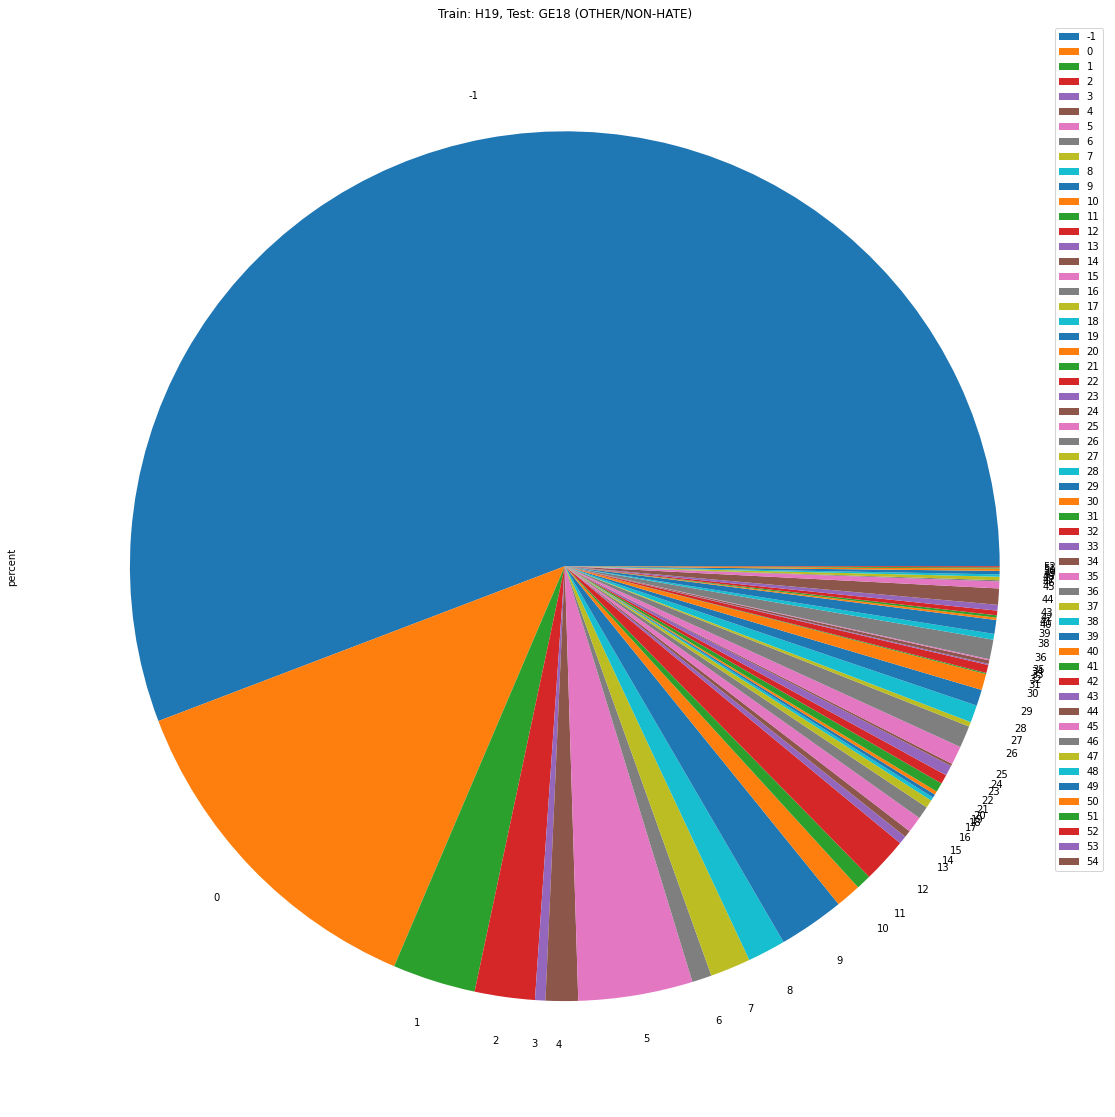

In [ ]:
plot = df_GE18_OTHER_merged_plt.plot.pie(x = 'Name', y='percent', figsize=(20, 20),
                                    title = 'Train: H19, Test: GE18 (OTHER/NON-HATE)')


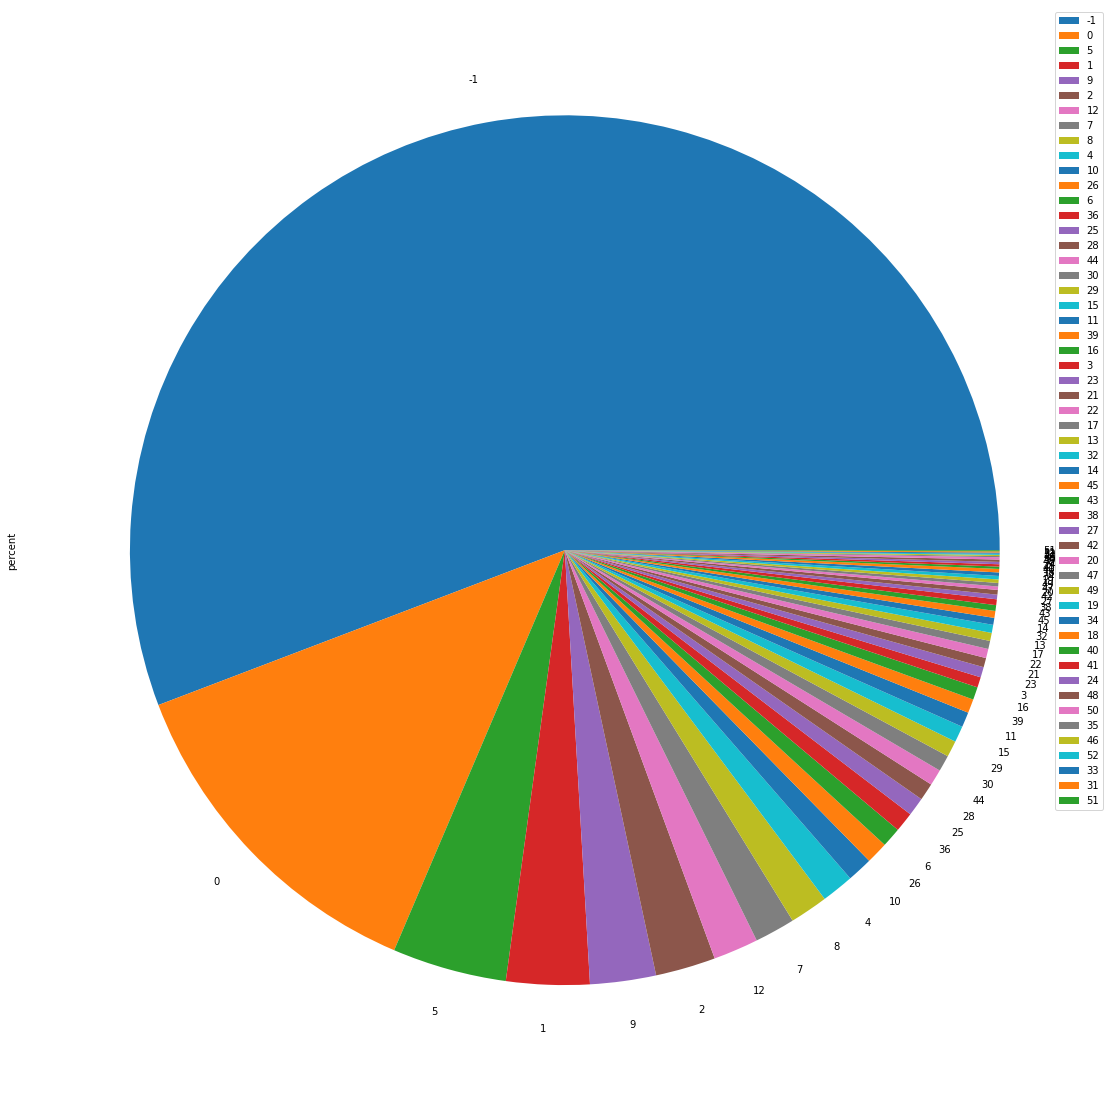

In [ ]:
plot = ge18_test_other_pred_values.plot.pie(y='percent', figsize=(20, 20))


### GE18_Test: OFFENSE-Verteilung

In [ ]:
# Topic-Verteilung für 'OFFENSE'-Tweets


In [ ]:
# Topic-Verteilung für 'OTHER'-Tweets
ge18_test_offense = ge18_test_raw.loc[ge18_test_raw['OFF'] == 'OFFENSE']
ge18_test_offense


TWEET      OFF     CAT  pred
4     @umweltundaktiv Asylantenflut bringt eben nur ...  OFFENSE   ABUSE    18
9     @FeePatzer Frauen zu einem "Ja" zu überreden, ...  OFFENSE   ABUSE    -1
10    @IvyandWoe Ich weiß halt, wie man Frauen zum M...  OFFENSE   ABUSE    -1
11     Liebe Freunde, Gauck,das Symbol des Sklaventums!  OFFENSE   ABUSE    -1
13    wen interessiert denn die Meinung des Außenmin...  OFFENSE  INSULT    -1
...                                                 ...      ...     ...   ...
3521  @UdoUlfkotte Hauptsache den Asylanten gehts ge...  OFFENSE   ABUSE    18
3525  @ThomasMichael71 @mountainman1977 @houelle_bec...  OFFENSE   ABUSE    -1
3526  @SteinbachErika Ich finde AFD Wähler besser al...  OFFENSE  INSULT    13
3528  @RKnillmann @lawyerberlin @AfD Aha, der Islam ...  OFFENSE   ABUSE    -1
3529  @podilein Mannheim, weltoffen und kunterbunt. ...  OFFENSE   ABUSE     0

[1202 rows x 4 columns]

In [ ]:
ge18_test_offense_pred_values = pd.DataFrame(ge18_test_offense['pred'].value_counts())
ge18_test_offense_pred_values['percent'] = (ge18_test_offense_pred_values['pred'] / ge18_test_offense_pred_values['pred'].sum()) * 100
ge18_test_offense_pred_values

pred    percent
-1    654  54.409318
 0    128  10.648918
 7     51   4.242928
 9     39   3.244592
 8     38   3.161398
 1     33   2.745424
 4     31   2.579035
 2     24   1.996672
 5     23   1.913478
 16    22   1.830283
 36    21   1.747088
 26    13   1.081531
 10    12   0.998336
 18    10   0.831947
 11    10   0.831947
 6      8   0.665557
 13     8   0.665557
 28     7   0.582363
 35     6   0.499168
 44     6   0.499168
 15     5   0.415973
 30     5   0.415973
 32     5   0.415973
 29     4   0.332779
 43     4   0.332779
 14     4   0.332779
 3      3   0.249584
 24     3   0.249584
 12     3   0.249584
 22     2   0.166389
 21     2   0.166389
 42     2   0.166389
 20     2   0.166389
 39     2   0.166389
 25     2   0.166389
 38     2   0.166389
 50     1   0.083195
 52     1   0.083195
 48     1   0.083195
 49     1   0.083195
 27     1   0.083195
 41     1   0.083195
 45     1   0.083195
 40     1   0.083195

In [ ]:
df1 =  train_h19_model_topics[['Topic','Name']]
ge18_test_offense_pred_values['Topic'] = ge18_test_offense_pred_values.index
df2 = ge18_test_offense_pred_values
data_frames = [df1, df2]
df_GE18_OFFENSE_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_GE18_OFFENSE_merged['percent'] = df_GE18_OFFENSE_merged['percent'].astype(float)

In [ ]:
df_GE18_OFFENSE_merged['pred'] = df_GE18_OFFENSE_merged['pred'].astype(int)
df_GE18_OFFENSE_merged


Topic                                               Name  pred    percent
0      -1                       -1_deutschland_immer_spd_afd   654  54.409318
1       0                          0_vögel_danke_wünsche_nix   128  10.648918
2       1                  1_demokratie_wahl_parteien_partei    33   2.745424
3       2                        2_hass_respekt_lügt_meinung    24   1.996672
4       3                           3_erster_energie_the_och     3   0.249584
5       4                            4_grünen_grüne_grün_rot    31   2.579035
6       5                    5_kirchen_kirche_religion_geist    23   1.913478
7       6            6_deutschland_deutschen_deutsche_berlin     8   0.665557
8       7                     7_muslime_moslems_akbar_allahu    51   4.242928
9       8             8_flüchtlinge_migranten_asyl_migration    38   3.161398
10      9          9_vergewaltigt_mädchen_jährige_nigerianer    39   3.244592
11     10                  10_kinder_schule_volkslehrer_kind    12   0.998336
12     11         11_medien_journalisten_journalismus_presse    10   0.831947
13     12                  12_tweet_twitter_account_twittern     3   0.249584
14     13              13_essen_fressen_frosch_gammelfleisch     8   0.665557
15     14        14_polizisten_polizei_abschiebungen_beamten     4   0.332779
16     15     15_mitarbeiter_betroffen_mitarbeitern_schließt     5   0.415973
17     16                 16_nazis_nazi_braunen_innenstädten    22   1.830283
18     17         17_klimawandel_klima_erwärmung_klimaschutz     0   0.000000
19     18               18_flüchtlinge_deutschland_euro_jahr    10   0.831947
20     19                    19_video_youtube_videos_trailer     0   0.000000
21     20                       20_zeiten_immer_schritt_mohr     2   0.166389
22     21                  21_syrer_syrische_iraker_jährigen     2   0.166389
23     22                   22_strom_autos_auto_elektroautos     2   0.166389
24     23                 23_bilder_bild_editorial_paragraph     0   0.000000
25     24                    24_bendit_cohn_daniel_spieglein     3   0.249584
26     25             25_netz_speichern_speichert_ausgemacht     2   0.166389
27     26           26_rassistisch_weiß_rassismus_anzufangen    13   1.081531
28     27                       27_euro_kredite_audi_bargeld     1   0.083195
29     28                   28_mord_skalpieren_fällt_notwehr     7   0.582363
30     29                29_land_landteil_beginnen_vaterland     4   0.332779
31     30                 30_clans_kriminelle_hinweis_begeht     5   0.415973
32     31          31_italien_salvini_italienische_italiener     0   0.000000
33     32              32_islam_deutschland_muslime_deutsche     5   0.415973
34     33                 33_rebecca_instagram_endlich_sucht     0   0.000000
35     34            34_österreich_europawahl_westen_gewinnt     0   0.000000
36     35            35_afrika_herrenrasse_albert_schweitzer     6   0.499168
37     36      36_merkel_hinterlässt_geigenkonzert_sauereien    21   1.747088
38     37                  37_polizei_berliner_endlich_sucht     0   0.000000
39     38                    38_stadt_straße_ückendorf_einst     2   0.166389
40     39                39_milliarden_rente_rechnungen_robo     2   0.166389
41     40             40_lieber_regierung_fastenbrechen_kern     1   0.083195
42     41        41_propaganda_android_anstrengung_empfohlen     1   0.083195
43     42                      42_hollywood_obm_kino_görlitz     2   0.166389
44     43                          43_teil_satire_lach_humor     4   0.332779
45     44                44_türken_türkei_türkischer_arabien     6   0.499168
46     45      45_darpa_militärische_alliierten_umfangreiche     1   0.083195
47     46             46_berlin_flughafen_amerika_hauptstadt     0   0.000000
48     47           47_sundance_justnobody_löschung_bescheid     0   0.000000
49     48                        48_fußball_liga_zwölf_sport     1   0.083195
50     49  49_sozialismus_

In [ ]:
df_GE18_OFFENSE_sorted = df_GE18_OFFENSE_merged.sort_values('pred', ascending=False)
df_GE18_OFFENSE_sorted

Topic                                               Name  pred    percent
0      -1                       -1_deutschland_immer_spd_afd   654  54.409318
1       0                          0_vögel_danke_wünsche_nix   128  10.648918
8       7                     7_muslime_moslems_akbar_allahu    51   4.242928
10      9          9_vergewaltigt_mädchen_jährige_nigerianer    39   3.244592
9       8             8_flüchtlinge_migranten_asyl_migration    38   3.161398
2       1                  1_demokratie_wahl_parteien_partei    33   2.745424
5       4                            4_grünen_grüne_grün_rot    31   2.579035
3       2                        2_hass_respekt_lügt_meinung    24   1.996672
6       5                    5_kirchen_kirche_religion_geist    23   1.913478
17     16                 16_nazis_nazi_braunen_innenstädten    22   1.830283
37     36      36_merkel_hinterlässt_geigenkonzert_sauereien    21   1.747088
27     26           26_rassistisch_weiß_rassismus_anzufangen    13   1.081531
11     10                  10_kinder_schule_volkslehrer_kind    12   0.998336
12     11         11_medien_journalisten_journalismus_presse    10   0.831947
19     18               18_flüchtlinge_deutschland_euro_jahr    10   0.831947
7       6            6_deutschland_deutschen_deutsche_berlin     8   0.665557
14     13              13_essen_fressen_frosch_gammelfleisch     8   0.665557
29     28                   28_mord_skalpieren_fällt_notwehr     7   0.582363
36     35            35_afrika_herrenrasse_albert_schweitzer     6   0.499168
45     44                44_türken_türkei_türkischer_arabien     6   0.499168
31     30                 30_clans_kriminelle_hinweis_begeht     5   0.415973
16     15     15_mitarbeiter_betroffen_mitarbeitern_schließt     5   0.415973
33     32              32_islam_deutschland_muslime_deutsche     5   0.415973
15     14        14_polizisten_polizei_abschiebungen_beamten     4   0.332779
44     43                          43_teil_satire_lach_humor     4   0.332779
30     29                29_land_landteil_beginnen_vaterland     4   0.332779
25     24                    24_bendit_cohn_daniel_spieglein     3   0.249584
13     12                  12_tweet_twitter_account_twittern     3   0.249584
4       3                           3_erster_energie_the_och     3   0.249584
39     38                    38_stadt_straße_ückendorf_einst     2   0.166389
40     39                39_milliarden_rente_rechnungen_robo     2   0.166389
21     20                       20_zeiten_immer_schritt_mohr     2   0.166389
26     25             25_netz_speichern_speichert_ausgemacht     2   0.166389
23     22                   22_strom_autos_auto_elektroautos     2   0.166389
22     21                  21_syrer_syrische_iraker_jährigen     2   0.166389
43     42                      42_hollywood_obm_kino_görlitz     2   0.166389
49     48                        48_fußball_liga_zwölf_sport     1   0.083195
46     45      45_darpa_militärische_alliierten_umfangreiche     1   0.083195
50     49  49_sozialismus_marktwirtschaft_soziale_kapital...     1   0.083195
42     41        41_propaganda_android_anstrengung_empfohlen     1   0.083195
51     50                    50_grünen_deutschland_pro_grüne     1   0.083195
53     52                  52_traum_hals_eigenheim_zugewinne     1   0.083195
28     27                       27_euro_kredite_audi_bargeld     1   0.083195
41     40             40_lieber_regierung_fastenbrechen_kern     1   0.083195
38     37                  37_polizei_berliner_endlich_sucht     0   0.000000
35     34            34_österreich_europawahl_westen_gewinnt     0   0.000000
34     33                 33_rebecca_instagram_endlich_sucht     0   0.000000
47     46             46_berlin_flughafen_amerika_hauptstadt     0   0.000000
48     47           47_sundance_justnobody_löschung_bescheid     0   0.000000
32     31          31_italien_salvini_italienische_italiener     0   0.000000
24     23                 

In [ ]:
df_GE18_OFFENSE_merged_plt = df_GE18_OFFENSE_merged.set_index('Topic')


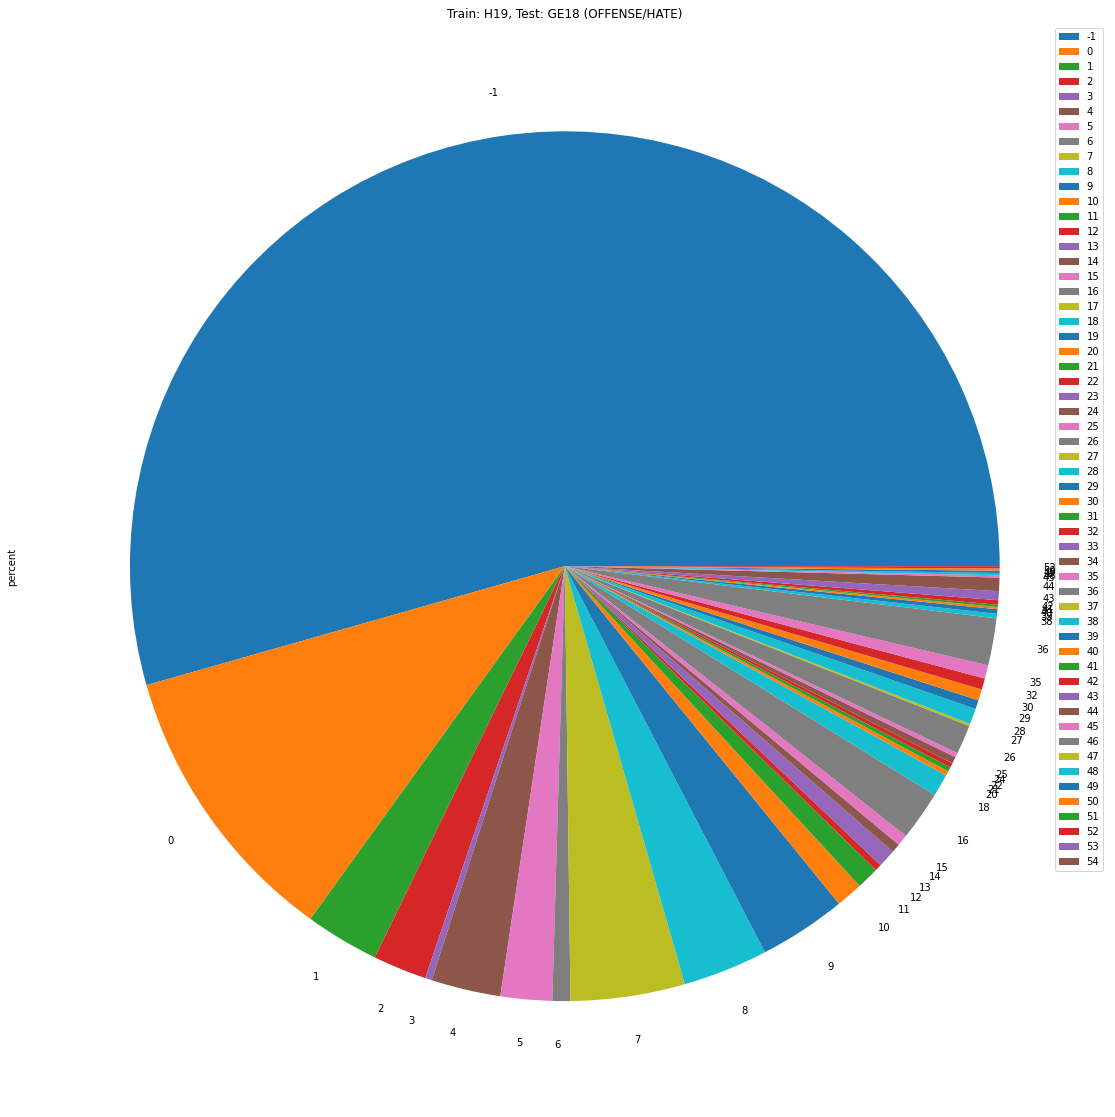

In [ ]:
plot = df_GE18_OFFENSE_merged_plt.plot.pie(y='percent', figsize=(20, 20),
                                    title = 'Train: H19, Test: GE18 (OFFENSE/HATE)')


In [ ]:
#plot = ge18_test_offense_pred_values.plot.pie(y='percent', figsize=(20, 20))


### GE19_Test

In [ ]:
ge19_test_raw['pred'] = train_h19_pred_ge19[0]
ge19_test_raw

TWEET      OFF     CAT  pred
0     @JanZimmHHB @mopo Komisch das die Realitätsver...  OFFENSE  INSULT     2
1     @faznet @Gruene_Europa @SPDEuropa @CDU CDU ste...  OFFENSE   ABUSE    -1
2     @DLFNachrichten Die Gesichter, Namen, Religion...    OTHER   OTHER     5
3     @welt Wie verwirrt muss man sein um sich zu we...  OFFENSE   ABUSE     2
4     @hacker_1991 @torben_braga Weil die AfD den Fe...  OFFENSE   ABUSE    -1
...                                                 ...      ...     ...   ...
3026  Es fand aber nie eine Emanzipierungs-Phase der...    OTHER   OTHER    44
3027  Um es klar zu stellen: Ich will hier kein Whit...    OTHER   OTHER    15
3028  Und dann habe ich da noch die McArthur-Briefe ...    OTHER   OTHER    -1
3029  al sehen wer der Ersatzmann wird. Hier könnte ...    OTHER   OTHER     2
3030  @JKasek Oder die Bäume. Bin mal in 'nem Wald s...    OTHER   OTHER    -1

[3031 rows x 4 columns]

### GE19_Test: OTHER-Verteilung

In [ ]:
# Topic-Verteilung für 'OTHER'-Tweets
ge19_test_other = ge19_test_raw.loc[ge19_test_raw['OFF'] == 'OTHER']
ge19_test_other


TWEET    OFF    CAT  pred
2     @DLFNachrichten Die Gesichter, Namen, Religion...  OTHER  OTHER     5
5     @aktuelle_stunde Also beim Fall Birmingham, En...  OTHER  OTHER     2
6     @StZ_NEWS Aber bei läppischen 130.000 Euro der...  OTHER  OTHER    24
12    @BR24 Wie viele werden durch Gas Unfälle getöt...  OTHER  OTHER    22
25    @TAG24LE Wenn sich Linke Linke zu Feinden mach...  OTHER  OTHER     0
...                                                 ...    ...    ...   ...
3026  Es fand aber nie eine Emanzipierungs-Phase der...  OTHER  OTHER    44
3027  Um es klar zu stellen: Ich will hier kein Whit...  OTHER  OTHER    15
3028  Und dann habe ich da noch die McArthur-Briefe ...  OTHER  OTHER    -1
3029  al sehen wer der Ersatzmann wird. Hier könnte ...  OTHER  OTHER     2
3030  @JKasek Oder die Bäume. Bin mal in 'nem Wald s...  OTHER  OTHER    -1

[2061 rows x 4 columns]

In [ ]:
ge19_test_other_pred_values = pd.DataFrame(ge19_test_other['pred'].value_counts())
ge19_test_other_pred_values['percent'] = (ge19_test_other_pred_values['pred'] / ge19_test_other_pred_values['pred'].sum()) * 100
ge19_test_other_pred_values

pred    percent
-1   1188  57.641921
 0    264  12.809316
 1     71   3.444930
 12    62   3.008248
 2     39   1.892285
 16    30   1.455604
 13    25   1.213003
 26    24   1.164483
 17    23   1.115963
 49    22   1.067443
 10    20   0.970403
 7     18   0.873362
 8     17   0.824842
 5     17   0.824842
 22    16   0.776322
 15    16   0.776322
 39    15   0.727802
 11    14   0.679282
 3     12   0.582242
 29    12   0.582242
 14    11   0.533721
 28    10   0.485201
 44     9   0.436681
 23     9   0.436681
 25     8   0.388161
 19     8   0.388161
 24     8   0.388161
 43     7   0.339641
 4      6   0.291121
 18     6   0.291121
 9      6   0.291121
 45     6   0.291121
 38     6   0.291121
 36     5   0.242601
 27     5   0.242601
 32     5   0.242601
 6      5   0.242601
 30     4   0.194081
 42     4   0.194081
 20     4   0.194081
 34     3   0.145560
 41     3   0.145560
 47     3   0.145560
 31     2   0.097040
 35     2   0.097040
 48     2   0.097040
 53     2   0.097040
 51     2   0.097040
 52     1   0.048520
 40     1   0.048520
 33     1   0.048520
 21     1   0.048520
 37     1   0.048520

In [ ]:
df1 =  train_h19_model_topics[['Topic','Name']]
ge19_test_other_pred_values['Topic'] = ge19_test_other_pred_values.index
df2 = ge19_test_other_pred_values
data_frames = [df1, df2]
df_GE19_OTHER_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_GE19_OTHER_merged['percent'] = df_GE19_OTHER_merged['percent'].astype(float)

In [ ]:
df_GE19_OTHER_merged['pred'] = df_GE19_OTHER_merged['pred'].astype(int)

In [ ]:
df_GE19_OTHER_sorted = df_GE19_OTHER_merged.sort_values('pred', ascending=False)
df_GE19_OTHER_sorted

Topic                                               Name  pred    percent
0      -1                       -1_deutschland_immer_spd_afd  1188  57.641921
1       0                          0_vögel_danke_wünsche_nix   264  12.809316
2       1                  1_demokratie_wahl_parteien_partei    71   3.444930
13     12                  12_tweet_twitter_account_twittern    62   3.008248
3       2                        2_hass_respekt_lügt_meinung    39   1.892285
17     16                 16_nazis_nazi_braunen_innenstädten    30   1.455604
14     13              13_essen_fressen_frosch_gammelfleisch    25   1.213003
27     26           26_rassistisch_weiß_rassismus_anzufangen    24   1.164483
18     17         17_klimawandel_klima_erwärmung_klimaschutz    23   1.115963
50     49  49_sozialismus_marktwirtschaft_soziale_kapital...    22   1.067443
11     10                  10_kinder_schule_volkslehrer_kind    20   0.970403
8       7                     7_muslime_moslems_akbar_allahu    18   0.873362
6       5                    5_kirchen_kirche_religion_geist    17   0.824842
9       8             8_flüchtlinge_migranten_asyl_migration    17   0.824842
23     22                   22_strom_autos_auto_elektroautos    16   0.776322
16     15     15_mitarbeiter_betroffen_mitarbeitern_schließt    16   0.776322
40     39                39_milliarden_rente_rechnungen_robo    15   0.727802
12     11         11_medien_journalisten_journalismus_presse    14   0.679282
30     29                29_land_landteil_beginnen_vaterland    12   0.582242
4       3                           3_erster_energie_the_och    12   0.582242
15     14        14_polizisten_polizei_abschiebungen_beamten    11   0.533721
29     28                   28_mord_skalpieren_fällt_notwehr    10   0.485201
45     44                44_türken_türkei_türkischer_arabien     9   0.436681
24     23                 23_bilder_bild_editorial_paragraph     9   0.436681
26     25             25_netz_speichern_speichert_ausgemacht     8   0.388161
20     19                    19_video_youtube_videos_trailer     8   0.388161
25     24                    24_bendit_cohn_daniel_spieglein     8   0.388161
44     43                          43_teil_satire_lach_humor     7   0.339641
46     45      45_darpa_militärische_alliierten_umfangreiche     6   0.291121
19     18               18_flüchtlinge_deutschland_euro_jahr     6   0.291121
5       4                            4_grünen_grüne_grün_rot     6   0.291121
10      9          9_vergewaltigt_mädchen_jährige_nigerianer     6   0.291121
39     38                    38_stadt_straße_ückendorf_einst     6   0.291121
37     36      36_merkel_hinterlässt_geigenkonzert_sauereien     5   0.242601
28     27                       27_euro_kredite_audi_bargeld     5   0.242601
33     32              32_islam_deutschland_muslime_deutsche     5   0.242601
7       6            6_deutschland_deutschen_deutsche_berlin     5   0.242601
43     42                      42_hollywood_obm_kino_görlitz     4   0.194081
31     30                 30_clans_kriminelle_hinweis_begeht     4   0.194081
21     20                       20_zeiten_immer_schritt_mohr     4   0.194081
35     34            34_österreich_europawahl_westen_gewinnt     3   0.145560
42     41        41_propaganda_android_anstrengung_empfohlen     3   0.145560
48     47           47_sundance_justnobody_löschung_bescheid     3   0.145560
49     48                        48_fußball_liga_zwölf_sport     2   0.097040
54     53            53_explosion_einsatz_zerstört_linköping     2   0.097040
32     31          31_italien_salvini_italienische_italiener     2   0.097040
52     51               51_russland_russische_putin_wladimir     2   0.097040
36     35            35_afrika_herrenrasse_albert_schweitzer     2   0.097040
53     52                  52_traum_hals_eigenheim_zugewinne     1   0.048520
22     21                  21_syrer_syrische_iraker_jährigen     1   0.048520
41     40             40_l

In [ ]:
df_GE19_OTHER_merged_plt = df_GE19_OTHER_merged.set_index('Topic')


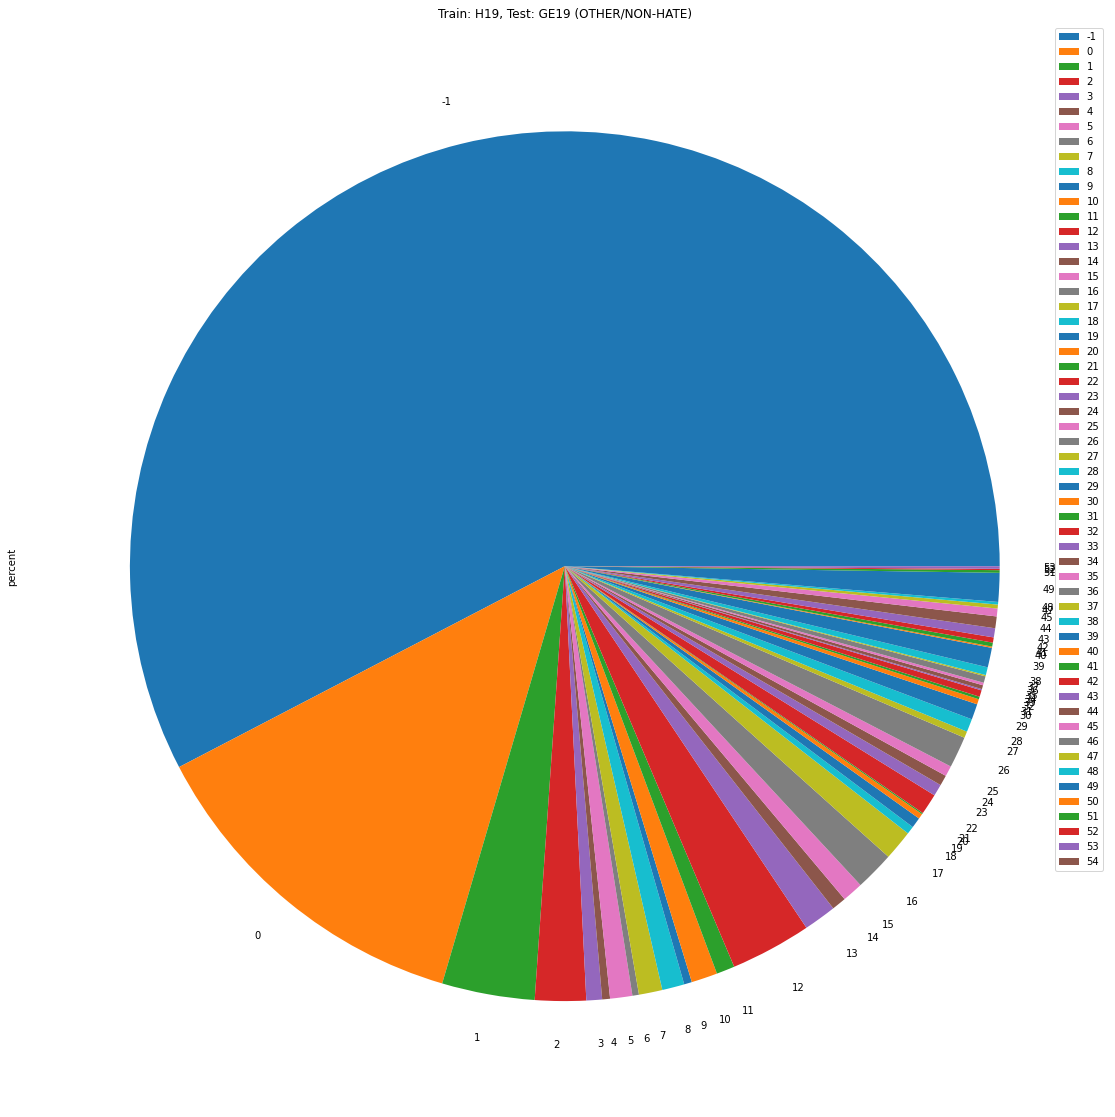

In [ ]:
plot = df_GE19_OTHER_merged_plt.plot.pie(x = 'Name', y='percent', figsize=(20, 20),
                                    title = 'Train: H19, Test: GE19 (OTHER/NON-HATE)')


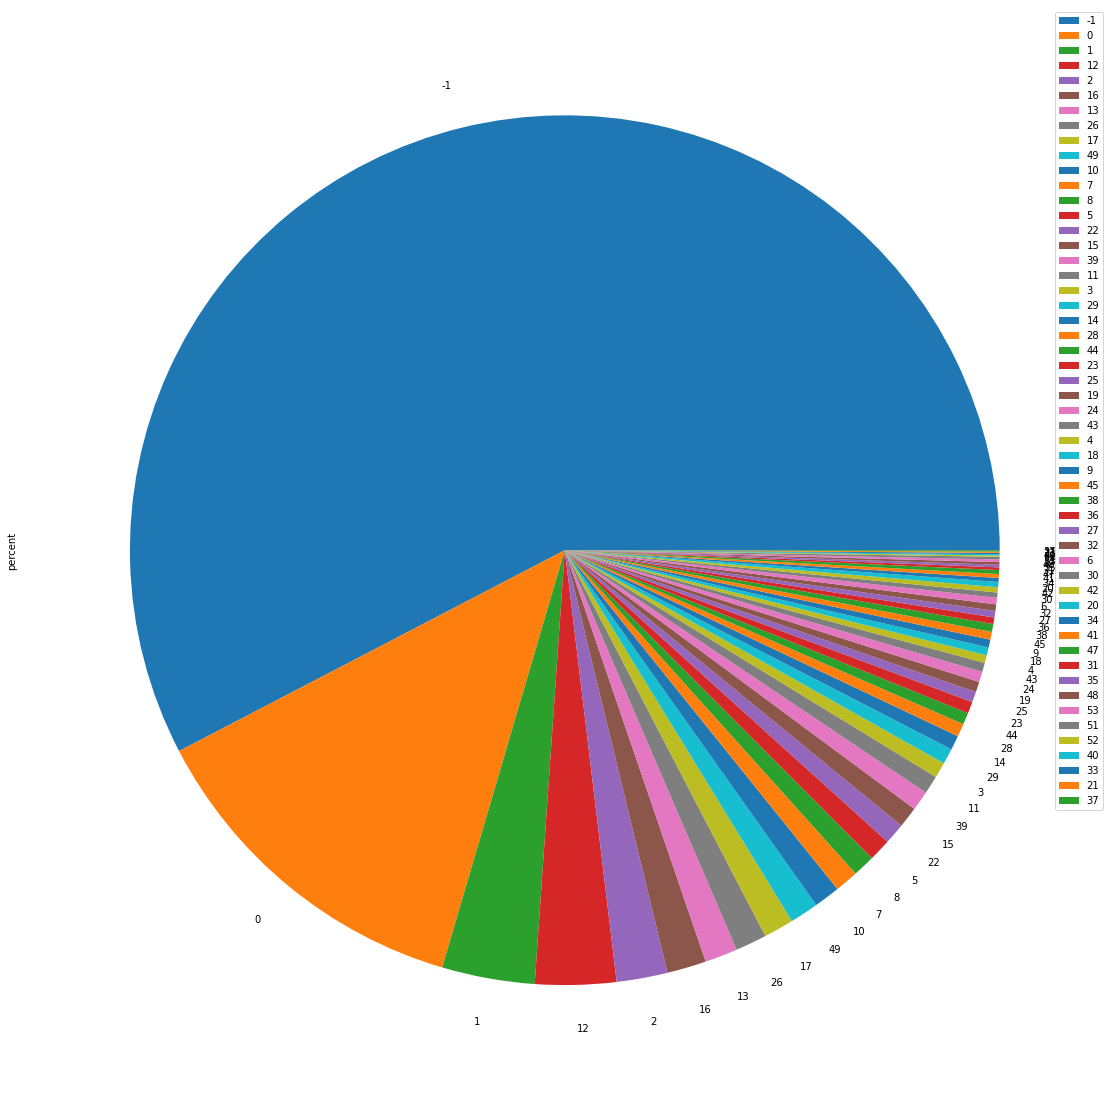

In [ ]:
plot = ge19_test_other_pred_values.plot.pie(y='percent', figsize=(20, 20))


### GE19_Test: OFFENSE-Verteilung

In [ ]:
# Topic-Verteilung für 'OFFENSE'-Tweets


In [ ]:
# Topic-Verteilung für 'OTHER'-Tweets
ge19_test_offense = ge19_test_raw.loc[ge19_test_raw['OFF'] == 'OFFENSE']
ge19_test_offense


TWEET      OFF        CAT  \
0     @JanZimmHHB @mopo Komisch das die Realitätsver...  OFFENSE     INSULT   
1     @faznet @Gruene_Europa @SPDEuropa @CDU CDU ste...  OFFENSE      ABUSE   
3     @welt Wie verwirrt muss man sein um sich zu we...  OFFENSE      ABUSE   
4     @hacker_1991 @torben_braga Weil die AfD den Fe...  OFFENSE      ABUSE   
7     @StZ_NEWS Schäuble wird wissen woher dieses Na...  OFFENSE      ABUSE   
...                                                 ...      ...        ...   
2889  Diese sogenannten Aktivisten sind Straftäter d...  OFFENSE      ABUSE   
2949    #Erdogan ist einfach eine Pest für die #Türkei.  OFFENSE     INSULT   
2976  @sixtus Irgend so ein charakterloser brauner M...  OFFENSE     INSULT   
2978  Das mag dem einen oder anderen harsch vorkomme...  OFFENSE     INSULT   
2988  Ich frage mich mittlerweile was Saudi Arabien ...  OFFENSE  PROFANITY   

      pred  
0        2  
1       -1  
3        2  
4       -1  
7       16  
...    ...  
2889    -1  
2949    44  
2976    -1  
2978     1  
2988    -1  

[970 rows x 4 columns]

In [ ]:
ge19_test_offense_pred_values = pd.DataFrame(ge19_test_offense['pred'].value_counts())
ge19_test_offense_pred_values['percent'] = (ge19_test_offense_pred_values['pred'] / ge19_test_offense_pred_values['pred'].sum()) * 100
ge19_test_offense_pred_values

pred    percent
-1    581  59.896907
 0     58   5.979381
 1     39   4.020619
 2     37   3.814433
 16    36   3.711340
 8     19   1.958763
 7     13   1.340206
 11    13   1.340206
 12    12   1.237113
 13    12   1.237113
 4     11   1.134021
 26    10   1.030928
 9      9   0.927835
 14     8   0.824742
 10     8   0.824742
 18     7   0.721649
 36     7   0.721649
 43     7   0.721649
 39     6   0.618557
 15     6   0.618557
 5      6   0.618557
 32     5   0.515464
 30     5   0.515464
 6      5   0.515464
 24     5   0.515464
 19     4   0.412371
 29     4   0.412371
 35     4   0.412371
 23     4   0.412371
 3      4   0.412371
 28     4   0.412371
 49     3   0.309278
 37     2   0.206186
 17     2   0.206186
 22     2   0.206186
 38     2   0.206186
 48     2   0.206186
 42     2   0.206186
 52     1   0.103093
 50     1   0.103093
 40     1   0.103093
 25     1   0.103093
 21     1   0.103093
 44     1   0.103093

In [ ]:
df1 =  train_h19_model_topics[['Topic','Name']]
ge19_test_offense_pred_values['Topic'] = ge19_test_offense_pred_values.index
df2 = ge19_test_offense_pred_values
data_frames = [df1, df2]
df_GE19_OFFENSE_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_GE19_OFFENSE_merged['percent'] = df_GE19_OFFENSE_merged['percent'].astype(float)

In [ ]:
df_GE19_OFFENSE_merged['pred'] = df_GE19_OFFENSE_merged['pred'].astype(int)
df_GE19_OFFENSE_merged


Topic                                               Name  pred    percent
0      -1                       -1_deutschland_immer_spd_afd   581  59.896907
1       0                          0_vögel_danke_wünsche_nix    58   5.979381
2       1                  1_demokratie_wahl_parteien_partei    39   4.020619
3       2                        2_hass_respekt_lügt_meinung    37   3.814433
4       3                           3_erster_energie_the_och     4   0.412371
5       4                            4_grünen_grüne_grün_rot    11   1.134021
6       5                    5_kirchen_kirche_religion_geist     6   0.618557
7       6            6_deutschland_deutschen_deutsche_berlin     5   0.515464
8       7                     7_muslime_moslems_akbar_allahu    13   1.340206
9       8             8_flüchtlinge_migranten_asyl_migration    19   1.958763
10      9          9_vergewaltigt_mädchen_jährige_nigerianer     9   0.927835
11     10                  10_kinder_schule_volkslehrer_kind     8   0.824742
12     11         11_medien_journalisten_journalismus_presse    13   1.340206
13     12                  12_tweet_twitter_account_twittern    12   1.237113
14     13              13_essen_fressen_frosch_gammelfleisch    12   1.237113
15     14        14_polizisten_polizei_abschiebungen_beamten     8   0.824742
16     15     15_mitarbeiter_betroffen_mitarbeitern_schließt     6   0.618557
17     16                 16_nazis_nazi_braunen_innenstädten    36   3.711340
18     17         17_klimawandel_klima_erwärmung_klimaschutz     2   0.206186
19     18               18_flüchtlinge_deutschland_euro_jahr     7   0.721649
20     19                    19_video_youtube_videos_trailer     4   0.412371
21     20                       20_zeiten_immer_schritt_mohr     0   0.000000
22     21                  21_syrer_syrische_iraker_jährigen     1   0.103093
23     22                   22_strom_autos_auto_elektroautos     2   0.206186
24     23                 23_bilder_bild_editorial_paragraph     4   0.412371
25     24                    24_bendit_cohn_daniel_spieglein     5   0.515464
26     25             25_netz_speichern_speichert_ausgemacht     1   0.103093
27     26           26_rassistisch_weiß_rassismus_anzufangen    10   1.030928
28     27                       27_euro_kredite_audi_bargeld     0   0.000000
29     28                   28_mord_skalpieren_fällt_notwehr     4   0.412371
30     29                29_land_landteil_beginnen_vaterland     4   0.412371
31     30                 30_clans_kriminelle_hinweis_begeht     5   0.515464
32     31          31_italien_salvini_italienische_italiener     0   0.000000
33     32              32_islam_deutschland_muslime_deutsche     5   0.515464
34     33                 33_rebecca_instagram_endlich_sucht     0   0.000000
35     34            34_österreich_europawahl_westen_gewinnt     0   0.000000
36     35            35_afrika_herrenrasse_albert_schweitzer     4   0.412371
37     36      36_merkel_hinterlässt_geigenkonzert_sauereien     7   0.721649
38     37                  37_polizei_berliner_endlich_sucht     2   0.206186
39     38                    38_stadt_straße_ückendorf_einst     2   0.206186
40     39                39_milliarden_rente_rechnungen_robo     6   0.618557
41     40             40_lieber_regierung_fastenbrechen_kern     1   0.103093
42     41        41_propaganda_android_anstrengung_empfohlen     0   0.000000
43     42                      42_hollywood_obm_kino_görlitz     2   0.206186
44     43                          43_teil_satire_lach_humor     7   0.721649
45     44                44_türken_türkei_türkischer_arabien     1   0.103093
46     45      45_darpa_militärische_alliierten_umfangreiche     0   0.000000
47     46             46_berlin_flughafen_amerika_hauptstadt     0   0.000000
48     47           47_sundance_justnobody_löschung_bescheid     0   0.000000
49     48                        48_fußball_liga_zwölf_sport     2   0.206186
50     49  49_sozialismus_

In [ ]:
df_GE19_OFFENSE_sorted = df_GE19_OFFENSE_merged.sort_values('pred', ascending=False)
df_GE19_OFFENSE_sorted

Topic                                               Name  pred    percent
0      -1                       -1_deutschland_immer_spd_afd   581  59.896907
1       0                          0_vögel_danke_wünsche_nix    58   5.979381
2       1                  1_demokratie_wahl_parteien_partei    39   4.020619
3       2                        2_hass_respekt_lügt_meinung    37   3.814433
17     16                 16_nazis_nazi_braunen_innenstädten    36   3.711340
9       8             8_flüchtlinge_migranten_asyl_migration    19   1.958763
8       7                     7_muslime_moslems_akbar_allahu    13   1.340206
12     11         11_medien_journalisten_journalismus_presse    13   1.340206
13     12                  12_tweet_twitter_account_twittern    12   1.237113
14     13              13_essen_fressen_frosch_gammelfleisch    12   1.237113
5       4                            4_grünen_grüne_grün_rot    11   1.134021
27     26           26_rassistisch_weiß_rassismus_anzufangen    10   1.030928
10      9          9_vergewaltigt_mädchen_jährige_nigerianer     9   0.927835
11     10                  10_kinder_schule_volkslehrer_kind     8   0.824742
15     14        14_polizisten_polizei_abschiebungen_beamten     8   0.824742
44     43                          43_teil_satire_lach_humor     7   0.721649
19     18               18_flüchtlinge_deutschland_euro_jahr     7   0.721649
37     36      36_merkel_hinterlässt_geigenkonzert_sauereien     7   0.721649
6       5                    5_kirchen_kirche_religion_geist     6   0.618557
40     39                39_milliarden_rente_rechnungen_robo     6   0.618557
16     15     15_mitarbeiter_betroffen_mitarbeitern_schließt     6   0.618557
33     32              32_islam_deutschland_muslime_deutsche     5   0.515464
31     30                 30_clans_kriminelle_hinweis_begeht     5   0.515464
25     24                    24_bendit_cohn_daniel_spieglein     5   0.515464
7       6            6_deutschland_deutschen_deutsche_berlin     5   0.515464
36     35            35_afrika_herrenrasse_albert_schweitzer     4   0.412371
29     28                   28_mord_skalpieren_fällt_notwehr     4   0.412371
30     29                29_land_landteil_beginnen_vaterland     4   0.412371
20     19                    19_video_youtube_videos_trailer     4   0.412371
4       3                           3_erster_energie_the_och     4   0.412371
24     23                 23_bilder_bild_editorial_paragraph     4   0.412371
50     49  49_sozialismus_marktwirtschaft_soziale_kapital...     3   0.309278
38     37                  37_polizei_berliner_endlich_sucht     2   0.206186
43     42                      42_hollywood_obm_kino_görlitz     2   0.206186
39     38                    38_stadt_straße_ückendorf_einst     2   0.206186
23     22                   22_strom_autos_auto_elektroautos     2   0.206186
18     17         17_klimawandel_klima_erwärmung_klimaschutz     2   0.206186
49     48                        48_fußball_liga_zwölf_sport     2   0.206186
51     50                    50_grünen_deutschland_pro_grüne     1   0.103093
53     52                  52_traum_hals_eigenheim_zugewinne     1   0.103093
26     25             25_netz_speichern_speichert_ausgemacht     1   0.103093
41     40             40_lieber_regierung_fastenbrechen_kern     1   0.103093
22     21                  21_syrer_syrische_iraker_jährigen     1   0.103093
45     44                44_türken_türkei_türkischer_arabien     1   0.103093
52     51               51_russland_russische_putin_wladimir     0   0.000000
48     47           47_sundance_justnobody_löschung_bescheid     0   0.000000
54     53            53_explosion_einsatz_zerstört_linköping     0   0.000000
28     27                       27_euro_kredite_audi_bargeld     0   0.000000
47     46             46_berlin_flughafen_amerika_hauptstadt     0   0.000000
46     45      45_darpa_militärische_alliierten_umfangreiche     0   0.000000
42     41        41_propag

In [ ]:
df_GE19_OFFENSE_merged_plt = df_GE19_OFFENSE_merged.set_index('Topic')


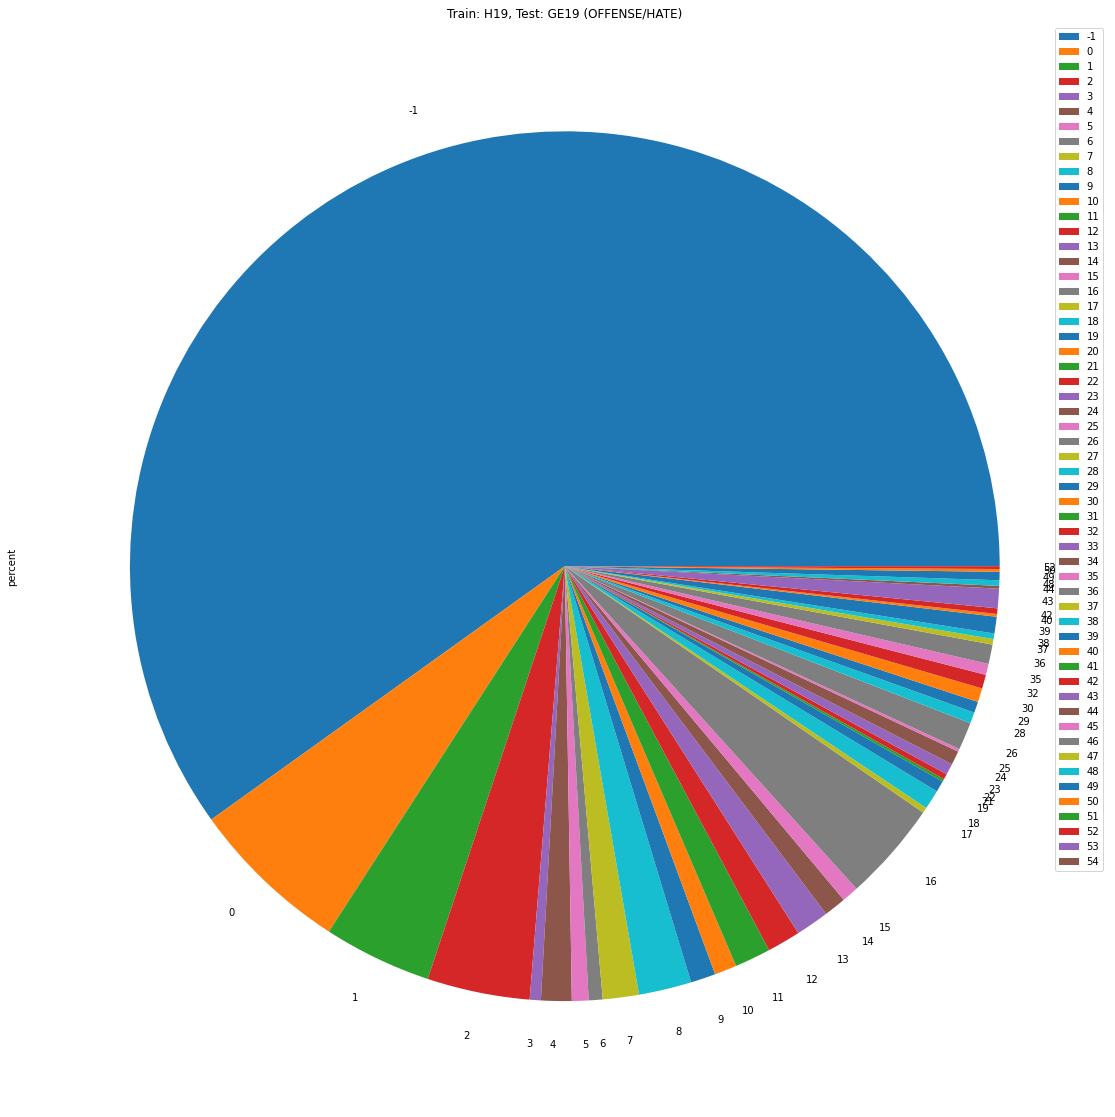

In [ ]:
plot = df_GE19_OFFENSE_merged_plt.plot.pie(y='percent', figsize=(20, 20),
                                    title = 'Train: H19, Test: GE19 (OFFENSE/HATE)')


In [ ]:
#plot = ge19_test_offense_pred_values.plot.pie(y='percent', figsize=(20, 20))


### H19_Test

In [ ]:
h19_test_raw['pred'] = train_h19_pred_h19[0]
h19_test_raw

text_id                                               text task_1  \
0    hasoc_de_5270  Die Grüne Intelligenz Bestie 'Eckhardt', Prang...    HOF   
1    hasoc_de_5271  Das Deutschlandlied,  Sinn und Unsinn  https:/...    NOT   
2    hasoc_de_5272               #Eurovision  https://t.co/24T8fzUI44    NOT   
3    hasoc_de_5273  Unsere ESC Kandidatinnen haben selbst Schuld a...    HOF   
4    hasoc_de_5274  Scheinbar bekommt Sarah's Conner's Sohn Vincen...    HOF   
..             ...                                                ...    ...   
845  hasoc_de_6115  #Erdogan ruft seine Mops wegen Untauglichkeit ...    HOF   
846  hasoc_de_6116  Ich würde der Linken Chefin Kipping die 1.000 ...    HOF   
847  hasoc_de_6117  Ausländer sind Top &amp; Trumpf  Schon aufgefa...    HOF   
848  hasoc_de_6118  Wie der Regierungsjet die Regierungsflieger wi...    HOF   
849  hasoc_de_6120  #guteMütter  sind heutzutage gut ausgebildete ...    NOT   

    task_2  pred  
0     HATE     5  
1     NONE     6  
2     NONE     3  
3     OFFN    -1  
4     OFFN    -1  
..     ...   ...  
845   OFFN    -1  
846   OFFN    13  
847   OFFN    -1  
848   OFFN    -1  
849   NONE    10  

[850 rows x 5 columns]

### H19_Test: OTHER-Verteilung

In [ ]:
# Topic-Verteilung für 'OTHER'-Tweets
h19_test_other = h19_test_raw.loc[h19_test_raw['task_1'] == 'NOT']
h19_test_other


text_id                                               text task_1  \
1    hasoc_de_5271  Das Deutschlandlied,  Sinn und Unsinn  https:/...    NOT   
2    hasoc_de_5272               #Eurovision  https://t.co/24T8fzUI44    NOT   
7    hasoc_de_5277  Und genau das macht er und lässt sich Scheiden...    NOT   
8    hasoc_de_5278  Dann wird das Konto gesperrt und Du musst wied...    NOT   
9    hasoc_de_5279         Dann bleib Single! https://t.co/TOP0spaU01    NOT   
..             ...                                                ...    ...   
837  hasoc_de_6107  @Uwe_Junge_MdL @Beatrix_vStorch  @lsvd  @Nicol...    NOT   
838  hasoc_de_6108  @Uwe_Junge_MdL Ihr streitet es zwar immer ab, ...    NOT   
839  hasoc_de_6109  @Uwe_Junge_MdL Oh die AFD als Vertreter der Ho...    NOT   
840  hasoc_de_6110                                   @Uwe_Junge_MdL 🤣    NOT   
849  hasoc_de_6120  #guteMütter  sind heutzutage gut ausgebildete ...    NOT   

    task_2  pred  
1     NONE     6  
2     NONE     3  
7     NONE    -1  
8     NONE    -1  
9     NONE     0  
..     ...   ...  
837   NONE    -1  
838   NONE     7  
839   NONE     9  
840   NONE     3  
849   NONE    10  

[714 rows x 5 columns]

In [ ]:
h19_test_other_pred_values = pd.DataFrame(h19_test_other['pred'].value_counts())
h19_test_other_pred_values['percent'] = (h19_test_other_pred_values['pred'] / h19_test_other_pred_values['pred'].sum()) * 100
h19_test_other_pred_values

pred    percent
-1    335  46.918768
 0     66   9.243697
 3     53   7.422969
 1     26   3.641457
 8     26   3.641457
 9     20   2.801120
 18    13   1.820728
 16    11   1.540616
 10    10   1.400560
 7     10   1.400560
 12    10   1.400560
 39     8   1.120448
 6      8   1.120448
 11     7   0.980392
 51     7   0.980392
 36     7   0.980392
 49     6   0.840336
 17     6   0.840336
 4      6   0.840336
 15     6   0.840336
 2      6   0.840336
 21     5   0.700280
 13     5   0.700280
 23     4   0.560224
 28     4   0.560224
 38     4   0.560224
 25     4   0.560224
 29     3   0.420168
 44     3   0.420168
 14     3   0.420168
 22     3   0.420168
 24     3   0.420168
 26     2   0.280112
 32     2   0.280112
 27     2   0.280112
 37     2   0.280112
 5      2   0.280112
 31     2   0.280112
 50     2   0.280112
 35     2   0.280112
 34     2   0.280112
 33     2   0.280112
 19     1   0.140056
 20     1   0.140056
 46     1   0.140056
 30     1   0.140056
 43     1   0.140056
 54     1   0.140056

In [ ]:
df1 =  train_h19_model_topics[['Topic','Name']]
h19_test_other_pred_values['Topic'] = h19_test_other_pred_values.index
df2 = h19_test_other_pred_values
data_frames = [df1, df2]
df_H19_OTHER_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_H19_OTHER_merged['percent'] = df_H19_OTHER_merged['percent'].astype(float)

In [ ]:
df_H19_OTHER_merged['pred'] = df_H19_OTHER_merged['pred'].astype(int)

In [ ]:
df_H19_OTHER_sorted = df_H19_OTHER_merged.sort_values('pred', ascending=False)
df_H19_OTHER_sorted

Topic                                               Name  pred    percent
0      -1                       -1_deutschland_immer_spd_afd   335  46.918768
1       0                          0_vögel_danke_wünsche_nix    66   9.243697
4       3                           3_erster_energie_the_och    53   7.422969
9       8             8_flüchtlinge_migranten_asyl_migration    26   3.641457
2       1                  1_demokratie_wahl_parteien_partei    26   3.641457
10      9          9_vergewaltigt_mädchen_jährige_nigerianer    20   2.801120
19     18               18_flüchtlinge_deutschland_euro_jahr    13   1.820728
17     16                 16_nazis_nazi_braunen_innenstädten    11   1.540616
8       7                     7_muslime_moslems_akbar_allahu    10   1.400560
13     12                  12_tweet_twitter_account_twittern    10   1.400560
11     10                  10_kinder_schule_volkslehrer_kind    10   1.400560
40     39                39_milliarden_rente_rechnungen_robo     8   1.120448
7       6            6_deutschland_deutschen_deutsche_berlin     8   1.120448
37     36      36_merkel_hinterlässt_geigenkonzert_sauereien     7   0.980392
52     51               51_russland_russische_putin_wladimir     7   0.980392
12     11         11_medien_journalisten_journalismus_presse     7   0.980392
50     49  49_sozialismus_marktwirtschaft_soziale_kapital...     6   0.840336
16     15     15_mitarbeiter_betroffen_mitarbeitern_schließt     6   0.840336
18     17         17_klimawandel_klima_erwärmung_klimaschutz     6   0.840336
5       4                            4_grünen_grüne_grün_rot     6   0.840336
3       2                        2_hass_respekt_lügt_meinung     6   0.840336
22     21                  21_syrer_syrische_iraker_jährigen     5   0.700280
14     13              13_essen_fressen_frosch_gammelfleisch     5   0.700280
26     25             25_netz_speichern_speichert_ausgemacht     4   0.560224
29     28                   28_mord_skalpieren_fällt_notwehr     4   0.560224
39     38                    38_stadt_straße_ückendorf_einst     4   0.560224
24     23                 23_bilder_bild_editorial_paragraph     4   0.560224
23     22                   22_strom_autos_auto_elektroautos     3   0.420168
15     14        14_polizisten_polizei_abschiebungen_beamten     3   0.420168
25     24                    24_bendit_cohn_daniel_spieglein     3   0.420168
45     44                44_türken_türkei_türkischer_arabien     3   0.420168
30     29                29_land_landteil_beginnen_vaterland     3   0.420168
51     50                    50_grünen_deutschland_pro_grüne     2   0.280112
36     35            35_afrika_herrenrasse_albert_schweitzer     2   0.280112
38     37                  37_polizei_berliner_endlich_sucht     2   0.280112
28     27                       27_euro_kredite_audi_bargeld     2   0.280112
35     34            34_österreich_europawahl_westen_gewinnt     2   0.280112
27     26           26_rassistisch_weiß_rassismus_anzufangen     2   0.280112
33     32              32_islam_deutschland_muslime_deutsche     2   0.280112
32     31          31_italien_salvini_italienische_italiener     2   0.280112
6       5                    5_kirchen_kirche_religion_geist     2   0.280112
34     33                 33_rebecca_instagram_endlich_sucht     2   0.280112
20     19                    19_video_youtube_videos_trailer     1   0.140056
21     20                       20_zeiten_immer_schritt_mohr     1   0.140056
47     46             46_berlin_flughafen_amerika_hauptstadt     1   0.140056
55     54                  54_schulen_bestimmt_berlin_rechts     1   0.140056
44     43                          43_teil_satire_lach_humor     1   0.140056
31     30                 30_clans_kriminelle_hinweis_begeht     1   0.140056
43     42                      42_hollywood_obm_kino_görlitz     0   0.000000
48     47           47_sundance_justnobody_löschung_bescheid     0   0.000000
49     48                 

In [ ]:
df_H19_OTHER_merged_plt = df_H19_OTHER_merged.set_index('Topic')


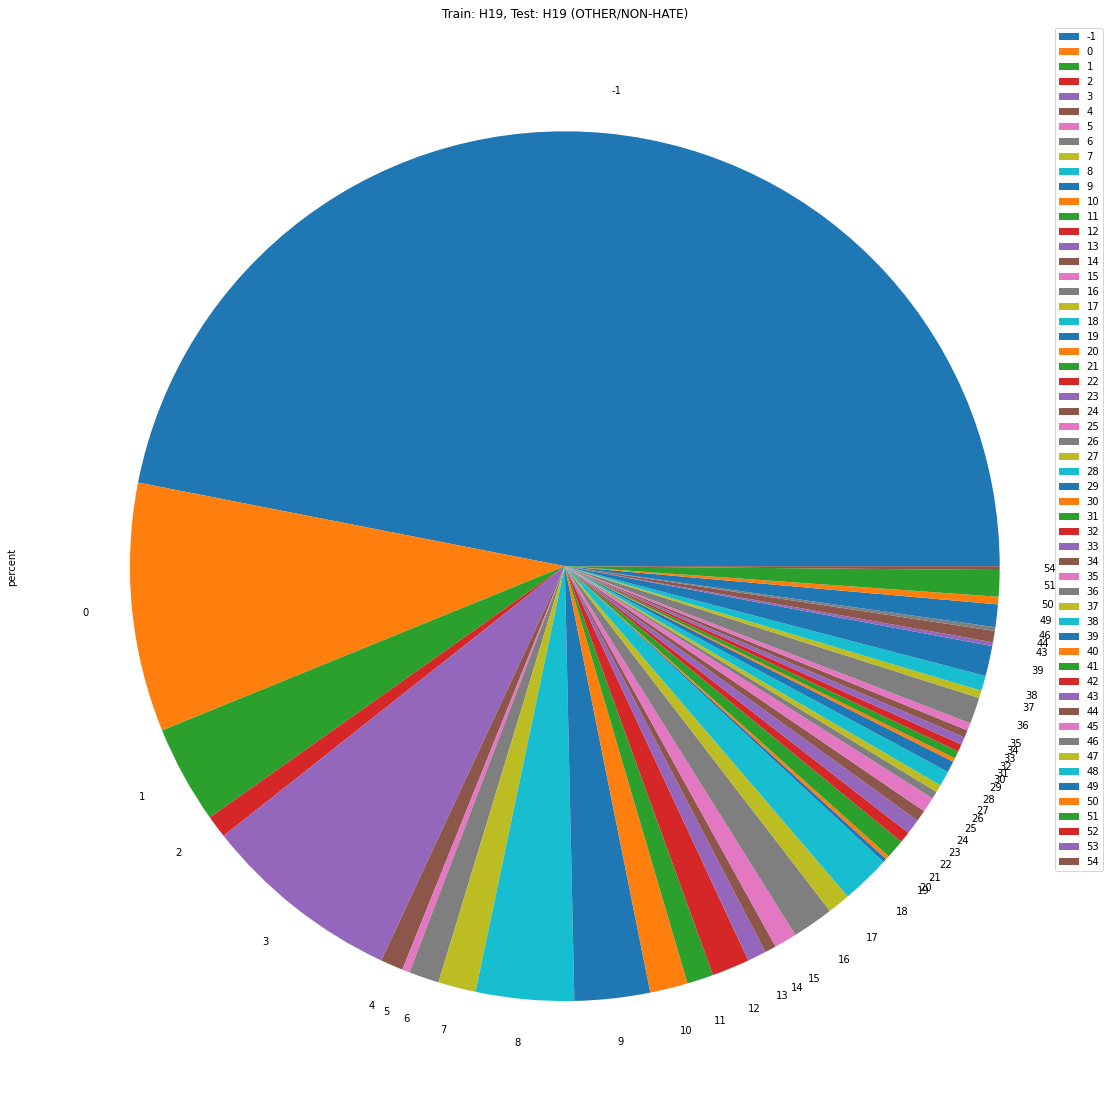

In [ ]:
plot = df_H19_OTHER_merged_plt.plot.pie(x = 'Name', y='percent', figsize=(20, 20),
                                    title = 'Train: H19, Test: H19 (OTHER/NON-HATE)')


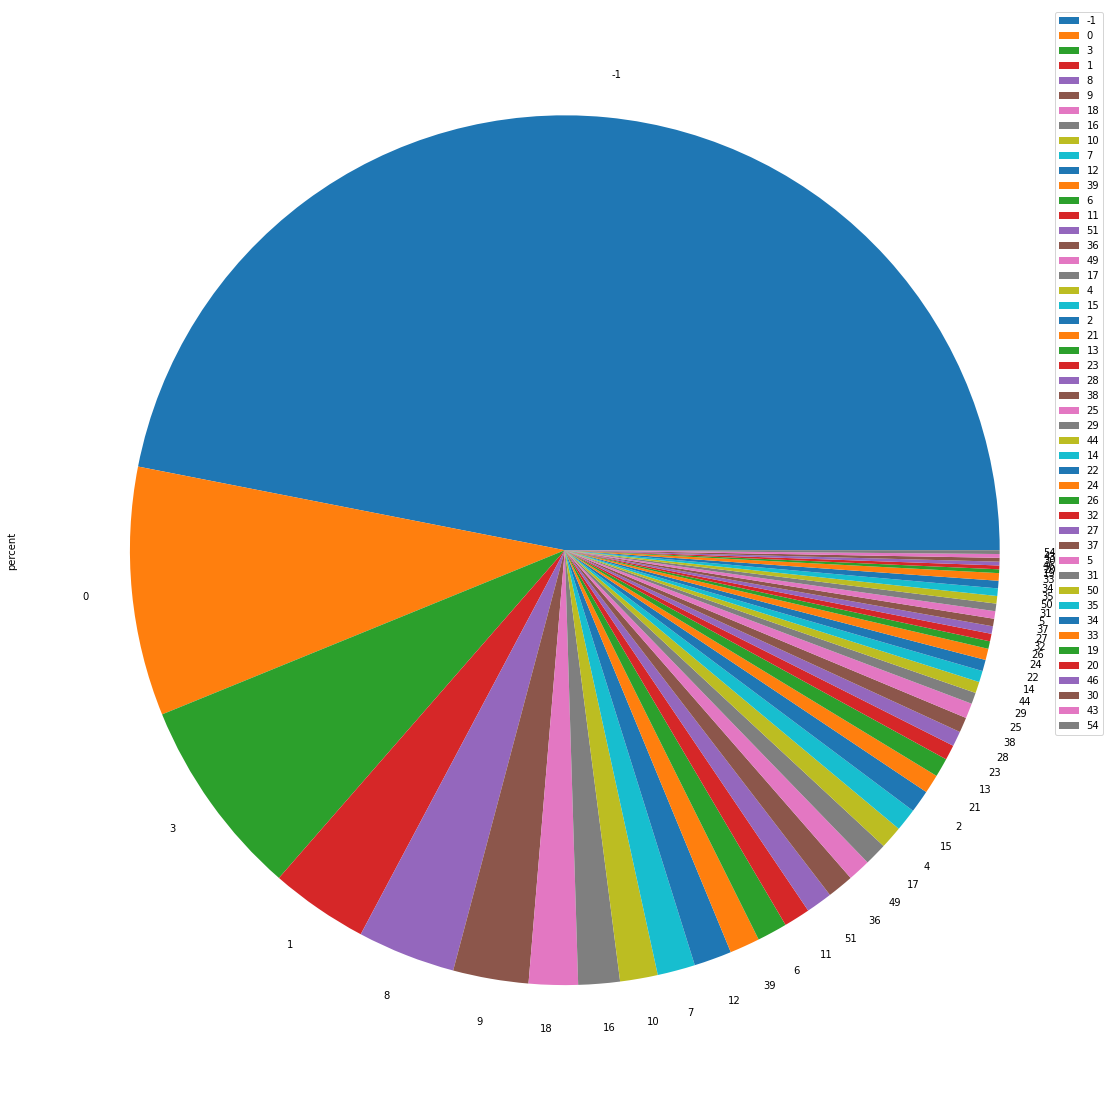

In [ ]:
plot = h19_test_other_pred_values.plot.pie(y='percent', figsize=(20, 20))


### H19_Test: OFFENSE-Verteilung

In [ ]:
# Topic-Verteilung für 'OFFENSE'-Tweets


In [ ]:
# Topic-Verteilung für 'OTHER'-Tweets
h19_test_offense = h19_test_raw.loc[h19_test_raw['task_1'] == 'HOF']
h19_test_offense


text_id                                               text task_1  \
0    hasoc_de_5270  Die Grüne Intelligenz Bestie 'Eckhardt', Prang...    HOF   
3    hasoc_de_5273  Unsere ESC Kandidatinnen haben selbst Schuld a...    HOF   
4    hasoc_de_5274  Scheinbar bekommt Sarah's Conner's Sohn Vincen...    HOF   
5    hasoc_de_5275  #Bundeswehr  erst überzeugen Politische Linke,...    HOF   
6    hasoc_de_5276  Du bist ein Rassist,Du erhöhst Dich über ander...    HOF   
..             ...                                                ...    ...   
844  hasoc_de_6114  Der/die/das große E ruft seine Mops wegen Unta...    HOF   
845  hasoc_de_6115  #Erdogan ruft seine Mops wegen Untauglichkeit ...    HOF   
846  hasoc_de_6116  Ich würde der Linken Chefin Kipping die 1.000 ...    HOF   
847  hasoc_de_6117  Ausländer sind Top &amp; Trumpf  Schon aufgefa...    HOF   
848  hasoc_de_6118  Wie der Regierungsjet die Regierungsflieger wi...    HOF   

    task_2  pred  
0     HATE     5  
3     OFFN    -1  
4     OFFN    -1  
5     HATE     1  
6     OFFN    26  
..     ...   ...  
844   OFFN    -1  
845   OFFN    -1  
846   OFFN    13  
847   OFFN    -1  
848   OFFN    -1  

[136 rows x 5 columns]

In [ ]:
h19_test_offense_pred_values = pd.DataFrame(h19_test_offense['pred'].value_counts())
h19_test_offense_pred_values['percent'] = (h19_test_offense_pred_values['pred'] / h19_test_offense_pred_values['pred'].sum()) * 100
h19_test_offense_pred_values

pred    percent
-1     74  54.411765
 9      7   5.147059
 8      5   3.676471
 7      5   3.676471
 5      4   2.941176
 16     4   2.941176
 1      3   2.205882
 26     3   2.205882
 2      3   2.205882
 32     2   1.470588
 36     2   1.470588
 11     2   1.470588
 29     2   1.470588
 0      2   1.470588
 4      2   1.470588
 18     2   1.470588
 51     2   1.470588
 23     1   0.735294
 39     1   0.735294
 37     1   0.735294
 12     1   0.735294
 17     1   0.735294
 49     1   0.735294
 28     1   0.735294
 44     1   0.735294
 43     1   0.735294
 38     1   0.735294
 14     1   0.735294
 13     1   0.735294

In [ ]:
df1 =  train_h19_model_topics[['Topic','Name']]
h19_test_offense_pred_values['Topic'] = h19_test_offense_pred_values.index
df2 = h19_test_offense_pred_values
data_frames = [df1, df2]
df_H19_OFFENSE_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_H19_OFFENSE_merged['percent'] = df_H19_OFFENSE_merged['percent'].astype(float)

In [ ]:
df_H19_OFFENSE_merged['pred'] = df_H19_OFFENSE_merged['pred'].astype(int)
df_H19_OFFENSE_merged


Topic                                               Name  pred    percent
0      -1                       -1_deutschland_immer_spd_afd    74  54.411765
1       0                          0_vögel_danke_wünsche_nix     2   1.470588
2       1                  1_demokratie_wahl_parteien_partei     3   2.205882
3       2                        2_hass_respekt_lügt_meinung     3   2.205882
4       3                           3_erster_energie_the_och     0   0.000000
5       4                            4_grünen_grüne_grün_rot     2   1.470588
6       5                    5_kirchen_kirche_religion_geist     4   2.941176
7       6            6_deutschland_deutschen_deutsche_berlin     0   0.000000
8       7                     7_muslime_moslems_akbar_allahu     5   3.676471
9       8             8_flüchtlinge_migranten_asyl_migration     5   3.676471
10      9          9_vergewaltigt_mädchen_jährige_nigerianer     7   5.147059
11     10                  10_kinder_schule_volkslehrer_kind     0   0.000000
12     11         11_medien_journalisten_journalismus_presse     2   1.470588
13     12                  12_tweet_twitter_account_twittern     1   0.735294
14     13              13_essen_fressen_frosch_gammelfleisch     1   0.735294
15     14        14_polizisten_polizei_abschiebungen_beamten     1   0.735294
16     15     15_mitarbeiter_betroffen_mitarbeitern_schließt     0   0.000000
17     16                 16_nazis_nazi_braunen_innenstädten     4   2.941176
18     17         17_klimawandel_klima_erwärmung_klimaschutz     1   0.735294
19     18               18_flüchtlinge_deutschland_euro_jahr     2   1.470588
20     19                    19_video_youtube_videos_trailer     0   0.000000
21     20                       20_zeiten_immer_schritt_mohr     0   0.000000
22     21                  21_syrer_syrische_iraker_jährigen     0   0.000000
23     22                   22_strom_autos_auto_elektroautos     0   0.000000
24     23                 23_bilder_bild_editorial_paragraph     1   0.735294
25     24                    24_bendit_cohn_daniel_spieglein     0   0.000000
26     25             25_netz_speichern_speichert_ausgemacht     0   0.000000
27     26           26_rassistisch_weiß_rassismus_anzufangen     3   2.205882
28     27                       27_euro_kredite_audi_bargeld     0   0.000000
29     28                   28_mord_skalpieren_fällt_notwehr     1   0.735294
30     29                29_land_landteil_beginnen_vaterland     2   1.470588
31     30                 30_clans_kriminelle_hinweis_begeht     0   0.000000
32     31          31_italien_salvini_italienische_italiener     0   0.000000
33     32              32_islam_deutschland_muslime_deutsche     2   1.470588
34     33                 33_rebecca_instagram_endlich_sucht     0   0.000000
35     34            34_österreich_europawahl_westen_gewinnt     0   0.000000
36     35            35_afrika_herrenrasse_albert_schweitzer     0   0.000000
37     36      36_merkel_hinterlässt_geigenkonzert_sauereien     2   1.470588
38     37                  37_polizei_berliner_endlich_sucht     1   0.735294
39     38                    38_stadt_straße_ückendorf_einst     1   0.735294
40     39                39_milliarden_rente_rechnungen_robo     1   0.735294
41     40             40_lieber_regierung_fastenbrechen_kern     0   0.000000
42     41        41_propaganda_android_anstrengung_empfohlen     0   0.000000
43     42                      42_hollywood_obm_kino_görlitz     0   0.000000
44     43                          43_teil_satire_lach_humor     1   0.735294
45     44                44_türken_türkei_türkischer_arabien     1   0.735294
46     45      45_darpa_militärische_alliierten_umfangreiche     0   0.000000
47     46             46_berlin_flughafen_amerika_hauptstadt     0   0.000000
48     47           47_sundance_justnobody_löschung_bescheid     0   0.000000
49     48                        48_fußball_liga_zwölf_sport     0   0.000000
50     49  49_sozialismus_

In [ ]:
df_H19_OFFENSE_sorted = df_H19_OFFENSE_merged.sort_values('pred', ascending=False)
df_H19_OFFENSE_sorted

Topic                                               Name  pred    percent
0      -1                       -1_deutschland_immer_spd_afd    74  54.411765
10      9          9_vergewaltigt_mädchen_jährige_nigerianer     7   5.147059
8       7                     7_muslime_moslems_akbar_allahu     5   3.676471
9       8             8_flüchtlinge_migranten_asyl_migration     5   3.676471
17     16                 16_nazis_nazi_braunen_innenstädten     4   2.941176
6       5                    5_kirchen_kirche_religion_geist     4   2.941176
2       1                  1_demokratie_wahl_parteien_partei     3   2.205882
3       2                        2_hass_respekt_lügt_meinung     3   2.205882
27     26           26_rassistisch_weiß_rassismus_anzufangen     3   2.205882
37     36      36_merkel_hinterlässt_geigenkonzert_sauereien     2   1.470588
33     32              32_islam_deutschland_muslime_deutsche     2   1.470588
30     29                29_land_landteil_beginnen_vaterland     2   1.470588
1       0                          0_vögel_danke_wünsche_nix     2   1.470588
19     18               18_flüchtlinge_deutschland_euro_jahr     2   1.470588
5       4                            4_grünen_grüne_grün_rot     2   1.470588
52     51               51_russland_russische_putin_wladimir     2   1.470588
12     11         11_medien_journalisten_journalismus_presse     2   1.470588
14     13              13_essen_fressen_frosch_gammelfleisch     1   0.735294
24     23                 23_bilder_bild_editorial_paragraph     1   0.735294
40     39                39_milliarden_rente_rechnungen_robo     1   0.735294
44     43                          43_teil_satire_lach_humor     1   0.735294
29     28                   28_mord_skalpieren_fällt_notwehr     1   0.735294
15     14        14_polizisten_polizei_abschiebungen_beamten     1   0.735294
45     44                44_türken_türkei_türkischer_arabien     1   0.735294
50     49  49_sozialismus_marktwirtschaft_soziale_kapital...     1   0.735294
39     38                    38_stadt_straße_ückendorf_einst     1   0.735294
18     17         17_klimawandel_klima_erwärmung_klimaschutz     1   0.735294
13     12                  12_tweet_twitter_account_twittern     1   0.735294
38     37                  37_polizei_berliner_endlich_sucht     1   0.735294
47     46             46_berlin_flughafen_amerika_hauptstadt     0   0.000000
46     45      45_darpa_militärische_alliierten_umfangreiche     0   0.000000
48     47           47_sundance_justnobody_löschung_bescheid     0   0.000000
49     48                        48_fußball_liga_zwölf_sport     0   0.000000
53     52                  52_traum_hals_eigenheim_zugewinne     0   0.000000
43     42                      42_hollywood_obm_kino_görlitz     0   0.000000
42     41        41_propaganda_android_anstrengung_empfohlen     0   0.000000
41     40             40_lieber_regierung_fastenbrechen_kern     0   0.000000
51     50                    50_grünen_deutschland_pro_grüne     0   0.000000
54     53            53_explosion_einsatz_zerstört_linköping     0   0.000000
28     27                       27_euro_kredite_audi_bargeld     0   0.000000
36     35            35_afrika_herrenrasse_albert_schweitzer     0   0.000000
35     34            34_österreich_europawahl_westen_gewinnt     0   0.000000
34     33                 33_rebecca_instagram_endlich_sucht     0   0.000000
32     31          31_italien_salvini_italienische_italiener     0   0.000000
31     30                 30_clans_kriminelle_hinweis_begeht     0   0.000000
26     25             25_netz_speichern_speichert_ausgemacht     0   0.000000
25     24                    24_bendit_cohn_daniel_spieglein     0   0.000000
23     22                   22_strom_autos_auto_elektroautos     0   0.000000
22     21                  21_syrer_syrische_iraker_jährigen     0   0.000000
21     20                       20_zeiten_immer_schritt_mohr     0   0.000000
20     19                 

In [ ]:
df_H19_OFFENSE_merged_plt = df_H19_OFFENSE_merged.set_index('Topic')


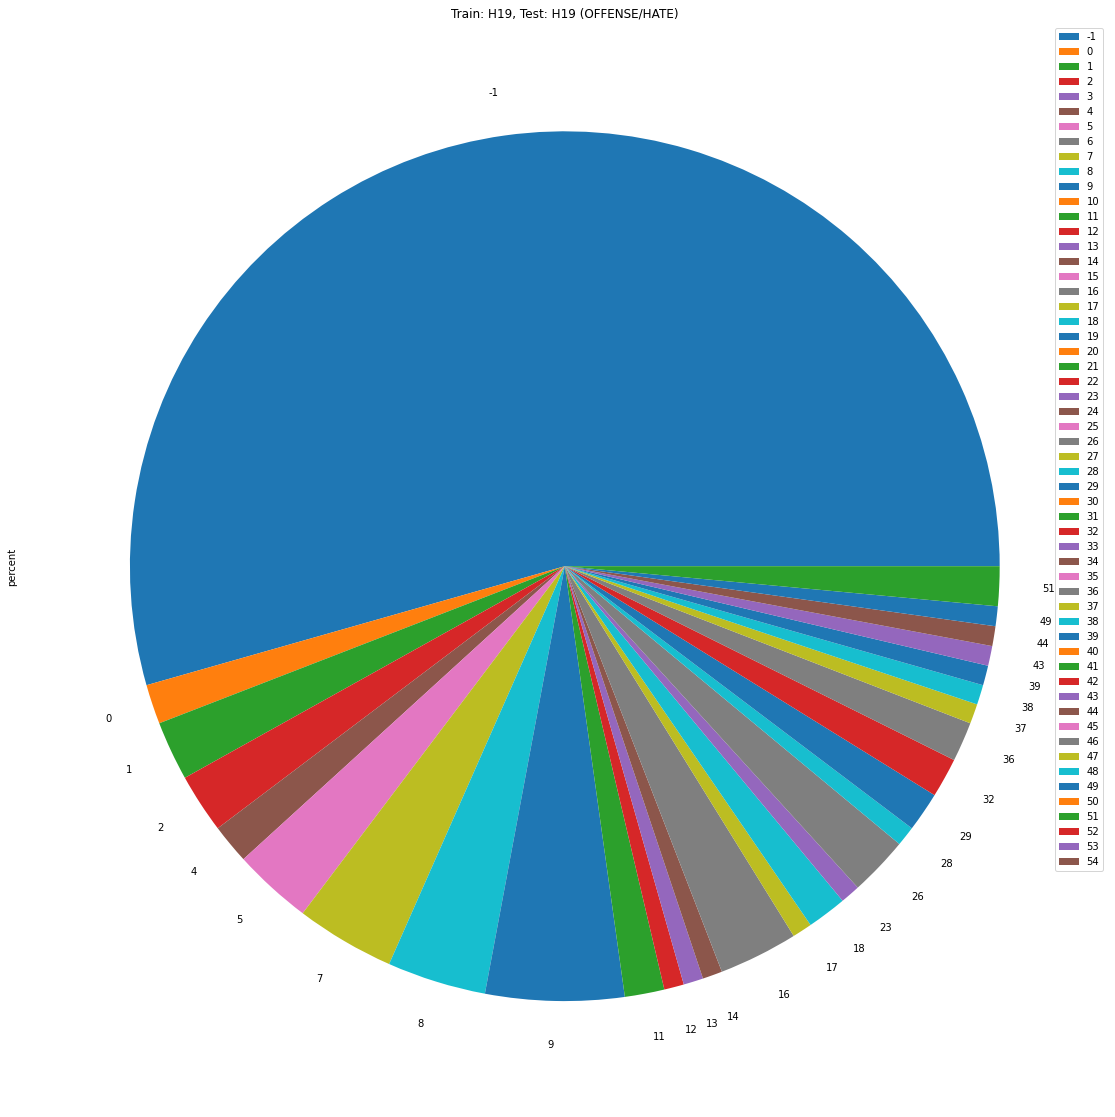

In [ ]:
plot = df_H19_OFFENSE_merged_plt.plot.pie(y='percent', figsize=(20, 20),
                                    title = 'Train: H19, Test: H19 (OFFENSE/HATE)')


In [ ]:
#plot = h19_test_offense_pred_values.plot.pie(y='percent', figsize=(20, 20))


### H20_Test

In [ ]:
h20_test_raw['pred'] = train_h19_pred_h20[0]
h20_test_raw

Unnamed: 0             tweet_id  \
0             0  1129095874242650112   
1             1  1129004308396236800   
2             2  1130896929355907080   
3             3  1132251534329307136   
4             4  1124941869115498496   
..          ...                  ...   
521         521  1124809878546128897   
522         522  1132433240000798720   
523         523  1127366294255357958   
524         524  1124362090460975105   
525         525  1131487097293103104   

                                                  text task1 task2  \
0      @derCarsti Boykottieren hört sich besser an. 💙💙   NOT  NONE   
1    RT @ibikus31: Es wird spekuliert, ob Merkel ei...   NOT  NONE   
2    Hat #Hitler wirklich den Krieg in der Wüste ve...   NOT  NONE   
3    RT @Beatrix_vStorch: #May tritt in UK unter Tr...   NOT  NONE   
4    @justmeDoro Eher nicht. Das Gänse hauen wieder...   NOT  NONE   
..                                                 ...   ...   ...   
521  RT @ChanMachtSo: SCHMERZEN!!!! Au!!! Mein Gehi...   NOT  NONE   
522  Die Zerstörung der Grünen. https://t.co/SIYDJj...   NOT  NONE   
523  RT @PParzival: "Antideutsche" Pseudo-linke Ide...   NOT  NONE   
524                         Klug reden und dumm leben.   NOT  NONE   
525  Wissen wir schon lange....hat das die Merkel e...   NOT  NONE   

                     ID  pred  
0    hasoc_2020_de_1053    -1  
1     hasoc_2020_de_671    36  
2    hasoc_2020_de_2977    -1  
3    hasoc_2020_de_1746    -1  
4    hasoc_2020_de_2416     0  
..                  ...   ...  
521   hasoc_2020_de_486    -1  
522  hasoc_2020_de_3388     4  
523  hasoc_2020_de_2745    -1  
524   hasoc_2020_de_236     2  
525  hasoc_2020_de_2850     4  

[526 rows x 7 columns]

### H20_Test: OTHER-Verteilung

In [ ]:
# Topic-Verteilung für 'OTHER'-Tweets
h20_test_other = h20_test_raw.loc[h20_test_raw['task1'] == 'NOT']
h20_test_other


Unnamed: 0             tweet_id  \
0             0  1129095874242650112   
1             1  1129004308396236800   
2             2  1130896929355907080   
3             3  1132251534329307136   
4             4  1124941869115498496   
..          ...                  ...   
521         521  1124809878546128897   
522         522  1132433240000798720   
523         523  1127366294255357958   
524         524  1124362090460975105   
525         525  1131487097293103104   

                                                  text task1 task2  \
0      @derCarsti Boykottieren hört sich besser an. 💙💙   NOT  NONE   
1    RT @ibikus31: Es wird spekuliert, ob Merkel ei...   NOT  NONE   
2    Hat #Hitler wirklich den Krieg in der Wüste ve...   NOT  NONE   
3    RT @Beatrix_vStorch: #May tritt in UK unter Tr...   NOT  NONE   
4    @justmeDoro Eher nicht. Das Gänse hauen wieder...   NOT  NONE   
..                                                 ...   ...   ...   
521  RT @ChanMachtSo: SCHMERZEN!!!! Au!!! Mein Gehi...   NOT  NONE   
522  Die Zerstörung der Grünen. https://t.co/SIYDJj...   NOT  NONE   
523  RT @PParzival: "Antideutsche" Pseudo-linke Ide...   NOT  NONE   
524                         Klug reden und dumm leben.   NOT  NONE   
525  Wissen wir schon lange....hat das die Merkel e...   NOT  NONE   

                     ID  pred  
0    hasoc_2020_de_1053    -1  
1     hasoc_2020_de_671    36  
2    hasoc_2020_de_2977    -1  
3    hasoc_2020_de_1746    -1  
4    hasoc_2020_de_2416     0  
..                  ...   ...  
521   hasoc_2020_de_486    -1  
522  hasoc_2020_de_3388     4  
523  hasoc_2020_de_2745    -1  
524   hasoc_2020_de_236     2  
525  hasoc_2020_de_2850     4  

[365 rows x 7 columns]

In [ ]:
h20_test_other_pred_values = pd.DataFrame(h20_test_other['pred'].value_counts())
h20_test_other_pred_values['percent'] = (h20_test_other_pred_values['pred'] / h20_test_other_pred_values['pred'].sum()) * 100
h20_test_other_pred_values

pred    percent
-1    180  49.315068
 0     59  16.164384
 4     26   7.123288
 16    17   4.657534
 36    13   3.561644
 2      8   2.191781
 6      8   2.191781
 1      7   1.917808
 3      7   1.917808
 44     4   1.095890
 7      4   1.095890
 10     4   1.095890
 39     3   0.821918
 43     2   0.547945
 9      2   0.547945
 13     2   0.547945
 42     2   0.547945
 32     2   0.547945
 23     1   0.273973
 28     1   0.273973
 22     1   0.273973
 15     1   0.273973
 5      1   0.273973
 8      1   0.273973
 18     1   0.273973
 25     1   0.273973
 24     1   0.273973
 34     1   0.273973
 50     1   0.273973
 26     1   0.273973
 47     1   0.273973
 27     1   0.273973
 20     1   0.273973

In [ ]:
df1 =  train_h19_model_topics[['Topic','Name']]
h20_test_other_pred_values['Topic'] = h20_test_other_pred_values.index
df2 = h20_test_other_pred_values
data_frames = [df1, df2]
df_H20_OTHER_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_H20_OTHER_merged['percent'] = df_H20_OTHER_merged['percent'].astype(float)

In [ ]:
df_H20_OTHER_merged['pred'] = df_H20_OTHER_merged['pred'].astype(int)

In [ ]:
df_H20_OTHER_sorted = df_H20_OTHER_merged.sort_values('pred', ascending=False)
df_H20_OTHER_sorted

Topic                                               Name  pred    percent
0      -1                       -1_deutschland_immer_spd_afd   180  49.315068
1       0                          0_vögel_danke_wünsche_nix    59  16.164384
5       4                            4_grünen_grüne_grün_rot    26   7.123288
17     16                 16_nazis_nazi_braunen_innenstädten    17   4.657534
37     36      36_merkel_hinterlässt_geigenkonzert_sauereien    13   3.561644
3       2                        2_hass_respekt_lügt_meinung     8   2.191781
7       6            6_deutschland_deutschen_deutsche_berlin     8   2.191781
2       1                  1_demokratie_wahl_parteien_partei     7   1.917808
4       3                           3_erster_energie_the_och     7   1.917808
11     10                  10_kinder_schule_volkslehrer_kind     4   1.095890
45     44                44_türken_türkei_türkischer_arabien     4   1.095890
8       7                     7_muslime_moslems_akbar_allahu     4   1.095890
40     39                39_milliarden_rente_rechnungen_robo     3   0.821918
10      9          9_vergewaltigt_mädchen_jährige_nigerianer     2   0.547945
44     43                          43_teil_satire_lach_humor     2   0.547945
14     13              13_essen_fressen_frosch_gammelfleisch     2   0.547945
43     42                      42_hollywood_obm_kino_görlitz     2   0.547945
33     32              32_islam_deutschland_muslime_deutsche     2   0.547945
25     24                    24_bendit_cohn_daniel_spieglein     1   0.273973
48     47           47_sundance_justnobody_löschung_bescheid     1   0.273973
35     34            34_österreich_europawahl_westen_gewinnt     1   0.273973
29     28                   28_mord_skalpieren_fällt_notwehr     1   0.273973
51     50                    50_grünen_deutschland_pro_grüne     1   0.273973
27     26           26_rassistisch_weiß_rassismus_anzufangen     1   0.273973
26     25             25_netz_speichern_speichert_ausgemacht     1   0.273973
28     27                       27_euro_kredite_audi_bargeld     1   0.273973
24     23                 23_bilder_bild_editorial_paragraph     1   0.273973
9       8             8_flüchtlinge_migranten_asyl_migration     1   0.273973
23     22                   22_strom_autos_auto_elektroautos     1   0.273973
21     20                       20_zeiten_immer_schritt_mohr     1   0.273973
16     15     15_mitarbeiter_betroffen_mitarbeitern_schließt     1   0.273973
6       5                    5_kirchen_kirche_religion_geist     1   0.273973
19     18               18_flüchtlinge_deutschland_euro_jahr     1   0.273973
12     11         11_medien_journalisten_journalismus_presse     0   0.000000
46     45      45_darpa_militärische_alliierten_umfangreiche     0   0.000000
47     46             46_berlin_flughafen_amerika_hauptstadt     0   0.000000
49     48                        48_fußball_liga_zwölf_sport     0   0.000000
15     14        14_polizisten_polizei_abschiebungen_beamten     0   0.000000
50     49  49_sozialismus_marktwirtschaft_soziale_kapital...     0   0.000000
52     51               51_russland_russische_putin_wladimir     0   0.000000
53     52                  52_traum_hals_eigenheim_zugewinne     0   0.000000
54     53            53_explosion_einsatz_zerstört_linköping     0   0.000000
13     12                  12_tweet_twitter_account_twittern     0   0.000000
41     40             40_lieber_regierung_fastenbrechen_kern     0   0.000000
42     41        41_propaganda_android_anstrengung_empfohlen     0   0.000000
39     38                    38_stadt_straße_ückendorf_einst     0   0.000000
38     37                  37_polizei_berliner_endlich_sucht     0   0.000000
18     17         17_klimawandel_klima_erwärmung_klimaschutz     0   0.000000
36     35            35_afrika_herrenrasse_albert_schweitzer     0   0.000000
34     33                 33_rebecca_instagram_endlich_sucht     0   0.000000
20     19                 

In [ ]:
df_H20_OTHER_merged_plt = df_H20_OTHER_merged.set_index('Topic')


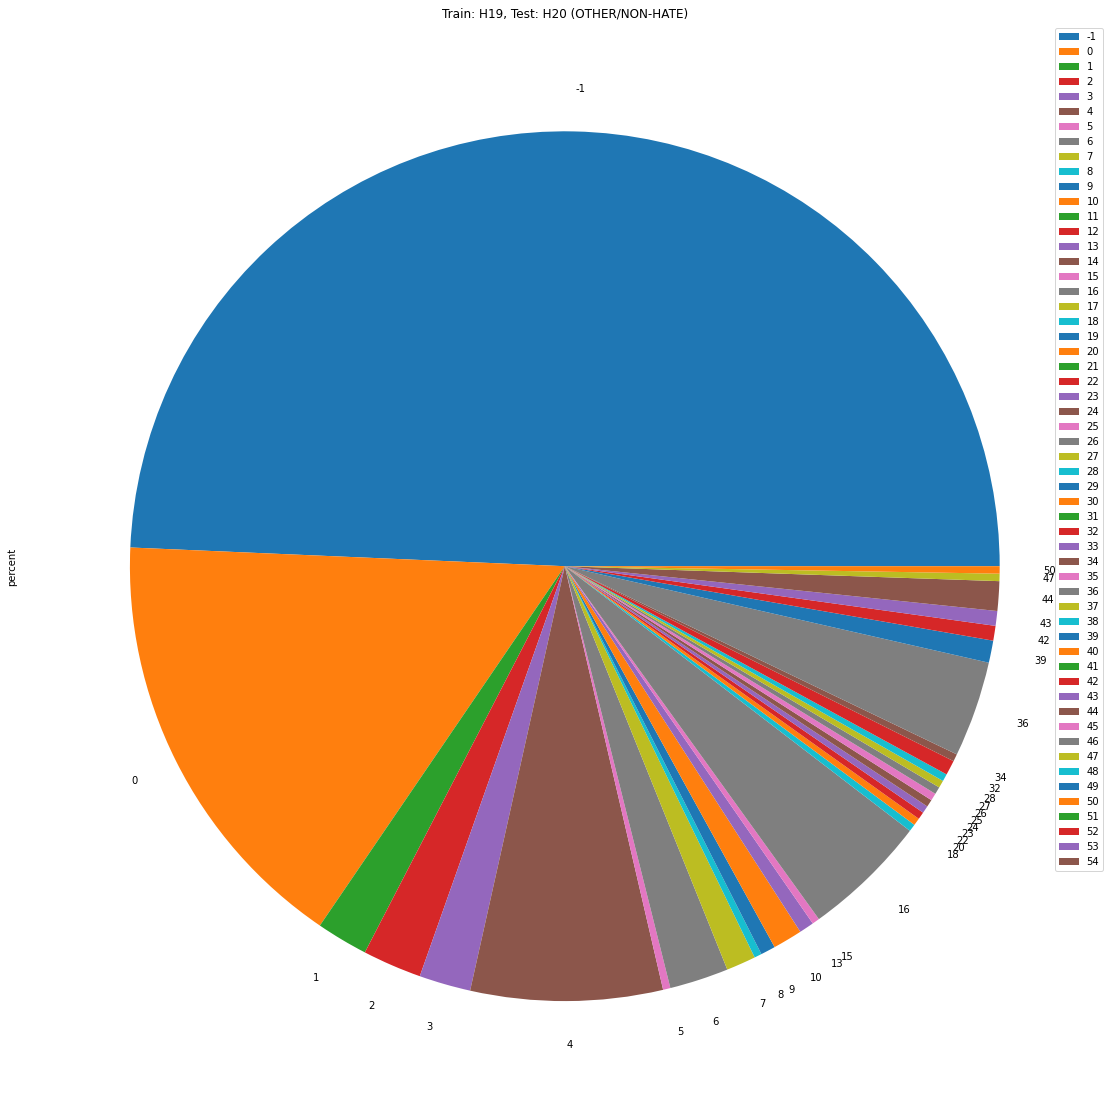

In [ ]:
plot = df_H20_OTHER_merged_plt.plot.pie(x = 'Name', y='percent', figsize=(20, 20),
                                    title = 'Train: H19, Test: H20 (OTHER/NON-HATE)')


In [ ]:
#plot = h20_test_other_pred_values.plot.pie(y='percent', figsize=(20, 20))


### H20_Test: OFFENSE-Verteilung

In [ ]:
# Topic-Verteilung für 'OTHER'-Tweets
h20_test_offense = h20_test_raw.loc[h20_test_raw['task1'] == 'HOF']
h20_test_offense


Unnamed: 0             tweet_id  \
5             5  1129712298531184641   
6             6  1123981478361219073   
17           17  1126089577486323712   
21           21  1134130242786926592   
22           22  1134444350027509766   
..          ...                  ...   
500         500  1128321203075256320   
508         508  1129379774076473344   
511         511  1130096161212252162   
512         512  1124842568972288000   
517         517  1124379312264708101   

                                                  text task1 task2  \
5    RT @VonSchwer: Ein guter Patriot geht von Bord...   HOF  OFFN   
6    @yooli_derechte @MontanaBlack Mich wundert es ...   HOF  OFFN   
17   RT @CWBWElias: @TheresaGesperrt Wollte meine N...   HOF  PRFN   
21   @sgepeeti Verdursten ist aber auch ein scheiß ...   HOF  PRFN   
22                 Scheiß. Hurensohn gam @FortniteGame   HOF  PRFN   
..                                                 ...   ...   ...   
500                         @VizzionsXI halt dein maul   HOF  OFFN   
508                       Halt die fresse du hurensohn   HOF  PRFN   
511         @noelmgb_ @Sebbe2704 Richtiger Hurensohn 😂   HOF  PRFN   
512  Der Bass ist tief, die Atmosphäre sehr entspan...   HOF  PRFN   
517  RT @theunwantedpath: HABT IHR DEN ARSCH OFFEN ...   HOF  PRFN   

                     ID  pred  
5    hasoc_2020_de_1112    -1  
6    hasoc_2020_de_2938    -1  
17   hasoc_2020_de_2545    -1  
21   hasoc_2020_de_1235    -1  
22   hasoc_2020_de_2487     0  
..                  ...   ...  
500  hasoc_2020_de_1958    -1  
508  hasoc_2020_de_2465     0  
511   hasoc_2020_de_958     0  
512  hasoc_2020_de_2470     0  
517   hasoc_2020_de_986    -1  

[161 rows x 7 columns]

In [ ]:
h20_test_offense_pred_values = pd.DataFrame(h20_test_offense['pred'].value_counts())
h20_test_offense_pred_values['percent'] = (h20_test_offense_pred_values['pred'] / h20_test_offense_pred_values['pred'].sum()) * 100
h20_test_offense_pred_values

pred    percent
-1     91  56.521739
 0     25  15.527950
 4      7   4.347826
 13     6   3.726708
 2      5   3.105590
 38     3   1.863354
 1      3   1.863354
 9      3   1.863354
 24     2   1.242236
 7      2   1.242236
 16     2   1.242236
 8      2   1.242236
 6      2   1.242236
 51     1   0.621118
 11     1   0.621118
 10     1   0.621118
 12     1   0.621118
 23     1   0.621118
 3      1   0.621118
 36     1   0.621118
 44     1   0.621118

In [ ]:
df1 =  train_h19_model_topics[['Topic','Name']]
h20_test_offense_pred_values['Topic'] = h20_test_offense_pred_values.index
df2 = h20_test_offense_pred_values
data_frames = [df1, df2]
df_H20_OFFENSE_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_H20_OFFENSE_merged['percent'] = df_H20_OFFENSE_merged['percent'].astype(float)

In [ ]:
df_H20_OFFENSE_merged['pred'] = df_H20_OFFENSE_merged['pred'].astype(int)
df_H20_OFFENSE_merged


Topic                                               Name  pred    percent
0      -1                       -1_deutschland_immer_spd_afd    91  56.521739
1       0                          0_vögel_danke_wünsche_nix    25  15.527950
2       1                  1_demokratie_wahl_parteien_partei     3   1.863354
3       2                        2_hass_respekt_lügt_meinung     5   3.105590
4       3                           3_erster_energie_the_och     1   0.621118
5       4                            4_grünen_grüne_grün_rot     7   4.347826
6       5                    5_kirchen_kirche_religion_geist     0   0.000000
7       6            6_deutschland_deutschen_deutsche_berlin     2   1.242236
8       7                     7_muslime_moslems_akbar_allahu     2   1.242236
9       8             8_flüchtlinge_migranten_asyl_migration     2   1.242236
10      9          9_vergewaltigt_mädchen_jährige_nigerianer     3   1.863354
11     10                  10_kinder_schule_volkslehrer_kind     1   0.621118
12     11         11_medien_journalisten_journalismus_presse     1   0.621118
13     12                  12_tweet_twitter_account_twittern     1   0.621118
14     13              13_essen_fressen_frosch_gammelfleisch     6   3.726708
15     14        14_polizisten_polizei_abschiebungen_beamten     0   0.000000
16     15     15_mitarbeiter_betroffen_mitarbeitern_schließt     0   0.000000
17     16                 16_nazis_nazi_braunen_innenstädten     2   1.242236
18     17         17_klimawandel_klima_erwärmung_klimaschutz     0   0.000000
19     18               18_flüchtlinge_deutschland_euro_jahr     0   0.000000
20     19                    19_video_youtube_videos_trailer     0   0.000000
21     20                       20_zeiten_immer_schritt_mohr     0   0.000000
22     21                  21_syrer_syrische_iraker_jährigen     0   0.000000
23     22                   22_strom_autos_auto_elektroautos     0   0.000000
24     23                 23_bilder_bild_editorial_paragraph     1   0.621118
25     24                    24_bendit_cohn_daniel_spieglein     2   1.242236
26     25             25_netz_speichern_speichert_ausgemacht     0   0.000000
27     26           26_rassistisch_weiß_rassismus_anzufangen     0   0.000000
28     27                       27_euro_kredite_audi_bargeld     0   0.000000
29     28                   28_mord_skalpieren_fällt_notwehr     0   0.000000
30     29                29_land_landteil_beginnen_vaterland     0   0.000000
31     30                 30_clans_kriminelle_hinweis_begeht     0   0.000000
32     31          31_italien_salvini_italienische_italiener     0   0.000000
33     32              32_islam_deutschland_muslime_deutsche     0   0.000000
34     33                 33_rebecca_instagram_endlich_sucht     0   0.000000
35     34            34_österreich_europawahl_westen_gewinnt     0   0.000000
36     35            35_afrika_herrenrasse_albert_schweitzer     0   0.000000
37     36      36_merkel_hinterlässt_geigenkonzert_sauereien     1   0.621118
38     37                  37_polizei_berliner_endlich_sucht     0   0.000000
39     38                    38_stadt_straße_ückendorf_einst     3   1.863354
40     39                39_milliarden_rente_rechnungen_robo     0   0.000000
41     40             40_lieber_regierung_fastenbrechen_kern     0   0.000000
42     41        41_propaganda_android_anstrengung_empfohlen     0   0.000000
43     42                      42_hollywood_obm_kino_görlitz     0   0.000000
44     43                          43_teil_satire_lach_humor     0   0.000000
45     44                44_türken_türkei_türkischer_arabien     1   0.621118
46     45      45_darpa_militärische_alliierten_umfangreiche     0   0.000000
47     46             46_berlin_flughafen_amerika_hauptstadt     0   0.000000
48     47           47_sundance_justnobody_löschung_bescheid     0   0.000000
49     48                        48_fußball_liga_zwölf_sport     0   0.000000
50     49  49_sozialismus_

In [ ]:
df_H20_OFFENSE_sorted = df_H20_OFFENSE_merged.sort_values('pred', ascending=False)
df_H20_OFFENSE_sorted

Topic                                               Name  pred    percent
0      -1                       -1_deutschland_immer_spd_afd    91  56.521739
1       0                          0_vögel_danke_wünsche_nix    25  15.527950
5       4                            4_grünen_grüne_grün_rot     7   4.347826
14     13              13_essen_fressen_frosch_gammelfleisch     6   3.726708
3       2                        2_hass_respekt_lügt_meinung     5   3.105590
2       1                  1_demokratie_wahl_parteien_partei     3   1.863354
39     38                    38_stadt_straße_ückendorf_einst     3   1.863354
10      9          9_vergewaltigt_mädchen_jährige_nigerianer     3   1.863354
7       6            6_deutschland_deutschen_deutsche_berlin     2   1.242236
8       7                     7_muslime_moslems_akbar_allahu     2   1.242236
9       8             8_flüchtlinge_migranten_asyl_migration     2   1.242236
25     24                    24_bendit_cohn_daniel_spieglein     2   1.242236
17     16                 16_nazis_nazi_braunen_innenstädten     2   1.242236
52     51               51_russland_russische_putin_wladimir     1   0.621118
45     44                44_türken_türkei_türkischer_arabien     1   0.621118
24     23                 23_bilder_bild_editorial_paragraph     1   0.621118
37     36      36_merkel_hinterlässt_geigenkonzert_sauereien     1   0.621118
11     10                  10_kinder_schule_volkslehrer_kind     1   0.621118
4       3                           3_erster_energie_the_och     1   0.621118
13     12                  12_tweet_twitter_account_twittern     1   0.621118
12     11         11_medien_journalisten_journalismus_presse     1   0.621118
54     53            53_explosion_einsatz_zerstört_linköping     0   0.000000
38     37                  37_polizei_berliner_endlich_sucht     0   0.000000
40     39                39_milliarden_rente_rechnungen_robo     0   0.000000
41     40             40_lieber_regierung_fastenbrechen_kern     0   0.000000
42     41        41_propaganda_android_anstrengung_empfohlen     0   0.000000
43     42                      42_hollywood_obm_kino_görlitz     0   0.000000
53     52                  52_traum_hals_eigenheim_zugewinne     0   0.000000
44     43                          43_teil_satire_lach_humor     0   0.000000
36     35            35_afrika_herrenrasse_albert_schweitzer     0   0.000000
46     45      45_darpa_militärische_alliierten_umfangreiche     0   0.000000
47     46             46_berlin_flughafen_amerika_hauptstadt     0   0.000000
48     47           47_sundance_justnobody_löschung_bescheid     0   0.000000
49     48                        48_fußball_liga_zwölf_sport     0   0.000000
50     49  49_sozialismus_marktwirtschaft_soziale_kapital...     0   0.000000
51     50                    50_grünen_deutschland_pro_grüne     0   0.000000
28     27                       27_euro_kredite_audi_bargeld     0   0.000000
35     34            34_österreich_europawahl_westen_gewinnt     0   0.000000
22     21                  21_syrer_syrische_iraker_jährigen     0   0.000000
6       5                    5_kirchen_kirche_religion_geist     0   0.000000
15     14        14_polizisten_polizei_abschiebungen_beamten     0   0.000000
16     15     15_mitarbeiter_betroffen_mitarbeitern_schließt     0   0.000000
18     17         17_klimawandel_klima_erwärmung_klimaschutz     0   0.000000
19     18               18_flüchtlinge_deutschland_euro_jahr     0   0.000000
20     19                    19_video_youtube_videos_trailer     0   0.000000
21     20                       20_zeiten_immer_schritt_mohr     0   0.000000
23     22                   22_strom_autos_auto_elektroautos     0   0.000000
34     33                 33_rebecca_instagram_endlich_sucht     0   0.000000
26     25             25_netz_speichern_speichert_ausgemacht     0   0.000000
27     26           26_rassistisch_weiß_rassismus_anzufangen     0   0.000000
29     28                 

In [ ]:
df_H20_OFFENSE_merged_plt = df_H20_OFFENSE_merged.set_index('Topic')


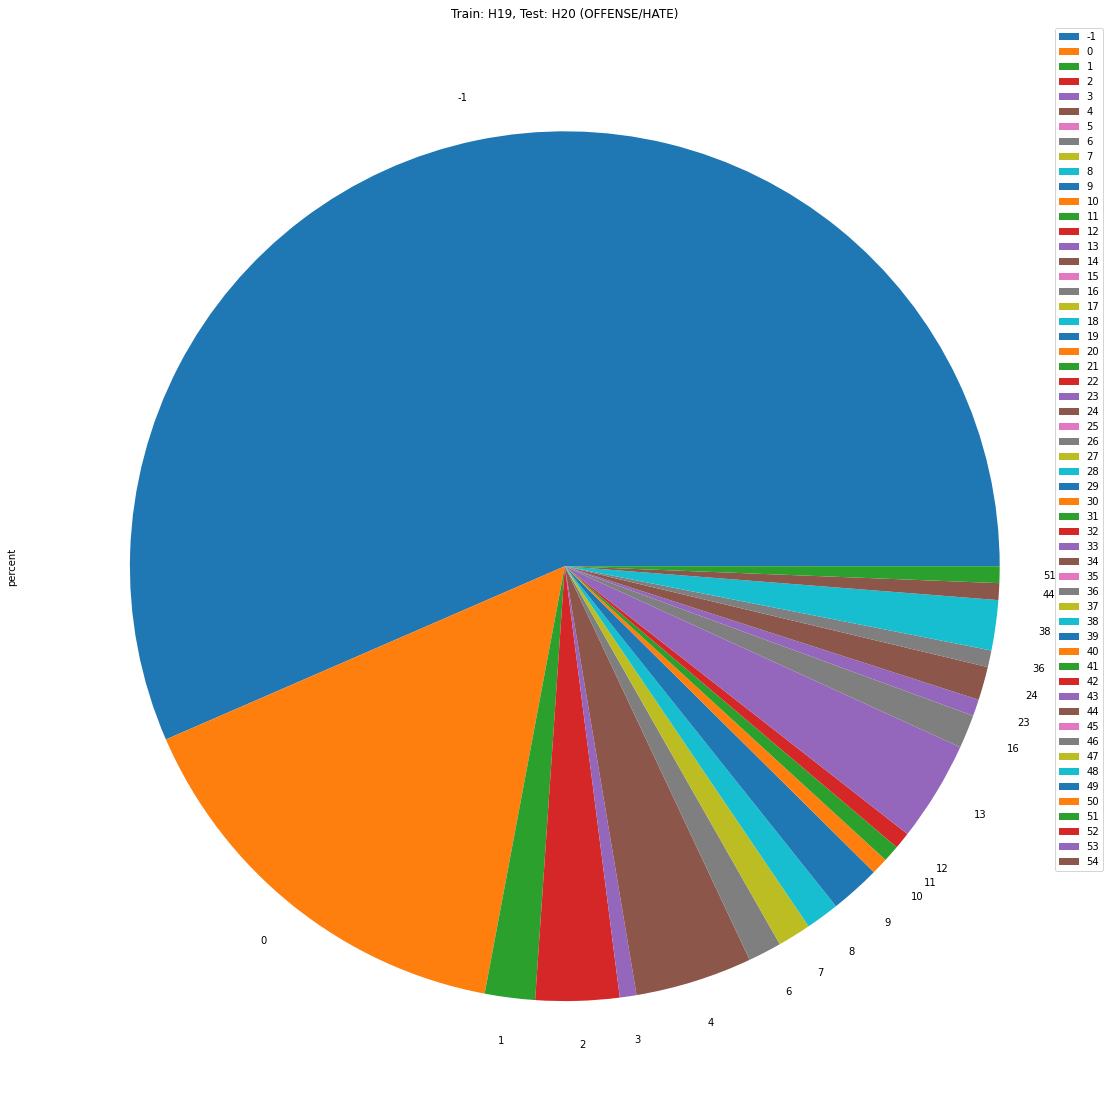

In [ ]:
plot = df_H20_OFFENSE_merged_plt.plot.pie(y='percent', figsize=(20, 20),
                                    title = 'Train: H19, Test: H20 (OFFENSE/HATE)')


### Index richtig setzen: Kategorie OTHER bzw. NOT

In [ ]:
# df1 enthält die Topicnummern und ihre Bezeichnungen
df1 =  train_h19_model_topics[['Topic','Name']]
df1

Topic                                               Name
0      -1                       -1_deutschland_immer_spd_afd
1       0                          0_vögel_danke_wünsche_nix
2       1                  1_demokratie_wahl_parteien_partei
3       2                        2_hass_respekt_lügt_meinung
4       3                           3_erster_energie_the_och
5       4                            4_grünen_grüne_grün_rot
6       5                    5_kirchen_kirche_religion_geist
7       6            6_deutschland_deutschen_deutsche_berlin
8       7                     7_muslime_moslems_akbar_allahu
9       8             8_flüchtlinge_migranten_asyl_migration
10      9          9_vergewaltigt_mädchen_jährige_nigerianer
11     10                  10_kinder_schule_volkslehrer_kind
12     11         11_medien_journalisten_journalismus_presse
13     12                  12_tweet_twitter_account_twittern
14     13              13_essen_fressen_frosch_gammelfleisch
15     14        14_polizisten_polizei_abschiebungen_beamten
16     15     15_mitarbeiter_betroffen_mitarbeitern_schließt
17     16                 16_nazis_nazi_braunen_innenstädten
18     17         17_klimawandel_klima_erwärmung_klimaschutz
19     18               18_flüchtlinge_deutschland_euro_jahr
20     19                    19_video_youtube_videos_trailer
21     20                       20_zeiten_immer_schritt_mohr
22     21                  21_syrer_syrische_iraker_jährigen
23     22                   22_strom_autos_auto_elektroautos
24     23                 23_bilder_bild_editorial_paragraph
25     24                    24_bendit_cohn_daniel_spieglein
26     25             25_netz_speichern_speichert_ausgemacht
27     26           26_rassistisch_weiß_rassismus_anzufangen
28     27                       27_euro_kredite_audi_bargeld
29     28                   28_mord_skalpieren_fällt_notwehr
30     29                29_land_landteil_beginnen_vaterland
31     30                 30_clans_kriminelle_hinweis_begeht
32     31          31_italien_salvini_italienische_italiener
33     32              32_islam_deutschland_muslime_deutsche
34     33                 33_rebecca_instagram_endlich_sucht
35     34            34_österreich_europawahl_westen_gewinnt
36     35            35_afrika_herrenrasse_albert_schweitzer
37     36      36_merkel_hinterlässt_geigenkonzert_sauereien
38     37                  37_polizei_berliner_endlich_sucht
39     38                    38_stadt_straße_ückendorf_einst
40     39                39_milliarden_rente_rechnungen_robo
41     40             40_lieber_regierung_fastenbrechen_kern
42     41        41_propaganda_android_anstrengung_empfohlen
43     42                      42_hollywood_obm_kino_görlitz
44     43                          43_teil_satire_lach_humor
45     44                44_türken_türkei_türkischer_arabien
46     45      45_darpa_militärische_alliierten_umfangreiche
47     46             46_berlin_flughafen_amerika_hauptstadt
48     47           47_sundance_justnobody_löschung_bescheid
49     48                        48_fußball_liga_zwölf_sport
50     49  49_sozialismus_marktwirtschaft_soziale_kapital...
51     50                    50_grünen_deutschland_pro_grüne
52     51               51_russland_russische_putin_wladimir
53     52                  52_traum_hals_eigenheim_zugewinne
54     53            53_explosion_einsatz_zerstört_linköping
55     54                  54_schulen_bestimmt_berlin_rechts

In [ ]:
ge18_test_other_pred_values['Topic'] = ge18_test_other_pred_values.index
ge18_test_other_pred_values

pred    percent  Topic
-1   1300  55.793991     -1
 0    298  12.789700      0
 5     99   4.248927      5
 1     72   3.090129      1
 9     57   2.446352      9
 2     52   2.231760      2
 12    39   1.673820     12
 7     35   1.502146      7
 8     33   1.416309      8
 4     28   1.201717      4
 10    22   0.944206     10
 26    19   0.815451     26
 6     17   0.729614      6
 36    17   0.729614     36
 25    16   0.686695     25
 28    15   0.643777     28
 44    14   0.600858     44
 30    14   0.600858     30
 29    14   0.600858     29
 15    14   0.600858     15
 11    13   0.557940     11
 39    12   0.515021     39
 16    11   0.472103     16
 3      9   0.386266      3
 23     9   0.386266     23
 21     8   0.343348     21
 22     8   0.343348     22
 17     7   0.300429     17
 13     7   0.300429     13
 32     7   0.300429     32
 14     6   0.257511     14
 45     6   0.257511     45
 43     5   0.214592     43
 38     5   0.214592     38
 27     4   0.171674     27
 42     4   0.171674     42
 20     3   0.128755     20
 47     3   0.128755     47
 49     3   0.128755     49
 19     3   0.128755     19
 34     3   0.128755     34
 18     3   0.128755     18
 40     2   0.085837     40
 41     2   0.085837     41
 24     2   0.085837     24
 48     2   0.085837     48
 50     2   0.085837     50
 35     1   0.042918     35
 46     1   0.042918     46
 52     1   0.042918     52
 33     1   0.042918     33
 31     1   0.042918     31
 51     1   0.042918     51

In [ ]:
# df2 bis df5 enthalten Vorhersagen, Topicanteile in Prozent sowie die Topicnr.
# dabei werden die Spalten umbenannt, damit es später beim Zusammenfügen nicht
# zu Doppelungen kommt
df2 = ge18_test_other_pred_values 
df2 = df2.rename(columns={'pred':'predGE18', 'percent':'%GE18', 'Topic':'Topic'})

In [ ]:
ge19_test_other_pred_values['Topic'] = ge19_test_other_pred_values.index
ge19_test_other_pred_values

pred    percent  Topic
-1   1188  57.641921     -1
 0    264  12.809316      0
 1     71   3.444930      1
 12    62   3.008248     12
 2     39   1.892285      2
 16    30   1.455604     16
 13    25   1.213003     13
 26    24   1.164483     26
 17    23   1.115963     17
 49    22   1.067443     49
 10    20   0.970403     10
 7     18   0.873362      7
 8     17   0.824842      8
 5     17   0.824842      5
 22    16   0.776322     22
 15    16   0.776322     15
 39    15   0.727802     39
 11    14   0.679282     11
 3     12   0.582242      3
 29    12   0.582242     29
 14    11   0.533721     14
 28    10   0.485201     28
 44     9   0.436681     44
 23     9   0.436681     23
 25     8   0.388161     25
 19     8   0.388161     19
 24     8   0.388161     24
 43     7   0.339641     43
 4      6   0.291121      4
 18     6   0.291121     18
 9      6   0.291121      9
 45     6   0.291121     45
 38     6   0.291121     38
 36     5   0.242601     36
 27     5   0.242601     27
 32     5   0.242601     32
 6      5   0.242601      6
 30     4   0.194081     30
 42     4   0.194081     42
 20     4   0.194081     20
 34     3   0.145560     34
 41     3   0.145560     41
 47     3   0.145560     47
 31     2   0.097040     31
 35     2   0.097040     35
 48     2   0.097040     48
 53     2   0.097040     53
 51     2   0.097040     51
 52     1   0.048520     52
 40     1   0.048520     40
 33     1   0.048520     33
 21     1   0.048520     21
 37     1   0.048520     37

In [ ]:
df3 = ge19_test_other_pred_values
df3 = df3.rename(columns={'pred':'predGE19', 'percent':'%GE19', 'Topic':'Topic'})

In [ ]:
h19_test_other_pred_values['Topic'] = h19_test_other_pred_values.index
h19_test_other_pred_values

pred    percent  Topic
-1    335  46.918768     -1
 0     66   9.243697      0
 3     53   7.422969      3
 1     26   3.641457      1
 8     26   3.641457      8
 9     20   2.801120      9
 18    13   1.820728     18
 16    11   1.540616     16
 10    10   1.400560     10
 7     10   1.400560      7
 12    10   1.400560     12
 39     8   1.120448     39
 6      8   1.120448      6
 11     7   0.980392     11
 51     7   0.980392     51
 36     7   0.980392     36
 49     6   0.840336     49
 17     6   0.840336     17
 4      6   0.840336      4
 15     6   0.840336     15
 2      6   0.840336      2
 21     5   0.700280     21
 13     5   0.700280     13
 23     4   0.560224     23
 28     4   0.560224     28
 38     4   0.560224     38
 25     4   0.560224     25
 29     3   0.420168     29
 44     3   0.420168     44
 14     3   0.420168     14
 22     3   0.420168     22
 24     3   0.420168     24
 26     2   0.280112     26
 32     2   0.280112     32
 27     2   0.280112     27
 37     2   0.280112     37
 5      2   0.280112      5
 31     2   0.280112     31
 50     2   0.280112     50
 35     2   0.280112     35
 34     2   0.280112     34
 33     2   0.280112     33
 19     1   0.140056     19
 20     1   0.140056     20
 46     1   0.140056     46
 30     1   0.140056     30
 43     1   0.140056     43
 54     1   0.140056     54

In [ ]:
df4 = h19_test_other_pred_values
df4 = df4.rename(columns={'pred':'predH19', 'percent':'%H19', 'Topic':'Topic'})

In [ ]:
h20_test_other_pred_values['Topic'] = h20_test_other_pred_values.index
h20_test_other_pred_values

pred    percent  Topic
-1    180  49.315068     -1
 0     59  16.164384      0
 4     26   7.123288      4
 16    17   4.657534     16
 36    13   3.561644     36
 2      8   2.191781      2
 6      8   2.191781      6
 1      7   1.917808      1
 3      7   1.917808      3
 44     4   1.095890     44
 7      4   1.095890      7
 10     4   1.095890     10
 39     3   0.821918     39
 43     2   0.547945     43
 9      2   0.547945      9
 13     2   0.547945     13
 42     2   0.547945     42
 32     2   0.547945     32
 23     1   0.273973     23
 28     1   0.273973     28
 22     1   0.273973     22
 15     1   0.273973     15
 5      1   0.273973      5
 8      1   0.273973      8
 18     1   0.273973     18
 25     1   0.273973     25
 24     1   0.273973     24
 34     1   0.273973     34
 50     1   0.273973     50
 26     1   0.273973     26
 47     1   0.273973     47
 27     1   0.273973     27
 20     1   0.273973     20

In [ ]:
df5 = h20_test_other_pred_values
df5 = df5.rename(columns={'pred':'predH20', 'percent':'%H20', 'Topic':'Topic'})

In [ ]:
# https://stackoverflow.com/questions/44327999/how-to-merge-multiple-dataframes
from functools import reduce

data_frames = [df1, df2, df3, df4, df5]
df_OTHER_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_OTHER_merged[['%GE18', '%GE19','%H19', '%H20']] = df_OTHER_merged[['%GE18', '%GE19','%H19', '%H20']].astype(float).round(2)
df_OTHER_merged
#df_to_round = df_OTHER_merged[['%GE18', '%GE19','%H19', '%H20']]
#df_to_round = df_to_round[['%GE18', '%GE19','%H19', '%H20']].round(2)
#df_to_round

Topic                                               Name predGE18  %GE18  \
0      -1                       -1_deutschland_immer_spd_afd   1300.0  55.79   
1       0                          0_vögel_danke_wünsche_nix    298.0  12.79   
2       1                  1_demokratie_wahl_parteien_partei     72.0   3.09   
3       2                        2_hass_respekt_lügt_meinung     52.0   2.23   
4       3                           3_erster_energie_the_och      9.0   0.39   
5       4                            4_grünen_grüne_grün_rot     28.0   1.20   
6       5                    5_kirchen_kirche_religion_geist     99.0   4.25   
7       6            6_deutschland_deutschen_deutsche_berlin     17.0   0.73   
8       7                     7_muslime_moslems_akbar_allahu     35.0   1.50   
9       8             8_flüchtlinge_migranten_asyl_migration     33.0   1.42   
10      9          9_vergewaltigt_mädchen_jährige_nigerianer     57.0   2.45   
11     10                  10_kinder_schule_volkslehrer_kind     22.0   0.94   
12     11         11_medien_journalisten_journalismus_presse     13.0   0.56   
13     12                  12_tweet_twitter_account_twittern     39.0   1.67   
14     13              13_essen_fressen_frosch_gammelfleisch      7.0   0.30   
15     14        14_polizisten_polizei_abschiebungen_beamten      6.0   0.26   
16     15     15_mitarbeiter_betroffen_mitarbeitern_schließt     14.0   0.60   
17     16                 16_nazis_nazi_braunen_innenstädten     11.0   0.47   
18     17         17_klimawandel_klima_erwärmung_klimaschutz      7.0   0.30   
19     18               18_flüchtlinge_deutschland_euro_jahr      3.0   0.13   
20     19                    19_video_youtube_videos_trailer      3.0   0.13   
21     20                       20_zeiten_immer_schritt_mohr      3.0   0.13   
22     21                  21_syrer_syrische_iraker_jährigen      8.0   0.34   
23     22                   22_strom_autos_auto_elektroautos      8.0   0.34   
24     23                 23_bilder_bild_editorial_paragraph      9.0   0.39   
25     24                    24_bendit_cohn_daniel_spieglein      2.0   0.09   
26     25             25_netz_speichern_speichert_ausgemacht     16.0   0.69   
27     26           26_rassistisch_weiß_rassismus_anzufangen     19.0   0.82   
28     27                       27_euro_kredite_audi_bargeld      4.0   0.17   
29     28                   28_mord_skalpieren_fällt_notwehr     15.0   0.64   
30     29                29_land_landteil_beginnen_vaterland     14.0   0.60   
31     30                 30_clans_kriminelle_hinweis_begeht     14.0   0.60   
32     31          31_italien_salvini_italienische_italiener      1.0   0.04   
33     32              32_islam_deutschland_muslime_deutsche      7.0   0.30   
34     33                 33_rebecca_instagram_endlich_sucht      1.0   0.04   
35     34            34_österreich_europawahl_westen_gewinnt      3.0   0.13   
36     35            35_afrika_herrenrasse_albert_schweitzer      1.0   0.04   
37     36      36_merkel_hinterlässt_geigenkonzert_sauereien     17.0   0.73   
38     37                  37_polizei_berliner_endlich_sucht        0   0.00   
39     38                    38_stadt_straße_ückendorf_einst      5.0   0.21   
40     39                39_milliarden_rente_rechnungen_robo     12.0   0.52   
41     40             40_lieber_regierung_fastenbrechen_kern      2.0   0.09   
42     41        41_propaganda_android_anstrengung_empfohlen      2.0   0.09   
43     42                      42_hollywood_obm_kino_görlitz      4.0   0.17   
44     43                          43_teil_satire_lach_humor      5.0   0.21   
45     44                44_türken_türkei_türkischer_arabien     14.0   0.60   
46     45      45_darpa_militärische_alliierten_umfangreiche      6.0   0.26   
47     46             46_berlin_flughafen_amerika_hauptstadt      1.0   0.04   
48     47           47_sundance_justnobody_löschung_bescheid      3.0   0.13   
49  

In [ ]:
df_OTHER_merged

Topic                                               Name predGE18  %GE18  \
0      -1                       -1_deutschland_immer_spd_afd   1300.0  55.79   
1       0                          0_vögel_danke_wünsche_nix    298.0  12.79   
2       1                  1_demokratie_wahl_parteien_partei     72.0   3.09   
3       2                        2_hass_respekt_lügt_meinung     52.0   2.23   
4       3                           3_erster_energie_the_och      9.0   0.39   
5       4                            4_grünen_grüne_grün_rot     28.0   1.20   
6       5                    5_kirchen_kirche_religion_geist     99.0   4.25   
7       6            6_deutschland_deutschen_deutsche_berlin     17.0   0.73   
8       7                     7_muslime_moslems_akbar_allahu     35.0   1.50   
9       8             8_flüchtlinge_migranten_asyl_migration     33.0   1.42   
10      9          9_vergewaltigt_mädchen_jährige_nigerianer     57.0   2.45   
11     10                  10_kinder_schule_volkslehrer_kind     22.0   0.94   
12     11         11_medien_journalisten_journalismus_presse     13.0   0.56   
13     12                  12_tweet_twitter_account_twittern     39.0   1.67   
14     13              13_essen_fressen_frosch_gammelfleisch      7.0   0.30   
15     14        14_polizisten_polizei_abschiebungen_beamten      6.0   0.26   
16     15     15_mitarbeiter_betroffen_mitarbeitern_schließt     14.0   0.60   
17     16                 16_nazis_nazi_braunen_innenstädten     11.0   0.47   
18     17         17_klimawandel_klima_erwärmung_klimaschutz      7.0   0.30   
19     18               18_flüchtlinge_deutschland_euro_jahr      3.0   0.13   
20     19                    19_video_youtube_videos_trailer      3.0   0.13   
21     20                       20_zeiten_immer_schritt_mohr      3.0   0.13   
22     21                  21_syrer_syrische_iraker_jährigen      8.0   0.34   
23     22                   22_strom_autos_auto_elektroautos      8.0   0.34   
24     23                 23_bilder_bild_editorial_paragraph      9.0   0.39   
25     24                    24_bendit_cohn_daniel_spieglein      2.0   0.09   
26     25             25_netz_speichern_speichert_ausgemacht     16.0   0.69   
27     26           26_rassistisch_weiß_rassismus_anzufangen     19.0   0.82   
28     27                       27_euro_kredite_audi_bargeld      4.0   0.17   
29     28                   28_mord_skalpieren_fällt_notwehr     15.0   0.64   
30     29                29_land_landteil_beginnen_vaterland     14.0   0.60   
31     30                 30_clans_kriminelle_hinweis_begeht     14.0   0.60   
32     31          31_italien_salvini_italienische_italiener      1.0   0.04   
33     32              32_islam_deutschland_muslime_deutsche      7.0   0.30   
34     33                 33_rebecca_instagram_endlich_sucht      1.0   0.04   
35     34            34_österreich_europawahl_westen_gewinnt      3.0   0.13   
36     35            35_afrika_herrenrasse_albert_schweitzer      1.0   0.04   
37     36      36_merkel_hinterlässt_geigenkonzert_sauereien     17.0   0.73   
38     37                  37_polizei_berliner_endlich_sucht        0   0.00   
39     38                    38_stadt_straße_ückendorf_einst      5.0   0.21   
40     39                39_milliarden_rente_rechnungen_robo     12.0   0.52   
41     40             40_lieber_regierung_fastenbrechen_kern      2.0   0.09   
42     41        41_propaganda_android_anstrengung_empfohlen      2.0   0.09   
43     42                      42_hollywood_obm_kino_görlitz      4.0   0.17   
44     43                          43_teil_satire_lach_humor      5.0   0.21   
45     44                44_türken_türkei_türkischer_arabien     14.0   0.60   
46     45      45_darpa_militärische_alliierten_umfangreiche      6.0   0.26   
47     46             46_berlin_flughafen_amerika_hauptstadt      1.0   0.04   
48     47           47_sundance_justnobody_löschung_bescheid      3.0   0.13   
49  

In [ ]:
# https://stackoverflow.com/questions/15891038/change-column-type-in-pandas
# Die Anzahlen der vorhergesagten Topics werden in int umgewandelt
df_OTHER_merged = df_OTHER_merged.astype({"predGE18": int, "predGE19":int, "predH19":int, "predH20":int})
df_OTHER_merged

Topic                                               Name  predGE18  %GE18  \
0      -1                       -1_deutschland_immer_spd_afd      1300  55.79   
1       0                          0_vögel_danke_wünsche_nix       298  12.79   
2       1                  1_demokratie_wahl_parteien_partei        72   3.09   
3       2                        2_hass_respekt_lügt_meinung        52   2.23   
4       3                           3_erster_energie_the_och         9   0.39   
5       4                            4_grünen_grüne_grün_rot        28   1.20   
6       5                    5_kirchen_kirche_religion_geist        99   4.25   
7       6            6_deutschland_deutschen_deutsche_berlin        17   0.73   
8       7                     7_muslime_moslems_akbar_allahu        35   1.50   
9       8             8_flüchtlinge_migranten_asyl_migration        33   1.42   
10      9          9_vergewaltigt_mädchen_jährige_nigerianer        57   2.45   
11     10                  10_kinder_schule_volkslehrer_kind        22   0.94   
12     11         11_medien_journalisten_journalismus_presse        13   0.56   
13     12                  12_tweet_twitter_account_twittern        39   1.67   
14     13              13_essen_fressen_frosch_gammelfleisch         7   0.30   
15     14        14_polizisten_polizei_abschiebungen_beamten         6   0.26   
16     15     15_mitarbeiter_betroffen_mitarbeitern_schließt        14   0.60   
17     16                 16_nazis_nazi_braunen_innenstädten        11   0.47   
18     17         17_klimawandel_klima_erwärmung_klimaschutz         7   0.30   
19     18               18_flüchtlinge_deutschland_euro_jahr         3   0.13   
20     19                    19_video_youtube_videos_trailer         3   0.13   
21     20                       20_zeiten_immer_schritt_mohr         3   0.13   
22     21                  21_syrer_syrische_iraker_jährigen         8   0.34   
23     22                   22_strom_autos_auto_elektroautos         8   0.34   
24     23                 23_bilder_bild_editorial_paragraph         9   0.39   
25     24                    24_bendit_cohn_daniel_spieglein         2   0.09   
26     25             25_netz_speichern_speichert_ausgemacht        16   0.69   
27     26           26_rassistisch_weiß_rassismus_anzufangen        19   0.82   
28     27                       27_euro_kredite_audi_bargeld         4   0.17   
29     28                   28_mord_skalpieren_fällt_notwehr        15   0.64   
30     29                29_land_landteil_beginnen_vaterland        14   0.60   
31     30                 30_clans_kriminelle_hinweis_begeht        14   0.60   
32     31          31_italien_salvini_italienische_italiener         1   0.04   
33     32              32_islam_deutschland_muslime_deutsche         7   0.30   
34     33                 33_rebecca_instagram_endlich_sucht         1   0.04   
35     34            34_österreich_europawahl_westen_gewinnt         3   0.13   
36     35            35_afrika_herrenrasse_albert_schweitzer         1   0.04   
37     36      36_merkel_hinterlässt_geigenkonzert_sauereien        17   0.73   
38     37                  37_polizei_berliner_endlich_sucht         0   0.00   
39     38                    38_stadt_straße_ückendorf_einst         5   0.21   
40     39                39_milliarden_rente_rechnungen_robo        12   0.52   
41     40             40_lieber_regierung_fastenbrechen_kern         2   0.09   
42     41        41_propaganda_android_anstrengung_empfohlen         2   0.09   
43     42                      42_hollywood_obm_kino_görlitz         4   0.17   
44     43                          43_teil_satire_lach_humor         5   0.21   
45     44                44_türken_türkei_türkischer_arabien        14   0.60   
46     45      45_darpa_militärische_alliierten_umfangreiche         6   0.26   
47     46             46_berlin_flughafen_amerika_hauptstadt         1   0.04   
48     47           47_sundance_jus

In [ ]:
df_OTHER_percent = df_OTHER_merged[['Topic','%GE18','%GE19','%H19','%H20','Name']]
df_OTHER_percent

Topic  %GE18  %GE19   %H19   %H20  \
0      -1  55.79  57.64  46.92  49.32   
1       0  12.79  12.81   9.24  16.16   
2       1   3.09   3.44   3.64   1.92   
3       2   2.23   1.89   0.84   2.19   
4       3   0.39   0.58   7.42   1.92   
5       4   1.20   0.29   0.84   7.12   
6       5   4.25   0.82   0.28   0.27   
7       6   0.73   0.24   1.12   2.19   
8       7   1.50   0.87   1.40   1.10   
9       8   1.42   0.82   3.64   0.27   
10      9   2.45   0.29   2.80   0.55   
11     10   0.94   0.97   1.40   1.10   
12     11   0.56   0.68   0.98   0.00   
13     12   1.67   3.01   1.40   0.00   
14     13   0.30   1.21   0.70   0.55   
15     14   0.26   0.53   0.42   0.00   
16     15   0.60   0.78   0.84   0.27   
17     16   0.47   1.46   1.54   4.66   
18     17   0.30   1.12   0.84   0.00   
19     18   0.13   0.29   1.82   0.27   
20     19   0.13   0.39   0.14   0.00   
21     20   0.13   0.19   0.14   0.27   
22     21   0.34   0.05   0.70   0.00   
23     22   0.34   0.78   0.42   0.27   
24     23   0.39   0.44   0.56   0.27   
25     24   0.09   0.39   0.42   0.27   
26     25   0.69   0.39   0.56   0.27   
27     26   0.82   1.16   0.28   0.27   
28     27   0.17   0.24   0.28   0.27   
29     28   0.64   0.49   0.56   0.27   
30     29   0.60   0.58   0.42   0.00   
31     30   0.60   0.19   0.14   0.00   
32     31   0.04   0.10   0.28   0.00   
33     32   0.30   0.24   0.28   0.55   
34     33   0.04   0.05   0.28   0.00   
35     34   0.13   0.15   0.28   0.27   
36     35   0.04   0.10   0.28   0.00   
37     36   0.73   0.24   0.98   3.56   
38     37   0.00   0.05   0.28   0.00   
39     38   0.21   0.29   0.56   0.00   
40     39   0.52   0.73   1.12   0.82   
41     40   0.09   0.05   0.00   0.00   
42     41   0.09   0.15   0.00   0.00   
43     42   0.17   0.19   0.00   0.55   
44     43   0.21   0.34   0.14   0.55   
45     44   0.60   0.44   0.42   1.10   
46     45   0.26   0.29   0.00   0.00   
47     46   0.04   0.00   0.14   0.00   
48     47   0.13   0.15   0.00   0.27   
49     48   0.09   0.10   0.00   0.00   
50     49   0.13   1.07   0.84   0.00   
51     50   0.09   0.00   0.28   0.27   
52     51   0.04   0.10   0.98   0.00   
53     52   0.04   0.05   0.00   0.00   
54     53   0.00   0.10   0.00   0.00   
55     54   0.00   0.00   0.14   0.00   

                                                 Name  
0                        -1_deutschland_immer_spd_afd  
1                           0_vögel_danke_wünsche_nix  
2                   1_demokratie_wahl_parteien_partei  
3                         2_hass_respekt_lügt_meinung  
4                            3_erster_energie_the_och  
5                             4_grünen_grüne_grün_rot  
6                     5_kirchen_kirche_religion_geist  
7             6_deutschland_deutschen_deutsche_berlin  
8                      7_muslime_moslems_akbar_allahu  
9              8_flüchtlinge_migranten_asyl_migration  
10          9_vergewaltigt_mädchen_jährige_nigerianer  
11                  10_kinder_schule_volkslehrer_kind  
12         11_medien_journalisten_journalismus_presse  
13                  12_tweet_twitter_account_twittern  
14              13_essen_fressen_frosch_gammelfleisch  
15        14_polizisten_polizei_abschiebungen_beamten  
16     15_mitarbeiter_betroffen_mitarbeitern_schließt  
17                 16_nazis_nazi_braunen_innenstädten  
18         17_klimawandel_klima_erwärmung_klimaschutz  
19               18_flüchtlinge_deutschland_euro_jahr  
20                    19_video_youtube_videos_trailer  
21                       20_zeiten_immer_schritt_mohr  
22                  21_syrer_syrische_iraker_jährigen  
23                   22_strom_autos_auto_elektroautos  
24                 23_bilder_bild_editorial_paragraph  
25                    24_bendit_cohn_daniel_spieglein  
26             25_netz_speichern_speichert_ausgemacht  
27           26_rassistisch_weiß_rassismus_anzufangen  
28                       27_euro_kredite_a

### Index richtig setzen: Kategorie HATE bzw. OFFENSE

In [ ]:
# df1 enthält die Topicnummern und ihre Bezeichnungen
df1 =  train_h19_model_topics[['Topic','Name']]
df1

Topic                                               Name
0      -1                       -1_deutschland_immer_spd_afd
1       0                          0_vögel_danke_wünsche_nix
2       1                  1_demokratie_wahl_parteien_partei
3       2                        2_hass_respekt_lügt_meinung
4       3                           3_erster_energie_the_och
5       4                            4_grünen_grüne_grün_rot
6       5                    5_kirchen_kirche_religion_geist
7       6            6_deutschland_deutschen_deutsche_berlin
8       7                     7_muslime_moslems_akbar_allahu
9       8             8_flüchtlinge_migranten_asyl_migration
10      9          9_vergewaltigt_mädchen_jährige_nigerianer
11     10                  10_kinder_schule_volkslehrer_kind
12     11         11_medien_journalisten_journalismus_presse
13     12                  12_tweet_twitter_account_twittern
14     13              13_essen_fressen_frosch_gammelfleisch
15     14        14_polizisten_polizei_abschiebungen_beamten
16     15     15_mitarbeiter_betroffen_mitarbeitern_schließt
17     16                 16_nazis_nazi_braunen_innenstädten
18     17         17_klimawandel_klima_erwärmung_klimaschutz
19     18               18_flüchtlinge_deutschland_euro_jahr
20     19                    19_video_youtube_videos_trailer
21     20                       20_zeiten_immer_schritt_mohr
22     21                  21_syrer_syrische_iraker_jährigen
23     22                   22_strom_autos_auto_elektroautos
24     23                 23_bilder_bild_editorial_paragraph
25     24                    24_bendit_cohn_daniel_spieglein
26     25             25_netz_speichern_speichert_ausgemacht
27     26           26_rassistisch_weiß_rassismus_anzufangen
28     27                       27_euro_kredite_audi_bargeld
29     28                   28_mord_skalpieren_fällt_notwehr
30     29                29_land_landteil_beginnen_vaterland
31     30                 30_clans_kriminelle_hinweis_begeht
32     31          31_italien_salvini_italienische_italiener
33     32              32_islam_deutschland_muslime_deutsche
34     33                 33_rebecca_instagram_endlich_sucht
35     34            34_österreich_europawahl_westen_gewinnt
36     35            35_afrika_herrenrasse_albert_schweitzer
37     36      36_merkel_hinterlässt_geigenkonzert_sauereien
38     37                  37_polizei_berliner_endlich_sucht
39     38                    38_stadt_straße_ückendorf_einst
40     39                39_milliarden_rente_rechnungen_robo
41     40             40_lieber_regierung_fastenbrechen_kern
42     41        41_propaganda_android_anstrengung_empfohlen
43     42                      42_hollywood_obm_kino_görlitz
44     43                          43_teil_satire_lach_humor
45     44                44_türken_türkei_türkischer_arabien
46     45      45_darpa_militärische_alliierten_umfangreiche
47     46             46_berlin_flughafen_amerika_hauptstadt
48     47           47_sundance_justnobody_löschung_bescheid
49     48                        48_fußball_liga_zwölf_sport
50     49  49_sozialismus_marktwirtschaft_soziale_kapital...
51     50                    50_grünen_deutschland_pro_grüne
52     51               51_russland_russische_putin_wladimir
53     52                  52_traum_hals_eigenheim_zugewinne
54     53            53_explosion_einsatz_zerstört_linköping
55     54                  54_schulen_bestimmt_berlin_rechts

In [ ]:
ge18_test_offense_pred_values['Topic'] = ge18_test_offense_pred_values.index
ge18_test_offense_pred_values

pred    percent  Topic
-1    654  54.409318     -1
 0    128  10.648918      0
 7     51   4.242928      7
 9     39   3.244592      9
 8     38   3.161398      8
 1     33   2.745424      1
 4     31   2.579035      4
 2     24   1.996672      2
 5     23   1.913478      5
 16    22   1.830283     16
 36    21   1.747088     36
 26    13   1.081531     26
 10    12   0.998336     10
 18    10   0.831947     18
 11    10   0.831947     11
 6      8   0.665557      6
 13     8   0.665557     13
 28     7   0.582363     28
 35     6   0.499168     35
 44     6   0.499168     44
 15     5   0.415973     15
 30     5   0.415973     30
 32     5   0.415973     32
 29     4   0.332779     29
 43     4   0.332779     43
 14     4   0.332779     14
 3      3   0.249584      3
 24     3   0.249584     24
 12     3   0.249584     12
 22     2   0.166389     22
 21     2   0.166389     21
 42     2   0.166389     42
 20     2   0.166389     20
 39     2   0.166389     39
 25     2   0.166389     25
 38     2   0.166389     38
 50     1   0.083195     50
 52     1   0.083195     52
 48     1   0.083195     48
 49     1   0.083195     49
 27     1   0.083195     27
 41     1   0.083195     41
 45     1   0.083195     45
 40     1   0.083195     40

In [ ]:
# df2 bis df5 enthalten Vorhersagen, Topicanteile in Prozent sowie die Topicnr.
# dabei werden die Spalten umbenannt, damit es später beim Zusammenfügen nicht
# zu Doppelungen kommt
df2 = ge18_test_offense_pred_values 
df2 = df2.rename(columns={'pred':'predGE18', 'percent':'%GE18', 'Topic':'Topic'})

In [ ]:
ge19_test_offense_pred_values['Topic'] = ge19_test_offense_pred_values.index
ge19_test_offense_pred_values

pred    percent  Topic
-1    581  59.896907     -1
 0     58   5.979381      0
 1     39   4.020619      1
 2     37   3.814433      2
 16    36   3.711340     16
 8     19   1.958763      8
 7     13   1.340206      7
 11    13   1.340206     11
 12    12   1.237113     12
 13    12   1.237113     13
 4     11   1.134021      4
 26    10   1.030928     26
 9      9   0.927835      9
 14     8   0.824742     14
 10     8   0.824742     10
 18     7   0.721649     18
 36     7   0.721649     36
 43     7   0.721649     43
 39     6   0.618557     39
 15     6   0.618557     15
 5      6   0.618557      5
 32     5   0.515464     32
 30     5   0.515464     30
 6      5   0.515464      6
 24     5   0.515464     24
 19     4   0.412371     19
 29     4   0.412371     29
 35     4   0.412371     35
 23     4   0.412371     23
 3      4   0.412371      3
 28     4   0.412371     28
 49     3   0.309278     49
 37     2   0.206186     37
 17     2   0.206186     17
 22     2   0.206186     22
 38     2   0.206186     38
 48     2   0.206186     48
 42     2   0.206186     42
 52     1   0.103093     52
 50     1   0.103093     50
 40     1   0.103093     40
 25     1   0.103093     25
 21     1   0.103093     21
 44     1   0.103093     44

In [ ]:
df3 = ge19_test_offense_pred_values
df3 = df3.rename(columns={'pred':'predGE19', 'percent':'%GE19', 'Topic':'Topic'})

In [ ]:
h19_test_offense_pred_values['Topic'] = h19_test_offense_pred_values.index
h19_test_offense_pred_values

pred    percent  Topic
-1     74  54.411765     -1
 9      7   5.147059      9
 8      5   3.676471      8
 7      5   3.676471      7
 5      4   2.941176      5
 16     4   2.941176     16
 1      3   2.205882      1
 26     3   2.205882     26
 2      3   2.205882      2
 32     2   1.470588     32
 36     2   1.470588     36
 11     2   1.470588     11
 29     2   1.470588     29
 0      2   1.470588      0
 4      2   1.470588      4
 18     2   1.470588     18
 51     2   1.470588     51
 23     1   0.735294     23
 39     1   0.735294     39
 37     1   0.735294     37
 12     1   0.735294     12
 17     1   0.735294     17
 49     1   0.735294     49
 28     1   0.735294     28
 44     1   0.735294     44
 43     1   0.735294     43
 38     1   0.735294     38
 14     1   0.735294     14
 13     1   0.735294     13

In [ ]:
df4 = h19_test_offense_pred_values
df4 = df4.rename(columns={'pred':'predH19', 'percent':'%H19', 'Topic':'Topic'})

In [ ]:
h20_test_offense_pred_values['Topic'] = h20_test_offense_pred_values.index
h20_test_offense_pred_values

pred    percent  Topic
-1     91  56.521739     -1
 0     25  15.527950      0
 4      7   4.347826      4
 13     6   3.726708     13
 2      5   3.105590      2
 38     3   1.863354     38
 1      3   1.863354      1
 9      3   1.863354      9
 24     2   1.242236     24
 7      2   1.242236      7
 16     2   1.242236     16
 8      2   1.242236      8
 6      2   1.242236      6
 51     1   0.621118     51
 11     1   0.621118     11
 10     1   0.621118     10
 12     1   0.621118     12
 23     1   0.621118     23
 3      1   0.621118      3
 36     1   0.621118     36
 44     1   0.621118     44

In [ ]:
df5 = h20_test_offense_pred_values
df5 = df5.rename(columns={'pred':'predH20', 'percent':'%H20', 'Topic':'Topic'})

In [ ]:
# https://stackoverflow.com/questions/44327999/how-to-merge-multiple-dataframes
from functools import reduce

data_frames = [df1, df2, df3, df4, df5]
df_OFFENSE_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_OFFENSE_merged[['%GE18', '%GE19','%H19', '%H20']] = df_OFFENSE_merged[['%GE18', '%GE19','%H19', '%H20']].astype(float).round(2)
df_OFFENSE_merged

Topic                                               Name predGE18  %GE18  \
0      -1                       -1_deutschland_immer_spd_afd    654.0  54.41   
1       0                          0_vögel_danke_wünsche_nix    128.0  10.65   
2       1                  1_demokratie_wahl_parteien_partei     33.0   2.75   
3       2                        2_hass_respekt_lügt_meinung     24.0   2.00   
4       3                           3_erster_energie_the_och      3.0   0.25   
5       4                            4_grünen_grüne_grün_rot     31.0   2.58   
6       5                    5_kirchen_kirche_religion_geist     23.0   1.91   
7       6            6_deutschland_deutschen_deutsche_berlin      8.0   0.67   
8       7                     7_muslime_moslems_akbar_allahu     51.0   4.24   
9       8             8_flüchtlinge_migranten_asyl_migration     38.0   3.16   
10      9          9_vergewaltigt_mädchen_jährige_nigerianer     39.0   3.24   
11     10                  10_kinder_schule_volkslehrer_kind     12.0   1.00   
12     11         11_medien_journalisten_journalismus_presse     10.0   0.83   
13     12                  12_tweet_twitter_account_twittern      3.0   0.25   
14     13              13_essen_fressen_frosch_gammelfleisch      8.0   0.67   
15     14        14_polizisten_polizei_abschiebungen_beamten      4.0   0.33   
16     15     15_mitarbeiter_betroffen_mitarbeitern_schließt      5.0   0.42   
17     16                 16_nazis_nazi_braunen_innenstädten     22.0   1.83   
18     17         17_klimawandel_klima_erwärmung_klimaschutz        0   0.00   
19     18               18_flüchtlinge_deutschland_euro_jahr     10.0   0.83   
20     19                    19_video_youtube_videos_trailer        0   0.00   
21     20                       20_zeiten_immer_schritt_mohr      2.0   0.17   
22     21                  21_syrer_syrische_iraker_jährigen      2.0   0.17   
23     22                   22_strom_autos_auto_elektroautos      2.0   0.17   
24     23                 23_bilder_bild_editorial_paragraph        0   0.00   
25     24                    24_bendit_cohn_daniel_spieglein      3.0   0.25   
26     25             25_netz_speichern_speichert_ausgemacht      2.0   0.17   
27     26           26_rassistisch_weiß_rassismus_anzufangen     13.0   1.08   
28     27                       27_euro_kredite_audi_bargeld      1.0   0.08   
29     28                   28_mord_skalpieren_fällt_notwehr      7.0   0.58   
30     29                29_land_landteil_beginnen_vaterland      4.0   0.33   
31     30                 30_clans_kriminelle_hinweis_begeht      5.0   0.42   
32     31          31_italien_salvini_italienische_italiener        0   0.00   
33     32              32_islam_deutschland_muslime_deutsche      5.0   0.42   
34     33                 33_rebecca_instagram_endlich_sucht        0   0.00   
35     34            34_österreich_europawahl_westen_gewinnt        0   0.00   
36     35            35_afrika_herrenrasse_albert_schweitzer      6.0   0.50   
37     36      36_merkel_hinterlässt_geigenkonzert_sauereien     21.0   1.75   
38     37                  37_polizei_berliner_endlich_sucht        0   0.00   
39     38                    38_stadt_straße_ückendorf_einst      2.0   0.17   
40     39                39_milliarden_rente_rechnungen_robo      2.0   0.17   
41     40             40_lieber_regierung_fastenbrechen_kern      1.0   0.08   
42     41        41_propaganda_android_anstrengung_empfohlen      1.0   0.08   
43     42                      42_hollywood_obm_kino_görlitz      2.0   0.17   
44     43                          43_teil_satire_lach_humor      4.0   0.33   
45     44                44_türken_türkei_türkischer_arabien      6.0   0.50   
46     45      45_darpa_militärische_alliierten_umfangreiche      1.0   0.08   
47     46             46_berlin_flughafen_amerika_hauptstadt        0   0.00   
48     47           47_sundance_justnobody_löschung_bescheid        0   0.00   
49  

In [ ]:
df_OFFENSE_merged

Topic                                               Name predGE18  %GE18  \
0      -1                       -1_deutschland_immer_spd_afd    654.0  54.41   
1       0                          0_vögel_danke_wünsche_nix    128.0  10.65   
2       1                  1_demokratie_wahl_parteien_partei     33.0   2.75   
3       2                        2_hass_respekt_lügt_meinung     24.0   2.00   
4       3                           3_erster_energie_the_och      3.0   0.25   
5       4                            4_grünen_grüne_grün_rot     31.0   2.58   
6       5                    5_kirchen_kirche_religion_geist     23.0   1.91   
7       6            6_deutschland_deutschen_deutsche_berlin      8.0   0.67   
8       7                     7_muslime_moslems_akbar_allahu     51.0   4.24   
9       8             8_flüchtlinge_migranten_asyl_migration     38.0   3.16   
10      9          9_vergewaltigt_mädchen_jährige_nigerianer     39.0   3.24   
11     10                  10_kinder_schule_volkslehrer_kind     12.0   1.00   
12     11         11_medien_journalisten_journalismus_presse     10.0   0.83   
13     12                  12_tweet_twitter_account_twittern      3.0   0.25   
14     13              13_essen_fressen_frosch_gammelfleisch      8.0   0.67   
15     14        14_polizisten_polizei_abschiebungen_beamten      4.0   0.33   
16     15     15_mitarbeiter_betroffen_mitarbeitern_schließt      5.0   0.42   
17     16                 16_nazis_nazi_braunen_innenstädten     22.0   1.83   
18     17         17_klimawandel_klima_erwärmung_klimaschutz        0   0.00   
19     18               18_flüchtlinge_deutschland_euro_jahr     10.0   0.83   
20     19                    19_video_youtube_videos_trailer        0   0.00   
21     20                       20_zeiten_immer_schritt_mohr      2.0   0.17   
22     21                  21_syrer_syrische_iraker_jährigen      2.0   0.17   
23     22                   22_strom_autos_auto_elektroautos      2.0   0.17   
24     23                 23_bilder_bild_editorial_paragraph        0   0.00   
25     24                    24_bendit_cohn_daniel_spieglein      3.0   0.25   
26     25             25_netz_speichern_speichert_ausgemacht      2.0   0.17   
27     26           26_rassistisch_weiß_rassismus_anzufangen     13.0   1.08   
28     27                       27_euro_kredite_audi_bargeld      1.0   0.08   
29     28                   28_mord_skalpieren_fällt_notwehr      7.0   0.58   
30     29                29_land_landteil_beginnen_vaterland      4.0   0.33   
31     30                 30_clans_kriminelle_hinweis_begeht      5.0   0.42   
32     31          31_italien_salvini_italienische_italiener        0   0.00   
33     32              32_islam_deutschland_muslime_deutsche      5.0   0.42   
34     33                 33_rebecca_instagram_endlich_sucht        0   0.00   
35     34            34_österreich_europawahl_westen_gewinnt        0   0.00   
36     35            35_afrika_herrenrasse_albert_schweitzer      6.0   0.50   
37     36      36_merkel_hinterlässt_geigenkonzert_sauereien     21.0   1.75   
38     37                  37_polizei_berliner_endlich_sucht        0   0.00   
39     38                    38_stadt_straße_ückendorf_einst      2.0   0.17   
40     39                39_milliarden_rente_rechnungen_robo      2.0   0.17   
41     40             40_lieber_regierung_fastenbrechen_kern      1.0   0.08   
42     41        41_propaganda_android_anstrengung_empfohlen      1.0   0.08   
43     42                      42_hollywood_obm_kino_görlitz      2.0   0.17   
44     43                          43_teil_satire_lach_humor      4.0   0.33   
45     44                44_türken_türkei_türkischer_arabien      6.0   0.50   
46     45      45_darpa_militärische_alliierten_umfangreiche      1.0   0.08   
47     46             46_berlin_flughafen_amerika_hauptstadt        0   0.00   
48     47           47_sundance_justnobody_löschung_bescheid        0   0.00   
49  

In [ ]:
# https://stackoverflow.com/questions/15891038/change-column-type-in-pandas
# Die Anzahlen der vorhergesagten Topics werden in int umgewandelt
df_OFFENSE_merged = df_OFFENSE_merged.astype({"predGE18": int, "predGE19":int, "predH19":int, "predH20":int})
df_OFFENSE_merged

Topic                                               Name  predGE18  %GE18  \
0      -1                       -1_deutschland_immer_spd_afd       654  54.41   
1       0                          0_vögel_danke_wünsche_nix       128  10.65   
2       1                  1_demokratie_wahl_parteien_partei        33   2.75   
3       2                        2_hass_respekt_lügt_meinung        24   2.00   
4       3                           3_erster_energie_the_och         3   0.25   
5       4                            4_grünen_grüne_grün_rot        31   2.58   
6       5                    5_kirchen_kirche_religion_geist        23   1.91   
7       6            6_deutschland_deutschen_deutsche_berlin         8   0.67   
8       7                     7_muslime_moslems_akbar_allahu        51   4.24   
9       8             8_flüchtlinge_migranten_asyl_migration        38   3.16   
10      9          9_vergewaltigt_mädchen_jährige_nigerianer        39   3.24   
11     10                  10_kinder_schule_volkslehrer_kind        12   1.00   
12     11         11_medien_journalisten_journalismus_presse        10   0.83   
13     12                  12_tweet_twitter_account_twittern         3   0.25   
14     13              13_essen_fressen_frosch_gammelfleisch         8   0.67   
15     14        14_polizisten_polizei_abschiebungen_beamten         4   0.33   
16     15     15_mitarbeiter_betroffen_mitarbeitern_schließt         5   0.42   
17     16                 16_nazis_nazi_braunen_innenstädten        22   1.83   
18     17         17_klimawandel_klima_erwärmung_klimaschutz         0   0.00   
19     18               18_flüchtlinge_deutschland_euro_jahr        10   0.83   
20     19                    19_video_youtube_videos_trailer         0   0.00   
21     20                       20_zeiten_immer_schritt_mohr         2   0.17   
22     21                  21_syrer_syrische_iraker_jährigen         2   0.17   
23     22                   22_strom_autos_auto_elektroautos         2   0.17   
24     23                 23_bilder_bild_editorial_paragraph         0   0.00   
25     24                    24_bendit_cohn_daniel_spieglein         3   0.25   
26     25             25_netz_speichern_speichert_ausgemacht         2   0.17   
27     26           26_rassistisch_weiß_rassismus_anzufangen        13   1.08   
28     27                       27_euro_kredite_audi_bargeld         1   0.08   
29     28                   28_mord_skalpieren_fällt_notwehr         7   0.58   
30     29                29_land_landteil_beginnen_vaterland         4   0.33   
31     30                 30_clans_kriminelle_hinweis_begeht         5   0.42   
32     31          31_italien_salvini_italienische_italiener         0   0.00   
33     32              32_islam_deutschland_muslime_deutsche         5   0.42   
34     33                 33_rebecca_instagram_endlich_sucht         0   0.00   
35     34            34_österreich_europawahl_westen_gewinnt         0   0.00   
36     35            35_afrika_herrenrasse_albert_schweitzer         6   0.50   
37     36      36_merkel_hinterlässt_geigenkonzert_sauereien        21   1.75   
38     37                  37_polizei_berliner_endlich_sucht         0   0.00   
39     38                    38_stadt_straße_ückendorf_einst         2   0.17   
40     39                39_milliarden_rente_rechnungen_robo         2   0.17   
41     40             40_lieber_regierung_fastenbrechen_kern         1   0.08   
42     41        41_propaganda_android_anstrengung_empfohlen         1   0.08   
43     42                      42_hollywood_obm_kino_görlitz         2   0.17   
44     43                          43_teil_satire_lach_humor         4   0.33   
45     44                44_türken_türkei_türkischer_arabien         6   0.50   
46     45      45_darpa_militärische_alliierten_umfangreiche         1   0.08   
47     46             46_berlin_flughafen_amerika_hauptstadt         0   0.00   
48     47           47_sundance_jus

In [ ]:
df_OFFENSE_percent = df_OFFENSE_merged[['Topic','%GE18','%GE19','%H19','%H20','Name']]
df_OFFENSE_percent

Topic  %GE18  %GE19   %H19   %H20  \
0      -1  54.41  59.90  54.41  56.52   
1       0  10.65   5.98   1.47  15.53   
2       1   2.75   4.02   2.21   1.86   
3       2   2.00   3.81   2.21   3.11   
4       3   0.25   0.41   0.00   0.62   
5       4   2.58   1.13   1.47   4.35   
6       5   1.91   0.62   2.94   0.00   
7       6   0.67   0.52   0.00   1.24   
8       7   4.24   1.34   3.68   1.24   
9       8   3.16   1.96   3.68   1.24   
10      9   3.24   0.93   5.15   1.86   
11     10   1.00   0.82   0.00   0.62   
12     11   0.83   1.34   1.47   0.62   
13     12   0.25   1.24   0.74   0.62   
14     13   0.67   1.24   0.74   3.73   
15     14   0.33   0.82   0.74   0.00   
16     15   0.42   0.62   0.00   0.00   
17     16   1.83   3.71   2.94   1.24   
18     17   0.00   0.21   0.74   0.00   
19     18   0.83   0.72   1.47   0.00   
20     19   0.00   0.41   0.00   0.00   
21     20   0.17   0.00   0.00   0.00   
22     21   0.17   0.10   0.00   0.00   
23     22   0.17   0.21   0.00   0.00   
24     23   0.00   0.41   0.74   0.62   
25     24   0.25   0.52   0.00   1.24   
26     25   0.17   0.10   0.00   0.00   
27     26   1.08   1.03   2.21   0.00   
28     27   0.08   0.00   0.00   0.00   
29     28   0.58   0.41   0.74   0.00   
30     29   0.33   0.41   1.47   0.00   
31     30   0.42   0.52   0.00   0.00   
32     31   0.00   0.00   0.00   0.00   
33     32   0.42   0.52   1.47   0.00   
34     33   0.00   0.00   0.00   0.00   
35     34   0.00   0.00   0.00   0.00   
36     35   0.50   0.41   0.00   0.00   
37     36   1.75   0.72   1.47   0.62   
38     37   0.00   0.21   0.74   0.00   
39     38   0.17   0.21   0.74   1.86   
40     39   0.17   0.62   0.74   0.00   
41     40   0.08   0.10   0.00   0.00   
42     41   0.08   0.00   0.00   0.00   
43     42   0.17   0.21   0.00   0.00   
44     43   0.33   0.72   0.74   0.00   
45     44   0.50   0.10   0.74   0.62   
46     45   0.08   0.00   0.00   0.00   
47     46   0.00   0.00   0.00   0.00   
48     47   0.00   0.00   0.00   0.00   
49     48   0.08   0.21   0.00   0.00   
50     49   0.08   0.31   0.74   0.00   
51     50   0.08   0.10   0.00   0.00   
52     51   0.00   0.00   1.47   0.62   
53     52   0.08   0.10   0.00   0.00   
54     53   0.00   0.00   0.00   0.00   
55     54   0.00   0.00   0.00   0.00   

                                                 Name  
0                        -1_deutschland_immer_spd_afd  
1                           0_vögel_danke_wünsche_nix  
2                   1_demokratie_wahl_parteien_partei  
3                         2_hass_respekt_lügt_meinung  
4                            3_erster_energie_the_och  
5                             4_grünen_grüne_grün_rot  
6                     5_kirchen_kirche_religion_geist  
7             6_deutschland_deutschen_deutsche_berlin  
8                      7_muslime_moslems_akbar_allahu  
9              8_flüchtlinge_migranten_asyl_migration  
10          9_vergewaltigt_mädchen_jährige_nigerianer  
11                  10_kinder_schule_volkslehrer_kind  
12         11_medien_journalisten_journalismus_presse  
13                  12_tweet_twitter_account_twittern  
14              13_essen_fressen_frosch_gammelfleisch  
15        14_polizisten_polizei_abschiebungen_beamten  
16     15_mitarbeiter_betroffen_mitarbeitern_schließt  
17                 16_nazis_nazi_braunen_innenstädten  
18         17_klimawandel_klima_erwärmung_klimaschutz  
19               18_flüchtlinge_deutschland_euro_jahr  
20                    19_video_youtube_videos_trailer  
21                       20_zeiten_immer_schritt_mohr  
22                  21_syrer_syrische_iraker_jährigen  
23                   22_strom_autos_auto_elektroautos  
24                 23_bilder_bild_editorial_paragraph  
25                    24_bendit_cohn_daniel_spieglein  
26             25_netz_speichern_speichert_ausgemacht  
27           26_rassistisch_weiß_rassismus_anzufangen  
28                       27_euro_kredite_a

### Gegenüberstellung von OTHER- und HATE-Anteilen

In [ ]:
df_OTHER_percent

Topic  %GE18  %GE19   %H19   %H20  \
0      -1  55.79  57.64  46.92  49.32   
1       0  12.79  12.81   9.24  16.16   
2       1   3.09   3.44   3.64   1.92   
3       2   2.23   1.89   0.84   2.19   
4       3   0.39   0.58   7.42   1.92   
5       4   1.20   0.29   0.84   7.12   
6       5   4.25   0.82   0.28   0.27   
7       6   0.73   0.24   1.12   2.19   
8       7   1.50   0.87   1.40   1.10   
9       8   1.42   0.82   3.64   0.27   
10      9   2.45   0.29   2.80   0.55   
11     10   0.94   0.97   1.40   1.10   
12     11   0.56   0.68   0.98   0.00   
13     12   1.67   3.01   1.40   0.00   
14     13   0.30   1.21   0.70   0.55   
15     14   0.26   0.53   0.42   0.00   
16     15   0.60   0.78   0.84   0.27   
17     16   0.47   1.46   1.54   4.66   
18     17   0.30   1.12   0.84   0.00   
19     18   0.13   0.29   1.82   0.27   
20     19   0.13   0.39   0.14   0.00   
21     20   0.13   0.19   0.14   0.27   
22     21   0.34   0.05   0.70   0.00   
23     22   0.34   0.78   0.42   0.27   
24     23   0.39   0.44   0.56   0.27   
25     24   0.09   0.39   0.42   0.27   
26     25   0.69   0.39   0.56   0.27   
27     26   0.82   1.16   0.28   0.27   
28     27   0.17   0.24   0.28   0.27   
29     28   0.64   0.49   0.56   0.27   
30     29   0.60   0.58   0.42   0.00   
31     30   0.60   0.19   0.14   0.00   
32     31   0.04   0.10   0.28   0.00   
33     32   0.30   0.24   0.28   0.55   
34     33   0.04   0.05   0.28   0.00   
35     34   0.13   0.15   0.28   0.27   
36     35   0.04   0.10   0.28   0.00   
37     36   0.73   0.24   0.98   3.56   
38     37   0.00   0.05   0.28   0.00   
39     38   0.21   0.29   0.56   0.00   
40     39   0.52   0.73   1.12   0.82   
41     40   0.09   0.05   0.00   0.00   
42     41   0.09   0.15   0.00   0.00   
43     42   0.17   0.19   0.00   0.55   
44     43   0.21   0.34   0.14   0.55   
45     44   0.60   0.44   0.42   1.10   
46     45   0.26   0.29   0.00   0.00   
47     46   0.04   0.00   0.14   0.00   
48     47   0.13   0.15   0.00   0.27   
49     48   0.09   0.10   0.00   0.00   
50     49   0.13   1.07   0.84   0.00   
51     50   0.09   0.00   0.28   0.27   
52     51   0.04   0.10   0.98   0.00   
53     52   0.04   0.05   0.00   0.00   
54     53   0.00   0.10   0.00   0.00   
55     54   0.00   0.00   0.14   0.00   

                                                 Name  
0                        -1_deutschland_immer_spd_afd  
1                           0_vögel_danke_wünsche_nix  
2                   1_demokratie_wahl_parteien_partei  
3                         2_hass_respekt_lügt_meinung  
4                            3_erster_energie_the_och  
5                             4_grünen_grüne_grün_rot  
6                     5_kirchen_kirche_religion_geist  
7             6_deutschland_deutschen_deutsche_berlin  
8                      7_muslime_moslems_akbar_allahu  
9              8_flüchtlinge_migranten_asyl_migration  
10          9_vergewaltigt_mädchen_jährige_nigerianer  
11                  10_kinder_schule_volkslehrer_kind  
12         11_medien_journalisten_journalismus_presse  
13                  12_tweet_twitter_account_twittern  
14              13_essen_fressen_frosch_gammelfleisch  
15        14_polizisten_polizei_abschiebungen_beamten  
16     15_mitarbeiter_betroffen_mitarbeitern_schließt  
17                 16_nazis_nazi_braunen_innenstädten  
18         17_klimawandel_klima_erwärmung_klimaschutz  
19               18_flüchtlinge_deutschland_euro_jahr  
20                    19_video_youtube_videos_trailer  
21                       20_zeiten_immer_schritt_mohr  
22                  21_syrer_syrische_iraker_jährigen  
23                   22_strom_autos_auto_elektroautos  
24                 23_bilder_bild_editorial_paragraph  
25                    24_bendit_cohn_daniel_spieglein  
26             25_netz_speichern_speichert_ausgemacht  
27           26_rassistisch_weiß_rassismus_anzufangen  
28                       27_euro_kredite_a

In [ ]:
train_h19_df_OTHER_percent_plt = df_OTHER_percent.set_index('Name')

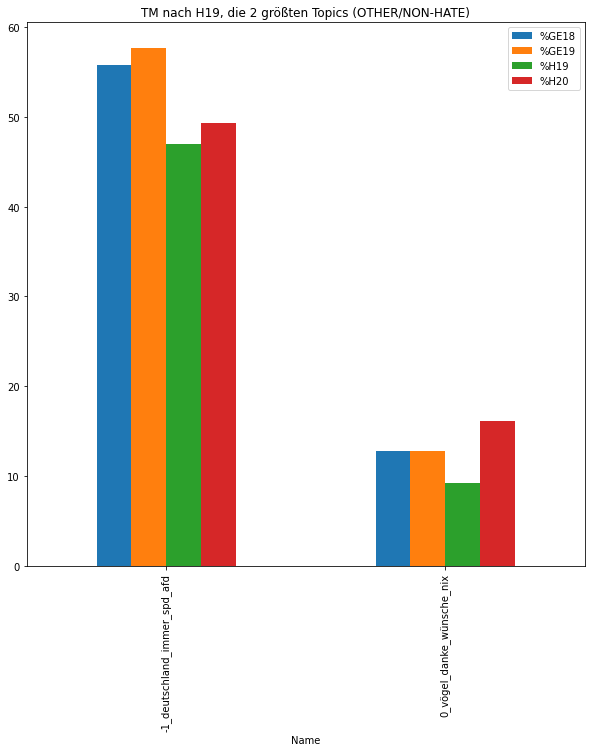

In [ ]:
train_h19_df_OTHER_percent_plt[0:2].plot(y=["%GE18", "%GE19", "%H19", "%H20"], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM nach H19, die 2 größten Topics (OTHER/NON-HATE)")

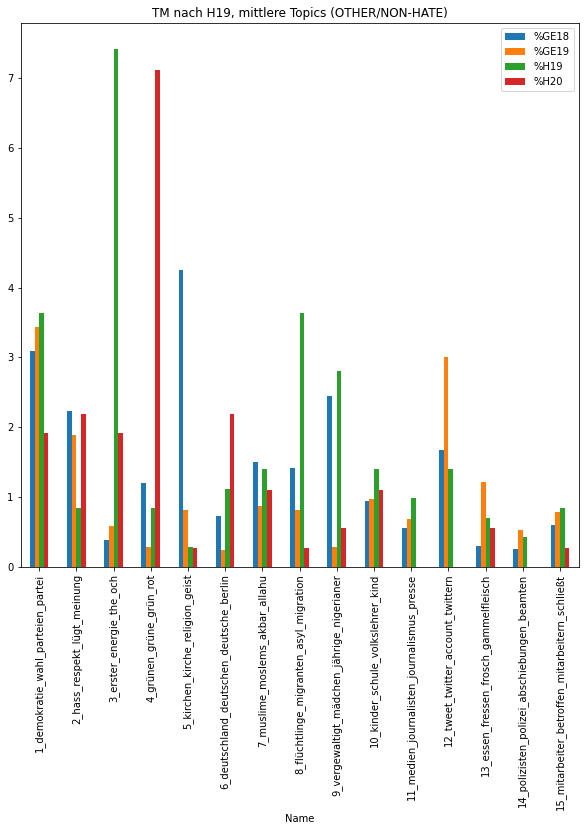

In [ ]:
train_h19_df_OTHER_percent_plt[2:17].plot(y=["%GE18", "%GE19", "%H19", "%H20"], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM nach H19, mittlere Topics (OTHER/NON-HATE)")

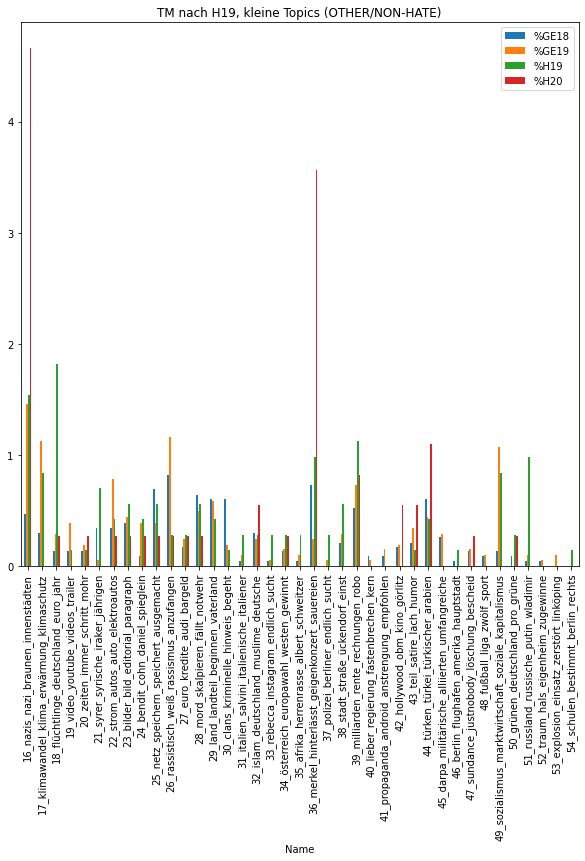

In [ ]:
train_h19_df_OTHER_percent_plt[17:].plot(y=["%GE18", "%GE19", "%H19", "%H20"], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM nach H19, kleine Topics (OTHER/NON-HATE)")



In [ ]:
df_OFFENSE_percent

Topic  %GE18  %GE19   %H19   %H20  \
0      -1  54.41  59.90  54.41  56.52   
1       0  10.65   5.98   1.47  15.53   
2       1   2.75   4.02   2.21   1.86   
3       2   2.00   3.81   2.21   3.11   
4       3   0.25   0.41   0.00   0.62   
5       4   2.58   1.13   1.47   4.35   
6       5   1.91   0.62   2.94   0.00   
7       6   0.67   0.52   0.00   1.24   
8       7   4.24   1.34   3.68   1.24   
9       8   3.16   1.96   3.68   1.24   
10      9   3.24   0.93   5.15   1.86   
11     10   1.00   0.82   0.00   0.62   
12     11   0.83   1.34   1.47   0.62   
13     12   0.25   1.24   0.74   0.62   
14     13   0.67   1.24   0.74   3.73   
15     14   0.33   0.82   0.74   0.00   
16     15   0.42   0.62   0.00   0.00   
17     16   1.83   3.71   2.94   1.24   
18     17   0.00   0.21   0.74   0.00   
19     18   0.83   0.72   1.47   0.00   
20     19   0.00   0.41   0.00   0.00   
21     20   0.17   0.00   0.00   0.00   
22     21   0.17   0.10   0.00   0.00   
23     22   0.17   0.21   0.00   0.00   
24     23   0.00   0.41   0.74   0.62   
25     24   0.25   0.52   0.00   1.24   
26     25   0.17   0.10   0.00   0.00   
27     26   1.08   1.03   2.21   0.00   
28     27   0.08   0.00   0.00   0.00   
29     28   0.58   0.41   0.74   0.00   
30     29   0.33   0.41   1.47   0.00   
31     30   0.42   0.52   0.00   0.00   
32     31   0.00   0.00   0.00   0.00   
33     32   0.42   0.52   1.47   0.00   
34     33   0.00   0.00   0.00   0.00   
35     34   0.00   0.00   0.00   0.00   
36     35   0.50   0.41   0.00   0.00   
37     36   1.75   0.72   1.47   0.62   
38     37   0.00   0.21   0.74   0.00   
39     38   0.17   0.21   0.74   1.86   
40     39   0.17   0.62   0.74   0.00   
41     40   0.08   0.10   0.00   0.00   
42     41   0.08   0.00   0.00   0.00   
43     42   0.17   0.21   0.00   0.00   
44     43   0.33   0.72   0.74   0.00   
45     44   0.50   0.10   0.74   0.62   
46     45   0.08   0.00   0.00   0.00   
47     46   0.00   0.00   0.00   0.00   
48     47   0.00   0.00   0.00   0.00   
49     48   0.08   0.21   0.00   0.00   
50     49   0.08   0.31   0.74   0.00   
51     50   0.08   0.10   0.00   0.00   
52     51   0.00   0.00   1.47   0.62   
53     52   0.08   0.10   0.00   0.00   
54     53   0.00   0.00   0.00   0.00   
55     54   0.00   0.00   0.00   0.00   

                                                 Name  
0                        -1_deutschland_immer_spd_afd  
1                           0_vögel_danke_wünsche_nix  
2                   1_demokratie_wahl_parteien_partei  
3                         2_hass_respekt_lügt_meinung  
4                            3_erster_energie_the_och  
5                             4_grünen_grüne_grün_rot  
6                     5_kirchen_kirche_religion_geist  
7             6_deutschland_deutschen_deutsche_berlin  
8                      7_muslime_moslems_akbar_allahu  
9              8_flüchtlinge_migranten_asyl_migration  
10          9_vergewaltigt_mädchen_jährige_nigerianer  
11                  10_kinder_schule_volkslehrer_kind  
12         11_medien_journalisten_journalismus_presse  
13                  12_tweet_twitter_account_twittern  
14              13_essen_fressen_frosch_gammelfleisch  
15        14_polizisten_polizei_abschiebungen_beamten  
16     15_mitarbeiter_betroffen_mitarbeitern_schließt  
17                 16_nazis_nazi_braunen_innenstädten  
18         17_klimawandel_klima_erwärmung_klimaschutz  
19               18_flüchtlinge_deutschland_euro_jahr  
20                    19_video_youtube_videos_trailer  
21                       20_zeiten_immer_schritt_mohr  
22                  21_syrer_syrische_iraker_jährigen  
23                   22_strom_autos_auto_elektroautos  
24                 23_bilder_bild_editorial_paragraph  
25                    24_bendit_cohn_daniel_spieglein  
26             25_netz_speichern_speichert_ausgemacht  
27           26_rassistisch_weiß_rassismus_anzufangen  
28                       27_euro_kredite_a

In [ ]:
train_h19_df_OFFENSE_percent_plt = df_OFFENSE_percent.set_index('Name')

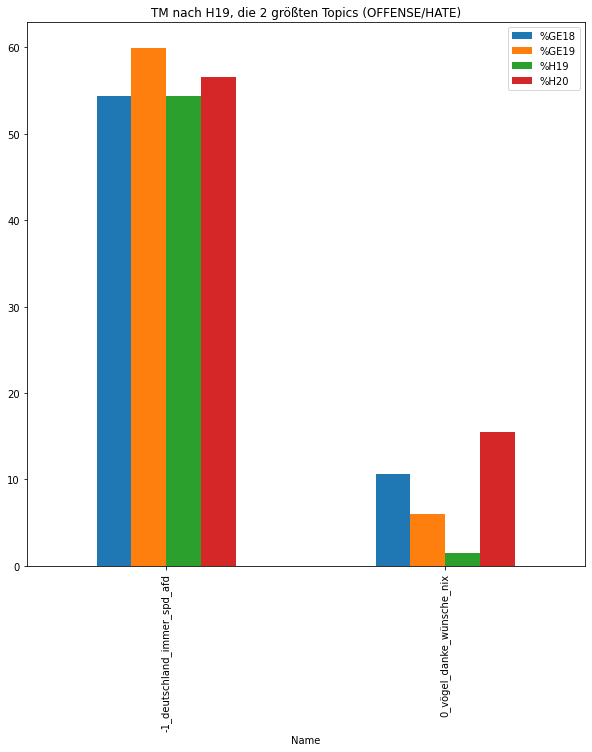

In [ ]:
train_h19_df_OFFENSE_percent_plt[0:2].plot(y=["%GE18", "%GE19", "%H19", "%H20"], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM nach H19, die 2 größten Topics (OFFENSE/HATE)")


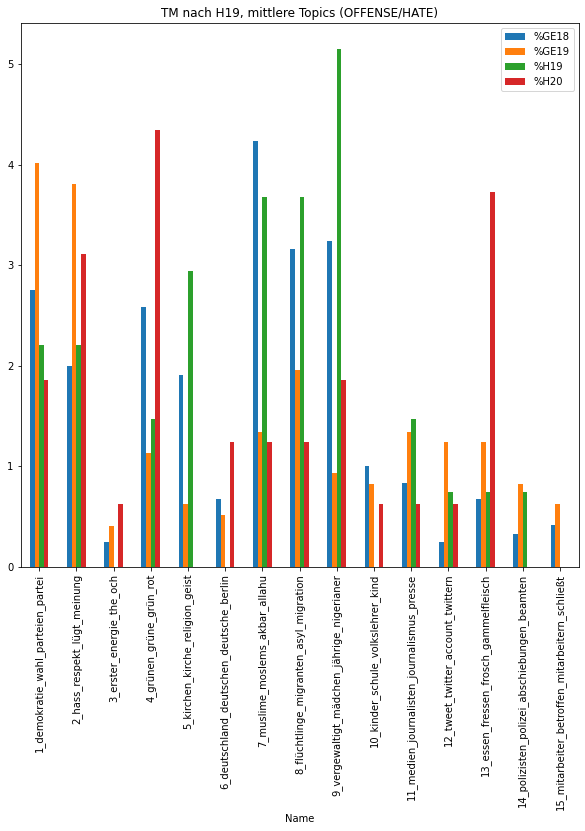

In [ ]:
train_h19_df_OFFENSE_percent_plt[2:17].plot(y=["%GE18", "%GE19", "%H19", "%H20"], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM nach H19, mittlere Topics (OFFENSE/HATE)")


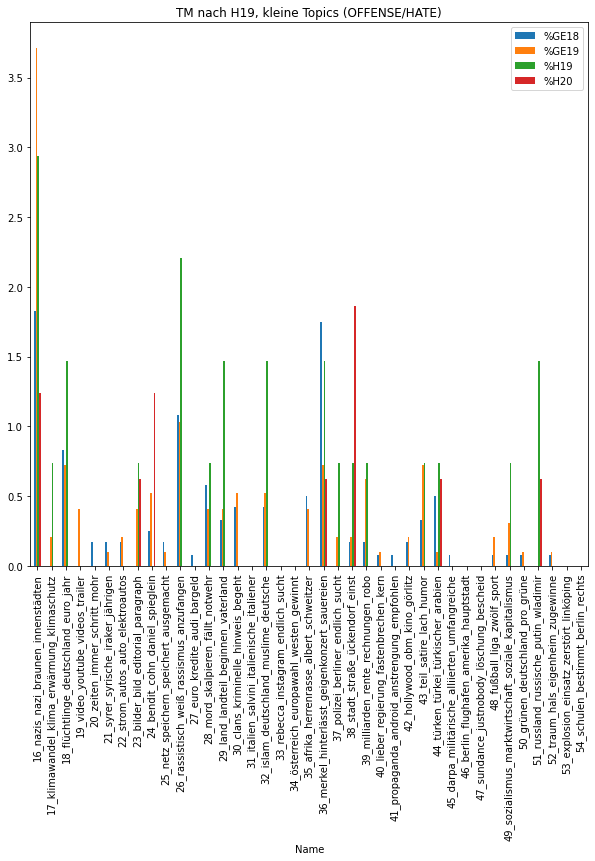

In [ ]:
train_h19_df_OFFENSE_percent_plt[17:].plot(y=["%GE18", "%GE19", "%H19", "%H20"], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM nach H19, kleine Topics (OFFENSE/HATE)")

## Klassifikation HASOCOne, trainiert auf HASOC2019

### Test GE2018

In [ ]:
train_h19_class_ge18 = pd.read_csv('/content/submission_DE_A_HASOCOne_german_task_a_HASOC2019_GermEval2018.csv')
train_h19_class_ge18


index_col task1  index_col.1
0             0   NOT            0
1             1   NOT            1
2             2   NOT            2
3             3   NOT            3
4             4   NOT            4
...         ...   ...          ...
3527       3527   NOT         3527
3528       3528   NOT         3528
3529       3529   NOT         3529
3530       3530   NOT         3530
3531       3531   NOT         3531

[3532 rows x 3 columns]

In [ ]:
ge18_test_class_values = pd.DataFrame(train_h19_class_ge18['task1'].value_counts())
ge18_test_class_values

task1
NOT   3191
HOF    341

In [ ]:
ge18_test_class_values['task1']

NOT    3191
HOF     341
Name: task1, dtype: int64

In [ ]:
ge18_test_raw['class'] = train_h19_class_ge18['task1']
ge18_test_raw

TWEET      OFF    CAT  pred  \
0     Meine Mutter hat mir erzählt, dass mein Vater ...    OTHER  OTHER     9   
1     @Tom174_ @davidbest95 Meine Reaktion; |LBR| Ni...    OTHER  OTHER     7   
2     #Merkel rollt dem Emir von #Katar, der islamis...    OTHER  OTHER    -1   
3     „Merle ist kein junges unschuldiges Mädchen“ K...    OTHER  OTHER    -1   
4     @umweltundaktiv Asylantenflut bringt eben nur ...  OFFENSE  ABUSE    18   
...                                                 ...      ...    ...   ...   
3527  @schlabonski tja, es können einen nicht alle L...    OTHER  OTHER     0   
3528  @RKnillmann @lawyerberlin @AfD Aha, der Islam ...  OFFENSE  ABUSE    -1   
3529  @podilein Mannheim, weltoffen und kunterbunt. ...  OFFENSE  ABUSE     0   
3530  @stephanweil was ist nun mit kostenlosen Kitas...    OTHER  OTHER    -1   
3531  @Bartzissey Denn Minderheiten sind für Linke j...    OTHER  OTHER    -1   

     class  
0      NOT  
1      NOT  
2      NOT  
3      NOT  
4      NOT  
...    ...  
3527   NOT  
3528   NOT  
3529   NOT  
3530   NOT  
3531   NOT  

[3532 rows x 5 columns]

In [ ]:
# https://stackoverflow.com/questions/41691081/pandas-use-and-operator-in-loc-function
ge18_test_true_pos = ge18_test_raw.loc[(ge18_test_raw['OFF'] == 'OFFENSE') & (ge18_test_raw['class'] == 'HOF')]
ge18_test_true_pos

TWEET      OFF        CAT  \
10    @IvyandWoe Ich weiß halt, wie man Frauen zum M...  OFFENSE      ABUSE   
30    @FobiMania @ManuelaSchwesig @MartinSchulz Ich ...  OFFENSE     INSULT   
37    @stefanolix @Tevsa Das kommt davon wenn die Ge...  OFFENSE      ABUSE   
47    @rspctfl @ergroovt @Innenwelttramp @ThomasMich...  OFFENSE      ABUSE   
77    @DietmarAmann1 @Die_Gruenen @cem_oezdemir Ich ...  OFFENSE      ABUSE   
...                                                 ...      ...        ...   
3442  @AuswaertigesAmt @IHRA_news Scheinheilige Heuc...  OFFENSE     INSULT   
3467  @loriotfehlt @Sonny250874 Ach das soll kotzen ...  OFFENSE  PROFANITY   
3493  @rspctfl @ThomasMichael71 @Innenwelttramp @erg...  OFFENSE      ABUSE   
3505  @JoeHellBack @ThomasMichael71 @alexa_jung60 @T...  OFFENSE      ABUSE   
3526  @SteinbachErika Ich finde AFD Wähler besser al...  OFFENSE     INSULT   

      pred class  
10      -1   HOF  
30      -1   HOF  
37       1   HOF  
47       7   HOF  
77       4   HOF  
...    ...   ...  
3442    -1   HOF  
3467     0   HOF  
3493     7   HOF  
3505    -1   HOF  
3526    13   HOF  

[235 rows x 5 columns]

In [ ]:
ge18_test_pred_values_true_pos = pd.DataFrame(ge18_test_true_pos['pred'].value_counts())
ge18_test_pred_values_true_pos['percent'] = (ge18_test_pred_values_true_pos['pred'] / ge18_test_pred_values_true_pos['pred'].sum()) * 100
ge18_test_pred_values_true_pos

pred    percent
-1    116  49.361702
 0     24  10.212766
 7     20   8.510638
 8     16   6.808511
 1     10   4.255319
 16     6   2.553191
 4      5   2.127660
 9      5   2.127660
 13     4   1.702128
 18     4   1.702128
 2      3   1.276596
 43     2   0.851064
 21     2   0.851064
 35     2   0.851064
 5      2   0.851064
 26     2   0.851064
 12     2   0.851064
 36     2   0.851064
 52     1   0.425532
 14     1   0.425532
 22     1   0.425532
 44     1   0.425532
 11     1   0.425532
 10     1   0.425532
 32     1   0.425532
 6      1   0.425532

In [ ]:
ge18_test_false_pos = ge18_test_raw.loc[(ge18_test_raw['OFF'] == 'OTHER') & (ge18_test_raw['class'] == 'HOF')]
ge18_test_false_pos

TWEET    OFF    CAT  pred  \
51    @WlerNr ich mache einen neuen Tweet auf, damit...  OTHER  OTHER    12   
55    @ChristophColla2 @peter_simone @65_jani @jusos...  OTHER  OTHER    -1   
75    schläft MichaelSpreng eigentlich im Studio ode...  OTHER  OTHER    -1   
235   @andreasmiddel @PG_Blindheim Herzlichen Glückw...  OTHER  OTHER     0   
282   Der Herr wurde zur Quelle lebendigen Wassers, ...  OTHER  OTHER     0   
...                                                 ...    ...    ...   ...   
3307  Danke an #Lanz. #Lichtenhagen mahnt uns. Kein ...  OTHER  OTHER    16   
3387  @Meyermit_ey @larsklingbeil Na ob man das als ...  OTHER  OTHER    39   
3454  @RogueFirstLady die First Lady von @realDonald...  OTHER  OTHER    -1   
3506  @oadiakosmos @Schnubb36 @Fjordspringer @gselsb...  OTHER  OTHER    -1   
3522  Heil dir im Siegerkranz,Herrscher des Vaterlan...  OTHER  OTHER     1   

     class  
51     HOF  
55     HOF  
75     HOF  
235    HOF  
282    HOF  
...    ...  
3307   HOF  
3387   HOF  
3454   HOF  
3506   HOF  
3522   HOF  

[106 rows x 5 columns]

In [ ]:
ge18_test_pred_values_false_pos = pd.DataFrame(ge18_test_false_pos['pred'].value_counts())
ge18_test_pred_values_false_pos['percent'] = (ge18_test_pred_values_false_pos['pred'] / ge18_test_pred_values_false_pos['pred'].sum()) * 100
ge18_test_pred_values_false_pos

pred    percent
-1     53  50.000000
 0     14  13.207547
 1      7   6.603774
 9      6   5.660377
 7      6   5.660377
 5      4   3.773585
 16     4   3.773585
 12     2   1.886792
 32     2   1.886792
 2      2   1.886792
 26     2   1.886792
 6      1   0.943396
 4      1   0.943396
 43     1   0.943396
 39     1   0.943396

In [ ]:
ge18_test_true_neg = ge18_test_raw.loc[(ge18_test_raw['OFF'] == 'OTHER') & (ge18_test_raw['class'] == 'NOT')]
ge18_test_true_neg

TWEET    OFF    CAT  pred  \
0     Meine Mutter hat mir erzählt, dass mein Vater ...  OTHER  OTHER     9   
1     @Tom174_ @davidbest95 Meine Reaktion; |LBR| Ni...  OTHER  OTHER     7   
2     #Merkel rollt dem Emir von #Katar, der islamis...  OTHER  OTHER    -1   
3     „Merle ist kein junges unschuldiges Mädchen“ K...  OTHER  OTHER    -1   
5     @_StultaMundi Die Bibel enthält ebenfalls Gese...  OTHER  OTHER     5   
...                                                 ...    ...    ...   ...   
3523  @rspctfl @everlast_fs @m8Flo @BolzAndrea @Inne...  OTHER  OTHER    -1   
3524  #Grüne bestehen auf Sanktionen gegen #Russland...  OTHER  OTHER    -1   
3527  @schlabonski tja, es können einen nicht alle L...  OTHER  OTHER     0   
3530  @stephanweil was ist nun mit kostenlosen Kitas...  OTHER  OTHER    -1   
3531  @Bartzissey Denn Minderheiten sind für Linke j...  OTHER  OTHER    -1   

     class  
0      NOT  
1      NOT  
2      NOT  
3      NOT  
5      NOT  
...    ...  
3523   NOT  
3524   NOT  
3527   NOT  
3530   NOT  
3531   NOT  

[2224 rows x 5 columns]

In [ ]:
ge18_test_pred_values_true_neg = pd.DataFrame(ge18_test_true_neg['pred'].value_counts())
ge18_test_pred_values_true_neg['percent'] = (ge18_test_pred_values_true_neg['pred'] / ge18_test_pred_values_true_neg['pred'].sum()) * 100
ge18_test_pred_values_true_neg

pred    percent
-1   1247  56.070144
 0    284  12.769784
 5     95   4.271583
 1     65   2.922662
 9     51   2.293165
 2     50   2.248201
 12    37   1.663669
 8     33   1.483813
 7     29   1.303957
 4     27   1.214029
 10    22   0.989209
 36    17   0.764388
 26    17   0.764388
 25    16   0.719424
 6     16   0.719424
 28    15   0.674460
 44    14   0.629496
 30    14   0.629496
 29    14   0.629496
 15    14   0.629496
 11    13   0.584532
 39    11   0.494604
 23     9   0.404676
 3      9   0.404676
 21     8   0.359712
 22     8   0.359712
 17     7   0.314748
 16     7   0.314748
 13     7   0.314748
 14     6   0.269784
 45     6   0.269784
 32     5   0.224820
 38     5   0.224820
 27     4   0.179856
 43     4   0.179856
 42     4   0.179856
 47     3   0.134892
 20     3   0.134892
 49     3   0.134892
 19     3   0.134892
 18     3   0.134892
 34     3   0.134892
 24     2   0.089928
 48     2   0.089928
 41     2   0.089928
 50     2   0.089928
 40     2   0.089928
 52     1   0.044964
 51     1   0.044964
 35     1   0.044964
 33     1   0.044964
 46     1   0.044964
 31     1   0.044964

In [ ]:
ge18_test_false_neg = ge18_test_raw.loc[(ge18_test_raw['OFF'] == 'OFFENSE') & (ge18_test_raw['class'] == 'NOT')]
ge18_test_false_neg

TWEET      OFF     CAT  \
4     @umweltundaktiv Asylantenflut bringt eben nur ...  OFFENSE   ABUSE   
9     @FeePatzer Frauen zu einem "Ja" zu überreden, ...  OFFENSE   ABUSE   
11     Liebe Freunde, Gauck,das Symbol des Sklaventums!  OFFENSE   ABUSE   
13    wen interessiert denn die Meinung des Außenmin...  OFFENSE  INSULT   
15    @LWaff @UnzufriedenerB |LBR| Laßt doch endlich...  OFFENSE   ABUSE   
...                                                 ...      ...     ...   
3519    Feminismus ist der Islamismus der Weiblichkeit.  OFFENSE   ABUSE   
3521  @UdoUlfkotte Hauptsache den Asylanten gehts ge...  OFFENSE   ABUSE   
3525  @ThomasMichael71 @mountainman1977 @houelle_bec...  OFFENSE   ABUSE   
3528  @RKnillmann @lawyerberlin @AfD Aha, der Islam ...  OFFENSE   ABUSE   
3529  @podilein Mannheim, weltoffen und kunterbunt. ...  OFFENSE   ABUSE   

      pred class  
4       18   NOT  
9       -1   NOT  
11      -1   NOT  
13      -1   NOT  
15      16   NOT  
...    ...   ...  
3519     7   NOT  
3521    18   NOT  
3525    -1   NOT  
3528    -1   NOT  
3529     0   NOT  

[967 rows x 5 columns]

In [ ]:
ge18_test_pred_values_false_neg = pd.DataFrame(ge18_test_false_neg['pred'].value_counts())
ge18_test_pred_values_false_neg['percent'] = (ge18_test_pred_values_false_neg['pred'] / ge18_test_pred_values_false_neg['pred'].sum()) * 100
ge18_test_pred_values_false_neg

pred    percent
-1    538  55.635988
 0    104  10.754912
 9     34   3.516029
 7     31   3.205791
 4     26   2.688728
 1     23   2.378490
 8     22   2.275078
 5     21   2.171665
 2     21   2.171665
 36    19   1.964840
 16    16   1.654602
 26    11   1.137539
 10    11   1.137539
 11     9   0.930714
 6      7   0.723888
 28     7   0.723888
 18     6   0.620476
 30     5   0.517063
 15     5   0.517063
 44     5   0.517063
 29     4   0.413650
 13     4   0.413650
 32     4   0.413650
 35     4   0.413650
 14     3   0.310238
 3      3   0.310238
 24     3   0.310238
 25     2   0.206825
 38     2   0.206825
 43     2   0.206825
 39     2   0.206825
 20     2   0.206825
 42     2   0.206825
 27     1   0.103413
 12     1   0.103413
 45     1   0.103413
 41     1   0.103413
 50     1   0.103413
 49     1   0.103413
 22     1   0.103413
 48     1   0.103413
 40     1   0.103413

In [ ]:
ge18_test_raw['cat_bin_actual'] = ge18_test_raw['OFF'].map({'OFFENSE': 1, 'OTHER': 0}).astype(int)
ge18_test_raw['cat_bin_predicted'] = ge18_test_raw['class'].map({'HOF': 1, 'NOT': 0}).astype(int)


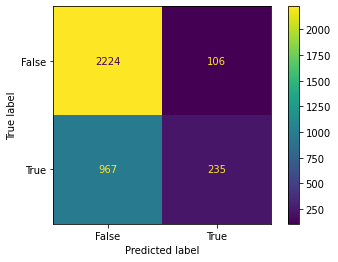

In [ ]:
# https://www.w3schools.com/python/python_ml_confusion_matrix.asp
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = ge18_test_raw['cat_bin_actual']
predicted = ge18_test_raw['cat_bin_predicted']

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
accuracy = metrics.accuracy_score(actual, predicted)
accuracy

0.6962061155152888

In [ ]:
precision = metrics.precision_score(actual, predicted)
precision

0.6891495601173021

In [ ]:
sensitivity_recall = metrics.recall_score(actual, predicted)
sensitivity_recall

0.19550748752079866

In [ ]:
specificity = metrics.recall_score(actual, predicted, pos_label=0)
specificity

0.9545064377682403

In [ ]:
F1_score = metrics.f1_score(actual, predicted)
F1_score

0.304601425793908

In [ ]:
#metrics
print({"Accuracy":accuracy,"Precision":precision,
       "Sensitivity_recall":sensitivity_recall,
       "Specificity":specificity,
       "F1_score":F1_score})

{'Accuracy': 0.6962061155152888, 'Precision': 0.6891495601173021, 'Sensitivity_recall': 0.19550748752079866, 'Specificity': 0.9545064377682403, 'F1_score': 0.304601425793908}


### TEST GE2018 INDEZES CONFUSION MATRIX

In [ ]:
# df1 enthält die Topicnummern und ihre Bezeichnungen
df1 =  train_h19_model_topics[['Topic','Name']]
df1

Topic                                               Name
0      -1                       -1_deutschland_immer_spd_afd
1       0                          0_vögel_danke_wünsche_nix
2       1                  1_demokratie_wahl_parteien_partei
3       2                        2_hass_respekt_lügt_meinung
4       3                           3_erster_energie_the_och
5       4                            4_grünen_grüne_grün_rot
6       5                    5_kirchen_kirche_religion_geist
7       6            6_deutschland_deutschen_deutsche_berlin
8       7                     7_muslime_moslems_akbar_allahu
9       8             8_flüchtlinge_migranten_asyl_migration
10      9          9_vergewaltigt_mädchen_jährige_nigerianer
11     10                  10_kinder_schule_volkslehrer_kind
12     11         11_medien_journalisten_journalismus_presse
13     12                  12_tweet_twitter_account_twittern
14     13              13_essen_fressen_frosch_gammelfleisch
15     14        14_polizisten_polizei_abschiebungen_beamten
16     15     15_mitarbeiter_betroffen_mitarbeitern_schließt
17     16                 16_nazis_nazi_braunen_innenstädten
18     17         17_klimawandel_klima_erwärmung_klimaschutz
19     18               18_flüchtlinge_deutschland_euro_jahr
20     19                    19_video_youtube_videos_trailer
21     20                       20_zeiten_immer_schritt_mohr
22     21                  21_syrer_syrische_iraker_jährigen
23     22                   22_strom_autos_auto_elektroautos
24     23                 23_bilder_bild_editorial_paragraph
25     24                    24_bendit_cohn_daniel_spieglein
26     25             25_netz_speichern_speichert_ausgemacht
27     26           26_rassistisch_weiß_rassismus_anzufangen
28     27                       27_euro_kredite_audi_bargeld
29     28                   28_mord_skalpieren_fällt_notwehr
30     29                29_land_landteil_beginnen_vaterland
31     30                 30_clans_kriminelle_hinweis_begeht
32     31          31_italien_salvini_italienische_italiener
33     32              32_islam_deutschland_muslime_deutsche
34     33                 33_rebecca_instagram_endlich_sucht
35     34            34_österreich_europawahl_westen_gewinnt
36     35            35_afrika_herrenrasse_albert_schweitzer
37     36      36_merkel_hinterlässt_geigenkonzert_sauereien
38     37                  37_polizei_berliner_endlich_sucht
39     38                    38_stadt_straße_ückendorf_einst
40     39                39_milliarden_rente_rechnungen_robo
41     40             40_lieber_regierung_fastenbrechen_kern
42     41        41_propaganda_android_anstrengung_empfohlen
43     42                      42_hollywood_obm_kino_görlitz
44     43                          43_teil_satire_lach_humor
45     44                44_türken_türkei_türkischer_arabien
46     45      45_darpa_militärische_alliierten_umfangreiche
47     46             46_berlin_flughafen_amerika_hauptstadt
48     47           47_sundance_justnobody_löschung_bescheid
49     48                        48_fußball_liga_zwölf_sport
50     49  49_sozialismus_marktwirtschaft_soziale_kapital...
51     50                    50_grünen_deutschland_pro_grüne
52     51               51_russland_russische_putin_wladimir
53     52                  52_traum_hals_eigenheim_zugewinne
54     53            53_explosion_einsatz_zerstört_linköping
55     54                  54_schulen_bestimmt_berlin_rechts

In [ ]:
ge18_test_pred_values_true_pos['Topic'] = ge18_test_pred_values_true_pos.index
ge18_test_pred_values_true_pos

pred    percent  Topic
-1    116  49.361702     -1
 0     24  10.212766      0
 7     20   8.510638      7
 8     16   6.808511      8
 1     10   4.255319      1
 16     6   2.553191     16
 4      5   2.127660      4
 9      5   2.127660      9
 13     4   1.702128     13
 18     4   1.702128     18
 2      3   1.276596      2
 43     2   0.851064     43
 21     2   0.851064     21
 35     2   0.851064     35
 5      2   0.851064      5
 26     2   0.851064     26
 12     2   0.851064     12
 36     2   0.851064     36
 52     1   0.425532     52
 14     1   0.425532     14
 22     1   0.425532     22
 44     1   0.425532     44
 11     1   0.425532     11
 10     1   0.425532     10
 32     1   0.425532     32
 6      1   0.425532      6

In [ ]:
# df2 bis df5 enthalten Vorhersagen, Topicanteile in Prozent sowie die Topicnr.
# dabei werden die Spalten umbenannt, damit es später beim Zusammenfügen nicht
# zu Doppelungen kommt
df2 = ge18_test_pred_values_true_pos 
df2 = df2.rename(columns={'pred':'predGE18TP', 'percent':'%GE18TP', 'Topic':'Topic'})

In [ ]:
ge18_test_pred_values_false_pos['Topic'] = ge18_test_pred_values_false_pos.index
ge18_test_pred_values_false_pos

pred    percent  Topic
-1     53  50.000000     -1
 0     14  13.207547      0
 1      7   6.603774      1
 9      6   5.660377      9
 7      6   5.660377      7
 5      4   3.773585      5
 16     4   3.773585     16
 12     2   1.886792     12
 32     2   1.886792     32
 2      2   1.886792      2
 26     2   1.886792     26
 6      1   0.943396      6
 4      1   0.943396      4
 43     1   0.943396     43
 39     1   0.943396     39

In [ ]:
df3 = ge18_test_pred_values_false_pos
df3 = df3.rename(columns={'pred':'predGE18FP', 'percent':'%GE18FP', 'Topic':'Topic'})

In [ ]:
ge18_test_pred_values_true_neg['Topic'] = ge18_test_pred_values_true_neg.index
ge18_test_pred_values_true_neg

pred    percent  Topic
-1   1247  56.070144     -1
 0    284  12.769784      0
 5     95   4.271583      5
 1     65   2.922662      1
 9     51   2.293165      9
 2     50   2.248201      2
 12    37   1.663669     12
 8     33   1.483813      8
 7     29   1.303957      7
 4     27   1.214029      4
 10    22   0.989209     10
 36    17   0.764388     36
 26    17   0.764388     26
 25    16   0.719424     25
 6     16   0.719424      6
 28    15   0.674460     28
 44    14   0.629496     44
 30    14   0.629496     30
 29    14   0.629496     29
 15    14   0.629496     15
 11    13   0.584532     11
 39    11   0.494604     39
 23     9   0.404676     23
 3      9   0.404676      3
 21     8   0.359712     21
 22     8   0.359712     22
 17     7   0.314748     17
 16     7   0.314748     16
 13     7   0.314748     13
 14     6   0.269784     14
 45     6   0.269784     45
 32     5   0.224820     32
 38     5   0.224820     38
 27     4   0.179856     27
 43     4   0.179856     43
 42     4   0.179856     42
 47     3   0.134892     47
 20     3   0.134892     20
 49     3   0.134892     49
 19     3   0.134892     19
 18     3   0.134892     18
 34     3   0.134892     34
 24     2   0.089928     24
 48     2   0.089928     48
 41     2   0.089928     41
 50     2   0.089928     50
 40     2   0.089928     40
 52     1   0.044964     52
 51     1   0.044964     51
 35     1   0.044964     35
 33     1   0.044964     33
 46     1   0.044964     46
 31     1   0.044964     31

In [ ]:
df4 = ge18_test_pred_values_true_neg
df4 = df4.rename(columns={'pred':'predGE18TN', 'percent':'%GE18TN', 'Topic':'Topic'})

In [ ]:
ge18_test_pred_values_false_neg['Topic'] = ge18_test_pred_values_false_neg.index
ge18_test_pred_values_false_neg

pred    percent  Topic
-1    538  55.635988     -1
 0    104  10.754912      0
 9     34   3.516029      9
 7     31   3.205791      7
 4     26   2.688728      4
 1     23   2.378490      1
 8     22   2.275078      8
 5     21   2.171665      5
 2     21   2.171665      2
 36    19   1.964840     36
 16    16   1.654602     16
 26    11   1.137539     26
 10    11   1.137539     10
 11     9   0.930714     11
 6      7   0.723888      6
 28     7   0.723888     28
 18     6   0.620476     18
 30     5   0.517063     30
 15     5   0.517063     15
 44     5   0.517063     44
 29     4   0.413650     29
 13     4   0.413650     13
 32     4   0.413650     32
 35     4   0.413650     35
 14     3   0.310238     14
 3      3   0.310238      3
 24     3   0.310238     24
 25     2   0.206825     25
 38     2   0.206825     38
 43     2   0.206825     43
 39     2   0.206825     39
 20     2   0.206825     20
 42     2   0.206825     42
 27     1   0.103413     27
 12     1   0.103413     12
 45     1   0.103413     45
 41     1   0.103413     41
 50     1   0.103413     50
 49     1   0.103413     49
 22     1   0.103413     22
 48     1   0.103413     48
 40     1   0.103413     40

In [ ]:
df5 = ge18_test_pred_values_false_neg
df5 = df5.rename(columns={'pred':'predGE18FN', 'percent':'%GE18FN', 'Topic':'Topic'})

In [ ]:
# https://stackoverflow.com/questions/44327999/how-to-merge-multiple-dataframes
from functools import reduce

data_frames = [df1, df2, df3, df4, df5]
df_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_merged[['%GE18TP', '%GE18TN','%GE18FP', '%GE18FN']] = df_merged[['%GE18TP', '%GE18TN','%GE18FP', '%GE18FN']].astype(float).round(2)
df_merged
#df_to_round = df_OTHER_merged[['%GE18', '%GE19','%H19', '%H20']]
#df_to_round = df_to_round[['%GE18', '%GE19','%H19', '%H20']].round(2)
#df_to_round

Topic                                               Name predGE18TP  \
0      -1                       -1_deutschland_immer_spd_afd      116.0   
1       0                          0_vögel_danke_wünsche_nix       24.0   
2       1                  1_demokratie_wahl_parteien_partei       10.0   
3       2                        2_hass_respekt_lügt_meinung        3.0   
4       3                           3_erster_energie_the_och          0   
5       4                            4_grünen_grüne_grün_rot        5.0   
6       5                    5_kirchen_kirche_religion_geist        2.0   
7       6            6_deutschland_deutschen_deutsche_berlin        1.0   
8       7                     7_muslime_moslems_akbar_allahu       20.0   
9       8             8_flüchtlinge_migranten_asyl_migration       16.0   
10      9          9_vergewaltigt_mädchen_jährige_nigerianer        5.0   
11     10                  10_kinder_schule_volkslehrer_kind        1.0   
12     11         11_medien_journalisten_journalismus_presse        1.0   
13     12                  12_tweet_twitter_account_twittern        2.0   
14     13              13_essen_fressen_frosch_gammelfleisch        4.0   
15     14        14_polizisten_polizei_abschiebungen_beamten        1.0   
16     15     15_mitarbeiter_betroffen_mitarbeitern_schließt          0   
17     16                 16_nazis_nazi_braunen_innenstädten        6.0   
18     17         17_klimawandel_klima_erwärmung_klimaschutz          0   
19     18               18_flüchtlinge_deutschland_euro_jahr        4.0   
20     19                    19_video_youtube_videos_trailer          0   
21     20                       20_zeiten_immer_schritt_mohr          0   
22     21                  21_syrer_syrische_iraker_jährigen        2.0   
23     22                   22_strom_autos_auto_elektroautos        1.0   
24     23                 23_bilder_bild_editorial_paragraph          0   
25     24                    24_bendit_cohn_daniel_spieglein          0   
26     25             25_netz_speichern_speichert_ausgemacht          0   
27     26           26_rassistisch_weiß_rassismus_anzufangen        2.0   
28     27                       27_euro_kredite_audi_bargeld          0   
29     28                   28_mord_skalpieren_fällt_notwehr          0   
30     29                29_land_landteil_beginnen_vaterland          0   
31     30                 30_clans_kriminelle_hinweis_begeht          0   
32     31          31_italien_salvini_italienische_italiener          0   
33     32              32_islam_deutschland_muslime_deutsche        1.0   
34     33                 33_rebecca_instagram_endlich_sucht          0   
35     34            34_österreich_europawahl_westen_gewinnt          0   
36     35            35_afrika_herrenrasse_albert_schweitzer        2.0   
37     36      36_merkel_hinterlässt_geigenkonzert_sauereien        2.0   
38     37                  37_polizei_berliner_endlich_sucht          0   
39     38                    38_stadt_straße_ückendorf_einst          0   
40     39                39_milliarden_rente_rechnungen_robo          0   
41     40             40_lieber_regierung_fastenbrechen_kern          0   
42     41        41_propaganda_android_anstrengung_empfohlen          0   
43     42                      42_hollywood_obm_kino_görlitz          0   
44     43                          43_teil_satire_lach_humor        2.0   
45     44                44_türken_türkei_türkischer_arabien        1.0   
46     45      45_darpa_militärische_alliierten_umfangreiche          0   
47     46             46_berlin_flughafen_amerika_hauptstadt          0   
48     47           47_sundance_justnobody_löschung_bescheid          0   
49     48                        48_fußball_liga_zwölf_sport          0   
50     49  49_sozialismus_marktwirtschaft_soziale_kapital...          0   
51     50                    50_grünen_deutschland_pro_grüne          0   
52     51               51_ru

In [ ]:
df_merged

Topic                                               Name predGE18TP  \
0      -1                       -1_deutschland_immer_spd_afd      116.0   
1       0                          0_vögel_danke_wünsche_nix       24.0   
2       1                  1_demokratie_wahl_parteien_partei       10.0   
3       2                        2_hass_respekt_lügt_meinung        3.0   
4       3                           3_erster_energie_the_och          0   
5       4                            4_grünen_grüne_grün_rot        5.0   
6       5                    5_kirchen_kirche_religion_geist        2.0   
7       6            6_deutschland_deutschen_deutsche_berlin        1.0   
8       7                     7_muslime_moslems_akbar_allahu       20.0   
9       8             8_flüchtlinge_migranten_asyl_migration       16.0   
10      9          9_vergewaltigt_mädchen_jährige_nigerianer        5.0   
11     10                  10_kinder_schule_volkslehrer_kind        1.0   
12     11         11_medien_journalisten_journalismus_presse        1.0   
13     12                  12_tweet_twitter_account_twittern        2.0   
14     13              13_essen_fressen_frosch_gammelfleisch        4.0   
15     14        14_polizisten_polizei_abschiebungen_beamten        1.0   
16     15     15_mitarbeiter_betroffen_mitarbeitern_schließt          0   
17     16                 16_nazis_nazi_braunen_innenstädten        6.0   
18     17         17_klimawandel_klima_erwärmung_klimaschutz          0   
19     18               18_flüchtlinge_deutschland_euro_jahr        4.0   
20     19                    19_video_youtube_videos_trailer          0   
21     20                       20_zeiten_immer_schritt_mohr          0   
22     21                  21_syrer_syrische_iraker_jährigen        2.0   
23     22                   22_strom_autos_auto_elektroautos        1.0   
24     23                 23_bilder_bild_editorial_paragraph          0   
25     24                    24_bendit_cohn_daniel_spieglein          0   
26     25             25_netz_speichern_speichert_ausgemacht          0   
27     26           26_rassistisch_weiß_rassismus_anzufangen        2.0   
28     27                       27_euro_kredite_audi_bargeld          0   
29     28                   28_mord_skalpieren_fällt_notwehr          0   
30     29                29_land_landteil_beginnen_vaterland          0   
31     30                 30_clans_kriminelle_hinweis_begeht          0   
32     31          31_italien_salvini_italienische_italiener          0   
33     32              32_islam_deutschland_muslime_deutsche        1.0   
34     33                 33_rebecca_instagram_endlich_sucht          0   
35     34            34_österreich_europawahl_westen_gewinnt          0   
36     35            35_afrika_herrenrasse_albert_schweitzer        2.0   
37     36      36_merkel_hinterlässt_geigenkonzert_sauereien        2.0   
38     37                  37_polizei_berliner_endlich_sucht          0   
39     38                    38_stadt_straße_ückendorf_einst          0   
40     39                39_milliarden_rente_rechnungen_robo          0   
41     40             40_lieber_regierung_fastenbrechen_kern          0   
42     41        41_propaganda_android_anstrengung_empfohlen          0   
43     42                      42_hollywood_obm_kino_görlitz          0   
44     43                          43_teil_satire_lach_humor        2.0   
45     44                44_türken_türkei_türkischer_arabien        1.0   
46     45      45_darpa_militärische_alliierten_umfangreiche          0   
47     46             46_berlin_flughafen_amerika_hauptstadt          0   
48     47           47_sundance_justnobody_löschung_bescheid          0   
49     48                        48_fußball_liga_zwölf_sport          0   
50     49  49_sozialismus_marktwirtschaft_soziale_kapital...          0   
51     50                    50_grünen_deutschland_pro_grüne          0   
52     51               51_ru

In [ ]:
# https://stackoverflow.com/questions/15891038/change-column-type-in-pandas
# Die Anzahlen der vorhergesagten Topics werden in int umgewandelt
df_merged = df_merged.astype({"predGE18TP": int, "predGE18TN":int, "predGE18FP":int, "predGE18FN":int})
df_merged

Topic                                               Name  predGE18TP  \
0      -1                       -1_deutschland_immer_spd_afd         116   
1       0                          0_vögel_danke_wünsche_nix          24   
2       1                  1_demokratie_wahl_parteien_partei          10   
3       2                        2_hass_respekt_lügt_meinung           3   
4       3                           3_erster_energie_the_och           0   
5       4                            4_grünen_grüne_grün_rot           5   
6       5                    5_kirchen_kirche_religion_geist           2   
7       6            6_deutschland_deutschen_deutsche_berlin           1   
8       7                     7_muslime_moslems_akbar_allahu          20   
9       8             8_flüchtlinge_migranten_asyl_migration          16   
10      9          9_vergewaltigt_mädchen_jährige_nigerianer           5   
11     10                  10_kinder_schule_volkslehrer_kind           1   
12     11         11_medien_journalisten_journalismus_presse           1   
13     12                  12_tweet_twitter_account_twittern           2   
14     13              13_essen_fressen_frosch_gammelfleisch           4   
15     14        14_polizisten_polizei_abschiebungen_beamten           1   
16     15     15_mitarbeiter_betroffen_mitarbeitern_schließt           0   
17     16                 16_nazis_nazi_braunen_innenstädten           6   
18     17         17_klimawandel_klima_erwärmung_klimaschutz           0   
19     18               18_flüchtlinge_deutschland_euro_jahr           4   
20     19                    19_video_youtube_videos_trailer           0   
21     20                       20_zeiten_immer_schritt_mohr           0   
22     21                  21_syrer_syrische_iraker_jährigen           2   
23     22                   22_strom_autos_auto_elektroautos           1   
24     23                 23_bilder_bild_editorial_paragraph           0   
25     24                    24_bendit_cohn_daniel_spieglein           0   
26     25             25_netz_speichern_speichert_ausgemacht           0   
27     26           26_rassistisch_weiß_rassismus_anzufangen           2   
28     27                       27_euro_kredite_audi_bargeld           0   
29     28                   28_mord_skalpieren_fällt_notwehr           0   
30     29                29_land_landteil_beginnen_vaterland           0   
31     30                 30_clans_kriminelle_hinweis_begeht           0   
32     31          31_italien_salvini_italienische_italiener           0   
33     32              32_islam_deutschland_muslime_deutsche           1   
34     33                 33_rebecca_instagram_endlich_sucht           0   
35     34            34_österreich_europawahl_westen_gewinnt           0   
36     35            35_afrika_herrenrasse_albert_schweitzer           2   
37     36      36_merkel_hinterlässt_geigenkonzert_sauereien           2   
38     37                  37_polizei_berliner_endlich_sucht           0   
39     38                    38_stadt_straße_ückendorf_einst           0   
40     39                39_milliarden_rente_rechnungen_robo           0   
41     40             40_lieber_regierung_fastenbrechen_kern           0   
42     41        41_propaganda_android_anstrengung_empfohlen           0   
43     42                      42_hollywood_obm_kino_görlitz           0   
44     43                          43_teil_satire_lach_humor           2   
45     44                44_türken_türkei_türkischer_arabien           1   
46     45      45_darpa_militärische_alliierten_umfangreiche           0   
47     46             46_berlin_flughafen_amerika_hauptstadt           0   
48     47           47_sundance_justnobody_löschung_bescheid           0   
49     48                        48_fußball_liga_zwölf_sport           0   
50     49  49_sozialismus_marktwirtschaft_soziale_kapital...           0   
51     50                    50_grünen_deutschland_p

In [ ]:
df_percent = df_merged[['Topic','%GE18TP', '%GE18TN','%GE18FP', '%GE18FN','Name']]
df_percent

Topic  %GE18TP  %GE18TN  %GE18FP  %GE18FN  \
0      -1    49.36    56.07    50.00    55.64   
1       0    10.21    12.77    13.21    10.75   
2       1     4.26     2.92     6.60     2.38   
3       2     1.28     2.25     1.89     2.17   
4       3     0.00     0.40     0.00     0.31   
5       4     2.13     1.21     0.94     2.69   
6       5     0.85     4.27     3.77     2.17   
7       6     0.43     0.72     0.94     0.72   
8       7     8.51     1.30     5.66     3.21   
9       8     6.81     1.48     0.00     2.28   
10      9     2.13     2.29     5.66     3.52   
11     10     0.43     0.99     0.00     1.14   
12     11     0.43     0.58     0.00     0.93   
13     12     0.85     1.66     1.89     0.10   
14     13     1.70     0.31     0.00     0.41   
15     14     0.43     0.27     0.00     0.31   
16     15     0.00     0.63     0.00     0.52   
17     16     2.55     0.31     3.77     1.65   
18     17     0.00     0.31     0.00     0.00   
19     18     1.70     0.13     0.00     0.62   
20     19     0.00     0.13     0.00     0.00   
21     20     0.00     0.13     0.00     0.21   
22     21     0.85     0.36     0.00     0.00   
23     22     0.43     0.36     0.00     0.10   
24     23     0.00     0.40     0.00     0.00   
25     24     0.00     0.09     0.00     0.31   
26     25     0.00     0.72     0.00     0.21   
27     26     0.85     0.76     1.89     1.14   
28     27     0.00     0.18     0.00     0.10   
29     28     0.00     0.67     0.00     0.72   
30     29     0.00     0.63     0.00     0.41   
31     30     0.00     0.63     0.00     0.52   
32     31     0.00     0.04     0.00     0.00   
33     32     0.43     0.22     1.89     0.41   
34     33     0.00     0.04     0.00     0.00   
35     34     0.00     0.13     0.00     0.00   
36     35     0.85     0.04     0.00     0.41   
37     36     0.85     0.76     0.00     1.96   
38     37     0.00     0.00     0.00     0.00   
39     38     0.00     0.22     0.00     0.21   
40     39     0.00     0.49     0.94     0.21   
41     40     0.00     0.09     0.00     0.10   
42     41     0.00     0.09     0.00     0.10   
43     42     0.00     0.18     0.00     0.21   
44     43     0.85     0.18     0.94     0.21   
45     44     0.43     0.63     0.00     0.52   
46     45     0.00     0.27     0.00     0.10   
47     46     0.00     0.04     0.00     0.00   
48     47     0.00     0.13     0.00     0.00   
49     48     0.00     0.09     0.00     0.10   
50     49     0.00     0.13     0.00     0.10   
51     50     0.00     0.09     0.00     0.10   
52     51     0.00     0.04     0.00     0.00   
53     52     0.43     0.04     0.00     0.00   
54     53     0.00     0.00     0.00     0.00   
55     54     0.00     0.00     0.00     0.00   

                                                 Name  
0                        -1_deutschland_immer_spd_afd  
1                           0_vögel_danke_wünsche_nix  
2                   1_demokratie_wahl_parteien_partei  
3                         2_hass_respekt_lügt_meinung  
4                            3_erster_energie_the_och  
5                             4_grünen_grüne_grün_rot  
6                     5_kirchen_kirche_religion_geist  
7             6_deutschland_deutschen_deutsche_berlin  
8                      7_muslime_moslems_akbar_allahu  
9              8_flüchtlinge_migranten_asyl_migration  
10          9_vergewaltigt_mädchen_jährige_nigerianer  
11                  10_kinder_schule_volkslehrer_kind  
12         11_medien_journalisten_journalismus_presse  
13                  12_tweet_twitter_account_twittern  
14              13_essen_fressen_frosch_gammelfleisch  
15        14_polizisten_polizei_abschiebungen_beamten  
16     15_mitarbeiter_betroffen_mitarbeitern_schließt  
17                 16_nazis_nazi_braunen_innenstädten  
18         17_klimawandel_klima_erwärmung_klimaschutz  
19               18_flüchtlinge_deutschland_euro_jahr  
20                    19_video_you

In [ ]:
test_ge18_df_percent_plt_CONF_MATRIX = df_percent.set_index('Name')

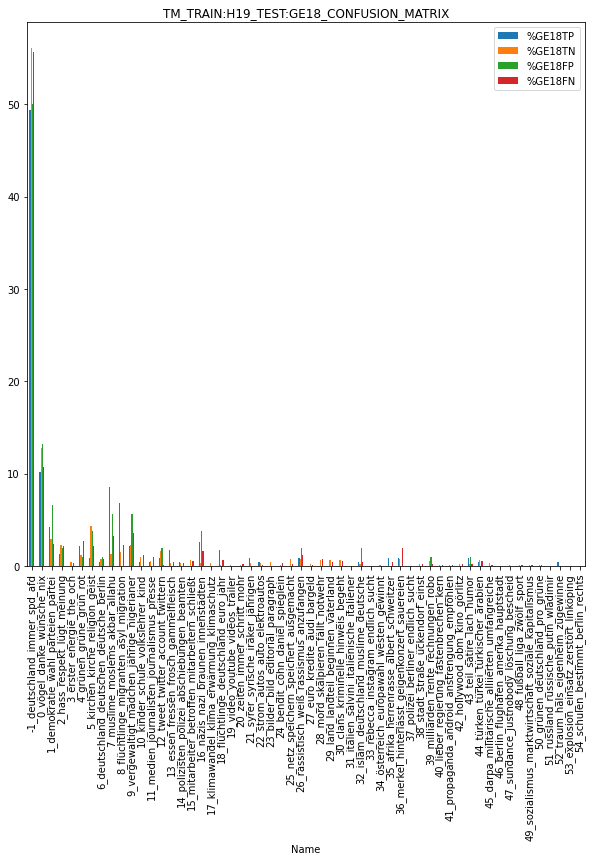

In [ ]:
test_ge18_df_percent_plt_CONF_MATRIX.plot(y=['%GE18TP', '%GE18TN','%GE18FP', '%GE18FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:H19_TEST:GE18_CONFUSION_MATRIX")

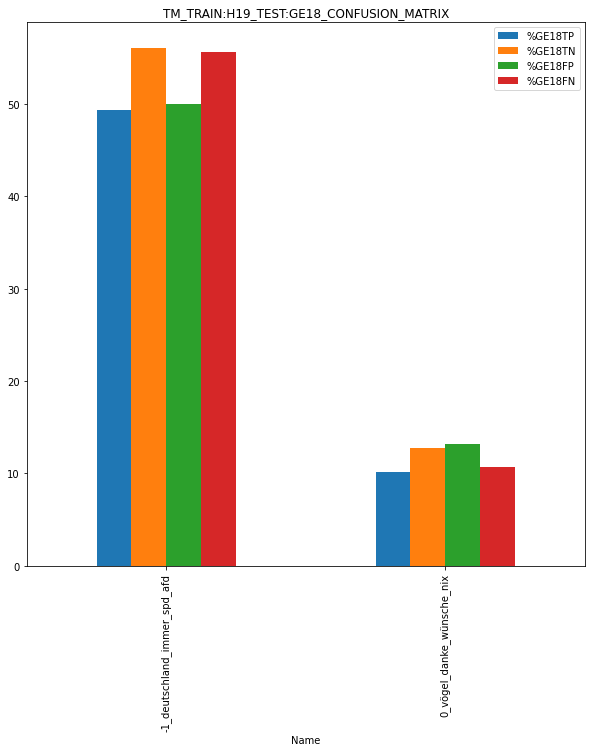

In [ ]:
test_ge18_df_percent_plt_CONF_MATRIX[0:2].plot(y=['%GE18TP', '%GE18TN','%GE18FP', '%GE18FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:H19_TEST:GE18_CONFUSION_MATRIX")

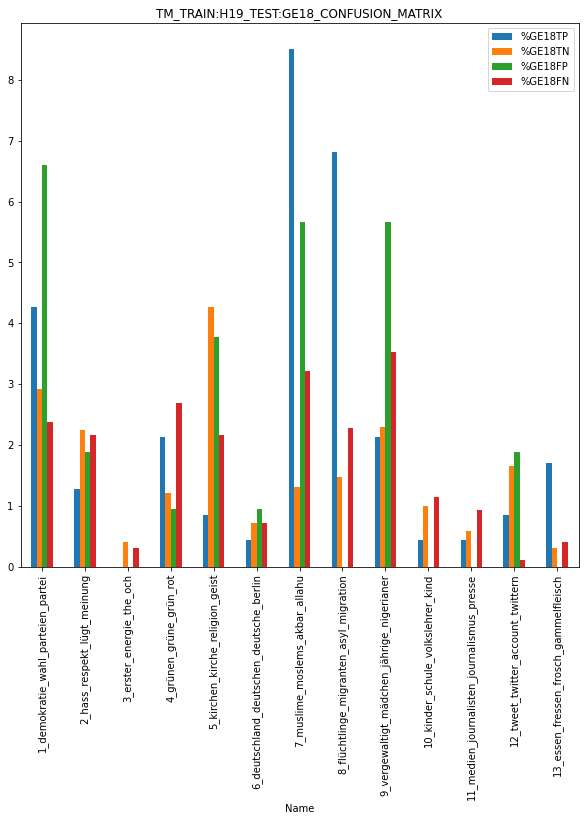

In [ ]:
test_ge18_df_percent_plt_CONF_MATRIX[2:15].plot(y=['%GE18TP', '%GE18TN','%GE18FP', '%GE18FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:H19_TEST:GE18_CONFUSION_MATRIX")

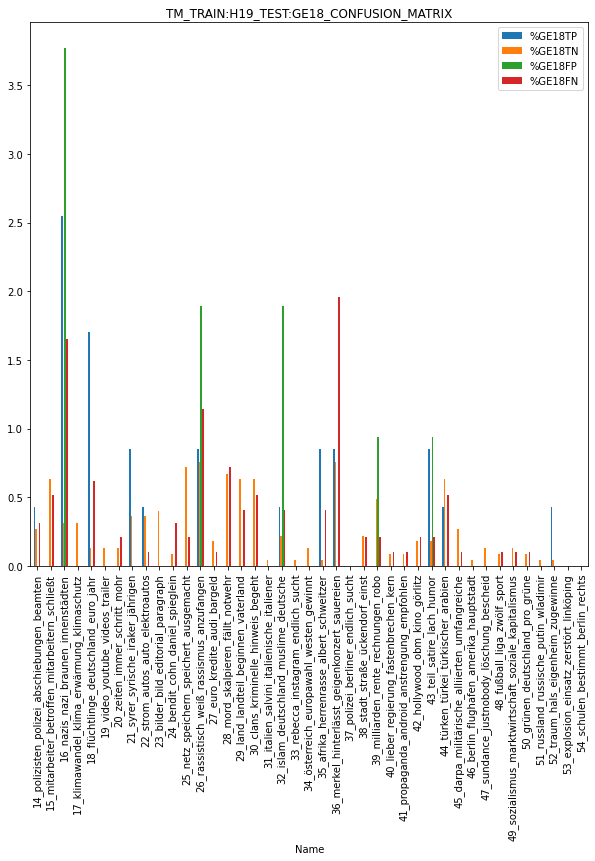

In [ ]:
test_ge18_df_percent_plt_CONF_MATRIX[15:].plot(y=['%GE18TP', '%GE18TN','%GE18FP', '%GE18FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:H19_TEST:GE18_CONFUSION_MATRIX")

### Test GE2019

In [ ]:
train_h19_class_ge19 = pd.read_csv('/content/submission_DE_A_HASOCOne_german_task_a_HASOC2019_GermEval2019.csv')
train_h19_class_ge19

text_id task1  index_col
0           0   NOT          0
1           1   NOT          1
2           2   NOT          2
3           3   HOF          3
4           4   NOT          4
...       ...   ...        ...
3026     3026   NOT       3026
3027     3027   NOT       3027
3028     3028   NOT       3028
3029     3029   NOT       3029
3030     3030   NOT       3030

[3031 rows x 3 columns]

In [ ]:
ge19_test_class_values = pd.DataFrame(train_h19_class_ge19['task1'].value_counts())
ge19_test_class_values

task1
NOT   2696
HOF    335

In [ ]:

ge19_test_raw['class'] = train_h19_class_ge19['task1']
ge19_test_raw

TWEET      OFF     CAT  \
0     @JanZimmHHB @mopo Komisch das die Realitätsver...  OFFENSE  INSULT   
1     @faznet @Gruene_Europa @SPDEuropa @CDU CDU ste...  OFFENSE   ABUSE   
2     @DLFNachrichten Die Gesichter, Namen, Religion...    OTHER   OTHER   
3     @welt Wie verwirrt muss man sein um sich zu we...  OFFENSE   ABUSE   
4     @hacker_1991 @torben_braga Weil die AfD den Fe...  OFFENSE   ABUSE   
...                                                 ...      ...     ...   
3026  Es fand aber nie eine Emanzipierungs-Phase der...    OTHER   OTHER   
3027  Um es klar zu stellen: Ich will hier kein Whit...    OTHER   OTHER   
3028  Und dann habe ich da noch die McArthur-Briefe ...    OTHER   OTHER   
3029  al sehen wer der Ersatzmann wird. Hier könnte ...    OTHER   OTHER   
3030  @JKasek Oder die Bäume. Bin mal in 'nem Wald s...    OTHER   OTHER   

      pred class  
0        2   NOT  
1       -1   NOT  
2        5   NOT  
3        2   HOF  
4       -1   NOT  
...    ...   ...  
3026    44   NOT  
3027    15   NOT  
3028    -1   NOT  
3029     2   NOT  
3030    -1   NOT  

[3031 rows x 5 columns]

In [ ]:
# https://stackoverflow.com/questions/41691081/pandas-use-and-operator-in-loc-function
ge19_test_true_pos = ge19_test_raw.loc[(ge19_test_raw['OFF'] == 'OFFENSE') & (ge19_test_raw['class'] == 'HOF')]
ge19_test_true_pos

TWEET      OFF        CAT  \
3     @welt Wie verwirrt muss man sein um sich zu we...  OFFENSE      ABUSE   
43    @La_Pebbles_ @mz_quedlinburg @mzwebde Warum so...  OFFENSE     INSULT   
57    @slart_bart Ja, weil auch Blöde, wie Sie?, irg...  OFFENSE      ABUSE   
76    @heutejournal Wenn man von seinem Versagen abl...  OFFENSE      ABUSE   
79    @Potpueree Anstatt sich hier als Rechtschreibn...  OFFENSE     INSULT   
...                                                 ...      ...        ...   
2846      arie wo bist du du alte Arsch Geburt #krone18  OFFENSE     INSULT   
2858  ich kotzt das so an, fragt die deutschen Staat...  OFFENSE  PROFANITY   
2864  So wie ich das sehe wenn ich mir die Bilder vo...  OFFENSE      ABUSE   
2870  eine Fresse wie viel Fritierfett hat #markusla...  OFFENSE  PROFANITY   
2976  @sixtus Irgend so ein charakterloser brauner M...  OFFENSE     INSULT   

      pred class  
3        2   HOF  
43      -1   HOF  
57      12   HOF  
76      -1   HOF  
79       2   HOF  
...    ...   ...  
2846     0   HOF  
2858    18   HOF  
2864    14   HOF  
2870    13   HOF  
2976    -1   HOF  

[190 rows x 5 columns]

In [ ]:
ge19_test_pred_values_true_pos = pd.DataFrame(ge19_test_true_pos['pred'].value_counts())
ge19_test_pred_values_true_pos['percent'] = (ge19_test_pred_values_true_pos['pred'] / ge19_test_pred_values_true_pos['pred'].sum()) * 100
ge19_test_pred_values_true_pos

pred    percent
-1    112  58.947368
 0     14   7.368421
 2     10   5.263158
 16     9   4.736842
 13     5   2.631579
 26     5   2.631579
 1      5   2.631579
 12     3   1.578947
 7      3   1.578947
 9      2   1.052632
 6      2   1.052632
 32     2   1.052632
 14     2   1.052632
 43     2   1.052632
 10     1   0.526316
 8      1   0.526316
 22     1   0.526316
 39     1   0.526316
 4      1   0.526316
 36     1   0.526316
 19     1   0.526316
 28     1   0.526316
 15     1   0.526316
 11     1   0.526316
 17     1   0.526316
 5      1   0.526316
 48     1   0.526316
 18     1   0.526316

In [ ]:
ge19_test_false_pos = ge19_test_raw.loc[(ge19_test_raw['OFF'] == 'OTHER') & (ge19_test_raw['class'] == 'HOF')]
ge19_test_false_pos

TWEET    OFF    CAT  pred  \
144   Dem muss sich eine Genderbeauftragende dringen...  OTHER  OTHER    17   
151   @gundel_gaukeley @KoyamaMichi Ihr versteht hal...  OTHER  OTHER     7   
154   @Martin514337541 @wasistzeitgeist Wenn selbst ...  OTHER  OTHER    44   
157   @katharina_munz Der arme Kerl wird für seine s...  OTHER  OTHER    -1   
176   @Steffmann45 @jazzlover2021 @DerGermane2 Ich g...  OTHER  OTHER    -1   
...                                                 ...    ...    ...   ...   
2948  Ich wünschte ich würde mal einen Arbeitstag er...  OTHER  OTHER    -1   
2954  Ja, DCLEAKS sind Beweise und Hillary Clinton b...  OTHER  OTHER    -1   
2973  @Denk_Splitter @sixtus Klassische Projektion. ...  OTHER  OTHER    -1   
3006  @Antimyon106 Guck mal auf YT nach @SciManDan. ...  OTHER  OTHER     2   
3007  Dazu kommt der Terror gegen Afrin aber RTE Ter...  OTHER  OTHER    -1   

     class  
144    HOF  
151    HOF  
154    HOF  
157    HOF  
176    HOF  
...    ...  
2948   HOF  
2954   HOF  
2973   HOF  
3006   HOF  
3007   HOF  

[145 rows x 5 columns]

In [ ]:
ge19_test_pred_values_false_pos = pd.DataFrame(ge19_test_false_pos['pred'].value_counts())
ge19_test_pred_values_false_pos['percent'] = (ge19_test_pred_values_false_pos['pred'] / ge19_test_pred_values_false_pos['pred'].sum()) * 100
ge19_test_pred_values_false_pos

pred    percent
-1     80  55.172414
 0     22  15.172414
 16     7   4.827586
 26     5   3.448276
 7      5   3.448276
 49     3   2.068966
 1      3   2.068966
 2      3   2.068966
 17     2   1.379310
 12     2   1.379310
 10     2   1.379310
 15     2   1.379310
 5      2   1.379310
 23     1   0.689655
 32     1   0.689655
 13     1   0.689655
 39     1   0.689655
 19     1   0.689655
 44     1   0.689655
 6      1   0.689655

In [ ]:
ge19_test_true_neg = ge19_test_raw.loc[(ge19_test_raw['OFF'] == 'OTHER') & (ge19_test_raw['class'] == 'NOT')]
ge19_test_true_neg

TWEET    OFF    CAT  pred  \
2     @DLFNachrichten Die Gesichter, Namen, Religion...  OTHER  OTHER     5   
5     @aktuelle_stunde Also beim Fall Birmingham, En...  OTHER  OTHER     2   
6     @StZ_NEWS Aber bei läppischen 130.000 Euro der...  OTHER  OTHER    24   
12    @BR24 Wie viele werden durch Gas Unfälle getöt...  OTHER  OTHER    22   
25    @TAG24LE Wenn sich Linke Linke zu Feinden mach...  OTHER  OTHER     0   
...                                                 ...    ...    ...   ...   
3026  Es fand aber nie eine Emanzipierungs-Phase der...  OTHER  OTHER    44   
3027  Um es klar zu stellen: Ich will hier kein Whit...  OTHER  OTHER    15   
3028  Und dann habe ich da noch die McArthur-Briefe ...  OTHER  OTHER    -1   
3029  al sehen wer der Ersatzmann wird. Hier könnte ...  OTHER  OTHER     2   
3030  @JKasek Oder die Bäume. Bin mal in 'nem Wald s...  OTHER  OTHER    -1   

     class  
2      NOT  
5      NOT  
6      NOT  
12     NOT  
25     NOT  
...    ...  
3026   NOT  
3027   NOT  
3028   NOT  
3029   NOT  
3030   NOT  

[1916 rows x 5 columns]

In [ ]:
ge19_test_pred_values_true_neg = pd.DataFrame(ge19_test_true_neg['pred'].value_counts())
ge19_test_pred_values_true_neg['percent'] = (ge19_test_pred_values_true_neg['pred'] / ge19_test_pred_values_true_neg['pred'].sum()) * 100
ge19_test_pred_values_true_neg

pred    percent
-1   1108  57.828810
 0    242  12.630480
 1     68   3.549061
 12    60   3.131524
 2     36   1.878914
 13    24   1.252610
 16    23   1.200418
 17    21   1.096033
 49    19   0.991649
 26    19   0.991649
 10    18   0.939457
 8     17   0.887265
 22    16   0.835073
 5     15   0.782881
 11    14   0.730689
 15    14   0.730689
 39    14   0.730689
 7     13   0.678497
 3     12   0.626305
 29    12   0.626305
 14    11   0.574113
 28    10   0.521921
 44     8   0.417537
 25     8   0.417537
 24     8   0.417537
 23     8   0.417537
 43     7   0.365344
 19     7   0.365344
 45     6   0.313152
 38     6   0.313152
 4      6   0.313152
 9      6   0.313152
 18     6   0.313152
 27     5   0.260960
 36     5   0.260960
 42     4   0.208768
 6      4   0.208768
 30     4   0.208768
 32     4   0.208768
 20     4   0.208768
 47     3   0.156576
 41     3   0.156576
 34     3   0.156576
 31     2   0.104384
 35     2   0.104384
 48     2   0.104384
 53     2   0.104384
 51     2   0.104384
 37     1   0.052192
 52     1   0.052192
 33     1   0.052192
 21     1   0.052192
 40     1   0.052192

In [ ]:
ge19_test_false_neg = ge19_test_raw.loc[(ge19_test_raw['OFF'] == 'OFFENSE') & (ge19_test_raw['class'] == 'NOT')]
ge19_test_false_neg

TWEET      OFF        CAT  \
0     @JanZimmHHB @mopo Komisch das die Realitätsver...  OFFENSE     INSULT   
1     @faznet @Gruene_Europa @SPDEuropa @CDU CDU ste...  OFFENSE      ABUSE   
4     @hacker_1991 @torben_braga Weil die AfD den Fe...  OFFENSE      ABUSE   
7     @StZ_NEWS Schäuble wird wissen woher dieses Na...  OFFENSE      ABUSE   
8     @welt Komisch, wäre dieser Betrug in der Nähe ...  OFFENSE      ABUSE   
...                                                 ...      ...        ...   
2888  Einfach nur peinlich wie sich sogenannte Aktiv...  OFFENSE     INSULT   
2889  Diese sogenannten Aktivisten sind Straftäter d...  OFFENSE      ABUSE   
2949    #Erdogan ist einfach eine Pest für die #Türkei.  OFFENSE     INSULT   
2978  Das mag dem einen oder anderen harsch vorkomme...  OFFENSE     INSULT   
2988  Ich frage mich mittlerweile was Saudi Arabien ...  OFFENSE  PROFANITY   

      pred class  
0        2   NOT  
1       -1   NOT  
4       -1   NOT  
7       16   NOT  
8        2   NOT  
...    ...   ...  
2888    -1   NOT  
2889    -1   NOT  
2949    44   NOT  
2978     1   NOT  
2988    -1   NOT  

[780 rows x 5 columns]

In [ ]:
ge19_test_pred_values_false_neg = pd.DataFrame(ge19_test_false_neg['pred'].value_counts())
ge19_test_pred_values_false_neg['percent'] = (ge19_test_pred_values_false_neg['pred'] / ge19_test_pred_values_false_neg['pred'].sum()) * 100
ge19_test_pred_values_false_neg

pred    percent
-1    469  60.128205
 0     44   5.641026
 1     34   4.358974
 2     27   3.461538
 16    27   3.461538
 8     18   2.307692
 11    12   1.538462
 4     10   1.282051
 7     10   1.282051
 12     9   1.153846
 9      7   0.897436
 13     7   0.897436
 10     7   0.897436
 36     6   0.769231
 18     6   0.769231
 14     6   0.769231
 5      5   0.641026
 39     5   0.641026
 30     5   0.641026
 26     5   0.641026
 24     5   0.641026
 43     5   0.641026
 15     5   0.641026
 23     4   0.512821
 29     4   0.512821
 35     4   0.512821
 3      4   0.512821
 49     3   0.384615
 28     3   0.384615
 32     3   0.384615
 19     3   0.384615
 6      3   0.384615
 38     2   0.256410
 42     2   0.256410
 37     2   0.256410
 50     1   0.128205
 25     1   0.128205
 48     1   0.128205
 22     1   0.128205
 40     1   0.128205
 21     1   0.128205
 52     1   0.128205
 17     1   0.128205
 44     1   0.128205

In [ ]:
ge19_test_raw['cat_bin_actual'] = ge19_test_raw['OFF'].map({'OFFENSE': 1, 'OTHER': 0}).astype(int)
ge19_test_raw['cat_bin_predicted'] = ge19_test_raw['class'].map({'HOF': 1, 'NOT': 0}).astype(int)


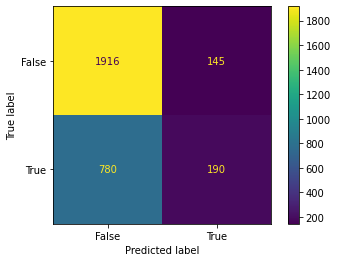

In [ ]:
# https://www.w3schools.com/python/python_ml_confusion_matrix.asp
#import matplotlib.pyplot as plt
#import numpy
#from sklearn import metrics

actual = ge19_test_raw['cat_bin_actual']
predicted = ge19_test_raw['cat_bin_predicted']

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
accuracy = metrics.accuracy_score(actual, predicted)
accuracy

0.6948201913559882

In [ ]:
precision = metrics.precision_score(actual, predicted)
precision

0.5671641791044776

In [ ]:
sensitivity_recall = metrics.recall_score(actual, predicted)
sensitivity_recall

0.1958762886597938

In [ ]:
specificity = metrics.recall_score(actual, predicted, pos_label=0)
specificity

0.9296458030082484

In [ ]:
F1_score = metrics.f1_score(actual, predicted)
F1_score

0.29118773946360155

In [ ]:
#metrics
print({"Accuracy":accuracy,"Precision":precision,
       "Sensitivity_recall":sensitivity_recall,
       "Specificity":specificity,
       "F1_score":F1_score})

{'Accuracy': 0.6948201913559882, 'Precision': 0.5671641791044776, 'Sensitivity_recall': 0.1958762886597938, 'Specificity': 0.9296458030082484, 'F1_score': 0.29118773946360155}


### TEST GE2019 INDEZES CONFUSION MATRIX

In [ ]:
# df1 enthält die Topicnummern und ihre Bezeichnungen
df1 =  train_h19_model_topics[['Topic','Name']]
df1

Topic                                               Name
0      -1                       -1_deutschland_immer_spd_afd
1       0                          0_vögel_danke_wünsche_nix
2       1                  1_demokratie_wahl_parteien_partei
3       2                        2_hass_respekt_lügt_meinung
4       3                           3_erster_energie_the_och
5       4                            4_grünen_grüne_grün_rot
6       5                    5_kirchen_kirche_religion_geist
7       6            6_deutschland_deutschen_deutsche_berlin
8       7                     7_muslime_moslems_akbar_allahu
9       8             8_flüchtlinge_migranten_asyl_migration
10      9          9_vergewaltigt_mädchen_jährige_nigerianer
11     10                  10_kinder_schule_volkslehrer_kind
12     11         11_medien_journalisten_journalismus_presse
13     12                  12_tweet_twitter_account_twittern
14     13              13_essen_fressen_frosch_gammelfleisch
15     14        14_polizisten_polizei_abschiebungen_beamten
16     15     15_mitarbeiter_betroffen_mitarbeitern_schließt
17     16                 16_nazis_nazi_braunen_innenstädten
18     17         17_klimawandel_klima_erwärmung_klimaschutz
19     18               18_flüchtlinge_deutschland_euro_jahr
20     19                    19_video_youtube_videos_trailer
21     20                       20_zeiten_immer_schritt_mohr
22     21                  21_syrer_syrische_iraker_jährigen
23     22                   22_strom_autos_auto_elektroautos
24     23                 23_bilder_bild_editorial_paragraph
25     24                    24_bendit_cohn_daniel_spieglein
26     25             25_netz_speichern_speichert_ausgemacht
27     26           26_rassistisch_weiß_rassismus_anzufangen
28     27                       27_euro_kredite_audi_bargeld
29     28                   28_mord_skalpieren_fällt_notwehr
30     29                29_land_landteil_beginnen_vaterland
31     30                 30_clans_kriminelle_hinweis_begeht
32     31          31_italien_salvini_italienische_italiener
33     32              32_islam_deutschland_muslime_deutsche
34     33                 33_rebecca_instagram_endlich_sucht
35     34            34_österreich_europawahl_westen_gewinnt
36     35            35_afrika_herrenrasse_albert_schweitzer
37     36      36_merkel_hinterlässt_geigenkonzert_sauereien
38     37                  37_polizei_berliner_endlich_sucht
39     38                    38_stadt_straße_ückendorf_einst
40     39                39_milliarden_rente_rechnungen_robo
41     40             40_lieber_regierung_fastenbrechen_kern
42     41        41_propaganda_android_anstrengung_empfohlen
43     42                      42_hollywood_obm_kino_görlitz
44     43                          43_teil_satire_lach_humor
45     44                44_türken_türkei_türkischer_arabien
46     45      45_darpa_militärische_alliierten_umfangreiche
47     46             46_berlin_flughafen_amerika_hauptstadt
48     47           47_sundance_justnobody_löschung_bescheid
49     48                        48_fußball_liga_zwölf_sport
50     49  49_sozialismus_marktwirtschaft_soziale_kapital...
51     50                    50_grünen_deutschland_pro_grüne
52     51               51_russland_russische_putin_wladimir
53     52                  52_traum_hals_eigenheim_zugewinne
54     53            53_explosion_einsatz_zerstört_linköping
55     54                  54_schulen_bestimmt_berlin_rechts

In [ ]:
ge19_test_pred_values_true_pos['Topic'] = ge19_test_pred_values_true_pos.index
ge19_test_pred_values_true_pos

pred    percent  Topic
-1    112  58.947368     -1
 0     14   7.368421      0
 2     10   5.263158      2
 16     9   4.736842     16
 13     5   2.631579     13
 26     5   2.631579     26
 1      5   2.631579      1
 12     3   1.578947     12
 7      3   1.578947      7
 9      2   1.052632      9
 6      2   1.052632      6
 32     2   1.052632     32
 14     2   1.052632     14
 43     2   1.052632     43
 10     1   0.526316     10
 8      1   0.526316      8
 22     1   0.526316     22
 39     1   0.526316     39
 4      1   0.526316      4
 36     1   0.526316     36
 19     1   0.526316     19
 28     1   0.526316     28
 15     1   0.526316     15
 11     1   0.526316     11
 17     1   0.526316     17
 5      1   0.526316      5
 48     1   0.526316     48
 18     1   0.526316     18

In [ ]:
# df2 bis df5 enthalten Vorhersagen, Topicanteile in Prozent sowie die Topicnr.
# dabei werden die Spalten umbenannt, damit es später beim Zusammenfügen nicht
# zu Doppelungen kommt
df2 = ge19_test_pred_values_true_pos 
df2 = df2.rename(columns={'pred':'predGE19TP', 'percent':'%GE19TP', 'Topic':'Topic'})

In [ ]:
ge19_test_pred_values_false_pos['Topic'] = ge19_test_pred_values_false_pos.index
ge19_test_pred_values_false_pos

pred    percent  Topic
-1     80  55.172414     -1
 0     22  15.172414      0
 16     7   4.827586     16
 26     5   3.448276     26
 7      5   3.448276      7
 49     3   2.068966     49
 1      3   2.068966      1
 2      3   2.068966      2
 17     2   1.379310     17
 12     2   1.379310     12
 10     2   1.379310     10
 15     2   1.379310     15
 5      2   1.379310      5
 23     1   0.689655     23
 32     1   0.689655     32
 13     1   0.689655     13
 39     1   0.689655     39
 19     1   0.689655     19
 44     1   0.689655     44
 6      1   0.689655      6

In [ ]:
df3 = ge19_test_pred_values_false_pos
df3 = df3.rename(columns={'pred':'predGE19FP', 'percent':'%GE19FP', 'Topic':'Topic'})

In [ ]:
ge19_test_pred_values_true_neg['Topic'] = ge19_test_pred_values_true_neg.index
ge19_test_pred_values_true_neg

pred    percent  Topic
-1   1108  57.828810     -1
 0    242  12.630480      0
 1     68   3.549061      1
 12    60   3.131524     12
 2     36   1.878914      2
 13    24   1.252610     13
 16    23   1.200418     16
 17    21   1.096033     17
 49    19   0.991649     49
 26    19   0.991649     26
 10    18   0.939457     10
 8     17   0.887265      8
 22    16   0.835073     22
 5     15   0.782881      5
 11    14   0.730689     11
 15    14   0.730689     15
 39    14   0.730689     39
 7     13   0.678497      7
 3     12   0.626305      3
 29    12   0.626305     29
 14    11   0.574113     14
 28    10   0.521921     28
 44     8   0.417537     44
 25     8   0.417537     25
 24     8   0.417537     24
 23     8   0.417537     23
 43     7   0.365344     43
 19     7   0.365344     19
 45     6   0.313152     45
 38     6   0.313152     38
 4      6   0.313152      4
 9      6   0.313152      9
 18     6   0.313152     18
 27     5   0.260960     27
 36     5   0.260960     36
 42     4   0.208768     42
 6      4   0.208768      6
 30     4   0.208768     30
 32     4   0.208768     32
 20     4   0.208768     20
 47     3   0.156576     47
 41     3   0.156576     41
 34     3   0.156576     34
 31     2   0.104384     31
 35     2   0.104384     35
 48     2   0.104384     48
 53     2   0.104384     53
 51     2   0.104384     51
 37     1   0.052192     37
 52     1   0.052192     52
 33     1   0.052192     33
 21     1   0.052192     21
 40     1   0.052192     40

In [ ]:
df4 = ge19_test_pred_values_true_neg
df4 = df4.rename(columns={'pred':'predGE19TN', 'percent':'%GE19TN', 'Topic':'Topic'})

In [ ]:
ge19_test_pred_values_false_neg['Topic'] = ge19_test_pred_values_false_neg.index
ge19_test_pred_values_false_neg

pred    percent  Topic
-1    469  60.128205     -1
 0     44   5.641026      0
 1     34   4.358974      1
 2     27   3.461538      2
 16    27   3.461538     16
 8     18   2.307692      8
 11    12   1.538462     11
 4     10   1.282051      4
 7     10   1.282051      7
 12     9   1.153846     12
 9      7   0.897436      9
 13     7   0.897436     13
 10     7   0.897436     10
 36     6   0.769231     36
 18     6   0.769231     18
 14     6   0.769231     14
 5      5   0.641026      5
 39     5   0.641026     39
 30     5   0.641026     30
 26     5   0.641026     26
 24     5   0.641026     24
 43     5   0.641026     43
 15     5   0.641026     15
 23     4   0.512821     23
 29     4   0.512821     29
 35     4   0.512821     35
 3      4   0.512821      3
 49     3   0.384615     49
 28     3   0.384615     28
 32     3   0.384615     32
 19     3   0.384615     19
 6      3   0.384615      6
 38     2   0.256410     38
 42     2   0.256410     42
 37     2   0.256410     37
 50     1   0.128205     50
 25     1   0.128205     25
 48     1   0.128205     48
 22     1   0.128205     22
 40     1   0.128205     40
 21     1   0.128205     21
 52     1   0.128205     52
 17     1   0.128205     17
 44     1   0.128205     44

In [ ]:
df5 = ge19_test_pred_values_false_neg
df5 = df5.rename(columns={'pred':'predGE19FN', 'percent':'%GE19FN', 'Topic':'Topic'})

In [ ]:
# https://stackoverflow.com/questions/44327999/how-to-merge-multiple-dataframes
from functools import reduce

data_frames = [df1, df2, df3, df4, df5]
df_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_merged[['%GE19TP', '%GE19TN','%GE19FP', '%GE19FN']] = df_merged[['%GE19TP', '%GE19TN','%GE19FP', '%GE19FN']].astype(float).round(2)
df_merged
#df_to_round = df_merged[['%GE19', '%GE19','%H19', '%H20']]
#df_to_round = df_to_round[['%GE19', '%GE19','%H19', '%H20']].round(2)
#df_to_round

Topic                                               Name predGE19TP  \
0      -1                       -1_deutschland_immer_spd_afd      112.0   
1       0                          0_vögel_danke_wünsche_nix       14.0   
2       1                  1_demokratie_wahl_parteien_partei        5.0   
3       2                        2_hass_respekt_lügt_meinung       10.0   
4       3                           3_erster_energie_the_och          0   
5       4                            4_grünen_grüne_grün_rot        1.0   
6       5                    5_kirchen_kirche_religion_geist        1.0   
7       6            6_deutschland_deutschen_deutsche_berlin        2.0   
8       7                     7_muslime_moslems_akbar_allahu        3.0   
9       8             8_flüchtlinge_migranten_asyl_migration        1.0   
10      9          9_vergewaltigt_mädchen_jährige_nigerianer        2.0   
11     10                  10_kinder_schule_volkslehrer_kind        1.0   
12     11         11_medien_journalisten_journalismus_presse        1.0   
13     12                  12_tweet_twitter_account_twittern        3.0   
14     13              13_essen_fressen_frosch_gammelfleisch        5.0   
15     14        14_polizisten_polizei_abschiebungen_beamten        2.0   
16     15     15_mitarbeiter_betroffen_mitarbeitern_schließt        1.0   
17     16                 16_nazis_nazi_braunen_innenstädten        9.0   
18     17         17_klimawandel_klima_erwärmung_klimaschutz        1.0   
19     18               18_flüchtlinge_deutschland_euro_jahr        1.0   
20     19                    19_video_youtube_videos_trailer        1.0   
21     20                       20_zeiten_immer_schritt_mohr          0   
22     21                  21_syrer_syrische_iraker_jährigen          0   
23     22                   22_strom_autos_auto_elektroautos        1.0   
24     23                 23_bilder_bild_editorial_paragraph          0   
25     24                    24_bendit_cohn_daniel_spieglein          0   
26     25             25_netz_speichern_speichert_ausgemacht          0   
27     26           26_rassistisch_weiß_rassismus_anzufangen        5.0   
28     27                       27_euro_kredite_audi_bargeld          0   
29     28                   28_mord_skalpieren_fällt_notwehr        1.0   
30     29                29_land_landteil_beginnen_vaterland          0   
31     30                 30_clans_kriminelle_hinweis_begeht          0   
32     31          31_italien_salvini_italienische_italiener          0   
33     32              32_islam_deutschland_muslime_deutsche        2.0   
34     33                 33_rebecca_instagram_endlich_sucht          0   
35     34            34_österreich_europawahl_westen_gewinnt          0   
36     35            35_afrika_herrenrasse_albert_schweitzer          0   
37     36      36_merkel_hinterlässt_geigenkonzert_sauereien        1.0   
38     37                  37_polizei_berliner_endlich_sucht          0   
39     38                    38_stadt_straße_ückendorf_einst          0   
40     39                39_milliarden_rente_rechnungen_robo        1.0   
41     40             40_lieber_regierung_fastenbrechen_kern          0   
42     41        41_propaganda_android_anstrengung_empfohlen          0   
43     42                      42_hollywood_obm_kino_görlitz          0   
44     43                          43_teil_satire_lach_humor        2.0   
45     44                44_türken_türkei_türkischer_arabien          0   
46     45      45_darpa_militärische_alliierten_umfangreiche          0   
47     46             46_berlin_flughafen_amerika_hauptstadt          0   
48     47           47_sundance_justnobody_löschung_bescheid          0   
49     48                        48_fußball_liga_zwölf_sport        1.0   
50     49  49_sozialismus_marktwirtschaft_soziale_kapital...          0   
51     50                    50_grünen_deutschland_pro_grüne          0   
52     51               51_ru

In [ ]:
df_merged

Topic                                               Name predGE19TP  \
0      -1                       -1_deutschland_immer_spd_afd      112.0   
1       0                          0_vögel_danke_wünsche_nix       14.0   
2       1                  1_demokratie_wahl_parteien_partei        5.0   
3       2                        2_hass_respekt_lügt_meinung       10.0   
4       3                           3_erster_energie_the_och          0   
5       4                            4_grünen_grüne_grün_rot        1.0   
6       5                    5_kirchen_kirche_religion_geist        1.0   
7       6            6_deutschland_deutschen_deutsche_berlin        2.0   
8       7                     7_muslime_moslems_akbar_allahu        3.0   
9       8             8_flüchtlinge_migranten_asyl_migration        1.0   
10      9          9_vergewaltigt_mädchen_jährige_nigerianer        2.0   
11     10                  10_kinder_schule_volkslehrer_kind        1.0   
12     11         11_medien_journalisten_journalismus_presse        1.0   
13     12                  12_tweet_twitter_account_twittern        3.0   
14     13              13_essen_fressen_frosch_gammelfleisch        5.0   
15     14        14_polizisten_polizei_abschiebungen_beamten        2.0   
16     15     15_mitarbeiter_betroffen_mitarbeitern_schließt        1.0   
17     16                 16_nazis_nazi_braunen_innenstädten        9.0   
18     17         17_klimawandel_klima_erwärmung_klimaschutz        1.0   
19     18               18_flüchtlinge_deutschland_euro_jahr        1.0   
20     19                    19_video_youtube_videos_trailer        1.0   
21     20                       20_zeiten_immer_schritt_mohr          0   
22     21                  21_syrer_syrische_iraker_jährigen          0   
23     22                   22_strom_autos_auto_elektroautos        1.0   
24     23                 23_bilder_bild_editorial_paragraph          0   
25     24                    24_bendit_cohn_daniel_spieglein          0   
26     25             25_netz_speichern_speichert_ausgemacht          0   
27     26           26_rassistisch_weiß_rassismus_anzufangen        5.0   
28     27                       27_euro_kredite_audi_bargeld          0   
29     28                   28_mord_skalpieren_fällt_notwehr        1.0   
30     29                29_land_landteil_beginnen_vaterland          0   
31     30                 30_clans_kriminelle_hinweis_begeht          0   
32     31          31_italien_salvini_italienische_italiener          0   
33     32              32_islam_deutschland_muslime_deutsche        2.0   
34     33                 33_rebecca_instagram_endlich_sucht          0   
35     34            34_österreich_europawahl_westen_gewinnt          0   
36     35            35_afrika_herrenrasse_albert_schweitzer          0   
37     36      36_merkel_hinterlässt_geigenkonzert_sauereien        1.0   
38     37                  37_polizei_berliner_endlich_sucht          0   
39     38                    38_stadt_straße_ückendorf_einst          0   
40     39                39_milliarden_rente_rechnungen_robo        1.0   
41     40             40_lieber_regierung_fastenbrechen_kern          0   
42     41        41_propaganda_android_anstrengung_empfohlen          0   
43     42                      42_hollywood_obm_kino_görlitz          0   
44     43                          43_teil_satire_lach_humor        2.0   
45     44                44_türken_türkei_türkischer_arabien          0   
46     45      45_darpa_militärische_alliierten_umfangreiche          0   
47     46             46_berlin_flughafen_amerika_hauptstadt          0   
48     47           47_sundance_justnobody_löschung_bescheid          0   
49     48                        48_fußball_liga_zwölf_sport        1.0   
50     49  49_sozialismus_marktwirtschaft_soziale_kapital...          0   
51     50                    50_grünen_deutschland_pro_grüne          0   
52     51               51_ru

In [ ]:
# https://stackoverflow.com/questions/15891038/change-column-type-in-pandas
# Die Anzahlen der vorhergesagten Topics werden in int umgewandelt
df_merged = df_merged.astype({"predGE19TP": int, "predGE19TN":int, "predGE19FP":int, "predGE19FN":int})
df_merged

Topic                                               Name  predGE19TP  \
0      -1                       -1_deutschland_immer_spd_afd         112   
1       0                          0_vögel_danke_wünsche_nix          14   
2       1                  1_demokratie_wahl_parteien_partei           5   
3       2                        2_hass_respekt_lügt_meinung          10   
4       3                           3_erster_energie_the_och           0   
5       4                            4_grünen_grüne_grün_rot           1   
6       5                    5_kirchen_kirche_religion_geist           1   
7       6            6_deutschland_deutschen_deutsche_berlin           2   
8       7                     7_muslime_moslems_akbar_allahu           3   
9       8             8_flüchtlinge_migranten_asyl_migration           1   
10      9          9_vergewaltigt_mädchen_jährige_nigerianer           2   
11     10                  10_kinder_schule_volkslehrer_kind           1   
12     11         11_medien_journalisten_journalismus_presse           1   
13     12                  12_tweet_twitter_account_twittern           3   
14     13              13_essen_fressen_frosch_gammelfleisch           5   
15     14        14_polizisten_polizei_abschiebungen_beamten           2   
16     15     15_mitarbeiter_betroffen_mitarbeitern_schließt           1   
17     16                 16_nazis_nazi_braunen_innenstädten           9   
18     17         17_klimawandel_klima_erwärmung_klimaschutz           1   
19     18               18_flüchtlinge_deutschland_euro_jahr           1   
20     19                    19_video_youtube_videos_trailer           1   
21     20                       20_zeiten_immer_schritt_mohr           0   
22     21                  21_syrer_syrische_iraker_jährigen           0   
23     22                   22_strom_autos_auto_elektroautos           1   
24     23                 23_bilder_bild_editorial_paragraph           0   
25     24                    24_bendit_cohn_daniel_spieglein           0   
26     25             25_netz_speichern_speichert_ausgemacht           0   
27     26           26_rassistisch_weiß_rassismus_anzufangen           5   
28     27                       27_euro_kredite_audi_bargeld           0   
29     28                   28_mord_skalpieren_fällt_notwehr           1   
30     29                29_land_landteil_beginnen_vaterland           0   
31     30                 30_clans_kriminelle_hinweis_begeht           0   
32     31          31_italien_salvini_italienische_italiener           0   
33     32              32_islam_deutschland_muslime_deutsche           2   
34     33                 33_rebecca_instagram_endlich_sucht           0   
35     34            34_österreich_europawahl_westen_gewinnt           0   
36     35            35_afrika_herrenrasse_albert_schweitzer           0   
37     36      36_merkel_hinterlässt_geigenkonzert_sauereien           1   
38     37                  37_polizei_berliner_endlich_sucht           0   
39     38                    38_stadt_straße_ückendorf_einst           0   
40     39                39_milliarden_rente_rechnungen_robo           1   
41     40             40_lieber_regierung_fastenbrechen_kern           0   
42     41        41_propaganda_android_anstrengung_empfohlen           0   
43     42                      42_hollywood_obm_kino_görlitz           0   
44     43                          43_teil_satire_lach_humor           2   
45     44                44_türken_türkei_türkischer_arabien           0   
46     45      45_darpa_militärische_alliierten_umfangreiche           0   
47     46             46_berlin_flughafen_amerika_hauptstadt           0   
48     47           47_sundance_justnobody_löschung_bescheid           0   
49     48                        48_fußball_liga_zwölf_sport           1   
50     49  49_sozialismus_marktwirtschaft_soziale_kapital...           0   
51     50                    50_grünen_deutschland_p

In [ ]:
df_percent = df_merged[['Topic','%GE19TP', '%GE19TN','%GE19FP', '%GE19FN','Name']]
df_percent

Topic  %GE19TP  %GE19TN  %GE19FP  %GE19FN  \
0      -1    58.95    57.83    55.17    60.13   
1       0     7.37    12.63    15.17     5.64   
2       1     2.63     3.55     2.07     4.36   
3       2     5.26     1.88     2.07     3.46   
4       3     0.00     0.63     0.00     0.51   
5       4     0.53     0.31     0.00     1.28   
6       5     0.53     0.78     1.38     0.64   
7       6     1.05     0.21     0.69     0.38   
8       7     1.58     0.68     3.45     1.28   
9       8     0.53     0.89     0.00     2.31   
10      9     1.05     0.31     0.00     0.90   
11     10     0.53     0.94     1.38     0.90   
12     11     0.53     0.73     0.00     1.54   
13     12     1.58     3.13     1.38     1.15   
14     13     2.63     1.25     0.69     0.90   
15     14     1.05     0.57     0.00     0.77   
16     15     0.53     0.73     1.38     0.64   
17     16     4.74     1.20     4.83     3.46   
18     17     0.53     1.10     1.38     0.13   
19     18     0.53     0.31     0.00     0.77   
20     19     0.53     0.37     0.69     0.38   
21     20     0.00     0.21     0.00     0.00   
22     21     0.00     0.05     0.00     0.13   
23     22     0.53     0.84     0.00     0.13   
24     23     0.00     0.42     0.69     0.51   
25     24     0.00     0.42     0.00     0.64   
26     25     0.00     0.42     0.00     0.13   
27     26     2.63     0.99     3.45     0.64   
28     27     0.00     0.26     0.00     0.00   
29     28     0.53     0.52     0.00     0.38   
30     29     0.00     0.63     0.00     0.51   
31     30     0.00     0.21     0.00     0.64   
32     31     0.00     0.10     0.00     0.00   
33     32     1.05     0.21     0.69     0.38   
34     33     0.00     0.05     0.00     0.00   
35     34     0.00     0.16     0.00     0.00   
36     35     0.00     0.10     0.00     0.51   
37     36     0.53     0.26     0.00     0.77   
38     37     0.00     0.05     0.00     0.26   
39     38     0.00     0.31     0.00     0.26   
40     39     0.53     0.73     0.69     0.64   
41     40     0.00     0.05     0.00     0.13   
42     41     0.00     0.16     0.00     0.00   
43     42     0.00     0.21     0.00     0.26   
44     43     1.05     0.37     0.00     0.64   
45     44     0.00     0.42     0.69     0.13   
46     45     0.00     0.31     0.00     0.00   
47     46     0.00     0.00     0.00     0.00   
48     47     0.00     0.16     0.00     0.00   
49     48     0.53     0.10     0.00     0.13   
50     49     0.00     0.99     2.07     0.38   
51     50     0.00     0.00     0.00     0.13   
52     51     0.00     0.10     0.00     0.00   
53     52     0.00     0.05     0.00     0.13   
54     53     0.00     0.10     0.00     0.00   
55     54     0.00     0.00     0.00     0.00   

                                                 Name  
0                        -1_deutschland_immer_spd_afd  
1                           0_vögel_danke_wünsche_nix  
2                   1_demokratie_wahl_parteien_partei  
3                         2_hass_respekt_lügt_meinung  
4                            3_erster_energie_the_och  
5                             4_grünen_grüne_grün_rot  
6                     5_kirchen_kirche_religion_geist  
7             6_deutschland_deutschen_deutsche_berlin  
8                      7_muslime_moslems_akbar_allahu  
9              8_flüchtlinge_migranten_asyl_migration  
10          9_vergewaltigt_mädchen_jährige_nigerianer  
11                  10_kinder_schule_volkslehrer_kind  
12         11_medien_journalisten_journalismus_presse  
13                  12_tweet_twitter_account_twittern  
14              13_essen_fressen_frosch_gammelfleisch  
15        14_polizisten_polizei_abschiebungen_beamten  
16     15_mitarbeiter_betroffen_mitarbeitern_schließt  
17                 16_nazis_nazi_braunen_innenstädten  
18         17_klimawandel_klima_erwärmung_klimaschutz  
19               18_flüchtlinge_deutschland_euro_jahr  
20                    19_video_you

In [ ]:
test_ge19_df_percent_plt_CONF_MATRIX = df_percent.set_index('Name')

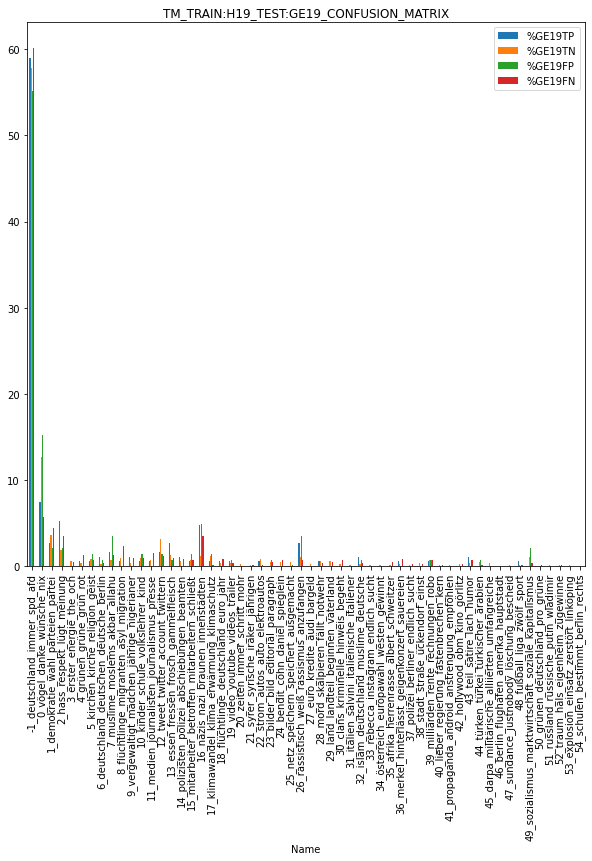

In [ ]:
test_ge19_df_percent_plt_CONF_MATRIX.plot(y=['%GE19TP', '%GE19TN','%GE19FP', '%GE19FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:H19_TEST:GE19_CONFUSION_MATRIX")

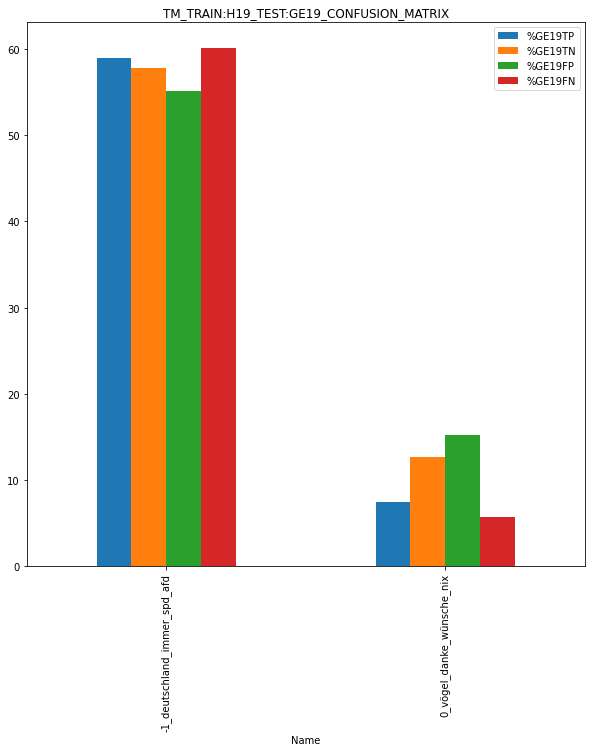

In [ ]:
test_ge19_df_percent_plt_CONF_MATRIX[0:2].plot(y=['%GE19TP', '%GE19TN','%GE19FP', '%GE19FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:H19_TEST:GE19_CONFUSION_MATRIX")

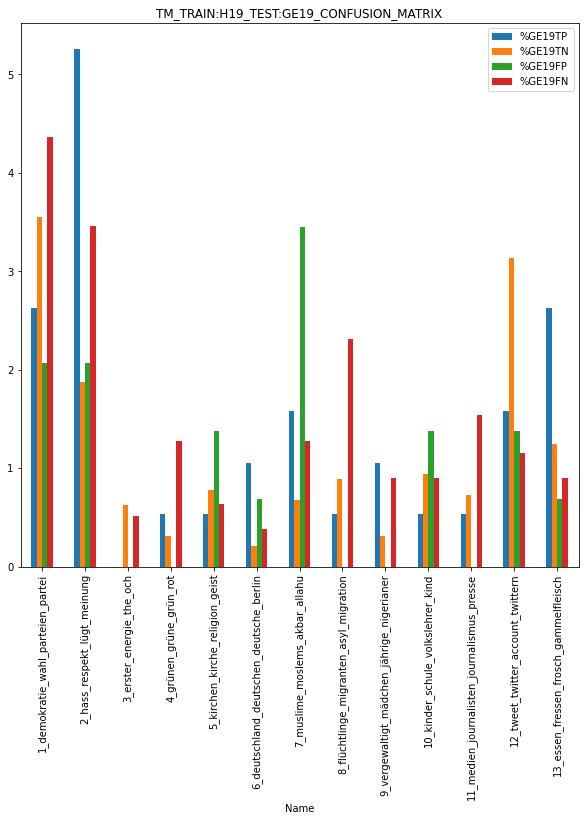

In [ ]:
test_ge19_df_percent_plt_CONF_MATRIX[2:15].plot(y=['%GE19TP', '%GE19TN','%GE19FP', '%GE19FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:H19_TEST:GE19_CONFUSION_MATRIX")

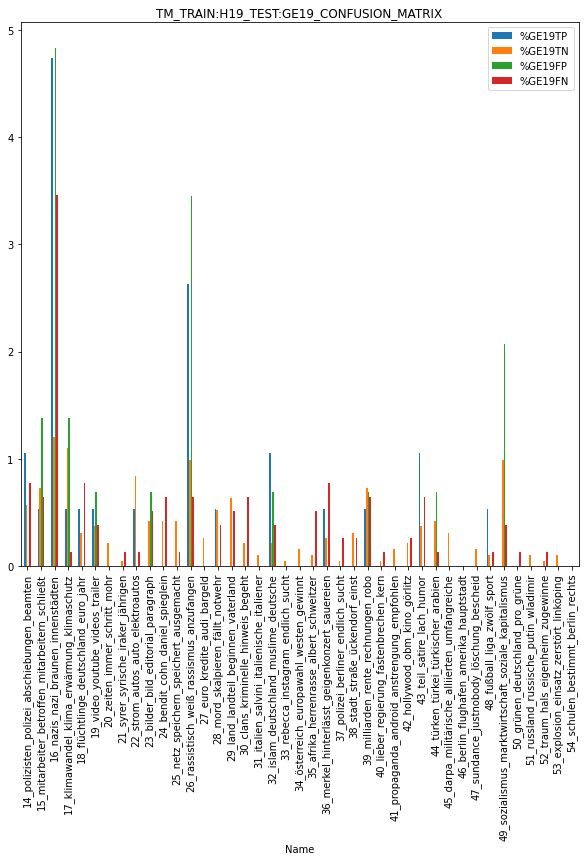

In [ ]:
test_ge19_df_percent_plt_CONF_MATRIX[15:].plot(y=['%GE19TP', '%GE19TN','%GE19FP', '%GE19FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:H19_TEST:GE19_CONFUSION_MATRIX")

### Test H2019

In [ ]:
train_h19_class_h19 = pd.read_csv('/content/submission_DE_A_HASOCOne_german_task_a_HASOC2019.csv')
train_h19_class_h19


text_id task1  index_col
0    hasoc_de_5270   HOF          0
1    hasoc_de_5271   NOT          1
2    hasoc_de_5272   NOT          2
3    hasoc_de_5273   NOT          3
4    hasoc_de_5274   NOT          4
..             ...   ...        ...
845  hasoc_de_6115   NOT        845
846  hasoc_de_6116   NOT        846
847  hasoc_de_6117   NOT        847
848  hasoc_de_6118   NOT        848
849  hasoc_de_6120   NOT        849

[850 rows x 3 columns]

In [ ]:
h19_test_class_values = pd.DataFrame(train_h19_class_h19['task1'].value_counts())
h19_test_class_values

task1
NOT    777
HOF     73

In [ ]:

h19_test_raw['class'] = train_h19_class_h19['task1']
h19_test_raw

text_id                                               text task_1  \
0    hasoc_de_5270  Die Grüne Intelligenz Bestie 'Eckhardt', Prang...    HOF   
1    hasoc_de_5271  Das Deutschlandlied,  Sinn und Unsinn  https:/...    NOT   
2    hasoc_de_5272               #Eurovision  https://t.co/24T8fzUI44    NOT   
3    hasoc_de_5273  Unsere ESC Kandidatinnen haben selbst Schuld a...    HOF   
4    hasoc_de_5274  Scheinbar bekommt Sarah's Conner's Sohn Vincen...    HOF   
..             ...                                                ...    ...   
845  hasoc_de_6115  #Erdogan ruft seine Mops wegen Untauglichkeit ...    HOF   
846  hasoc_de_6116  Ich würde der Linken Chefin Kipping die 1.000 ...    HOF   
847  hasoc_de_6117  Ausländer sind Top &amp; Trumpf  Schon aufgefa...    HOF   
848  hasoc_de_6118  Wie der Regierungsjet die Regierungsflieger wi...    HOF   
849  hasoc_de_6120  #guteMütter  sind heutzutage gut ausgebildete ...    NOT   

    task_2  pred class  
0     HATE     5   HOF  
1     NONE     6   NOT  
2     NONE     3   NOT  
3     OFFN    -1   NOT  
4     OFFN    -1   NOT  
..     ...   ...   ...  
845   OFFN    -1   NOT  
846   OFFN    13   NOT  
847   OFFN    -1   NOT  
848   OFFN    -1   NOT  
849   NONE    10   NOT  

[850 rows x 6 columns]

In [ ]:
# https://stackoverflow.com/questions/41691081/pandas-use-and-operator-in-loc-function
h19_test_true_pos = h19_test_raw.loc[(h19_test_raw['task_1'] == 'HOF') & (h19_test_raw['class'] == 'HOF')]
h19_test_true_pos

text_id                                               text task_1  \
0    hasoc_de_5270  Die Grüne Intelligenz Bestie 'Eckhardt', Prang...    HOF   
6    hasoc_de_5276  Du bist ein Rassist,Du erhöhst Dich über ander...    HOF   
46   hasoc_de_5316  @MichaelaKorte @chris_hiv @derCharlie_ @scheid...    HOF   
69   hasoc_de_5339  Anerkannte Asylanten, flüchten zur Türkei!  Si...    HOF   
71   hasoc_de_5341  @Menschaffe @hessenbursche Ich würde mich an D...    HOF   
78   hasoc_de_5348  Dreimal sagen,'Allah Akbars ' und dann noch 'i...    HOF   
97   hasoc_de_5367  @Ungebeten1 @Ralf__B Homosexualität ist ein Üb...    HOF   
98   hasoc_de_5368  @Ungebeten1 Finde Homosexualität nicht 'gegen ...    HOF   
153  hasoc_de_5423  @BlondJedi Da frage ich mich:  Es gibt so viel...    HOF   
161  hasoc_de_5431  @Ralf64904117 @ab19868 Wer soll diese Lügen gl...    HOF   
184  hasoc_de_5454  @Ralf64904117 Ich versteh die Betonung 'weißer...    HOF   
392  hasoc_de_5662  Was für eine widerliche Scheisse!    Ich hab n...    HOF   
405  hasoc_de_5675  @c_muc @SPIEGELONLINE @nicolediekmann Oscar Wi...    HOF   
417  hasoc_de_5687  Heute sage ich, es war 89 falsch die Stasi-Unt...    HOF   
443  hasoc_de_5713  @Uwe_Junge_MdL Meine Kinder verfluchen euch Pa...    HOF   
452  hasoc_de_5722  Was für eine armselige Kreatur! Kein Mitgefühl...    HOF   
590  hasoc_de_5860  Das ist der absolute Gipfel! Lächerliche 2,5 J...    HOF   
609  hasoc_de_5879  'Wo sind die Kinder?“  “Auf der AfD-Demo: Stro...    HOF   
643  hasoc_de_5913  @Uwe_Junge_MdL Nach dem der Neoliberalismus  u...    HOF   
706  hasoc_de_5976  @Uwe_Junge_MdL Tja, wenn Leute wie Sie an der ...    HOF   
707  hasoc_de_5977  @Uwe_Junge_MdL Homophobie ist (genau wie Islam...    HOF   
709  hasoc_de_5979  @Uwe_Junge_MdL ...ist das nicht der Schwule de...    HOF   
710  hasoc_de_5980  @Uwe_Junge_MdL Alles nette Schwule, die nie ei...    HOF   
711  hasoc_de_5981  @Uwe_Junge_MdL @ichbinkoelnerin Der Kaiser sah...    HOF   
720  hasoc_de_5990  @Uwe_Junge_MdL War da nicht mal was in deinem ...    HOF   
760  hasoc_de_6030  Bessermenschen wollen, dass wir halbe Welt auf...    HOF   

    task_2  pred class  
0     HATE     5   HOF  
6     OFFN    26   HOF  
46    HATE     9   HOF  
69    HATE    18   HOF  
71    OFFN    -1   HOF  
78    HATE    -1   HOF  
97    HATE     9   HOF  
98    HATE     9   HOF  
153   HATE    -1   HOF  
161   HATE     5   HOF  
184   HATE    26   HOF  
392   HATE     5   HOF  
405   OFFN     7   HOF  
417   PRFN    -1   HOF  
443   PRFN    -1   HOF  
452   OFFN    16   HOF  
590   PRFN    28   HOF  
609   PRFN    -1   HOF  
643   PRFN    49   HOF  
706   HATE    -1   HOF  
707   HATE     9   HOF  
709   HATE    -1   HOF  
710   HATE     9   HOF  
711   HATE     7   HOF  
720   OFFN     7   HOF  
760   OFFN     8   HOF

In [ ]:
h19_test_pred_values_true_pos = pd.DataFrame(h19_test_true_pos['pred'].value_counts())
h19_test_pred_values_true_pos['percent'] = (h19_test_pred_values_true_pos['pred'] / h19_test_pred_values_true_pos['pred'].sum()) * 100
h19_test_pred_values_true_pos

pred    percent
-1      8  30.769231
 9      5  19.230769
 5      3  11.538462
 7      3  11.538462
 26     2   7.692308
 18     1   3.846154
 16     1   3.846154
 28     1   3.846154
 49     1   3.846154
 8      1   3.846154

In [ ]:
h19_test_false_pos = h19_test_raw.loc[(h19_test_raw['task_1'] == 'NOT') & (h19_test_raw['class'] == 'HOF')]
h19_test_false_pos

text_id                                               text task_1  \
21   hasoc_de_5291  @Freemynded_ Alle Absolutistischen Religionen,...    NOT   
27   hasoc_de_5297  Unserer   eigenen Überlegungen nachgehen,auf u...    NOT   
74   hasoc_de_5344  Oligarchen Enteignet!  Russen,die Ihr Geld in ...    NOT   
101  hasoc_de_5371  @BlondJedi zieh meinen Gott nicht rein, das si...    NOT   
146  hasoc_de_5416                  @BlondJedi Die husten denen was..    NOT   
169  hasoc_de_5439  2/3   in´s Klo zu schmeißen !  (Als echte 'Naz...    NOT   
177  hasoc_de_5447  2/2   voll umweltschädlich Mit ihrer narzissti...    NOT   
202  hasoc_de_5472  @Ralf64904117 @BeaArep Smart guys 😂 der Staat ...    NOT   
213  hasoc_de_5483  2/3  Strafverfolgung führen........  Tja man s...    NOT   
219  hasoc_de_5489  2/2   SO EINFACH IST BIN ICH AB HEUTE 25.........    NOT   
305  hasoc_de_5575  @XYEinzelfall @tantegerd1   Ist mir auch schon...    NOT   
352  hasoc_de_5622  @dreher_ingrid @Joerg_Meuthen Ja, da sind ganz...    NOT   
382  hasoc_de_5652  „Angela Merkel (CDU): Unsere Ozeane sind keine...    NOT   
427  hasoc_de_5697  @welt Schreibt ruhig dazu, dass das aber nur d...    NOT   
442  hasoc_de_5712  @Uwe_Junge_MdL Junge, Sie labern von #Sozialis...    NOT   
457  hasoc_de_5727  Warum wird denn ein #AfDVerbot gefordert?  Wei...    NOT   
471  hasoc_de_5741  Mein Gott ist das peinlich!    Hier erkennt ma...    NOT   
483  hasoc_de_5753  2. #ThiloSarrazin hält in der #Weltwoche fest:...    NOT   
494  hasoc_de_5764  Die Altparteien kehren solche Berichte über di...    NOT   
527  hasoc_de_5797  #Antifa-Idioten sind oft gescheiterte Existenz...    NOT   
594  hasoc_de_5864  Fanatisierte linke Trump-Hasser werfen älteren...    NOT   
602  hasoc_de_5872  Diese 1:27 Minuten machen mich total fassungsl...    NOT   
604  hasoc_de_5874  Und die nächste Autorin, die herzerwärmende Ge...    NOT   
617  hasoc_de_5887  #Dresden Am Montag kam der unbegleitete Minder...    NOT   
625  hasoc_de_5895  ER HAT SCHÜLERIN (16) BEGRAPSCHT UND GEKÜSST‼️...    NOT   
629  hasoc_de_5899  @Uwe_Junge_MdL Deshslb haben die Deutschen lie...    NOT   
638  hasoc_de_5908  @Uwe_Junge_MdL @kardasiapat Wer Kinder hat. Ge...    NOT   
641  hasoc_de_5911  @Uwe_Junge_MdL Nein, DICH werden sie verfluche...    NOT   
645  hasoc_de_5915  @Uwe_Junge_MdL Welche Katze?  Das ist doch gen...    NOT   
650  hasoc_de_5920  @Uwe_Junge_MdL Ist doch toll, alle die von der...    NOT   
657  hasoc_de_5927  @Uwe_Junge_MdL @raknanordmann Sozialismus relo...    NOT   
697  hasoc_de_5967  @Uwe_Junge_MdL Nur dumm, dass es keine muslimi...    NOT   
698  hasoc_de_5968  @Uwe_Junge_MdL Spielen Sie doch nicht den Saub...    NOT   
701  hasoc_de_5971  @Uwe_Junge_MdL Von eurer Hetze und homophoben ...    NOT   
708  hasoc_de_5978  @Uwe_Junge_MdL Ach Kamerad Junge entwickelt au...    NOT   
713  hasoc_de_5983  @Uwe_Junge_MdL Das denkt die graue Eminenz Höc...    NOT   
714  hasoc_de_5984  @Uwe_Junge_MdL Feindlichkeit gegen Homosexuali...    NOT   
722  hasoc_de_5992  @Uwe_Junge_MdL Und wenn du nicht endlich dein ...    NOT   
723  hasoc_de_5993  @Uwe_Junge_MdL Sie leben auch nach dem Motto w...    NOT   
725  hasoc_de_5995  @Uwe_Junge_MdL erst waren es 'unsere frauen', ...    NOT   
735  hasoc_de_6005  @Uwe_Junge_MdL Gerade die AfD, mit ihrer Homop...    NOT   
761  hasoc_de_6031  Kölns Bürgermeister Hamma+Reker haben sich mit...    NOT   
762  hasoc_de_6032  Bessermenschen regen sich über Kinder auf, die...    NOT   
777  hasoc_de_6047  Wenn du glaubst, es könnte nicht mehr schlimme...    NOT   
836  hasoc_de_6106  @Uwe_Junge_MdL Ach Junge, hast Du Angst, dass ...    NOT   
838  hasoc_de_6108  @Uwe_Junge_MdL Ihr streitet es zwar immer ab, ...    NOT   
839  hasoc_de_6109  @Uwe_Junge_MdL Oh die AFD als Vertreter der Ho...    NOT   

    task_2  pred class  
21    NONE    -1   HOF  
27    NONE     2   HOF  
74    NONE    51   HOF  
101   NONE     7   HOF  
146   NONE     0   HOF  
169   NONE     7   H

In [ ]:
h19_test_pred_values_false_pos = pd.DataFrame(h19_test_false_pos['pred'].value_counts())
h19_test_pred_values_false_pos['percent'] = (h19_test_pred_values_false_pos['pred'] / h19_test_pred_values_false_pos['pred'].sum()) * 100
h19_test_pred_values_false_pos

pred    percent
-1     23  48.936170
 9      6  12.765957
 7      4   8.510638
 0      3   6.382979
 36     2   4.255319
 16     2   4.255319
 2      1   2.127660
 51     1   2.127660
 8      1   2.127660
 21     1   2.127660
 10     1   2.127660
 4      1   2.127660
 49     1   2.127660

In [ ]:
h19_test_true_neg = h19_test_raw.loc[(h19_test_raw['task_1'] == 'NOT') & (h19_test_raw['class'] == 'NOT')]
h19_test_true_neg

text_id                                               text task_1  \
1    hasoc_de_5271  Das Deutschlandlied,  Sinn und Unsinn  https:/...    NOT   
2    hasoc_de_5272               #Eurovision  https://t.co/24T8fzUI44    NOT   
7    hasoc_de_5277  Und genau das macht er und lässt sich Scheiden...    NOT   
8    hasoc_de_5278  Dann wird das Konto gesperrt und Du musst wied...    NOT   
9    hasoc_de_5279         Dann bleib Single! https://t.co/TOP0spaU01    NOT   
..             ...                                                ...    ...   
811  hasoc_de_6081  Der merkt wohl gar nicht, dass er selbst hinte...    NOT   
812  hasoc_de_6082  War klar. Aber dass nicht in die richtige Rich...    NOT   
837  hasoc_de_6107  @Uwe_Junge_MdL @Beatrix_vStorch  @lsvd  @Nicol...    NOT   
840  hasoc_de_6110                                   @Uwe_Junge_MdL 🤣    NOT   
849  hasoc_de_6120  #guteMütter  sind heutzutage gut ausgebildete ...    NOT   

    task_2  pred class  
1     NONE     6   NOT  
2     NONE     3   NOT  
7     NONE    -1   NOT  
8     NONE    -1   NOT  
9     NONE     0   NOT  
..     ...   ...   ...  
811   NONE     7   NOT  
812   NONE    -1   NOT  
837   NONE    -1   NOT  
840   NONE     3   NOT  
849   NONE    10   NOT  

[667 rows x 6 columns]

In [ ]:
h19_test_pred_values_true_neg = pd.DataFrame(h19_test_true_neg['pred'].value_counts())
h19_test_pred_values_true_neg['percent'] = (h19_test_pred_values_true_neg['pred'] / h19_test_pred_values_true_neg['pred'].sum()) * 100
h19_test_pred_values_true_neg

pred    percent
-1    312  46.776612
 0     63   9.445277
 3     53   7.946027
 1     26   3.898051
 8     25   3.748126
 9     14   2.098951
 18    13   1.949025
 12    10   1.499250
 16     9   1.349325
 10     9   1.349325
 6      8   1.199400
 39     8   1.199400
 11     7   1.049475
 51     6   0.899550
 17     6   0.899550
 15     6   0.899550
 7      6   0.899550
 49     5   0.749625
 13     5   0.749625
 4      5   0.749625
 36     5   0.749625
 2      5   0.749625
 23     4   0.599700
 25     4   0.599700
 21     4   0.599700
 38     4   0.599700
 28     4   0.599700
 24     3   0.449775
 44     3   0.449775
 14     3   0.449775
 22     3   0.449775
 29     3   0.449775
 27     2   0.299850
 26     2   0.299850
 32     2   0.299850
 37     2   0.299850
 33     2   0.299850
 50     2   0.299850
 35     2   0.299850
 31     2   0.299850
 34     2   0.299850
 5      2   0.299850
 19     1   0.149925
 46     1   0.149925
 30     1   0.149925
 43     1   0.149925
 54     1   0.149925
 20     1   0.149925

In [ ]:
h19_test_false_neg = h19_test_raw.loc[(h19_test_raw['task_1'] == 'HOF') & (h19_test_raw['class'] == 'NOT')]
h19_test_false_neg

text_id                                               text task_1  \
3    hasoc_de_5273  Unsere ESC Kandidatinnen haben selbst Schuld a...    HOF   
4    hasoc_de_5274  Scheinbar bekommt Sarah's Conner's Sohn Vincen...    HOF   
5    hasoc_de_5275  #Bundeswehr  erst überzeugen Politische Linke,...    HOF   
41   hasoc_de_5311  Lanz und Schwarzer,  neuerdings AfD Befürworte...    HOF   
53   hasoc_de_5323  Kein Wunder,er ist wahrscheinlich,ein Psychopa...    HOF   
..             ...                                                ...    ...   
844  hasoc_de_6114  Der/die/das große E ruft seine Mops wegen Unta...    HOF   
845  hasoc_de_6115  #Erdogan ruft seine Mops wegen Untauglichkeit ...    HOF   
846  hasoc_de_6116  Ich würde der Linken Chefin Kipping die 1.000 ...    HOF   
847  hasoc_de_6117  Ausländer sind Top &amp; Trumpf  Schon aufgefa...    HOF   
848  hasoc_de_6118  Wie der Regierungsjet die Regierungsflieger wi...    HOF   

    task_2  pred class  
3     OFFN    -1   NOT  
4     OFFN    -1   NOT  
5     HATE     1   NOT  
41    HATE    -1   NOT  
53    OFFN     2   NOT  
..     ...   ...   ...  
844   OFFN    -1   NOT  
845   OFFN    -1   NOT  
846   OFFN    13   NOT  
847   OFFN    -1   NOT  
848   OFFN    -1   NOT  

[110 rows x 6 columns]

In [ ]:
h19_test_pred_values_false_neg = pd.DataFrame(h19_test_false_neg['pred'].value_counts())
h19_test_pred_values_false_neg['percent'] = (h19_test_pred_values_false_neg['pred'] / h19_test_pred_values_false_neg['pred'].sum()) * 100
h19_test_pred_values_false_neg

pred    percent
-1     66  60.000000
 8      4   3.636364
 2      3   2.727273
 16     3   2.727273
 1      3   2.727273
 32     2   1.818182
 4      2   1.818182
 36     2   1.818182
 0      2   1.818182
 29     2   1.818182
 11     2   1.818182
 7      2   1.818182
 9      2   1.818182
 51     2   1.818182
 17     1   0.909091
 44     1   0.909091
 43     1   0.909091
 18     1   0.909091
 38     1   0.909091
 37     1   0.909091
 39     1   0.909091
 14     1   0.909091
 23     1   0.909091
 12     1   0.909091
 5      1   0.909091
 26     1   0.909091
 13     1   0.909091

In [ ]:
h19_test_raw['cat_bin_actual'] = h19_test_raw['task_1'].map({'HOF': 1, 'NOT': 0}).astype(int)
h19_test_raw['cat_bin_predicted'] = h19_test_raw['class'].map({'HOF': 1, 'NOT': 0}).astype(int)


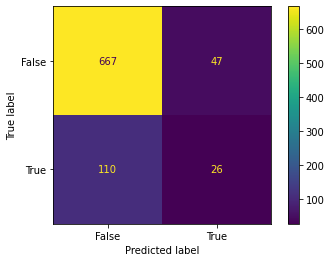

In [ ]:
# https://www.w3schools.com/python/python_ml_confusion_matrix.asp
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = h19_test_raw['cat_bin_actual']
predicted = h19_test_raw['cat_bin_predicted']

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
accuracy = metrics.accuracy_score(actual, predicted)
accuracy

0.8152941176470588

In [ ]:
precision = metrics.precision_score(actual, predicted)
precision

0.3561643835616438

In [ ]:
sensitivity_recall = metrics.recall_score(actual, predicted)
sensitivity_recall

0.19117647058823528

In [ ]:
specificity = metrics.recall_score(actual, predicted, pos_label=0)
specificity

0.9341736694677871

In [ ]:
F1_score = metrics.f1_score(actual, predicted)
F1_score

0.24880382775119617

In [ ]:
#metrics
print({"Accuracy":accuracy,"Precision":precision,
       "Sensitivity_recall":sensitivity_recall,
       "Specificity":specificity,
       "F1_score":F1_score})

{'Accuracy': 0.8152941176470588, 'Precision': 0.3561643835616438, 'Sensitivity_recall': 0.19117647058823528, 'Specificity': 0.9341736694677871, 'F1_score': 0.24880382775119617}


### TEST H2019 INDEZES CONFUSION MATRIX

In [ ]:
# df1 enthält die Topicnummern und ihre Bezeichnungen
df1 =  train_h19_model_topics[['Topic','Name']]
df1

Topic                                               Name
0      -1                       -1_deutschland_immer_spd_afd
1       0                          0_vögel_danke_wünsche_nix
2       1                  1_demokratie_wahl_parteien_partei
3       2                        2_hass_respekt_lügt_meinung
4       3                           3_erster_energie_the_och
5       4                            4_grünen_grüne_grün_rot
6       5                    5_kirchen_kirche_religion_geist
7       6            6_deutschland_deutschen_deutsche_berlin
8       7                     7_muslime_moslems_akbar_allahu
9       8             8_flüchtlinge_migranten_asyl_migration
10      9          9_vergewaltigt_mädchen_jährige_nigerianer
11     10                  10_kinder_schule_volkslehrer_kind
12     11         11_medien_journalisten_journalismus_presse
13     12                  12_tweet_twitter_account_twittern
14     13              13_essen_fressen_frosch_gammelfleisch
15     14        14_polizisten_polizei_abschiebungen_beamten
16     15     15_mitarbeiter_betroffen_mitarbeitern_schließt
17     16                 16_nazis_nazi_braunen_innenstädten
18     17         17_klimawandel_klima_erwärmung_klimaschutz
19     18               18_flüchtlinge_deutschland_euro_jahr
20     19                    19_video_youtube_videos_trailer
21     20                       20_zeiten_immer_schritt_mohr
22     21                  21_syrer_syrische_iraker_jährigen
23     22                   22_strom_autos_auto_elektroautos
24     23                 23_bilder_bild_editorial_paragraph
25     24                    24_bendit_cohn_daniel_spieglein
26     25             25_netz_speichern_speichert_ausgemacht
27     26           26_rassistisch_weiß_rassismus_anzufangen
28     27                       27_euro_kredite_audi_bargeld
29     28                   28_mord_skalpieren_fällt_notwehr
30     29                29_land_landteil_beginnen_vaterland
31     30                 30_clans_kriminelle_hinweis_begeht
32     31          31_italien_salvini_italienische_italiener
33     32              32_islam_deutschland_muslime_deutsche
34     33                 33_rebecca_instagram_endlich_sucht
35     34            34_österreich_europawahl_westen_gewinnt
36     35            35_afrika_herrenrasse_albert_schweitzer
37     36      36_merkel_hinterlässt_geigenkonzert_sauereien
38     37                  37_polizei_berliner_endlich_sucht
39     38                    38_stadt_straße_ückendorf_einst
40     39                39_milliarden_rente_rechnungen_robo
41     40             40_lieber_regierung_fastenbrechen_kern
42     41        41_propaganda_android_anstrengung_empfohlen
43     42                      42_hollywood_obm_kino_görlitz
44     43                          43_teil_satire_lach_humor
45     44                44_türken_türkei_türkischer_arabien
46     45      45_darpa_militärische_alliierten_umfangreiche
47     46             46_berlin_flughafen_amerika_hauptstadt
48     47           47_sundance_justnobody_löschung_bescheid
49     48                        48_fußball_liga_zwölf_sport
50     49  49_sozialismus_marktwirtschaft_soziale_kapital...
51     50                    50_grünen_deutschland_pro_grüne
52     51               51_russland_russische_putin_wladimir
53     52                  52_traum_hals_eigenheim_zugewinne
54     53            53_explosion_einsatz_zerstört_linköping
55     54                  54_schulen_bestimmt_berlin_rechts

In [ ]:
h19_test_pred_values_true_pos['Topic'] = h19_test_pred_values_true_pos.index
h19_test_pred_values_true_pos

pred    percent  Topic
-1      8  30.769231     -1
 9      5  19.230769      9
 5      3  11.538462      5
 7      3  11.538462      7
 26     2   7.692308     26
 18     1   3.846154     18
 16     1   3.846154     16
 28     1   3.846154     28
 49     1   3.846154     49
 8      1   3.846154      8

In [ ]:
# df2 bis df5 enthalten Vorhersagen, Topicanteile in Prozent sowie die Topicnr.
# dabei werden die Spalten umbenannt, damit es später beim Zusammenfügen nicht
# zu Doppelungen kommt
df2 = h19_test_pred_values_true_pos 
df2 = df2.rename(columns={'pred':'predH19TP', 'percent':'%H19TP', 'Topic':'Topic'})

In [ ]:
h19_test_pred_values_false_pos['Topic'] = h19_test_pred_values_false_pos.index
h19_test_pred_values_false_pos

pred    percent  Topic
-1     23  48.936170     -1
 9      6  12.765957      9
 7      4   8.510638      7
 0      3   6.382979      0
 36     2   4.255319     36
 16     2   4.255319     16
 2      1   2.127660      2
 51     1   2.127660     51
 8      1   2.127660      8
 21     1   2.127660     21
 10     1   2.127660     10
 4      1   2.127660      4
 49     1   2.127660     49

In [ ]:
df3 = h19_test_pred_values_false_pos
df3 = df3.rename(columns={'pred':'predH19FP', 'percent':'%H19FP', 'Topic':'Topic'})

In [ ]:
h19_test_pred_values_true_neg['Topic'] = h19_test_pred_values_true_neg.index
h19_test_pred_values_true_neg

pred    percent  Topic
-1    312  46.776612     -1
 0     63   9.445277      0
 3     53   7.946027      3
 1     26   3.898051      1
 8     25   3.748126      8
 9     14   2.098951      9
 18    13   1.949025     18
 12    10   1.499250     12
 16     9   1.349325     16
 10     9   1.349325     10
 6      8   1.199400      6
 39     8   1.199400     39
 11     7   1.049475     11
 51     6   0.899550     51
 17     6   0.899550     17
 15     6   0.899550     15
 7      6   0.899550      7
 49     5   0.749625     49
 13     5   0.749625     13
 4      5   0.749625      4
 36     5   0.749625     36
 2      5   0.749625      2
 23     4   0.599700     23
 25     4   0.599700     25
 21     4   0.599700     21
 38     4   0.599700     38
 28     4   0.599700     28
 24     3   0.449775     24
 44     3   0.449775     44
 14     3   0.449775     14
 22     3   0.449775     22
 29     3   0.449775     29
 27     2   0.299850     27
 26     2   0.299850     26
 32     2   0.299850     32
 37     2   0.299850     37
 33     2   0.299850     33
 50     2   0.299850     50
 35     2   0.299850     35
 31     2   0.299850     31
 34     2   0.299850     34
 5      2   0.299850      5
 19     1   0.149925     19
 46     1   0.149925     46
 30     1   0.149925     30
 43     1   0.149925     43
 54     1   0.149925     54
 20     1   0.149925     20

In [ ]:
df4 = h19_test_pred_values_true_neg
df4 = df4.rename(columns={'pred':'predH19TN', 'percent':'%H19TN', 'Topic':'Topic'})

In [ ]:
h19_test_pred_values_false_neg['Topic'] = h19_test_pred_values_false_neg.index
h19_test_pred_values_false_neg

pred    percent  Topic
-1     66  60.000000     -1
 8      4   3.636364      8
 2      3   2.727273      2
 16     3   2.727273     16
 1      3   2.727273      1
 32     2   1.818182     32
 4      2   1.818182      4
 36     2   1.818182     36
 0      2   1.818182      0
 29     2   1.818182     29
 11     2   1.818182     11
 7      2   1.818182      7
 9      2   1.818182      9
 51     2   1.818182     51
 17     1   0.909091     17
 44     1   0.909091     44
 43     1   0.909091     43
 18     1   0.909091     18
 38     1   0.909091     38
 37     1   0.909091     37
 39     1   0.909091     39
 14     1   0.909091     14
 23     1   0.909091     23
 12     1   0.909091     12
 5      1   0.909091      5
 26     1   0.909091     26
 13     1   0.909091     13

In [ ]:
df5 = h19_test_pred_values_false_neg
df5 = df5.rename(columns={'pred':'predH19FN', 'percent':'%H19FN', 'Topic':'Topic'})

In [ ]:
# https://stackoverflow.com/questions/44327999/how-to-merge-multiple-dataframes
from functools import reduce

data_frames = [df1, df2, df3, df4, df5]
df_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_merged[['%H19TP', '%H19TN','%H19FP', '%H19FN']] = df_merged[['%H19TP', '%H19TN','%H19FP', '%H19FN']].astype(float).round(2)
df_merged
#df_to_round = df_merged[['%H19', '%H19','%H19', '%H20']]
#df_to_round = df_to_round[['%H19', '%H19','%H19', '%H20']].round(2)
#df_to_round

Topic                                               Name predH19TP  \
0      -1                       -1_deutschland_immer_spd_afd       8.0   
1       0                          0_vögel_danke_wünsche_nix         0   
2       1                  1_demokratie_wahl_parteien_partei         0   
3       2                        2_hass_respekt_lügt_meinung         0   
4       3                           3_erster_energie_the_och         0   
5       4                            4_grünen_grüne_grün_rot         0   
6       5                    5_kirchen_kirche_religion_geist       3.0   
7       6            6_deutschland_deutschen_deutsche_berlin         0   
8       7                     7_muslime_moslems_akbar_allahu       3.0   
9       8             8_flüchtlinge_migranten_asyl_migration       1.0   
10      9          9_vergewaltigt_mädchen_jährige_nigerianer       5.0   
11     10                  10_kinder_schule_volkslehrer_kind         0   
12     11         11_medien_journalisten_journalismus_presse         0   
13     12                  12_tweet_twitter_account_twittern         0   
14     13              13_essen_fressen_frosch_gammelfleisch         0   
15     14        14_polizisten_polizei_abschiebungen_beamten         0   
16     15     15_mitarbeiter_betroffen_mitarbeitern_schließt         0   
17     16                 16_nazis_nazi_braunen_innenstädten       1.0   
18     17         17_klimawandel_klima_erwärmung_klimaschutz         0   
19     18               18_flüchtlinge_deutschland_euro_jahr       1.0   
20     19                    19_video_youtube_videos_trailer         0   
21     20                       20_zeiten_immer_schritt_mohr         0   
22     21                  21_syrer_syrische_iraker_jährigen         0   
23     22                   22_strom_autos_auto_elektroautos         0   
24     23                 23_bilder_bild_editorial_paragraph         0   
25     24                    24_bendit_cohn_daniel_spieglein         0   
26     25             25_netz_speichern_speichert_ausgemacht         0   
27     26           26_rassistisch_weiß_rassismus_anzufangen       2.0   
28     27                       27_euro_kredite_audi_bargeld         0   
29     28                   28_mord_skalpieren_fällt_notwehr       1.0   
30     29                29_land_landteil_beginnen_vaterland         0   
31     30                 30_clans_kriminelle_hinweis_begeht         0   
32     31          31_italien_salvini_italienische_italiener         0   
33     32              32_islam_deutschland_muslime_deutsche         0   
34     33                 33_rebecca_instagram_endlich_sucht         0   
35     34            34_österreich_europawahl_westen_gewinnt         0   
36     35            35_afrika_herrenrasse_albert_schweitzer         0   
37     36      36_merkel_hinterlässt_geigenkonzert_sauereien         0   
38     37                  37_polizei_berliner_endlich_sucht         0   
39     38                    38_stadt_straße_ückendorf_einst         0   
40     39                39_milliarden_rente_rechnungen_robo         0   
41     40             40_lieber_regierung_fastenbrechen_kern         0   
42     41        41_propaganda_android_anstrengung_empfohlen         0   
43     42                      42_hollywood_obm_kino_görlitz         0   
44     43                          43_teil_satire_lach_humor         0   
45     44                44_türken_türkei_türkischer_arabien         0   
46     45      45_darpa_militärische_alliierten_umfangreiche         0   
47     46             46_berlin_flughafen_amerika_hauptstadt         0   
48     47           47_sundance_justnobody_löschung_bescheid         0   
49     48                        48_fußball_liga_zwölf_sport         0   
50     49  49_sozialismus_marktwirtschaft_soziale_kapital...       1.0   
51     50                    50_grünen_deutschland_pro_grüne         0   
52     51               51_russland_russische_putin_wladimir         0   
53     5

In [ ]:
df_merged

Topic                                               Name predH19TP  \
0      -1                       -1_deutschland_immer_spd_afd       8.0   
1       0                          0_vögel_danke_wünsche_nix         0   
2       1                  1_demokratie_wahl_parteien_partei         0   
3       2                        2_hass_respekt_lügt_meinung         0   
4       3                           3_erster_energie_the_och         0   
5       4                            4_grünen_grüne_grün_rot         0   
6       5                    5_kirchen_kirche_religion_geist       3.0   
7       6            6_deutschland_deutschen_deutsche_berlin         0   
8       7                     7_muslime_moslems_akbar_allahu       3.0   
9       8             8_flüchtlinge_migranten_asyl_migration       1.0   
10      9          9_vergewaltigt_mädchen_jährige_nigerianer       5.0   
11     10                  10_kinder_schule_volkslehrer_kind         0   
12     11         11_medien_journalisten_journalismus_presse         0   
13     12                  12_tweet_twitter_account_twittern         0   
14     13              13_essen_fressen_frosch_gammelfleisch         0   
15     14        14_polizisten_polizei_abschiebungen_beamten         0   
16     15     15_mitarbeiter_betroffen_mitarbeitern_schließt         0   
17     16                 16_nazis_nazi_braunen_innenstädten       1.0   
18     17         17_klimawandel_klima_erwärmung_klimaschutz         0   
19     18               18_flüchtlinge_deutschland_euro_jahr       1.0   
20     19                    19_video_youtube_videos_trailer         0   
21     20                       20_zeiten_immer_schritt_mohr         0   
22     21                  21_syrer_syrische_iraker_jährigen         0   
23     22                   22_strom_autos_auto_elektroautos         0   
24     23                 23_bilder_bild_editorial_paragraph         0   
25     24                    24_bendit_cohn_daniel_spieglein         0   
26     25             25_netz_speichern_speichert_ausgemacht         0   
27     26           26_rassistisch_weiß_rassismus_anzufangen       2.0   
28     27                       27_euro_kredite_audi_bargeld         0   
29     28                   28_mord_skalpieren_fällt_notwehr       1.0   
30     29                29_land_landteil_beginnen_vaterland         0   
31     30                 30_clans_kriminelle_hinweis_begeht         0   
32     31          31_italien_salvini_italienische_italiener         0   
33     32              32_islam_deutschland_muslime_deutsche         0   
34     33                 33_rebecca_instagram_endlich_sucht         0   
35     34            34_österreich_europawahl_westen_gewinnt         0   
36     35            35_afrika_herrenrasse_albert_schweitzer         0   
37     36      36_merkel_hinterlässt_geigenkonzert_sauereien         0   
38     37                  37_polizei_berliner_endlich_sucht         0   
39     38                    38_stadt_straße_ückendorf_einst         0   
40     39                39_milliarden_rente_rechnungen_robo         0   
41     40             40_lieber_regierung_fastenbrechen_kern         0   
42     41        41_propaganda_android_anstrengung_empfohlen         0   
43     42                      42_hollywood_obm_kino_görlitz         0   
44     43                          43_teil_satire_lach_humor         0   
45     44                44_türken_türkei_türkischer_arabien         0   
46     45      45_darpa_militärische_alliierten_umfangreiche         0   
47     46             46_berlin_flughafen_amerika_hauptstadt         0   
48     47           47_sundance_justnobody_löschung_bescheid         0   
49     48                        48_fußball_liga_zwölf_sport         0   
50     49  49_sozialismus_marktwirtschaft_soziale_kapital...       1.0   
51     50                    50_grünen_deutschland_pro_grüne         0   
52     51               51_russland_russische_putin_wladimir         0   
53     5

In [ ]:
# https://stackoverflow.com/questions/15891038/change-column-type-in-pandas
# Die Anzahlen der vorhergesagten Topics werden in int umgewandelt
df_merged = df_merged.astype({"predH19TP": int, "predH19TN":int, "predH19FP":int, "predH19FN":int})
df_merged

Topic                                               Name  predH19TP  \
0      -1                       -1_deutschland_immer_spd_afd          8   
1       0                          0_vögel_danke_wünsche_nix          0   
2       1                  1_demokratie_wahl_parteien_partei          0   
3       2                        2_hass_respekt_lügt_meinung          0   
4       3                           3_erster_energie_the_och          0   
5       4                            4_grünen_grüne_grün_rot          0   
6       5                    5_kirchen_kirche_religion_geist          3   
7       6            6_deutschland_deutschen_deutsche_berlin          0   
8       7                     7_muslime_moslems_akbar_allahu          3   
9       8             8_flüchtlinge_migranten_asyl_migration          1   
10      9          9_vergewaltigt_mädchen_jährige_nigerianer          5   
11     10                  10_kinder_schule_volkslehrer_kind          0   
12     11         11_medien_journalisten_journalismus_presse          0   
13     12                  12_tweet_twitter_account_twittern          0   
14     13              13_essen_fressen_frosch_gammelfleisch          0   
15     14        14_polizisten_polizei_abschiebungen_beamten          0   
16     15     15_mitarbeiter_betroffen_mitarbeitern_schließt          0   
17     16                 16_nazis_nazi_braunen_innenstädten          1   
18     17         17_klimawandel_klima_erwärmung_klimaschutz          0   
19     18               18_flüchtlinge_deutschland_euro_jahr          1   
20     19                    19_video_youtube_videos_trailer          0   
21     20                       20_zeiten_immer_schritt_mohr          0   
22     21                  21_syrer_syrische_iraker_jährigen          0   
23     22                   22_strom_autos_auto_elektroautos          0   
24     23                 23_bilder_bild_editorial_paragraph          0   
25     24                    24_bendit_cohn_daniel_spieglein          0   
26     25             25_netz_speichern_speichert_ausgemacht          0   
27     26           26_rassistisch_weiß_rassismus_anzufangen          2   
28     27                       27_euro_kredite_audi_bargeld          0   
29     28                   28_mord_skalpieren_fällt_notwehr          1   
30     29                29_land_landteil_beginnen_vaterland          0   
31     30                 30_clans_kriminelle_hinweis_begeht          0   
32     31          31_italien_salvini_italienische_italiener          0   
33     32              32_islam_deutschland_muslime_deutsche          0   
34     33                 33_rebecca_instagram_endlich_sucht          0   
35     34            34_österreich_europawahl_westen_gewinnt          0   
36     35            35_afrika_herrenrasse_albert_schweitzer          0   
37     36      36_merkel_hinterlässt_geigenkonzert_sauereien          0   
38     37                  37_polizei_berliner_endlich_sucht          0   
39     38                    38_stadt_straße_ückendorf_einst          0   
40     39                39_milliarden_rente_rechnungen_robo          0   
41     40             40_lieber_regierung_fastenbrechen_kern          0   
42     41        41_propaganda_android_anstrengung_empfohlen          0   
43     42                      42_hollywood_obm_kino_görlitz          0   
44     43                          43_teil_satire_lach_humor          0   
45     44                44_türken_türkei_türkischer_arabien          0   
46     45      45_darpa_militärische_alliierten_umfangreiche          0   
47     46             46_berlin_flughafen_amerika_hauptstadt          0   
48     47           47_sundance_justnobody_löschung_bescheid          0   
49     48                        48_fußball_liga_zwölf_sport          0   
50     49  49_sozialismus_marktwirtschaft_soziale_kapital...          1   
51     50                    50_grünen_deutschland_pro_grüne          0   
52     51               51_ru

In [ ]:
df_percent = df_merged[['Topic','%H19TP', '%H19TN','%H19FP', '%H19FN','Name']]
df_percent

Topic  %H19TP  %H19TN  %H19FP  %H19FN  \
0      -1   30.77   46.78   48.94   60.00   
1       0    0.00    9.45    6.38    1.82   
2       1    0.00    3.90    0.00    2.73   
3       2    0.00    0.75    2.13    2.73   
4       3    0.00    7.95    0.00    0.00   
5       4    0.00    0.75    2.13    1.82   
6       5   11.54    0.30    0.00    0.91   
7       6    0.00    1.20    0.00    0.00   
8       7   11.54    0.90    8.51    1.82   
9       8    3.85    3.75    2.13    3.64   
10      9   19.23    2.10   12.77    1.82   
11     10    0.00    1.35    2.13    0.00   
12     11    0.00    1.05    0.00    1.82   
13     12    0.00    1.50    0.00    0.91   
14     13    0.00    0.75    0.00    0.91   
15     14    0.00    0.45    0.00    0.91   
16     15    0.00    0.90    0.00    0.00   
17     16    3.85    1.35    4.26    2.73   
18     17    0.00    0.90    0.00    0.91   
19     18    3.85    1.95    0.00    0.91   
20     19    0.00    0.15    0.00    0.00   
21     20    0.00    0.15    0.00    0.00   
22     21    0.00    0.60    2.13    0.00   
23     22    0.00    0.45    0.00    0.00   
24     23    0.00    0.60    0.00    0.91   
25     24    0.00    0.45    0.00    0.00   
26     25    0.00    0.60    0.00    0.00   
27     26    7.69    0.30    0.00    0.91   
28     27    0.00    0.30    0.00    0.00   
29     28    3.85    0.60    0.00    0.00   
30     29    0.00    0.45    0.00    1.82   
31     30    0.00    0.15    0.00    0.00   
32     31    0.00    0.30    0.00    0.00   
33     32    0.00    0.30    0.00    1.82   
34     33    0.00    0.30    0.00    0.00   
35     34    0.00    0.30    0.00    0.00   
36     35    0.00    0.30    0.00    0.00   
37     36    0.00    0.75    4.26    1.82   
38     37    0.00    0.30    0.00    0.91   
39     38    0.00    0.60    0.00    0.91   
40     39    0.00    1.20    0.00    0.91   
41     40    0.00    0.00    0.00    0.00   
42     41    0.00    0.00    0.00    0.00   
43     42    0.00    0.00    0.00    0.00   
44     43    0.00    0.15    0.00    0.91   
45     44    0.00    0.45    0.00    0.91   
46     45    0.00    0.00    0.00    0.00   
47     46    0.00    0.15    0.00    0.00   
48     47    0.00    0.00    0.00    0.00   
49     48    0.00    0.00    0.00    0.00   
50     49    3.85    0.75    2.13    0.00   
51     50    0.00    0.30    0.00    0.00   
52     51    0.00    0.90    2.13    1.82   
53     52    0.00    0.00    0.00    0.00   
54     53    0.00    0.00    0.00    0.00   
55     54    0.00    0.15    0.00    0.00   

                                                 Name  
0                        -1_deutschland_immer_spd_afd  
1                           0_vögel_danke_wünsche_nix  
2                   1_demokratie_wahl_parteien_partei  
3                         2_hass_respekt_lügt_meinung  
4                            3_erster_energie_the_och  
5                             4_grünen_grüne_grün_rot  
6                     5_kirchen_kirche_religion_geist  
7             6_deutschland_deutschen_deutsche_berlin  
8                      7_muslime_moslems_akbar_allahu  
9              8_flüchtlinge_migranten_asyl_migration  
10          9_vergewaltigt_mädchen_jährige_nigerianer  
11                  10_kinder_schule_volkslehrer_kind  
12         11_medien_journalisten_journalismus_presse  
13                  12_tweet_twitter_account_twittern  
14              13_essen_fressen_frosch_gammelfleisch  
15        14_polizisten_polizei_abschiebungen_beamten  
16     15_mitarbeiter_betroffen_mitarbeitern_schließt  
17                 16_nazis_nazi_braunen_innenstädten  
18         17_klimawandel_klima_erwärmung_klimaschutz  
19               18_flüchtlinge_deutschland_euro_jahr  
20                    19_video_youtube_videos_trailer  
21                       20_zeiten_immer_schritt_mohr  
22                  21_syrer_syrische_iraker_jährigen  
23                   22_strom_autos_auto_elektroautos  
24                 23_bilder_bild_edit

In [ ]:
test_h19_df_percent_plt_CONF_MATRIX = df_percent.set_index('Name')

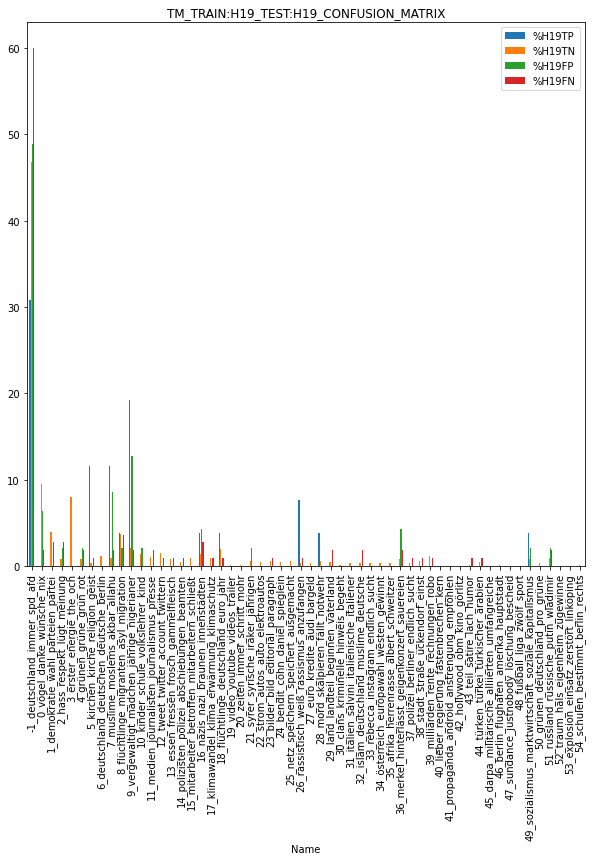

In [ ]:
test_h19_df_percent_plt_CONF_MATRIX.plot(y=['%H19TP', '%H19TN','%H19FP', '%H19FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:H19_TEST:H19_CONFUSION_MATRIX")

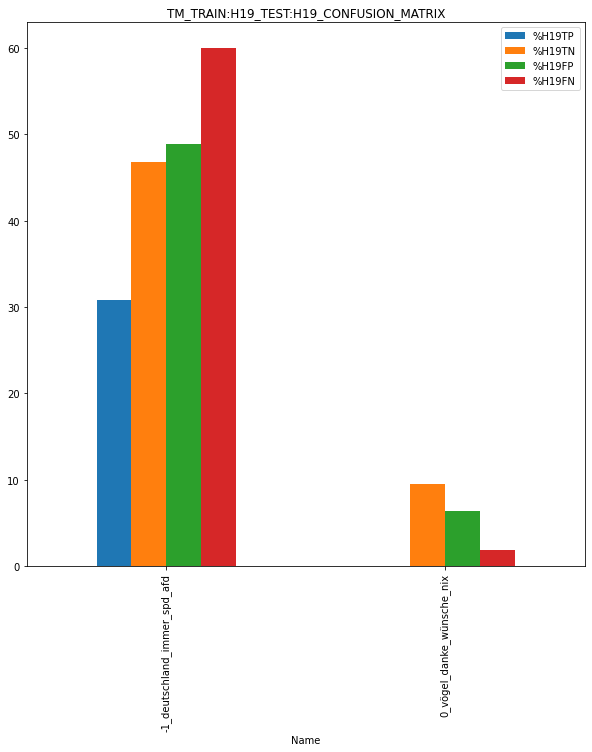

In [ ]:
test_h19_df_percent_plt_CONF_MATRIX[0:2].plot(y=['%H19TP', '%H19TN','%H19FP', '%H19FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:H19_TEST:H19_CONFUSION_MATRIX")

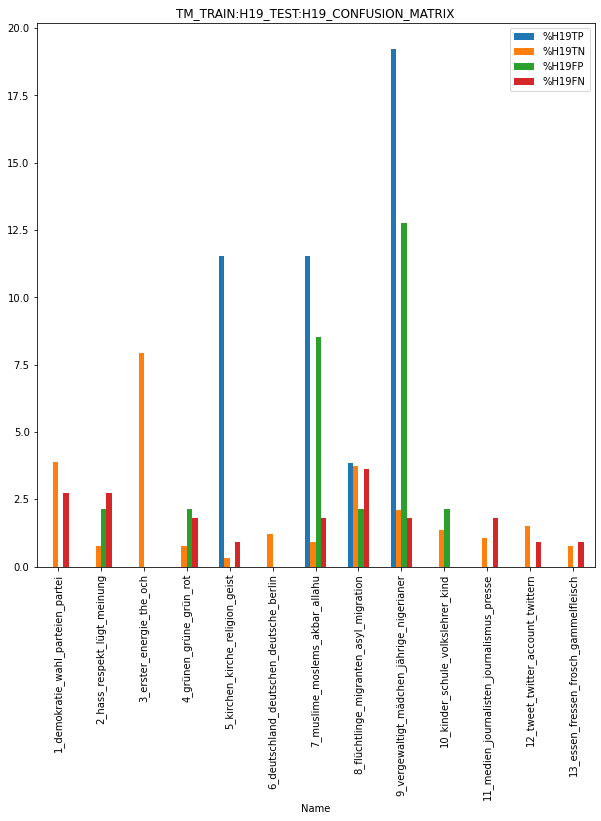

In [ ]:
test_h19_df_percent_plt_CONF_MATRIX[2:15].plot(y=['%H19TP', '%H19TN','%H19FP', '%H19FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:H19_TEST:H19_CONFUSION_MATRIX")

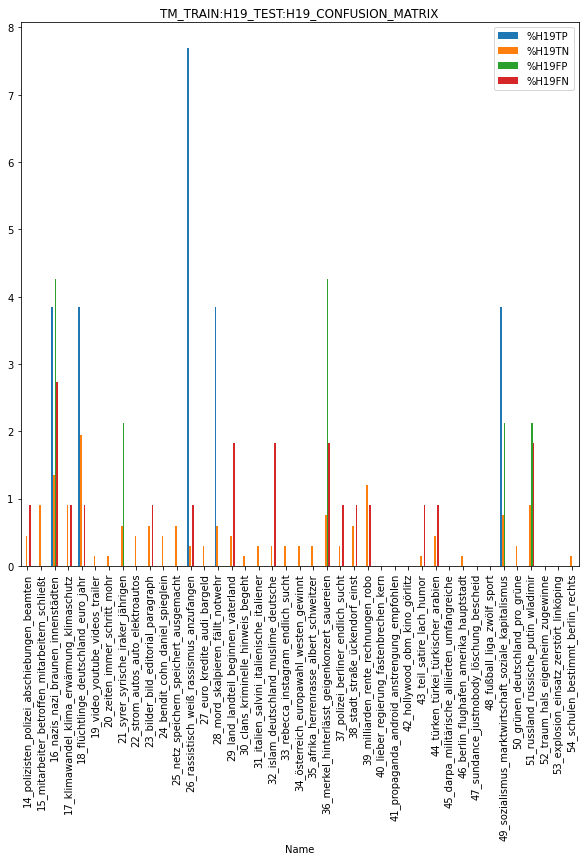

In [ ]:
test_h19_df_percent_plt_CONF_MATRIX[15:].plot(y=['%H19TP', '%H19TN','%H19FP', '%H19FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:H19_TEST:H19_CONFUSION_MATRIX")

### Test H2020

In [ ]:
train_h19_class_h20 = pd.read_csv('/content/submission_DE_A_HASOCOne_german_task_a_HASOC2019_HASOC2020.csv')
train_h19_class_h20

text_id task1  index_col
0          0   NOT          0
1          1   NOT          1
2          2   NOT          2
3          3   NOT          3
4          4   NOT          4
..       ...   ...        ...
521      521   NOT        521
522      522   NOT        522
523      523   NOT        523
524      524   NOT        524
525      525   NOT        525

[526 rows x 3 columns]

In [ ]:
h20_test_class_values = pd.DataFrame(train_h19_class_h20['task1'].value_counts())
h20_test_class_values

task1
NOT    490
HOF     36

In [ ]:

h20_test_raw['class'] = train_h19_class_h20['task1']
h20_test_raw

Unnamed: 0             tweet_id  \
0             0  1129095874242650112   
1             1  1129004308396236800   
2             2  1130896929355907080   
3             3  1132251534329307136   
4             4  1124941869115498496   
..          ...                  ...   
521         521  1124809878546128897   
522         522  1132433240000798720   
523         523  1127366294255357958   
524         524  1124362090460975105   
525         525  1131487097293103104   

                                                  text task1 task2  \
0      @derCarsti Boykottieren hört sich besser an. 💙💙   NOT  NONE   
1    RT @ibikus31: Es wird spekuliert, ob Merkel ei...   NOT  NONE   
2    Hat #Hitler wirklich den Krieg in der Wüste ve...   NOT  NONE   
3    RT @Beatrix_vStorch: #May tritt in UK unter Tr...   NOT  NONE   
4    @justmeDoro Eher nicht. Das Gänse hauen wieder...   NOT  NONE   
..                                                 ...   ...   ...   
521  RT @ChanMachtSo: SCHMERZEN!!!! Au!!! Mein Gehi...   NOT  NONE   
522  Die Zerstörung der Grünen. https://t.co/SIYDJj...   NOT  NONE   
523  RT @PParzival: "Antideutsche" Pseudo-linke Ide...   NOT  NONE   
524                         Klug reden und dumm leben.   NOT  NONE   
525  Wissen wir schon lange....hat das die Merkel e...   NOT  NONE   

                     ID  pred class  
0    hasoc_2020_de_1053    -1   NOT  
1     hasoc_2020_de_671    36   NOT  
2    hasoc_2020_de_2977    -1   NOT  
3    hasoc_2020_de_1746    -1   NOT  
4    hasoc_2020_de_2416     0   NOT  
..                  ...   ...   ...  
521   hasoc_2020_de_486    -1   NOT  
522  hasoc_2020_de_3388     4   NOT  
523  hasoc_2020_de_2745    -1   NOT  
524   hasoc_2020_de_236     2   NOT  
525  hasoc_2020_de_2850     4   NOT  

[526 rows x 8 columns]

In [ ]:
# https://stackoverflow.com/questions/41691081/pandas-use-and-operator-in-loc-function
h20_test_true_pos = h20_test_raw.loc[(h20_test_raw['task1'] == 'HOF') & (h20_test_raw['class'] == 'HOF')]
h20_test_true_pos

Unnamed: 0             tweet_id  \
6             6  1123981478361219073   
25           25  1131517942175289344   
33           33  1126172771518746624   
38           38  1129511752058769413   
68           68  1128601390950039552   
70           70  1129704555820847106   
121         121  1131308545767612416   
173         173  1132608008243109888   
176         176  1131110721427787776   
205         205  1133652473841893376   
320         320  1134357066578092032   
325         325  1126198717453930504   
356         356  1129674289739894784   
361         361  1127882030077890561   
380         380  1126743486235963392   
391         391  1123482431691079680   
392         392  1129359985358643201   
427         427  1123529336592707584   
441         441  1133427633964949510   

                                                  text task1 task2  \
6    @yooli_derechte @MontanaBlack Mich wundert es ...   HOF  OFFN   
25   RT @Symon634: Ich ficke deine enkeltochter du ...   HOF  PRFN   
33   @ChrisEpunkt Erste ist doh net schlimm und 2. ...   HOF  PRFN   
38   RT @dwntwnbeats: habt ihr auch so ein hurensoh...   HOF  PRFN   
68   RT @lassmichbitteee: ich hasse meine eltern oh...   HOF  OFFN   
70   @Quasseltier @CyberRamona ihr dummen huensöhne...   HOF  PRFN   
121  Noch nie geliebt worden, einfach dumme frauen ...   HOF  PRFN   
173  Ist ja schlimm heute hier! \nAndersdenkende si...   HOF  HATE   
176  RT @yasinaygan: @TDoernb @alican_2023 @ProvoMe...   HOF  OFFN   
205  @bineuerboss @fivethrsix der ist unlustig und ...   HOF  OFFN   
320  RT @MissBabaBelle: So gestört. Im #SAT1 Frühst...   HOF  OFFN   
325  warum gibt's den scheiß schaumstoff auch nur i...   HOF  PRFN   
356  @eusouvizzy Digga ich liebe einfach ihren arsc...   HOF  PRFN   
361  @DPolGThueringen Linke und Grüne leben halt in...   HOF  OFFN   
380  RT @den_tyske: Diese Video ist nicht geeignet ...   HOF  HATE   
391  @NeoXynx @GittiB2 Die ist dumm wie Bohnenstroh...   HOF  OFFN   
392  RT @KayRytter: @COMPACTMagazin Merkel hat sich...   HOF  OFFN   
427  vllt such ich mir einfach einen kackjob den ic...   HOF  PRFN   
441  RT @Kim53688025: Ich liebe es mich geil zu Fin...   HOF  PRFN   

                     ID  pred class  
6    hasoc_2020_de_2938    -1   HOF  
25   hasoc_2020_de_2382    -1   HOF  
33   hasoc_2020_de_2301    -1   HOF  
38   hasoc_2020_de_1507     0   HOF  
68    hasoc_2020_de_416    -1   HOF  
70    hasoc_2020_de_844    -1   HOF  
121   hasoc_2020_de_122    -1   HOF  
173  hasoc_2020_de_1932     2   HOF  
176   hasoc_2020_de_811    -1   HOF  
205  hasoc_2020_de_1473    -1   HOF  
320  hasoc_2020_de_1935    -1   HOF  
325  hasoc_2020_de_3066     0   HOF  
356  hasoc_2020_de_1541     0   HOF  
361   hasoc_2020_de_496     4   HOF  
380  hasoc_2020_de_1342     8   HOF  
391  hasoc_2020_de_1408    -1   HOF  
392   hasoc_2020_de_245     9   HOF  
427  hasoc_2020_de_1346     2   HOF  
441  hasoc_2020_de_1168     0   HOF

In [ ]:
h20_test_pred_values_true_pos = pd.DataFrame(h20_test_true_pos['pred'].value_counts())
h20_test_pred_values_true_pos['percent'] = (h20_test_pred_values_true_pos['pred'] / h20_test_pred_values_true_pos['pred'].sum()) * 100
h20_test_pred_values_true_pos

pred    percent
-1    10  52.631579
 0     4  21.052632
 2     2  10.526316
 4     1   5.263158
 8     1   5.263158
 9     1   5.263158

In [ ]:
h20_test_false_pos = h20_test_raw.loc[(h20_test_raw['task1'] == 'NOT') & (h20_test_raw['class'] == 'HOF')]
h20_test_false_pos

Unnamed: 0             tweet_id  \
30           30  1134460200289783810   
44           44  1123961328907976711   
52           52  1134350036920406017   
79           79  1128883487283527680   
169         169  1127203941123596289   
171         171  1129441363236409345   
292         292  1133412328957984768   
318         318  1134164942268108801   
366         366  1127309721508220929   
373         373  1124305492510220288   
374         374  1125703122687614979   
390         390  1128599750998204416   
399         399  1129602969773760512   
467         467  1131186160141836288   
470         470  1132577503074312192   
484         484  1125029332949315584   
518         518  1128653081556787205   

                                                  text task1 task2  \
30   @reg_nerd @tj_tweets @rezomusik Erinnerungen a...   NOT  NONE   
44   @robdoubleyoo @mialleixa34 Idiot! Hitler was v...   NOT  NONE   
52   RT @olivia_frey55: @MalteKaufmann Maltchen, ih...   NOT  NONE   
79   RT @Fern_Schreiber: "In meiner Klasse warn hal...   NOT  NONE   
169  RT @outofvalhalla: An all die "Linken" da drau...   NOT  NONE   
171  wie fancy sich deutsche immer vorkommen, wenn ...   NOT  NONE   
292  @OlafundSabrina @VonSchwer Zum kotzen; das ist...   NOT  NONE   
318  RT @ZDF: Seenotrettung im Mittelmeer: Die deut...   NOT  NONE   
366  @blubeIIa das geile is halt du kannst die sche...   NOT  NONE   
373  RT @SabineOsman: Ein Sozialdemokrat äußert soz...   NOT  NONE   
374  @esraschelt ich hab da immer instant so nazi u...   NOT  NONE   
390  RT @primamuslima: "im Fall eines sogenannten „...   NOT  NONE   
399  RT @Imageberatungen: Was für totale Idioten we...   NOT  NONE   
467  RT @CaptBLWillard: @quergedachtblog @DasSchafi...   NOT  NONE   
470  @TomK19941417 @paulvernica @HeikoMaas Dafür ke...   NOT  NONE   
484  RT @AndreasAndy3131: DIE LINKE. Sachsen begrüß...   NOT  NONE   
518           Vegetarisch essen um die Nazis zu ärgern   NOT  NONE   

                     ID  pred class  
30    hasoc_2020_de_703    36   HOF  
44    hasoc_2020_de_687    16   HOF  
52    hasoc_2020_de_617    36   HOF  
79   hasoc_2020_de_2021     1   HOF  
169  hasoc_2020_de_1388    16   HOF  
171  hasoc_2020_de_3012    -1   HOF  
292  hasoc_2020_de_1311    -1   HOF  
318  hasoc_2020_de_1597    -1   HOF  
366   hasoc_2020_de_405     0   HOF  
373  hasoc_2020_de_2997    16   HOF  
374  hasoc_2020_de_1153    16   HOF  
390  hasoc_2020_de_1625     7   HOF  
399   hasoc_2020_de_864    -1   HOF  
467  hasoc_2020_de_1726    16   HOF  
470  hasoc_2020_de_3333    16   HOF  
484  hasoc_2020_de_2723    -1   HOF  
518  hasoc_2020_de_1179    16   HOF

In [ ]:
h20_test_pred_values_false_pos = pd.DataFrame(h20_test_false_pos['pred'].value_counts())
h20_test_pred_values_false_pos['percent'] = (h20_test_pred_values_false_pos['pred'] / h20_test_pred_values_false_pos['pred'].sum()) * 100
h20_test_pred_values_false_pos

pred    percent
 16     7  41.176471
-1      5  29.411765
 36     2  11.764706
 1      1   5.882353
 0      1   5.882353
 7      1   5.882353

In [ ]:
h20_test_true_neg = h20_test_raw.loc[(h20_test_raw['task1'] == 'NOT') & (h20_test_raw['class'] == 'NOT')]
h20_test_true_neg

Unnamed: 0             tweet_id  \
0             0  1129095874242650112   
1             1  1129004308396236800   
2             2  1130896929355907080   
3             3  1132251534329307136   
4             4  1124941869115498496   
..          ...                  ...   
521         521  1124809878546128897   
522         522  1132433240000798720   
523         523  1127366294255357958   
524         524  1124362090460975105   
525         525  1131487097293103104   

                                                  text task1 task2  \
0      @derCarsti Boykottieren hört sich besser an. 💙💙   NOT  NONE   
1    RT @ibikus31: Es wird spekuliert, ob Merkel ei...   NOT  NONE   
2    Hat #Hitler wirklich den Krieg in der Wüste ve...   NOT  NONE   
3    RT @Beatrix_vStorch: #May tritt in UK unter Tr...   NOT  NONE   
4    @justmeDoro Eher nicht. Das Gänse hauen wieder...   NOT  NONE   
..                                                 ...   ...   ...   
521  RT @ChanMachtSo: SCHMERZEN!!!! Au!!! Mein Gehi...   NOT  NONE   
522  Die Zerstörung der Grünen. https://t.co/SIYDJj...   NOT  NONE   
523  RT @PParzival: "Antideutsche" Pseudo-linke Ide...   NOT  NONE   
524                         Klug reden und dumm leben.   NOT  NONE   
525  Wissen wir schon lange....hat das die Merkel e...   NOT  NONE   

                     ID  pred class  
0    hasoc_2020_de_1053    -1   NOT  
1     hasoc_2020_de_671    36   NOT  
2    hasoc_2020_de_2977    -1   NOT  
3    hasoc_2020_de_1746    -1   NOT  
4    hasoc_2020_de_2416     0   NOT  
..                  ...   ...   ...  
521   hasoc_2020_de_486    -1   NOT  
522  hasoc_2020_de_3388     4   NOT  
523  hasoc_2020_de_2745    -1   NOT  
524   hasoc_2020_de_236     2   NOT  
525  hasoc_2020_de_2850     4   NOT  

[348 rows x 8 columns]

In [ ]:
h20_test_pred_values_true_neg = pd.DataFrame(h20_test_true_neg['pred'].value_counts())
h20_test_pred_values_true_neg['percent'] = (h20_test_pred_values_true_neg['pred'] / h20_test_pred_values_true_neg['pred'].sum()) * 100
h20_test_pred_values_true_neg

pred    percent
-1    175  50.287356
 0     58  16.666667
 4     26   7.471264
 36    11   3.160920
 16    10   2.873563
 6      8   2.298851
 2      8   2.298851
 3      7   2.011494
 1      6   1.724138
 10     4   1.149425
 44     4   1.149425
 39     3   0.862069
 7      3   0.862069
 32     2   0.574713
 43     2   0.574713
 42     2   0.574713
 9      2   0.574713
 13     2   0.574713
 23     1   0.287356
 28     1   0.287356
 22     1   0.287356
 15     1   0.287356
 5      1   0.287356
 8      1   0.287356
 18     1   0.287356
 24     1   0.287356
 47     1   0.287356
 25     1   0.287356
 34     1   0.287356
 50     1   0.287356
 26     1   0.287356
 27     1   0.287356
 20     1   0.287356

In [ ]:
h20_test_false_neg = h20_test_raw.loc[(h20_test_raw['task1'] == 'HOF') & (h20_test_raw['class'] == 'NOT')]
h20_test_false_neg

Unnamed: 0             tweet_id  \
5             5  1129712298531184641   
17           17  1126089577486323712   
21           21  1134130242786926592   
22           22  1134444350027509766   
24           24  1124210944534614016   
..          ...                  ...   
500         500  1128321203075256320   
508         508  1129379774076473344   
511         511  1130096161212252162   
512         512  1124842568972288000   
517         517  1124379312264708101   

                                                  text task1 task2  \
5    RT @VonSchwer: Ein guter Patriot geht von Bord...   HOF  OFFN   
17   RT @CWBWElias: @TheresaGesperrt Wollte meine N...   HOF  PRFN   
21   @sgepeeti Verdursten ist aber auch ein scheiß ...   HOF  PRFN   
22                 Scheiß. Hurensohn gam @FortniteGame   HOF  PRFN   
24   @HyperBushido fr ich streu den scheiß überall ...   HOF  PRFN   
..                                                 ...   ...   ...   
500                         @VizzionsXI halt dein maul   HOF  OFFN   
508                       Halt die fresse du hurensohn   HOF  PRFN   
511         @noelmgb_ @Sebbe2704 Richtiger Hurensohn 😂   HOF  PRFN   
512  Der Bass ist tief, die Atmosphäre sehr entspan...   HOF  PRFN   
517  RT @theunwantedpath: HABT IHR DEN ARSCH OFFEN ...   HOF  PRFN   

                     ID  pred class  
5    hasoc_2020_de_1112    -1   NOT  
17   hasoc_2020_de_2545    -1   NOT  
21   hasoc_2020_de_1235    -1   NOT  
22   hasoc_2020_de_2487     0   NOT  
24   hasoc_2020_de_1691    -1   NOT  
..                  ...   ...   ...  
500  hasoc_2020_de_1958    -1   NOT  
508  hasoc_2020_de_2465     0   NOT  
511   hasoc_2020_de_958     0   NOT  
512  hasoc_2020_de_2470     0   NOT  
517   hasoc_2020_de_986    -1   NOT  

[142 rows x 8 columns]

In [ ]:
h20_test_pred_values_false_neg = pd.DataFrame(h20_test_false_neg['pred'].value_counts())
h20_test_pred_values_false_neg['percent'] = (h20_test_pred_values_false_neg['pred'] / h20_test_pred_values_false_neg['pred'].sum()) * 100
h20_test_pred_values_false_neg

pred    percent
-1     81  57.042254
 0     21  14.788732
 4      6   4.225352
 13     6   4.225352
 2      3   2.112676
 38     3   2.112676
 1      3   2.112676
 24     2   1.408451
 6      2   1.408451
 9      2   1.408451
 16     2   1.408451
 7      2   1.408451
 36     1   0.704225
 3      1   0.704225
 8      1   0.704225
 10     1   0.704225
 51     1   0.704225
 11     1   0.704225
 12     1   0.704225
 23     1   0.704225
 44     1   0.704225

In [ ]:
h20_test_raw['cat_bin_actual'] = h20_test_raw['task1'].map({'HOF': 1, 'NOT': 0}).astype(int)
h20_test_raw['cat_bin_predicted'] = h20_test_raw['class'].map({'HOF': 1, 'NOT': 0}).astype(int)


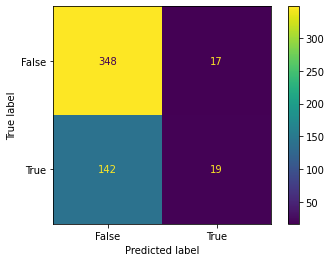

In [ ]:
# https://www.w3schools.com/python/python_ml_confusion_matrix.asp
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = h20_test_raw['cat_bin_actual']
predicted = h20_test_raw['cat_bin_predicted']

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
accuracy = metrics.accuracy_score(actual, predicted)
accuracy

0.6977186311787072

In [ ]:
precision = metrics.precision_score(actual, predicted)
precision

0.5277777777777778

In [ ]:
sensitivity_recall = metrics.recall_score(actual, predicted)
sensitivity_recall

0.11801242236024845

In [ ]:
specificity = metrics.recall_score(actual, predicted, pos_label=0)
specificity

0.9534246575342465

In [ ]:
F1_score = metrics.f1_score(actual, predicted)
F1_score

0.19289340101522845

In [ ]:
#metrics
print({"Accuracy":accuracy,"Precision":precision,
       "Sensitivity_recall":sensitivity_recall,
       "Specificity":specificity,
       "F1_score":F1_score})

{'Accuracy': 0.6977186311787072, 'Precision': 0.5277777777777778, 'Sensitivity_recall': 0.11801242236024845, 'Specificity': 0.9534246575342465, 'F1_score': 0.19289340101522845}


### TEST H2020 INDEZES CONFUSION MATRIX

In [ ]:
# df1 enthält die Topicnummern und ihre Bezeichnungen
df1 =  train_h19_model_topics[['Topic','Name']]
df1

Topic                                               Name
0      -1                       -1_deutschland_immer_spd_afd
1       0                          0_vögel_danke_wünsche_nix
2       1                  1_demokratie_wahl_parteien_partei
3       2                        2_hass_respekt_lügt_meinung
4       3                           3_erster_energie_the_och
5       4                            4_grünen_grüne_grün_rot
6       5                    5_kirchen_kirche_religion_geist
7       6            6_deutschland_deutschen_deutsche_berlin
8       7                     7_muslime_moslems_akbar_allahu
9       8             8_flüchtlinge_migranten_asyl_migration
10      9          9_vergewaltigt_mädchen_jährige_nigerianer
11     10                  10_kinder_schule_volkslehrer_kind
12     11         11_medien_journalisten_journalismus_presse
13     12                  12_tweet_twitter_account_twittern
14     13              13_essen_fressen_frosch_gammelfleisch
15     14        14_polizisten_polizei_abschiebungen_beamten
16     15     15_mitarbeiter_betroffen_mitarbeitern_schließt
17     16                 16_nazis_nazi_braunen_innenstädten
18     17         17_klimawandel_klima_erwärmung_klimaschutz
19     18               18_flüchtlinge_deutschland_euro_jahr
20     19                    19_video_youtube_videos_trailer
21     20                       20_zeiten_immer_schritt_mohr
22     21                  21_syrer_syrische_iraker_jährigen
23     22                   22_strom_autos_auto_elektroautos
24     23                 23_bilder_bild_editorial_paragraph
25     24                    24_bendit_cohn_daniel_spieglein
26     25             25_netz_speichern_speichert_ausgemacht
27     26           26_rassistisch_weiß_rassismus_anzufangen
28     27                       27_euro_kredite_audi_bargeld
29     28                   28_mord_skalpieren_fällt_notwehr
30     29                29_land_landteil_beginnen_vaterland
31     30                 30_clans_kriminelle_hinweis_begeht
32     31          31_italien_salvini_italienische_italiener
33     32              32_islam_deutschland_muslime_deutsche
34     33                 33_rebecca_instagram_endlich_sucht
35     34            34_österreich_europawahl_westen_gewinnt
36     35            35_afrika_herrenrasse_albert_schweitzer
37     36      36_merkel_hinterlässt_geigenkonzert_sauereien
38     37                  37_polizei_berliner_endlich_sucht
39     38                    38_stadt_straße_ückendorf_einst
40     39                39_milliarden_rente_rechnungen_robo
41     40             40_lieber_regierung_fastenbrechen_kern
42     41        41_propaganda_android_anstrengung_empfohlen
43     42                      42_hollywood_obm_kino_görlitz
44     43                          43_teil_satire_lach_humor
45     44                44_türken_türkei_türkischer_arabien
46     45      45_darpa_militärische_alliierten_umfangreiche
47     46             46_berlin_flughafen_amerika_hauptstadt
48     47           47_sundance_justnobody_löschung_bescheid
49     48                        48_fußball_liga_zwölf_sport
50     49  49_sozialismus_marktwirtschaft_soziale_kapital...
51     50                    50_grünen_deutschland_pro_grüne
52     51               51_russland_russische_putin_wladimir
53     52                  52_traum_hals_eigenheim_zugewinne
54     53            53_explosion_einsatz_zerstört_linköping
55     54                  54_schulen_bestimmt_berlin_rechts

In [ ]:
h20_test_pred_values_true_pos['Topic'] = h20_test_pred_values_true_pos.index
h20_test_pred_values_true_pos

pred    percent  Topic
-1    10  52.631579     -1
 0     4  21.052632      0
 2     2  10.526316      2
 4     1   5.263158      4
 8     1   5.263158      8
 9     1   5.263158      9

In [ ]:
# df2 bis df5 enthalten Vorhersagen, Topicanteile in Prozent sowie die Topicnr.
# dabei werden die Spalten umbenannt, damit es später beim Zusammenfügen nicht
# zu Doppelungen kommt
df2 = h20_test_pred_values_true_pos 
df2 = df2.rename(columns={'pred':'predH20TP', 'percent':'%H20TP', 'Topic':'Topic'})

In [ ]:
h20_test_pred_values_false_pos['Topic'] = h20_test_pred_values_false_pos.index
h20_test_pred_values_false_pos

pred    percent  Topic
 16     7  41.176471     16
-1      5  29.411765     -1
 36     2  11.764706     36
 1      1   5.882353      1
 0      1   5.882353      0
 7      1   5.882353      7

In [ ]:
df3 = h20_test_pred_values_false_pos
df3 = df3.rename(columns={'pred':'predH20FP', 'percent':'%H20FP', 'Topic':'Topic'})

In [ ]:
h20_test_pred_values_true_neg['Topic'] = h20_test_pred_values_true_neg.index
h20_test_pred_values_true_neg

pred    percent  Topic
-1    175  50.287356     -1
 0     58  16.666667      0
 4     26   7.471264      4
 36    11   3.160920     36
 16    10   2.873563     16
 6      8   2.298851      6
 2      8   2.298851      2
 3      7   2.011494      3
 1      6   1.724138      1
 10     4   1.149425     10
 44     4   1.149425     44
 39     3   0.862069     39
 7      3   0.862069      7
 32     2   0.574713     32
 43     2   0.574713     43
 42     2   0.574713     42
 9      2   0.574713      9
 13     2   0.574713     13
 23     1   0.287356     23
 28     1   0.287356     28
 22     1   0.287356     22
 15     1   0.287356     15
 5      1   0.287356      5
 8      1   0.287356      8
 18     1   0.287356     18
 24     1   0.287356     24
 47     1   0.287356     47
 25     1   0.287356     25
 34     1   0.287356     34
 50     1   0.287356     50
 26     1   0.287356     26
 27     1   0.287356     27
 20     1   0.287356     20

In [ ]:
df4 = h20_test_pred_values_true_neg
df4 = df4.rename(columns={'pred':'predH20TN', 'percent':'%H20TN', 'Topic':'Topic'})

In [ ]:
h20_test_pred_values_false_neg['Topic'] = h20_test_pred_values_false_neg.index
h20_test_pred_values_false_neg

pred    percent  Topic
-1     81  57.042254     -1
 0     21  14.788732      0
 4      6   4.225352      4
 13     6   4.225352     13
 2      3   2.112676      2
 38     3   2.112676     38
 1      3   2.112676      1
 24     2   1.408451     24
 6      2   1.408451      6
 9      2   1.408451      9
 16     2   1.408451     16
 7      2   1.408451      7
 36     1   0.704225     36
 3      1   0.704225      3
 8      1   0.704225      8
 10     1   0.704225     10
 51     1   0.704225     51
 11     1   0.704225     11
 12     1   0.704225     12
 23     1   0.704225     23
 44     1   0.704225     44

In [ ]:
df5 = h20_test_pred_values_false_neg
df5 = df5.rename(columns={'pred':'predH20FN', 'percent':'%H20FN', 'Topic':'Topic'})

In [ ]:
# https://stackoverflow.com/questions/44327999/how-to-merge-multiple-dataframes
from functools import reduce

data_frames = [df1, df2, df3, df4, df5]
df_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_merged[['%H20TP', '%H20TN','%H20FP', '%H20FN']] = df_merged[['%H20TP', '%H20TN','%H20FP', '%H20FN']].astype(float).round(2)
df_merged
#df_to_round = df_merged[['%H20', '%H20','%H20', '%H20']]
#df_to_round = df_to_round[['%H20', '%H20','%H20', '%H20']].round(2)
#df_to_round

Topic                                               Name predH20TP  \
0      -1                       -1_deutschland_immer_spd_afd      10.0   
1       0                          0_vögel_danke_wünsche_nix       4.0   
2       1                  1_demokratie_wahl_parteien_partei         0   
3       2                        2_hass_respekt_lügt_meinung       2.0   
4       3                           3_erster_energie_the_och         0   
5       4                            4_grünen_grüne_grün_rot       1.0   
6       5                    5_kirchen_kirche_religion_geist         0   
7       6            6_deutschland_deutschen_deutsche_berlin         0   
8       7                     7_muslime_moslems_akbar_allahu         0   
9       8             8_flüchtlinge_migranten_asyl_migration       1.0   
10      9          9_vergewaltigt_mädchen_jährige_nigerianer       1.0   
11     10                  10_kinder_schule_volkslehrer_kind         0   
12     11         11_medien_journalisten_journalismus_presse         0   
13     12                  12_tweet_twitter_account_twittern         0   
14     13              13_essen_fressen_frosch_gammelfleisch         0   
15     14        14_polizisten_polizei_abschiebungen_beamten         0   
16     15     15_mitarbeiter_betroffen_mitarbeitern_schließt         0   
17     16                 16_nazis_nazi_braunen_innenstädten         0   
18     17         17_klimawandel_klima_erwärmung_klimaschutz         0   
19     18               18_flüchtlinge_deutschland_euro_jahr         0   
20     19                    19_video_youtube_videos_trailer         0   
21     20                       20_zeiten_immer_schritt_mohr         0   
22     21                  21_syrer_syrische_iraker_jährigen         0   
23     22                   22_strom_autos_auto_elektroautos         0   
24     23                 23_bilder_bild_editorial_paragraph         0   
25     24                    24_bendit_cohn_daniel_spieglein         0   
26     25             25_netz_speichern_speichert_ausgemacht         0   
27     26           26_rassistisch_weiß_rassismus_anzufangen         0   
28     27                       27_euro_kredite_audi_bargeld         0   
29     28                   28_mord_skalpieren_fällt_notwehr         0   
30     29                29_land_landteil_beginnen_vaterland         0   
31     30                 30_clans_kriminelle_hinweis_begeht         0   
32     31          31_italien_salvini_italienische_italiener         0   
33     32              32_islam_deutschland_muslime_deutsche         0   
34     33                 33_rebecca_instagram_endlich_sucht         0   
35     34            34_österreich_europawahl_westen_gewinnt         0   
36     35            35_afrika_herrenrasse_albert_schweitzer         0   
37     36      36_merkel_hinterlässt_geigenkonzert_sauereien         0   
38     37                  37_polizei_berliner_endlich_sucht         0   
39     38                    38_stadt_straße_ückendorf_einst         0   
40     39                39_milliarden_rente_rechnungen_robo         0   
41     40             40_lieber_regierung_fastenbrechen_kern         0   
42     41        41_propaganda_android_anstrengung_empfohlen         0   
43     42                      42_hollywood_obm_kino_görlitz         0   
44     43                          43_teil_satire_lach_humor         0   
45     44                44_türken_türkei_türkischer_arabien         0   
46     45      45_darpa_militärische_alliierten_umfangreiche         0   
47     46             46_berlin_flughafen_amerika_hauptstadt         0   
48     47           47_sundance_justnobody_löschung_bescheid         0   
49     48                        48_fußball_liga_zwölf_sport         0   
50     49  49_sozialismus_marktwirtschaft_soziale_kapital...         0   
51     50                    50_grünen_deutschland_pro_grüne         0   
52     51               51_russland_russische_putin_wladimir         0   
53     5

In [ ]:
df_merged

Topic                                               Name predH20TP  \
0      -1                       -1_deutschland_immer_spd_afd      10.0   
1       0                          0_vögel_danke_wünsche_nix       4.0   
2       1                  1_demokratie_wahl_parteien_partei         0   
3       2                        2_hass_respekt_lügt_meinung       2.0   
4       3                           3_erster_energie_the_och         0   
5       4                            4_grünen_grüne_grün_rot       1.0   
6       5                    5_kirchen_kirche_religion_geist         0   
7       6            6_deutschland_deutschen_deutsche_berlin         0   
8       7                     7_muslime_moslems_akbar_allahu         0   
9       8             8_flüchtlinge_migranten_asyl_migration       1.0   
10      9          9_vergewaltigt_mädchen_jährige_nigerianer       1.0   
11     10                  10_kinder_schule_volkslehrer_kind         0   
12     11         11_medien_journalisten_journalismus_presse         0   
13     12                  12_tweet_twitter_account_twittern         0   
14     13              13_essen_fressen_frosch_gammelfleisch         0   
15     14        14_polizisten_polizei_abschiebungen_beamten         0   
16     15     15_mitarbeiter_betroffen_mitarbeitern_schließt         0   
17     16                 16_nazis_nazi_braunen_innenstädten         0   
18     17         17_klimawandel_klima_erwärmung_klimaschutz         0   
19     18               18_flüchtlinge_deutschland_euro_jahr         0   
20     19                    19_video_youtube_videos_trailer         0   
21     20                       20_zeiten_immer_schritt_mohr         0   
22     21                  21_syrer_syrische_iraker_jährigen         0   
23     22                   22_strom_autos_auto_elektroautos         0   
24     23                 23_bilder_bild_editorial_paragraph         0   
25     24                    24_bendit_cohn_daniel_spieglein         0   
26     25             25_netz_speichern_speichert_ausgemacht         0   
27     26           26_rassistisch_weiß_rassismus_anzufangen         0   
28     27                       27_euro_kredite_audi_bargeld         0   
29     28                   28_mord_skalpieren_fällt_notwehr         0   
30     29                29_land_landteil_beginnen_vaterland         0   
31     30                 30_clans_kriminelle_hinweis_begeht         0   
32     31          31_italien_salvini_italienische_italiener         0   
33     32              32_islam_deutschland_muslime_deutsche         0   
34     33                 33_rebecca_instagram_endlich_sucht         0   
35     34            34_österreich_europawahl_westen_gewinnt         0   
36     35            35_afrika_herrenrasse_albert_schweitzer         0   
37     36      36_merkel_hinterlässt_geigenkonzert_sauereien         0   
38     37                  37_polizei_berliner_endlich_sucht         0   
39     38                    38_stadt_straße_ückendorf_einst         0   
40     39                39_milliarden_rente_rechnungen_robo         0   
41     40             40_lieber_regierung_fastenbrechen_kern         0   
42     41        41_propaganda_android_anstrengung_empfohlen         0   
43     42                      42_hollywood_obm_kino_görlitz         0   
44     43                          43_teil_satire_lach_humor         0   
45     44                44_türken_türkei_türkischer_arabien         0   
46     45      45_darpa_militärische_alliierten_umfangreiche         0   
47     46             46_berlin_flughafen_amerika_hauptstadt         0   
48     47           47_sundance_justnobody_löschung_bescheid         0   
49     48                        48_fußball_liga_zwölf_sport         0   
50     49  49_sozialismus_marktwirtschaft_soziale_kapital...         0   
51     50                    50_grünen_deutschland_pro_grüne         0   
52     51               51_russland_russische_putin_wladimir         0   
53     5

In [ ]:
# https://stackoverflow.com/questions/15891038/change-column-type-in-pandas
# Die Anzahlen der vorhergesagten Topics werden in int umgewandelt
df_merged = df_merged.astype({"predH20TP": int, "predH20TN":int, "predH20FP":int, "predH20FN":int})
df_merged

Topic                                               Name  predH20TP  \
0      -1                       -1_deutschland_immer_spd_afd         10   
1       0                          0_vögel_danke_wünsche_nix          4   
2       1                  1_demokratie_wahl_parteien_partei          0   
3       2                        2_hass_respekt_lügt_meinung          2   
4       3                           3_erster_energie_the_och          0   
5       4                            4_grünen_grüne_grün_rot          1   
6       5                    5_kirchen_kirche_religion_geist          0   
7       6            6_deutschland_deutschen_deutsche_berlin          0   
8       7                     7_muslime_moslems_akbar_allahu          0   
9       8             8_flüchtlinge_migranten_asyl_migration          1   
10      9          9_vergewaltigt_mädchen_jährige_nigerianer          1   
11     10                  10_kinder_schule_volkslehrer_kind          0   
12     11         11_medien_journalisten_journalismus_presse          0   
13     12                  12_tweet_twitter_account_twittern          0   
14     13              13_essen_fressen_frosch_gammelfleisch          0   
15     14        14_polizisten_polizei_abschiebungen_beamten          0   
16     15     15_mitarbeiter_betroffen_mitarbeitern_schließt          0   
17     16                 16_nazis_nazi_braunen_innenstädten          0   
18     17         17_klimawandel_klima_erwärmung_klimaschutz          0   
19     18               18_flüchtlinge_deutschland_euro_jahr          0   
20     19                    19_video_youtube_videos_trailer          0   
21     20                       20_zeiten_immer_schritt_mohr          0   
22     21                  21_syrer_syrische_iraker_jährigen          0   
23     22                   22_strom_autos_auto_elektroautos          0   
24     23                 23_bilder_bild_editorial_paragraph          0   
25     24                    24_bendit_cohn_daniel_spieglein          0   
26     25             25_netz_speichern_speichert_ausgemacht          0   
27     26           26_rassistisch_weiß_rassismus_anzufangen          0   
28     27                       27_euro_kredite_audi_bargeld          0   
29     28                   28_mord_skalpieren_fällt_notwehr          0   
30     29                29_land_landteil_beginnen_vaterland          0   
31     30                 30_clans_kriminelle_hinweis_begeht          0   
32     31          31_italien_salvini_italienische_italiener          0   
33     32              32_islam_deutschland_muslime_deutsche          0   
34     33                 33_rebecca_instagram_endlich_sucht          0   
35     34            34_österreich_europawahl_westen_gewinnt          0   
36     35            35_afrika_herrenrasse_albert_schweitzer          0   
37     36      36_merkel_hinterlässt_geigenkonzert_sauereien          0   
38     37                  37_polizei_berliner_endlich_sucht          0   
39     38                    38_stadt_straße_ückendorf_einst          0   
40     39                39_milliarden_rente_rechnungen_robo          0   
41     40             40_lieber_regierung_fastenbrechen_kern          0   
42     41        41_propaganda_android_anstrengung_empfohlen          0   
43     42                      42_hollywood_obm_kino_görlitz          0   
44     43                          43_teil_satire_lach_humor          0   
45     44                44_türken_türkei_türkischer_arabien          0   
46     45      45_darpa_militärische_alliierten_umfangreiche          0   
47     46             46_berlin_flughafen_amerika_hauptstadt          0   
48     47           47_sundance_justnobody_löschung_bescheid          0   
49     48                        48_fußball_liga_zwölf_sport          0   
50     49  49_sozialismus_marktwirtschaft_soziale_kapital...          0   
51     50                    50_grünen_deutschland_pro_grüne          0   
52     51               51_ru

In [ ]:
df_percent = df_merged[['Topic','%H20TP', '%H20TN','%H20FP', '%H20FN','Name']]
df_percent

Topic  %H20TP  %H20TN  %H20FP  %H20FN  \
0      -1   52.63   50.29   29.41   57.04   
1       0   21.05   16.67    5.88   14.79   
2       1    0.00    1.72    5.88    2.11   
3       2   10.53    2.30    0.00    2.11   
4       3    0.00    2.01    0.00    0.70   
5       4    5.26    7.47    0.00    4.23   
6       5    0.00    0.29    0.00    0.00   
7       6    0.00    2.30    0.00    1.41   
8       7    0.00    0.86    5.88    1.41   
9       8    5.26    0.29    0.00    0.70   
10      9    5.26    0.57    0.00    1.41   
11     10    0.00    1.15    0.00    0.70   
12     11    0.00    0.00    0.00    0.70   
13     12    0.00    0.00    0.00    0.70   
14     13    0.00    0.57    0.00    4.23   
15     14    0.00    0.00    0.00    0.00   
16     15    0.00    0.29    0.00    0.00   
17     16    0.00    2.87   41.18    1.41   
18     17    0.00    0.00    0.00    0.00   
19     18    0.00    0.29    0.00    0.00   
20     19    0.00    0.00    0.00    0.00   
21     20    0.00    0.29    0.00    0.00   
22     21    0.00    0.00    0.00    0.00   
23     22    0.00    0.29    0.00    0.00   
24     23    0.00    0.29    0.00    0.70   
25     24    0.00    0.29    0.00    1.41   
26     25    0.00    0.29    0.00    0.00   
27     26    0.00    0.29    0.00    0.00   
28     27    0.00    0.29    0.00    0.00   
29     28    0.00    0.29    0.00    0.00   
30     29    0.00    0.00    0.00    0.00   
31     30    0.00    0.00    0.00    0.00   
32     31    0.00    0.00    0.00    0.00   
33     32    0.00    0.57    0.00    0.00   
34     33    0.00    0.00    0.00    0.00   
35     34    0.00    0.29    0.00    0.00   
36     35    0.00    0.00    0.00    0.00   
37     36    0.00    3.16   11.76    0.70   
38     37    0.00    0.00    0.00    0.00   
39     38    0.00    0.00    0.00    2.11   
40     39    0.00    0.86    0.00    0.00   
41     40    0.00    0.00    0.00    0.00   
42     41    0.00    0.00    0.00    0.00   
43     42    0.00    0.57    0.00    0.00   
44     43    0.00    0.57    0.00    0.00   
45     44    0.00    1.15    0.00    0.70   
46     45    0.00    0.00    0.00    0.00   
47     46    0.00    0.00    0.00    0.00   
48     47    0.00    0.29    0.00    0.00   
49     48    0.00    0.00    0.00    0.00   
50     49    0.00    0.00    0.00    0.00   
51     50    0.00    0.29    0.00    0.00   
52     51    0.00    0.00    0.00    0.70   
53     52    0.00    0.00    0.00    0.00   
54     53    0.00    0.00    0.00    0.00   
55     54    0.00    0.00    0.00    0.00   

                                                 Name  
0                        -1_deutschland_immer_spd_afd  
1                           0_vögel_danke_wünsche_nix  
2                   1_demokratie_wahl_parteien_partei  
3                         2_hass_respekt_lügt_meinung  
4                            3_erster_energie_the_och  
5                             4_grünen_grüne_grün_rot  
6                     5_kirchen_kirche_religion_geist  
7             6_deutschland_deutschen_deutsche_berlin  
8                      7_muslime_moslems_akbar_allahu  
9              8_flüchtlinge_migranten_asyl_migration  
10          9_vergewaltigt_mädchen_jährige_nigerianer  
11                  10_kinder_schule_volkslehrer_kind  
12         11_medien_journalisten_journalismus_presse  
13                  12_tweet_twitter_account_twittern  
14              13_essen_fressen_frosch_gammelfleisch  
15        14_polizisten_polizei_abschiebungen_beamten  
16     15_mitarbeiter_betroffen_mitarbeitern_schließt  
17                 16_nazis_nazi_braunen_innenstädten  
18         17_klimawandel_klima_erwärmung_klimaschutz  
19               18_flüchtlinge_deutschland_euro_jahr  
20                    19_video_youtube_videos_trailer  
21                       20_zeiten_immer_schritt_mohr  
22                  21_syrer_syrische_iraker_jährigen  
23                   22_strom_autos_auto_elektroautos  
24                 23_bilder_bild_edit

In [ ]:
test_h20_df_percent_plt_CONF_MATRIX = df_percent.set_index('Name')

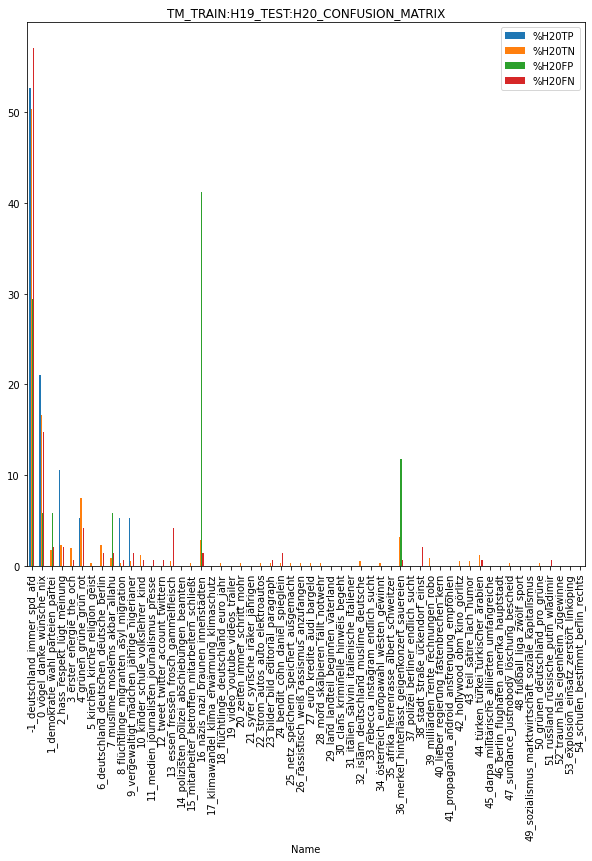

In [ ]:
test_h20_df_percent_plt_CONF_MATRIX.plot(y=['%H20TP', '%H20TN','%H20FP', '%H20FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:H19_TEST:H20_CONFUSION_MATRIX")

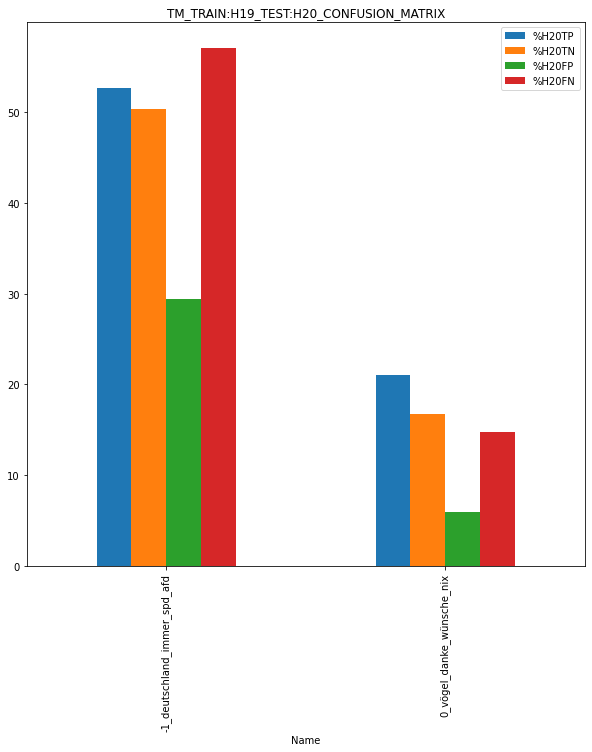

In [ ]:
test_h20_df_percent_plt_CONF_MATRIX[0:2].plot(y=['%H20TP', '%H20TN','%H20FP', '%H20FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:H19_TEST:H20_CONFUSION_MATRIX")

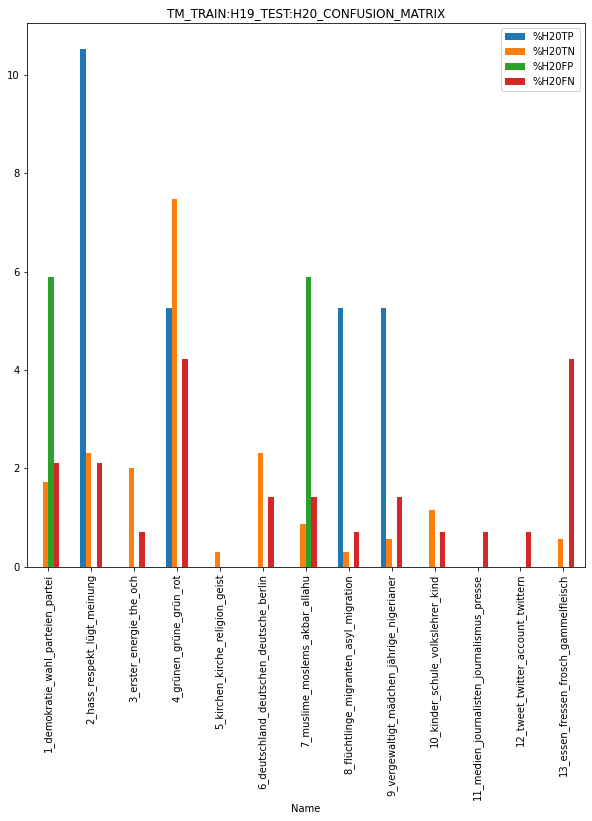

In [ ]:
test_h20_df_percent_plt_CONF_MATRIX[2:15].plot(y=['%H20TP', '%H20TN','%H20FP', '%H20FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:H19_TEST:H20_CONFUSION_MATRIX")

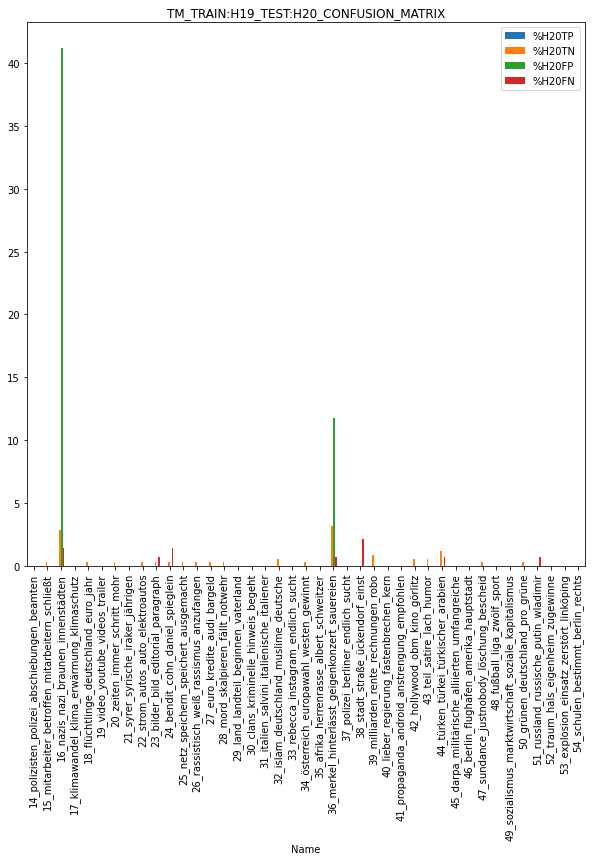

In [ ]:
test_h20_df_percent_plt_CONF_MATRIX[15:].plot(y=['%H20TP', '%H20TN','%H20FP', '%H20FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:H19_TEST:H20_CONFUSION_MATRIX")

## Klassifikation ML_Geeks, trainiert auf HASOC2019

### Test GE2018

In [ ]:
train_h19_class_ge18 = pd.read_csv('/content/NSIT_submission_DE_Train_HASOC2019_Test_GermEval2018_TASK_A.csv')
train_h19_class_ge18


task1
0         1
1         0
2         1
3         1
4         0
...     ...
3527      1
3528      1
3529      1
3530      1
3531      1

[3532 rows x 1 columns]

In [ ]:
train_h19_class_ge18['task1'] = train_h19_class_ge18['task1'].map({0: 1, 1: 0}).astype(int)
train_h19_class_ge18

task1
0         0
1         1
2         0
3         0
4         1
...     ...
3527      0
3528      0
3529      0
3530      0
3531      0

[3532 rows x 1 columns]

In [ ]:
ge18_test_class_values = pd.DataFrame(train_h19_class_ge18['task1'].value_counts())
ge18_test_class_values

task1
0   3237
1    295

In [ ]:
ge18_test_class_values['task1']

0    3237
1     295
Name: task1, dtype: int64

In [ ]:
ge18_test_raw['class'] = train_h19_class_ge18['task1']
ge18_test_raw

TWEET      OFF    CAT  pred  \
0     Meine Mutter hat mir erzählt, dass mein Vater ...    OTHER  OTHER     9   
1     @Tom174_ @davidbest95 Meine Reaktion; |LBR| Ni...    OTHER  OTHER     7   
2     #Merkel rollt dem Emir von #Katar, der islamis...    OTHER  OTHER    -1   
3     „Merle ist kein junges unschuldiges Mädchen“ K...    OTHER  OTHER    -1   
4     @umweltundaktiv Asylantenflut bringt eben nur ...  OFFENSE  ABUSE    18   
...                                                 ...      ...    ...   ...   
3527  @schlabonski tja, es können einen nicht alle L...    OTHER  OTHER     0   
3528  @RKnillmann @lawyerberlin @AfD Aha, der Islam ...  OFFENSE  ABUSE    -1   
3529  @podilein Mannheim, weltoffen und kunterbunt. ...  OFFENSE  ABUSE     0   
3530  @stephanweil was ist nun mit kostenlosen Kitas...    OTHER  OTHER    -1   
3531  @Bartzissey Denn Minderheiten sind für Linke j...    OTHER  OTHER    -1   

      class  cat_bin_actual  cat_bin_predicted  
0         0               0                  0  
1         1               0                  0  
2         0               0                  0  
3         0               0                  0  
4         1               1                  0  
...     ...             ...                ...  
3527      0               0                  0  
3528      0               1                  0  
3529      0               1                  0  
3530      0               0                  0  
3531      0               0                  0  

[3532 rows x 7 columns]

In [ ]:
# https://stackoverflow.com/questions/41691081/pandas-use-and-operator-in-loc-function
ge18_test_true_pos = ge18_test_raw.loc[(ge18_test_raw['OFF'] == 'OFFENSE') & (ge18_test_raw['class'] == 1)]
ge18_test_true_pos

TWEET      OFF        CAT  \
4     @umweltundaktiv Asylantenflut bringt eben nur ...  OFFENSE      ABUSE   
9     @FeePatzer Frauen zu einem "Ja" zu überreden, ...  OFFENSE      ABUSE   
10    @IvyandWoe Ich weiß halt, wie man Frauen zum M...  OFFENSE      ABUSE   
17    @elmo31226 @MartinSchulz @Ralf_Stegner Von mir...  OFFENSE     INSULT   
77    @DietmarAmann1 @Die_Gruenen @cem_oezdemir Ich ...  OFFENSE      ABUSE   
...                                                 ...      ...        ...   
3378  "@endlosfrei: Merkel bricht geltendes Gesetz -...  OFFENSE      ABUSE   
3408  #Türken sind doch zu blöd für #Fußball die kön...  OFFENSE      ABUSE   
3445  @michaelaelfgen @umbilicussuevia |LBR| Genau R...  OFFENSE      ABUSE   
3467  @loriotfehlt @Sonny250874 Ach das soll kotzen ...  OFFENSE  PROFANITY   
3493  @rspctfl @ThomasMichael71 @Innenwelttramp @erg...  OFFENSE      ABUSE   

      pred  class  cat_bin_actual  cat_bin_predicted  
4       18      1               1                  0  
9       -1      1               1                  0  
10      -1      1               1                  1  
17      -1      1               1                  0  
77       4      1               1                  1  
...    ...    ...             ...                ...  
3378     5      1               1                  0  
3408    -1      1               1                  0  
3445     0      1               1                  0  
3467     0      1               1                  1  
3493     7      1               1                  1  

[168 rows x 7 columns]

In [ ]:
ge18_test_pred_values_true_pos = pd.DataFrame(ge18_test_true_pos['pred'].value_counts())
ge18_test_pred_values_true_pos['percent'] = (ge18_test_pred_values_true_pos['pred'] / ge18_test_pred_values_true_pos['pred'].sum()) * 100
ge18_test_pred_values_true_pos

pred    percent
-1     86  51.190476
 0     23  13.690476
 7     13   7.738095
 9      7   4.166667
 8      6   3.571429
 1      5   2.976190
 4      4   2.380952
 5      4   2.380952
 16     4   2.380952
 2      2   1.190476
 18     2   1.190476
 44     2   1.190476
 10     1   0.595238
 36     1   0.595238
 15     1   0.595238
 52     1   0.595238
 43     1   0.595238
 26     1   0.595238
 13     1   0.595238
 35     1   0.595238
 12     1   0.595238
 30     1   0.595238

In [ ]:
ge18_test_false_pos = ge18_test_raw.loc[(ge18_test_raw['OFF'] == 'OTHER') & (ge18_test_raw['class'] == 1)]
ge18_test_false_pos

TWEET    OFF    CAT  pred  \
1     @Tom174_ @davidbest95 Meine Reaktion; |LBR| Ni...  OTHER  OTHER     7   
8     "Wenn man Mädchen bildet, bildet man Generatio...  OTHER  OTHER    -1   
29    @Namiimon @CayVL @mountainman1977 @zeitonline ...  OTHER  OTHER    25   
31    Früher hatte man Sex. |LBR| Heute hat man sexu...  OTHER  OTHER     9   
43    @Tevsa Aber mit Spinnern kann man umgehen, sol...  OTHER  OTHER     0   
...                                                 ...    ...    ...   ...   
3383  #Fakt: 9 von 10 #Flüchtlingen leben in #Entwic...  OTHER  OTHER    -1   
3417  Patriotismus heißt, sich mit fremden Federn zu...  OTHER  OTHER    -1   
3458  Ich fühle mich von @Helheimer sexuell nicht ge...  OTHER  OTHER     9   
3465  @uepsilonniks1 Sich vorstellen, Deine Mutter w...  OTHER  OTHER    -1   
3494  Egal welche Partei, egal welcher Glaube, Haupt...  OTHER  OTHER    34   

      class  cat_bin_actual  cat_bin_predicted  
1         1               0                  0  
8         1               0                  0  
29        1               0                  0  
31        1               0                  0  
43        1               0                  0  
...     ...             ...                ...  
3383      1               0                  0  
3417      1               0                  0  
3458      1               0                  0  
3465      1               0                  0  
3494      1               0                  0  

[127 rows x 7 columns]

In [ ]:
ge18_test_pred_values_false_pos = pd.DataFrame(ge18_test_false_pos['pred'].value_counts())
ge18_test_pred_values_false_pos['percent'] = (ge18_test_pred_values_false_pos['pred'] / ge18_test_pred_values_false_pos['pred'].sum()) * 100
ge18_test_pred_values_false_pos

pred    percent
-1     69  54.330709
 0     13  10.236220
 9     11   8.661417
 5      9   7.086614
 7      4   3.149606
 16     4   3.149606
 25     2   1.574803
 1      2   1.574803
 2      2   1.574803
 13     1   0.787402
 4      1   0.787402
 26     1   0.787402
 28     1   0.787402
 8      1   0.787402
 15     1   0.787402
 48     1   0.787402
 11     1   0.787402
 44     1   0.787402
 49     1   0.787402
 34     1   0.787402

In [ ]:
ge18_test_true_neg = ge18_test_raw.loc[(ge18_test_raw['OFF'] == 'OTHER') & (ge18_test_raw['class'] == 0)]
ge18_test_true_neg

TWEET    OFF    CAT  pred  \
0     Meine Mutter hat mir erzählt, dass mein Vater ...  OTHER  OTHER     9   
2     #Merkel rollt dem Emir von #Katar, der islamis...  OTHER  OTHER    -1   
3     „Merle ist kein junges unschuldiges Mädchen“ K...  OTHER  OTHER    -1   
5     @_StultaMundi Die Bibel enthält ebenfalls Gese...  OTHER  OTHER     5   
6     @Thueringen_ @Miquwarchar @Pontifex_de Man mun...  OTHER  OTHER     5   
...                                                 ...    ...    ...   ...   
3523  @rspctfl @everlast_fs @m8Flo @BolzAndrea @Inne...  OTHER  OTHER    -1   
3524  #Grüne bestehen auf Sanktionen gegen #Russland...  OTHER  OTHER    -1   
3527  @schlabonski tja, es können einen nicht alle L...  OTHER  OTHER     0   
3530  @stephanweil was ist nun mit kostenlosen Kitas...  OTHER  OTHER    -1   
3531  @Bartzissey Denn Minderheiten sind für Linke j...  OTHER  OTHER    -1   

      class  cat_bin_actual  cat_bin_predicted  
0         0               0                  0  
2         0               0                  0  
3         0               0                  0  
5         0               0                  0  
6         0               0                  0  
...     ...             ...                ...  
3523      0               0                  0  
3524      0               0                  0  
3527      0               0                  0  
3530      0               0                  0  
3531      0               0                  0  

[2203 rows x 7 columns]

In [ ]:
ge18_test_pred_values_true_neg = pd.DataFrame(ge18_test_true_neg['pred'].value_counts())
ge18_test_pred_values_true_neg['percent'] = (ge18_test_pred_values_true_neg['pred'] / ge18_test_pred_values_true_neg['pred'].sum()) * 100
ge18_test_pred_values_true_neg

pred    percent
-1   1231  55.878348
 0    285  12.936904
 5     90   4.085338
 1     70   3.177485
 2     50   2.269632
 9     46   2.088062
 12    39   1.770313
 8     32   1.452565
 7     31   1.407172
 4     27   1.225601
 10    22   0.998638
 26    18   0.817068
 6     17   0.771675
 36    17   0.771675
 29    14   0.635497
 28    14   0.635497
 30    14   0.635497
 25    14   0.635497
 44    13   0.590104
 15    13   0.590104
 39    12   0.544712
 11    12   0.544712
 23     9   0.408534
 3      9   0.408534
 22     8   0.363141
 21     8   0.363141
 32     7   0.317749
 17     7   0.317749
 16     7   0.317749
 13     6   0.272356
 14     6   0.272356
 45     6   0.272356
 38     5   0.226963
 43     5   0.226963
 27     4   0.181571
 42     4   0.181571
 18     3   0.136178
 47     3   0.136178
 20     3   0.136178
 19     3   0.136178
 34     2   0.090785
 49     2   0.090785
 41     2   0.090785
 50     2   0.090785
 40     2   0.090785
 24     2   0.090785
 51     1   0.045393
 33     1   0.045393
 31     1   0.045393
 48     1   0.045393
 52     1   0.045393
 46     1   0.045393
 35     1   0.045393

In [ ]:
ge18_test_false_neg = ge18_test_raw.loc[(ge18_test_raw['OFF'] == 'OFFENSE') & (ge18_test_raw['class'] == 0)]
ge18_test_false_neg

TWEET      OFF     CAT  \
11     Liebe Freunde, Gauck,das Symbol des Sklaventums!  OFFENSE   ABUSE   
13    wen interessiert denn die Meinung des Außenmin...  OFFENSE  INSULT   
15    @LWaff @UnzufriedenerB |LBR| Laßt doch endlich...  OFFENSE   ABUSE   
16    @heuteshow Besser einen schwarz arbeiten zu la...  OFFENSE   ABUSE   
18    @BlondJedi @dittmar_katrin Zum Mond? Da sind d...  OFFENSE  INSULT   
...                                                 ...      ...     ...   
3521  @UdoUlfkotte Hauptsache den Asylanten gehts ge...  OFFENSE   ABUSE   
3525  @ThomasMichael71 @mountainman1977 @houelle_bec...  OFFENSE   ABUSE   
3526  @SteinbachErika Ich finde AFD Wähler besser al...  OFFENSE  INSULT   
3528  @RKnillmann @lawyerberlin @AfD Aha, der Islam ...  OFFENSE   ABUSE   
3529  @podilein Mannheim, weltoffen und kunterbunt. ...  OFFENSE   ABUSE   

      pred  class  cat_bin_actual  cat_bin_predicted  
11      -1      0               1                  0  
13      -1      0               1                  0  
15      16      0               1                  0  
16      26      0               1                  0  
18      -1      0               1                  0  
...    ...    ...             ...                ...  
3521    18      0               1                  0  
3525    -1      0               1                  0  
3526    13      0               1                  1  
3528    -1      0               1                  0  
3529     0      0               1                  0  

[1034 rows x 7 columns]

In [ ]:
ge18_test_pred_values_false_neg = pd.DataFrame(ge18_test_false_neg['pred'].value_counts())
ge18_test_pred_values_false_neg['percent'] = (ge18_test_pred_values_false_neg['pred'] / ge18_test_pred_values_false_neg['pred'].sum()) * 100
ge18_test_pred_values_false_neg

pred    percent
-1    568  54.932302
 0    105  10.154739
 7     38   3.675048
 8     32   3.094778
 9     32   3.094778
 1     28   2.707930
 4     27   2.611219
 2     22   2.127660
 36    20   1.934236
 5     19   1.837524
 16    18   1.740812
 26    12   1.160542
 10    11   1.063830
 11    10   0.967118
 6      8   0.773694
 18     8   0.773694
 13     7   0.676983
 28     7   0.676983
 32     5   0.483559
 35     5   0.483559
 44     4   0.386847
 30     4   0.386847
 15     4   0.386847
 14     4   0.386847
 29     4   0.386847
 24     3   0.290135
 43     3   0.290135
 3      3   0.290135
 38     2   0.193424
 21     2   0.193424
 42     2   0.193424
 20     2   0.193424
 22     2   0.193424
 12     2   0.193424
 39     2   0.193424
 25     2   0.193424
 50     1   0.096712
 49     1   0.096712
 27     1   0.096712
 41     1   0.096712
 48     1   0.096712
 45     1   0.096712
 40     1   0.096712

In [ ]:
ge18_test_raw['cat_bin_actual'] = ge18_test_raw['OFF'].map({'OTHER': 0, 'OFFENSE': 1}).astype(int)
#ge18_test_raw['cat_bin_predicted'] = ge18_test_raw['class'].map({1: 1, 0: 0}).astype(int)
ge18_test_raw['cat_bin_predicted'] = ge18_test_raw['class'].astype(int)


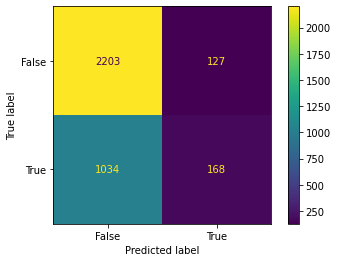

In [ ]:
# https://www.w3schools.com/python/python_ml_confusion_matrix.asp
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = ge18_test_raw['cat_bin_actual']
predicted = ge18_test_raw['cat_bin_predicted']

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
accuracy = metrics.accuracy_score(actual, predicted)
accuracy

0.671291053227633

In [ ]:
precision = metrics.precision_score(actual, predicted)
precision

0.5694915254237288

In [ ]:
sensitivity_recall = metrics.recall_score(actual, predicted)
sensitivity_recall

0.13976705490848584

In [ ]:
specificity = metrics.recall_score(actual, predicted, pos_label=0)
specificity

0.9454935622317596

In [ ]:
F1_score = metrics.f1_score(actual, predicted)
F1_score

0.22444889779559116

In [ ]:
#metrics
print({"Accuracy":accuracy,"Precision":precision,
       "Sensitivity_recall":sensitivity_recall,
       "Specificity":specificity,
       "F1_score":F1_score})

{'Accuracy': 0.671291053227633, 'Precision': 0.5694915254237288, 'Sensitivity_recall': 0.13976705490848584, 'Specificity': 0.9454935622317596, 'F1_score': 0.22444889779559116}


### TEST GE2018 INDEZES CONFUSION MATRIX

In [ ]:
# df1 enthält die Topicnummern und ihre Bezeichnungen
df1 =  train_h19_model_topics[['Topic','Name']]
df1

Topic                                               Name
0      -1                       -1_deutschland_immer_spd_afd
1       0                          0_vögel_danke_wünsche_nix
2       1                  1_demokratie_wahl_parteien_partei
3       2                        2_hass_respekt_lügt_meinung
4       3                           3_erster_energie_the_och
5       4                            4_grünen_grüne_grün_rot
6       5                    5_kirchen_kirche_religion_geist
7       6            6_deutschland_deutschen_deutsche_berlin
8       7                     7_muslime_moslems_akbar_allahu
9       8             8_flüchtlinge_migranten_asyl_migration
10      9          9_vergewaltigt_mädchen_jährige_nigerianer
11     10                  10_kinder_schule_volkslehrer_kind
12     11         11_medien_journalisten_journalismus_presse
13     12                  12_tweet_twitter_account_twittern
14     13              13_essen_fressen_frosch_gammelfleisch
15     14        14_polizisten_polizei_abschiebungen_beamten
16     15     15_mitarbeiter_betroffen_mitarbeitern_schließt
17     16                 16_nazis_nazi_braunen_innenstädten
18     17         17_klimawandel_klima_erwärmung_klimaschutz
19     18               18_flüchtlinge_deutschland_euro_jahr
20     19                    19_video_youtube_videos_trailer
21     20                       20_zeiten_immer_schritt_mohr
22     21                  21_syrer_syrische_iraker_jährigen
23     22                   22_strom_autos_auto_elektroautos
24     23                 23_bilder_bild_editorial_paragraph
25     24                    24_bendit_cohn_daniel_spieglein
26     25             25_netz_speichern_speichert_ausgemacht
27     26           26_rassistisch_weiß_rassismus_anzufangen
28     27                       27_euro_kredite_audi_bargeld
29     28                   28_mord_skalpieren_fällt_notwehr
30     29                29_land_landteil_beginnen_vaterland
31     30                 30_clans_kriminelle_hinweis_begeht
32     31          31_italien_salvini_italienische_italiener
33     32              32_islam_deutschland_muslime_deutsche
34     33                 33_rebecca_instagram_endlich_sucht
35     34            34_österreich_europawahl_westen_gewinnt
36     35            35_afrika_herrenrasse_albert_schweitzer
37     36      36_merkel_hinterlässt_geigenkonzert_sauereien
38     37                  37_polizei_berliner_endlich_sucht
39     38                    38_stadt_straße_ückendorf_einst
40     39                39_milliarden_rente_rechnungen_robo
41     40             40_lieber_regierung_fastenbrechen_kern
42     41        41_propaganda_android_anstrengung_empfohlen
43     42                      42_hollywood_obm_kino_görlitz
44     43                          43_teil_satire_lach_humor
45     44                44_türken_türkei_türkischer_arabien
46     45      45_darpa_militärische_alliierten_umfangreiche
47     46             46_berlin_flughafen_amerika_hauptstadt
48     47           47_sundance_justnobody_löschung_bescheid
49     48                        48_fußball_liga_zwölf_sport
50     49  49_sozialismus_marktwirtschaft_soziale_kapital...
51     50                    50_grünen_deutschland_pro_grüne
52     51               51_russland_russische_putin_wladimir
53     52                  52_traum_hals_eigenheim_zugewinne
54     53            53_explosion_einsatz_zerstört_linköping
55     54                  54_schulen_bestimmt_berlin_rechts

In [ ]:
ge18_test_pred_values_true_pos['Topic'] = ge18_test_pred_values_true_pos.index
ge18_test_pred_values_true_pos

pred    percent  Topic
-1     86  51.190476     -1
 0     23  13.690476      0
 7     13   7.738095      7
 9      7   4.166667      9
 8      6   3.571429      8
 1      5   2.976190      1
 4      4   2.380952      4
 5      4   2.380952      5
 16     4   2.380952     16
 2      2   1.190476      2
 18     2   1.190476     18
 44     2   1.190476     44
 10     1   0.595238     10
 36     1   0.595238     36
 15     1   0.595238     15
 52     1   0.595238     52
 43     1   0.595238     43
 26     1   0.595238     26
 13     1   0.595238     13
 35     1   0.595238     35
 12     1   0.595238     12
 30     1   0.595238     30

In [ ]:
# df2 bis df5 enthalten Vorhersagen, Topicanteile in Prozent sowie die Topicnr.
# dabei werden die Spalten umbenannt, damit es später beim Zusammenfügen nicht
# zu Doppelungen kommt
df2 = ge18_test_pred_values_true_pos 
df2 = df2.rename(columns={'pred':'predGE18TP', 'percent':'%GE18TP', 'Topic':'Topic'})

In [ ]:
ge18_test_pred_values_false_pos['Topic'] = ge18_test_pred_values_false_pos.index
ge18_test_pred_values_false_pos

pred    percent  Topic
-1     69  54.330709     -1
 0     13  10.236220      0
 9     11   8.661417      9
 5      9   7.086614      5
 7      4   3.149606      7
 16     4   3.149606     16
 25     2   1.574803     25
 1      2   1.574803      1
 2      2   1.574803      2
 13     1   0.787402     13
 4      1   0.787402      4
 26     1   0.787402     26
 28     1   0.787402     28
 8      1   0.787402      8
 15     1   0.787402     15
 48     1   0.787402     48
 11     1   0.787402     11
 44     1   0.787402     44
 49     1   0.787402     49
 34     1   0.787402     34

In [ ]:
df3 = ge18_test_pred_values_false_pos
df3 = df3.rename(columns={'pred':'predGE18FP', 'percent':'%GE18FP', 'Topic':'Topic'})

In [ ]:
ge18_test_pred_values_true_neg['Topic'] = ge18_test_pred_values_true_neg.index
ge18_test_pred_values_true_neg

pred    percent  Topic
-1   1231  55.878348     -1
 0    285  12.936904      0
 5     90   4.085338      5
 1     70   3.177485      1
 2     50   2.269632      2
 9     46   2.088062      9
 12    39   1.770313     12
 8     32   1.452565      8
 7     31   1.407172      7
 4     27   1.225601      4
 10    22   0.998638     10
 26    18   0.817068     26
 6     17   0.771675      6
 36    17   0.771675     36
 29    14   0.635497     29
 28    14   0.635497     28
 30    14   0.635497     30
 25    14   0.635497     25
 44    13   0.590104     44
 15    13   0.590104     15
 39    12   0.544712     39
 11    12   0.544712     11
 23     9   0.408534     23
 3      9   0.408534      3
 22     8   0.363141     22
 21     8   0.363141     21
 32     7   0.317749     32
 17     7   0.317749     17
 16     7   0.317749     16
 13     6   0.272356     13
 14     6   0.272356     14
 45     6   0.272356     45
 38     5   0.226963     38
 43     5   0.226963     43
 27     4   0.181571     27
 42     4   0.181571     42
 18     3   0.136178     18
 47     3   0.136178     47
 20     3   0.136178     20
 19     3   0.136178     19
 34     2   0.090785     34
 49     2   0.090785     49
 41     2   0.090785     41
 50     2   0.090785     50
 40     2   0.090785     40
 24     2   0.090785     24
 51     1   0.045393     51
 33     1   0.045393     33
 31     1   0.045393     31
 48     1   0.045393     48
 52     1   0.045393     52
 46     1   0.045393     46
 35     1   0.045393     35

In [ ]:
df4 = ge18_test_pred_values_true_neg
df4 = df4.rename(columns={'pred':'predGE18TN', 'percent':'%GE18TN', 'Topic':'Topic'})

In [ ]:
ge18_test_pred_values_false_neg['Topic'] = ge18_test_pred_values_false_neg.index
ge18_test_pred_values_false_neg

pred    percent  Topic
-1    568  54.932302     -1
 0    105  10.154739      0
 7     38   3.675048      7
 8     32   3.094778      8
 9     32   3.094778      9
 1     28   2.707930      1
 4     27   2.611219      4
 2     22   2.127660      2
 36    20   1.934236     36
 5     19   1.837524      5
 16    18   1.740812     16
 26    12   1.160542     26
 10    11   1.063830     10
 11    10   0.967118     11
 6      8   0.773694      6
 18     8   0.773694     18
 13     7   0.676983     13
 28     7   0.676983     28
 32     5   0.483559     32
 35     5   0.483559     35
 44     4   0.386847     44
 30     4   0.386847     30
 15     4   0.386847     15
 14     4   0.386847     14
 29     4   0.386847     29
 24     3   0.290135     24
 43     3   0.290135     43
 3      3   0.290135      3
 38     2   0.193424     38
 21     2   0.193424     21
 42     2   0.193424     42
 20     2   0.193424     20
 22     2   0.193424     22
 12     2   0.193424     12
 39     2   0.193424     39
 25     2   0.193424     25
 50     1   0.096712     50
 49     1   0.096712     49
 27     1   0.096712     27
 41     1   0.096712     41
 48     1   0.096712     48
 45     1   0.096712     45
 40     1   0.096712     40

In [ ]:
df5 = ge18_test_pred_values_false_neg
df5 = df5.rename(columns={'pred':'predGE18FN', 'percent':'%GE18FN', 'Topic':'Topic'})

In [ ]:
# https://stackoverflow.com/questions/44327999/how-to-merge-multiple-dataframes
from functools import reduce

data_frames = [df1, df2, df3, df4, df5]
df_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_merged[['%GE18TP', '%GE18TN','%GE18FP', '%GE18FN']] = df_merged[['%GE18TP', '%GE18TN','%GE18FP', '%GE18FN']].astype(float).round(2)
df_merged
#df_to_round = df_OTHER_merged[['%GE18', '%GE19','%H19', '%H20']]
#df_to_round = df_to_round[['%GE18', '%GE19','%H19', '%H20']].round(2)
#df_to_round

Topic                                               Name predGE18TP  \
0      -1                       -1_deutschland_immer_spd_afd       86.0   
1       0                          0_vögel_danke_wünsche_nix       23.0   
2       1                  1_demokratie_wahl_parteien_partei        5.0   
3       2                        2_hass_respekt_lügt_meinung        2.0   
4       3                           3_erster_energie_the_och          0   
5       4                            4_grünen_grüne_grün_rot        4.0   
6       5                    5_kirchen_kirche_religion_geist        4.0   
7       6            6_deutschland_deutschen_deutsche_berlin          0   
8       7                     7_muslime_moslems_akbar_allahu       13.0   
9       8             8_flüchtlinge_migranten_asyl_migration        6.0   
10      9          9_vergewaltigt_mädchen_jährige_nigerianer        7.0   
11     10                  10_kinder_schule_volkslehrer_kind        1.0   
12     11         11_medien_journalisten_journalismus_presse          0   
13     12                  12_tweet_twitter_account_twittern        1.0   
14     13              13_essen_fressen_frosch_gammelfleisch        1.0   
15     14        14_polizisten_polizei_abschiebungen_beamten          0   
16     15     15_mitarbeiter_betroffen_mitarbeitern_schließt        1.0   
17     16                 16_nazis_nazi_braunen_innenstädten        4.0   
18     17         17_klimawandel_klima_erwärmung_klimaschutz          0   
19     18               18_flüchtlinge_deutschland_euro_jahr        2.0   
20     19                    19_video_youtube_videos_trailer          0   
21     20                       20_zeiten_immer_schritt_mohr          0   
22     21                  21_syrer_syrische_iraker_jährigen          0   
23     22                   22_strom_autos_auto_elektroautos          0   
24     23                 23_bilder_bild_editorial_paragraph          0   
25     24                    24_bendit_cohn_daniel_spieglein          0   
26     25             25_netz_speichern_speichert_ausgemacht          0   
27     26           26_rassistisch_weiß_rassismus_anzufangen        1.0   
28     27                       27_euro_kredite_audi_bargeld          0   
29     28                   28_mord_skalpieren_fällt_notwehr          0   
30     29                29_land_landteil_beginnen_vaterland          0   
31     30                 30_clans_kriminelle_hinweis_begeht        1.0   
32     31          31_italien_salvini_italienische_italiener          0   
33     32              32_islam_deutschland_muslime_deutsche          0   
34     33                 33_rebecca_instagram_endlich_sucht          0   
35     34            34_österreich_europawahl_westen_gewinnt          0   
36     35            35_afrika_herrenrasse_albert_schweitzer        1.0   
37     36      36_merkel_hinterlässt_geigenkonzert_sauereien        1.0   
38     37                  37_polizei_berliner_endlich_sucht          0   
39     38                    38_stadt_straße_ückendorf_einst          0   
40     39                39_milliarden_rente_rechnungen_robo          0   
41     40             40_lieber_regierung_fastenbrechen_kern          0   
42     41        41_propaganda_android_anstrengung_empfohlen          0   
43     42                      42_hollywood_obm_kino_görlitz          0   
44     43                          43_teil_satire_lach_humor        1.0   
45     44                44_türken_türkei_türkischer_arabien        2.0   
46     45      45_darpa_militärische_alliierten_umfangreiche          0   
47     46             46_berlin_flughafen_amerika_hauptstadt          0   
48     47           47_sundance_justnobody_löschung_bescheid          0   
49     48                        48_fußball_liga_zwölf_sport          0   
50     49  49_sozialismus_marktwirtschaft_soziale_kapital...          0   
51     50                    50_grünen_deutschland_pro_grüne          0   
52     51               51_ru

In [ ]:
df_merged

Topic                                               Name predGE18TP  \
0      -1                       -1_deutschland_immer_spd_afd       86.0   
1       0                          0_vögel_danke_wünsche_nix       23.0   
2       1                  1_demokratie_wahl_parteien_partei        5.0   
3       2                        2_hass_respekt_lügt_meinung        2.0   
4       3                           3_erster_energie_the_och          0   
5       4                            4_grünen_grüne_grün_rot        4.0   
6       5                    5_kirchen_kirche_religion_geist        4.0   
7       6            6_deutschland_deutschen_deutsche_berlin          0   
8       7                     7_muslime_moslems_akbar_allahu       13.0   
9       8             8_flüchtlinge_migranten_asyl_migration        6.0   
10      9          9_vergewaltigt_mädchen_jährige_nigerianer        7.0   
11     10                  10_kinder_schule_volkslehrer_kind        1.0   
12     11         11_medien_journalisten_journalismus_presse          0   
13     12                  12_tweet_twitter_account_twittern        1.0   
14     13              13_essen_fressen_frosch_gammelfleisch        1.0   
15     14        14_polizisten_polizei_abschiebungen_beamten          0   
16     15     15_mitarbeiter_betroffen_mitarbeitern_schließt        1.0   
17     16                 16_nazis_nazi_braunen_innenstädten        4.0   
18     17         17_klimawandel_klima_erwärmung_klimaschutz          0   
19     18               18_flüchtlinge_deutschland_euro_jahr        2.0   
20     19                    19_video_youtube_videos_trailer          0   
21     20                       20_zeiten_immer_schritt_mohr          0   
22     21                  21_syrer_syrische_iraker_jährigen          0   
23     22                   22_strom_autos_auto_elektroautos          0   
24     23                 23_bilder_bild_editorial_paragraph          0   
25     24                    24_bendit_cohn_daniel_spieglein          0   
26     25             25_netz_speichern_speichert_ausgemacht          0   
27     26           26_rassistisch_weiß_rassismus_anzufangen        1.0   
28     27                       27_euro_kredite_audi_bargeld          0   
29     28                   28_mord_skalpieren_fällt_notwehr          0   
30     29                29_land_landteil_beginnen_vaterland          0   
31     30                 30_clans_kriminelle_hinweis_begeht        1.0   
32     31          31_italien_salvini_italienische_italiener          0   
33     32              32_islam_deutschland_muslime_deutsche          0   
34     33                 33_rebecca_instagram_endlich_sucht          0   
35     34            34_österreich_europawahl_westen_gewinnt          0   
36     35            35_afrika_herrenrasse_albert_schweitzer        1.0   
37     36      36_merkel_hinterlässt_geigenkonzert_sauereien        1.0   
38     37                  37_polizei_berliner_endlich_sucht          0   
39     38                    38_stadt_straße_ückendorf_einst          0   
40     39                39_milliarden_rente_rechnungen_robo          0   
41     40             40_lieber_regierung_fastenbrechen_kern          0   
42     41        41_propaganda_android_anstrengung_empfohlen          0   
43     42                      42_hollywood_obm_kino_görlitz          0   
44     43                          43_teil_satire_lach_humor        1.0   
45     44                44_türken_türkei_türkischer_arabien        2.0   
46     45      45_darpa_militärische_alliierten_umfangreiche          0   
47     46             46_berlin_flughafen_amerika_hauptstadt          0   
48     47           47_sundance_justnobody_löschung_bescheid          0   
49     48                        48_fußball_liga_zwölf_sport          0   
50     49  49_sozialismus_marktwirtschaft_soziale_kapital...          0   
51     50                    50_grünen_deutschland_pro_grüne          0   
52     51               51_ru

In [ ]:
# https://stackoverflow.com/questions/15891038/change-column-type-in-pandas
# Die Anzahlen der vorhergesagten Topics werden in int umgewandelt
df_merged = df_merged.astype({"predGE18TP": int, "predGE18TN":int, "predGE18FP":int, "predGE18FN":int})
df_merged

Topic                                               Name  predGE18TP  \
0      -1                       -1_deutschland_immer_spd_afd          86   
1       0                          0_vögel_danke_wünsche_nix          23   
2       1                  1_demokratie_wahl_parteien_partei           5   
3       2                        2_hass_respekt_lügt_meinung           2   
4       3                           3_erster_energie_the_och           0   
5       4                            4_grünen_grüne_grün_rot           4   
6       5                    5_kirchen_kirche_religion_geist           4   
7       6            6_deutschland_deutschen_deutsche_berlin           0   
8       7                     7_muslime_moslems_akbar_allahu          13   
9       8             8_flüchtlinge_migranten_asyl_migration           6   
10      9          9_vergewaltigt_mädchen_jährige_nigerianer           7   
11     10                  10_kinder_schule_volkslehrer_kind           1   
12     11         11_medien_journalisten_journalismus_presse           0   
13     12                  12_tweet_twitter_account_twittern           1   
14     13              13_essen_fressen_frosch_gammelfleisch           1   
15     14        14_polizisten_polizei_abschiebungen_beamten           0   
16     15     15_mitarbeiter_betroffen_mitarbeitern_schließt           1   
17     16                 16_nazis_nazi_braunen_innenstädten           4   
18     17         17_klimawandel_klima_erwärmung_klimaschutz           0   
19     18               18_flüchtlinge_deutschland_euro_jahr           2   
20     19                    19_video_youtube_videos_trailer           0   
21     20                       20_zeiten_immer_schritt_mohr           0   
22     21                  21_syrer_syrische_iraker_jährigen           0   
23     22                   22_strom_autos_auto_elektroautos           0   
24     23                 23_bilder_bild_editorial_paragraph           0   
25     24                    24_bendit_cohn_daniel_spieglein           0   
26     25             25_netz_speichern_speichert_ausgemacht           0   
27     26           26_rassistisch_weiß_rassismus_anzufangen           1   
28     27                       27_euro_kredite_audi_bargeld           0   
29     28                   28_mord_skalpieren_fällt_notwehr           0   
30     29                29_land_landteil_beginnen_vaterland           0   
31     30                 30_clans_kriminelle_hinweis_begeht           1   
32     31          31_italien_salvini_italienische_italiener           0   
33     32              32_islam_deutschland_muslime_deutsche           0   
34     33                 33_rebecca_instagram_endlich_sucht           0   
35     34            34_österreich_europawahl_westen_gewinnt           0   
36     35            35_afrika_herrenrasse_albert_schweitzer           1   
37     36      36_merkel_hinterlässt_geigenkonzert_sauereien           1   
38     37                  37_polizei_berliner_endlich_sucht           0   
39     38                    38_stadt_straße_ückendorf_einst           0   
40     39                39_milliarden_rente_rechnungen_robo           0   
41     40             40_lieber_regierung_fastenbrechen_kern           0   
42     41        41_propaganda_android_anstrengung_empfohlen           0   
43     42                      42_hollywood_obm_kino_görlitz           0   
44     43                          43_teil_satire_lach_humor           1   
45     44                44_türken_türkei_türkischer_arabien           2   
46     45      45_darpa_militärische_alliierten_umfangreiche           0   
47     46             46_berlin_flughafen_amerika_hauptstadt           0   
48     47           47_sundance_justnobody_löschung_bescheid           0   
49     48                        48_fußball_liga_zwölf_sport           0   
50     49  49_sozialismus_marktwirtschaft_soziale_kapital...           0   
51     50                    50_grünen_deutschland_p

In [ ]:
df_percent = df_merged[['Topic','%GE18TP', '%GE18TN','%GE18FP', '%GE18FN','Name']]
df_percent

Topic  %GE18TP  %GE18TN  %GE18FP  %GE18FN  \
0      -1    51.19    55.88    54.33    54.93   
1       0    13.69    12.94    10.24    10.15   
2       1     2.98     3.18     1.57     2.71   
3       2     1.19     2.27     1.57     2.13   
4       3     0.00     0.41     0.00     0.29   
5       4     2.38     1.23     0.79     2.61   
6       5     2.38     4.09     7.09     1.84   
7       6     0.00     0.77     0.00     0.77   
8       7     7.74     1.41     3.15     3.68   
9       8     3.57     1.45     0.79     3.09   
10      9     4.17     2.09     8.66     3.09   
11     10     0.60     1.00     0.00     1.06   
12     11     0.00     0.54     0.79     0.97   
13     12     0.60     1.77     0.00     0.19   
14     13     0.60     0.27     0.79     0.68   
15     14     0.00     0.27     0.00     0.39   
16     15     0.60     0.59     0.79     0.39   
17     16     2.38     0.32     3.15     1.74   
18     17     0.00     0.32     0.00     0.00   
19     18     1.19     0.14     0.00     0.77   
20     19     0.00     0.14     0.00     0.00   
21     20     0.00     0.14     0.00     0.19   
22     21     0.00     0.36     0.00     0.19   
23     22     0.00     0.36     0.00     0.19   
24     23     0.00     0.41     0.00     0.00   
25     24     0.00     0.09     0.00     0.29   
26     25     0.00     0.64     1.57     0.19   
27     26     0.60     0.82     0.79     1.16   
28     27     0.00     0.18     0.00     0.10   
29     28     0.00     0.64     0.79     0.68   
30     29     0.00     0.64     0.00     0.39   
31     30     0.60     0.64     0.00     0.39   
32     31     0.00     0.05     0.00     0.00   
33     32     0.00     0.32     0.00     0.48   
34     33     0.00     0.05     0.00     0.00   
35     34     0.00     0.09     0.79     0.00   
36     35     0.60     0.05     0.00     0.48   
37     36     0.60     0.77     0.00     1.93   
38     37     0.00     0.00     0.00     0.00   
39     38     0.00     0.23     0.00     0.19   
40     39     0.00     0.54     0.00     0.19   
41     40     0.00     0.09     0.00     0.10   
42     41     0.00     0.09     0.00     0.10   
43     42     0.00     0.18     0.00     0.19   
44     43     0.60     0.23     0.00     0.29   
45     44     1.19     0.59     0.79     0.39   
46     45     0.00     0.27     0.00     0.10   
47     46     0.00     0.05     0.00     0.00   
48     47     0.00     0.14     0.00     0.00   
49     48     0.00     0.05     0.79     0.10   
50     49     0.00     0.09     0.79     0.10   
51     50     0.00     0.09     0.00     0.10   
52     51     0.00     0.05     0.00     0.00   
53     52     0.60     0.05     0.00     0.00   
54     53     0.00     0.00     0.00     0.00   
55     54     0.00     0.00     0.00     0.00   

                                                 Name  
0                        -1_deutschland_immer_spd_afd  
1                           0_vögel_danke_wünsche_nix  
2                   1_demokratie_wahl_parteien_partei  
3                         2_hass_respekt_lügt_meinung  
4                            3_erster_energie_the_och  
5                             4_grünen_grüne_grün_rot  
6                     5_kirchen_kirche_religion_geist  
7             6_deutschland_deutschen_deutsche_berlin  
8                      7_muslime_moslems_akbar_allahu  
9              8_flüchtlinge_migranten_asyl_migration  
10          9_vergewaltigt_mädchen_jährige_nigerianer  
11                  10_kinder_schule_volkslehrer_kind  
12         11_medien_journalisten_journalismus_presse  
13                  12_tweet_twitter_account_twittern  
14              13_essen_fressen_frosch_gammelfleisch  
15        14_polizisten_polizei_abschiebungen_beamten  
16     15_mitarbeiter_betroffen_mitarbeitern_schließt  
17                 16_nazis_nazi_braunen_innenstädten  
18         17_klimawandel_klima_erwärmung_klimaschutz  
19               18_flüchtlinge_deutschland_euro_jahr  
20                    19_video_you

In [ ]:
test_ge18_df_percent_plt_CONF_MATRIX = df_percent.set_index('Name')

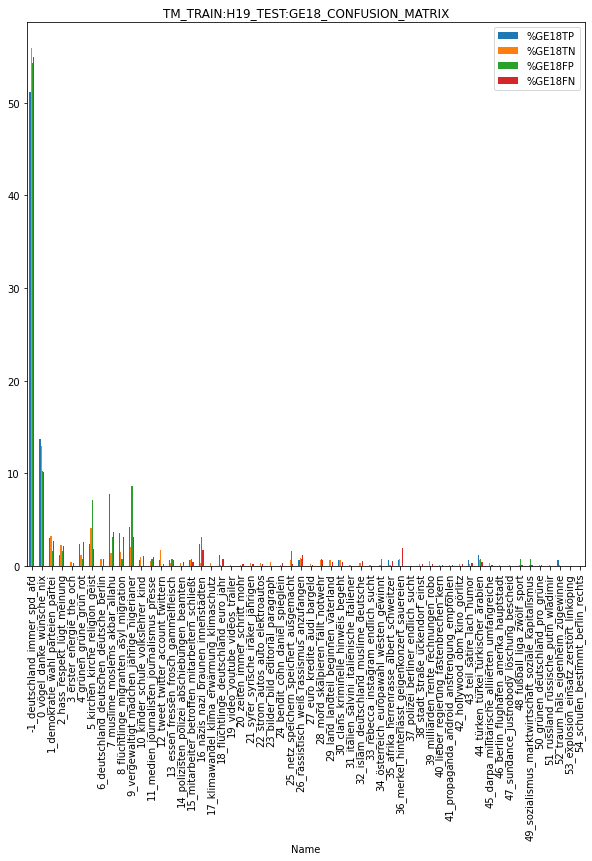

In [ ]:
test_ge18_df_percent_plt_CONF_MATRIX.plot(y=['%GE18TP', '%GE18TN','%GE18FP', '%GE18FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:H19_TEST:GE18_CONFUSION_MATRIX")

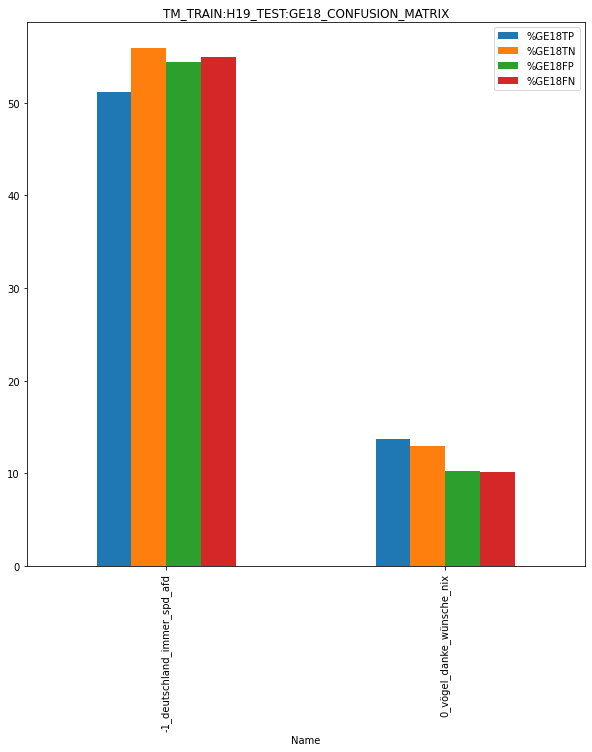

In [ ]:
test_ge18_df_percent_plt_CONF_MATRIX[0:2].plot(y=['%GE18TP', '%GE18TN','%GE18FP', '%GE18FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:H19_TEST:GE18_CONFUSION_MATRIX")

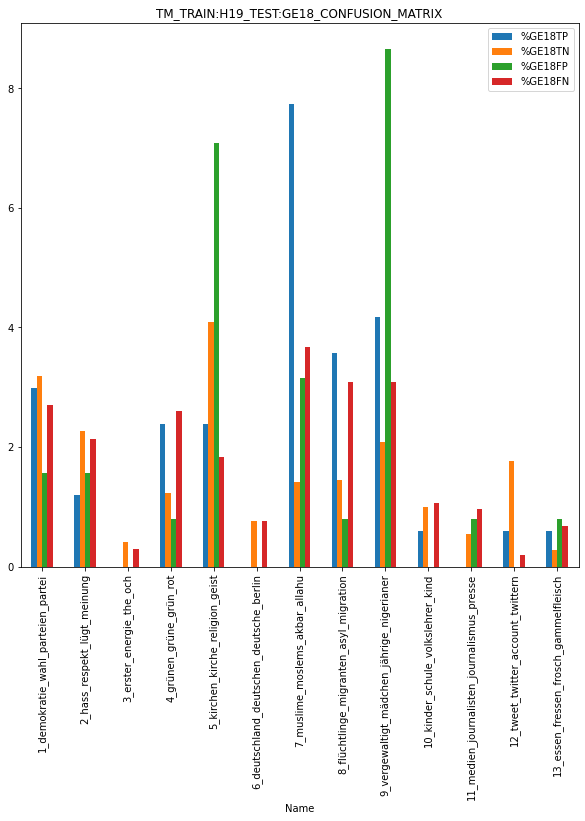

In [ ]:
test_ge18_df_percent_plt_CONF_MATRIX[2:15].plot(y=['%GE18TP', '%GE18TN','%GE18FP', '%GE18FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:H19_TEST:GE18_CONFUSION_MATRIX")

In [ ]:
#test_ge18_df_percent_plt_CONF_MATRIX[15:].plot(y=['%GE18TP', '%GE18TN','%GE18FP', '%GE18FN'], 
#                                            kind="bar",figsize=(10, 10), 
#                                            title = 
#                                            "TM_TRAIN:H19_TEST:GE18_CONFUSION_MATRIX")

### Test GE2019

In [ ]:
train_h19_class_ge19 = pd.read_csv('/content/NSIT_submission_DE_Train_HASOC2019_Test_GermEval2019_TASK_A.csv')
train_h19_class_ge19

task1
0         1
1         1
2         1
3         1
4         0
...     ...
3026      1
3027      1
3028      0
3029      1
3030      1

[3031 rows x 1 columns]

In [ ]:
train_h19_class_ge19['task1'] = train_h19_class_ge19['task1'].map({0: 1, 1: 0}).astype(int)
train_h19_class_ge19

task1
0         0
1         0
2         0
3         0
4         1
...     ...
3026      0
3027      0
3028      1
3029      0
3030      0

[3031 rows x 1 columns]

In [ ]:
ge19_test_class_values = pd.DataFrame(train_h19_class_ge19['task1'].value_counts())
ge19_test_class_values

task1
0   2760
1    271

In [ ]:

ge19_test_raw['class'] = train_h19_class_ge19['task1']
ge19_test_raw

TWEET      OFF     CAT  \
0     @JanZimmHHB @mopo Komisch das die Realitätsver...  OFFENSE  INSULT   
1     @faznet @Gruene_Europa @SPDEuropa @CDU CDU ste...  OFFENSE   ABUSE   
2     @DLFNachrichten Die Gesichter, Namen, Religion...    OTHER   OTHER   
3     @welt Wie verwirrt muss man sein um sich zu we...  OFFENSE   ABUSE   
4     @hacker_1991 @torben_braga Weil die AfD den Fe...  OFFENSE   ABUSE   
...                                                 ...      ...     ...   
3026  Es fand aber nie eine Emanzipierungs-Phase der...    OTHER   OTHER   
3027  Um es klar zu stellen: Ich will hier kein Whit...    OTHER   OTHER   
3028  Und dann habe ich da noch die McArthur-Briefe ...    OTHER   OTHER   
3029  al sehen wer der Ersatzmann wird. Hier könnte ...    OTHER   OTHER   
3030  @JKasek Oder die Bäume. Bin mal in 'nem Wald s...    OTHER   OTHER   

      pred  class  cat_bin_actual  cat_bin_predicted  
0        2      0               1                  0  
1       -1      0               1                  0  
2        5      0               0                  0  
3        2      0               1                  1  
4       -1      1               1                  0  
...    ...    ...             ...                ...  
3026    44      0               0                  0  
3027    15      0               0                  0  
3028    -1      1               0                  0  
3029     2      0               0                  0  
3030    -1      0               0                  0  

[3031 rows x 7 columns]

In [ ]:
# https://stackoverflow.com/questions/41691081/pandas-use-and-operator-in-loc-function
ge19_test_true_pos = ge19_test_raw.loc[(ge19_test_raw['OFF'] == 'OFFENSE') & (ge19_test_raw['class'] == 1)]
ge19_test_true_pos

TWEET      OFF        CAT  \
4     @hacker_1991 @torben_braga Weil die AfD den Fe...  OFFENSE      ABUSE   
7     @StZ_NEWS Schäuble wird wissen woher dieses Na...  OFFENSE      ABUSE   
15    @ZDFhannover Und das ist das Baueropfer welche...  OFFENSE      ABUSE   
49    @SPIEGELONLINE Nun, dann sind es wie bei der v...  OFFENSE      ABUSE   
68    @tagesschau Und dann nimmt das da daran Teil, ...  OFFENSE      ABUSE   
...                                                 ...      ...        ...   
2823  Rafft #yotta nicht dass #evelyn wirklich so du...  OFFENSE     INSULT   
2846      arie wo bist du du alte Arsch Geburt #krone18  OFFENSE     INSULT   
2870  eine Fresse wie viel Fritierfett hat #markusla...  OFFENSE  PROFANITY   
2889  Diese sogenannten Aktivisten sind Straftäter d...  OFFENSE      ABUSE   
2988  Ich frage mich mittlerweile was Saudi Arabien ...  OFFENSE  PROFANITY   

      pred  class  cat_bin_actual  cat_bin_predicted  
4       -1      1               1                  0  
7       16      1               1                  0  
15      -1      1               1                  0  
49      28      1               1                  0  
68      -1      1               1                  0  
...    ...    ...             ...                ...  
2823    -1      1               1                  1  
2846     0      1               1                  1  
2870    13      1               1                  1  
2889    -1      1               1                  0  
2988    -1      1               1                  0  

[125 rows x 7 columns]

In [ ]:
ge19_test_pred_values_true_pos = pd.DataFrame(ge19_test_true_pos['pred'].value_counts())
ge19_test_pred_values_true_pos['percent'] = (ge19_test_pred_values_true_pos['pred'] / ge19_test_pred_values_true_pos['pred'].sum()) * 100
ge19_test_pred_values_true_pos

pred  percent
-1     68     54.4
 16    12      9.6
 0      8      6.4
 2      6      4.8
 8      4      3.2
 1      4      3.2
 13     4      3.2
 7      3      2.4
 9      3      2.4
 24     2      1.6
 43     1      0.8
 26     1      0.8
 11     1      0.8
 18     1      0.8
 39     1      0.8
 38     1      0.8
 5      1      0.8
 30     1      0.8
 4      1      0.8
 28     1      0.8
 12     1      0.8

In [ ]:
ge19_test_false_pos = ge19_test_raw.loc[(ge19_test_raw['OFF'] == 'OTHER') & (ge19_test_raw['class'] == 1)]
ge19_test_false_pos

TWEET    OFF    CAT  pred  \
30    @faznet In England, Birmingham war mehr Täter,...  OTHER  OTHER    -1   
181   @GeorgKleine @ApartmentNr9 @Mont1701 @ihrseidd...  OTHER  OTHER    -1   
193   @GeorgKleine @ihrseiddort @APVogt @WildeGesell...  OTHER  OTHER    29   
198   @ihrseiddort @GeorgKleine @APVogt @WildeGesell...  OTHER  OTHER    -1   
219   Über dem Reichtagsgebäude steht die Widmung: D...  OTHER  OTHER    -1   
...                                                 ...    ...    ...   ...   
2968  Ich weiß, dass es sich leichter anhört als es ...  OTHER  OTHER    -1   
2977  @ApothekerDer Verliert man Follower, wenn dies...  OTHER  OTHER    -1   
3007  Dazu kommt der Terror gegen Afrin aber RTE Ter...  OTHER  OTHER    -1   
3021  Also gleich morgen werde ich mal alle Netzwerk...  OTHER  OTHER    -1   
3028  Und dann habe ich da noch die McArthur-Briefe ...  OTHER  OTHER    -1   

      class  cat_bin_actual  cat_bin_predicted  
30        1               0                  0  
181       1               0                  1  
193       1               0                  0  
198       1               0                  0  
219       1               0                  0  
...     ...             ...                ...  
2968      1               0                  0  
2977      1               0                  0  
3007      1               0                  1  
3021      1               0                  0  
3028      1               0                  0  

[146 rows x 7 columns]

In [ ]:
ge19_test_pred_values_false_pos = pd.DataFrame(ge19_test_false_pos['pred'].value_counts())
ge19_test_pred_values_false_pos['percent'] = (ge19_test_pred_values_false_pos['pred'] / ge19_test_pred_values_false_pos['pred'].sum()) * 100
ge19_test_pred_values_false_pos

pred    percent
-1     90  61.643836
 0     15  10.273973
 1      3   2.054795
 26     3   2.054795
 16     3   2.054795
 12     3   2.054795
 2      3   2.054795
 24     2   1.369863
 29     2   1.369863
 27     2   1.369863
 10     2   1.369863
 7      2   1.369863
 3      2   1.369863
 42     1   0.684932
 25     1   0.684932
 19     1   0.684932
 6      1   0.684932
 18     1   0.684932
 9      1   0.684932
 20     1   0.684932
 39     1   0.684932
 36     1   0.684932
 43     1   0.684932
 14     1   0.684932
 8      1   0.684932
 38     1   0.684932
 22     1   0.684932

In [ ]:
ge19_test_true_neg = ge19_test_raw.loc[(ge19_test_raw['OFF'] == 'OTHER') & (ge19_test_raw['class'] == 0)]
ge19_test_true_neg

TWEET    OFF    CAT  pred  \
2     @DLFNachrichten Die Gesichter, Namen, Religion...  OTHER  OTHER     5   
5     @aktuelle_stunde Also beim Fall Birmingham, En...  OTHER  OTHER     2   
6     @StZ_NEWS Aber bei läppischen 130.000 Euro der...  OTHER  OTHER    24   
12    @BR24 Wie viele werden durch Gas Unfälle getöt...  OTHER  OTHER    22   
25    @TAG24LE Wenn sich Linke Linke zu Feinden mach...  OTHER  OTHER     0   
...                                                 ...    ...    ...   ...   
3025  Und ich bin überzeugt, dass Atatürk den Blick ...  OTHER  OTHER    -1   
3026  Es fand aber nie eine Emanzipierungs-Phase der...  OTHER  OTHER    44   
3027  Um es klar zu stellen: Ich will hier kein Whit...  OTHER  OTHER    15   
3029  al sehen wer der Ersatzmann wird. Hier könnte ...  OTHER  OTHER     2   
3030  @JKasek Oder die Bäume. Bin mal in 'nem Wald s...  OTHER  OTHER    -1   

      class  cat_bin_actual  cat_bin_predicted  
2         0               0                  0  
5         0               0                  0  
6         0               0                  0  
12        0               0                  0  
25        0               0                  0  
...     ...             ...                ...  
3025      0               0                  0  
3026      0               0                  0  
3027      0               0                  0  
3029      0               0                  0  
3030      0               0                  0  

[1915 rows x 7 columns]

In [ ]:
ge19_test_pred_values_true_neg = pd.DataFrame(ge19_test_true_neg['pred'].value_counts())
ge19_test_pred_values_true_neg['percent'] = (ge19_test_pred_values_true_neg['pred'] / ge19_test_pred_values_true_neg['pred'].sum()) * 100
ge19_test_pred_values_true_neg

pred    percent
-1   1098  57.336815
 0    249  13.002611
 1     68   3.550914
 12    59   3.080940
 2     36   1.879896
 16    27   1.409922
 13    25   1.305483
 17    23   1.201044
 49    22   1.148825
 26    21   1.096606
 10    18   0.939948
 5     17   0.887728
 15    16   0.835509
 7     16   0.835509
 8     16   0.835509
 22    15   0.783290
 39    14   0.731070
 11    14   0.731070
 28    10   0.522193
 3     10   0.522193
 29    10   0.522193
 14    10   0.522193
 44     9   0.469974
 23     9   0.469974
 19     7   0.365535
 25     7   0.365535
 45     6   0.313316
 24     6   0.313316
 4      6   0.313316
 43     6   0.313316
 32     5   0.261097
 38     5   0.261097
 9      5   0.261097
 18     5   0.261097
 6      4   0.208877
 30     4   0.208877
 36     4   0.208877
 34     3   0.156658
 47     3   0.156658
 20     3   0.156658
 41     3   0.156658
 27     3   0.156658
 42     3   0.156658
 31     2   0.104439
 35     2   0.104439
 48     2   0.104439
 53     2   0.104439
 51     2   0.104439
 40     1   0.052219
 52     1   0.052219
 33     1   0.052219
 21     1   0.052219
 37     1   0.052219

In [ ]:
ge19_test_false_neg = ge19_test_raw.loc[(ge19_test_raw['OFF'] == 'OFFENSE') & (ge19_test_raw['class'] == 0)]
ge19_test_false_neg

TWEET      OFF     CAT  \
0     @JanZimmHHB @mopo Komisch das die Realitätsver...  OFFENSE  INSULT   
1     @faznet @Gruene_Europa @SPDEuropa @CDU CDU ste...  OFFENSE   ABUSE   
3     @welt Wie verwirrt muss man sein um sich zu we...  OFFENSE   ABUSE   
8     @welt Komisch, wäre dieser Betrug in der Nähe ...  OFFENSE   ABUSE   
9     @investigativ_de @welt @Tim_Roehn @ChSchweppe ...  OFFENSE   ABUSE   
...                                                 ...      ...     ...   
2887  Sogenannte Aktivisten würden sich selbst im Pa...  OFFENSE   ABUSE   
2888  Einfach nur peinlich wie sich sogenannte Aktiv...  OFFENSE  INSULT   
2949    #Erdogan ist einfach eine Pest für die #Türkei.  OFFENSE  INSULT   
2976  @sixtus Irgend so ein charakterloser brauner M...  OFFENSE  INSULT   
2978  Das mag dem einen oder anderen harsch vorkomme...  OFFENSE  INSULT   

      pred  class  cat_bin_actual  cat_bin_predicted  
0        2      0               1                  0  
1       -1      0               1                  0  
3        2      0               1                  1  
8        2      0               1                  0  
9        1      0               1                  0  
...    ...    ...             ...                ...  
2887    -1      0               1                  0  
2888    -1      0               1                  0  
2949    44      0               1                  0  
2976    -1      0               1                  1  
2978     1      0               1                  0  

[845 rows x 7 columns]

In [ ]:
ge19_test_pred_values_false_neg = pd.DataFrame(ge19_test_false_neg['pred'].value_counts())
ge19_test_pred_values_false_neg['percent'] = (ge19_test_pred_values_false_neg['pred'] / ge19_test_pred_values_false_neg['pred'].sum()) * 100
ge19_test_pred_values_false_neg

pred    percent
-1    513  60.710059
 0     50   5.917160
 1     35   4.142012
 2     31   3.668639
 16    24   2.840237
 8     15   1.775148
 11    12   1.420118
 12    11   1.301775
 7     10   1.183432
 4     10   1.183432
 26     9   1.065089
 14     8   0.946746
 10     8   0.946746
 13     8   0.946746
 36     7   0.828402
 43     6   0.710059
 15     6   0.710059
 9      6   0.710059
 18     6   0.710059
 39     5   0.591716
 6      5   0.591716
 5      5   0.591716
 32     5   0.591716
 35     4   0.473373
 3      4   0.473373
 23     4   0.473373
 19     4   0.473373
 30     4   0.473373
 29     4   0.473373
 28     3   0.355030
 24     3   0.355030
 49     3   0.355030
 17     2   0.236686
 37     2   0.236686
 42     2   0.236686
 48     2   0.236686
 22     2   0.236686
 25     1   0.118343
 50     1   0.118343
 40     1   0.118343
 21     1   0.118343
 52     1   0.118343
 38     1   0.118343
 44     1   0.118343

In [ ]:
ge19_test_raw['cat_bin_actual'] = ge19_test_raw['OFF'].map({'OTHER': 0, 'OFFENSE': 1}).astype(int)
ge19_test_raw['cat_bin_predicted'] = ge19_test_raw['class'].astype(int)


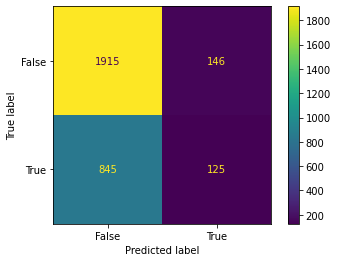

In [ ]:
# https://www.w3schools.com/python/python_ml_confusion_matrix.asp
#import matplotlib.pyplot as plt
#import numpy
#from sklearn import metrics

actual = ge19_test_raw['cat_bin_actual']
predicted = ge19_test_raw['cat_bin_predicted']

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
accuracy = metrics.accuracy_score(actual, predicted)
accuracy

0.673045199604091

In [ ]:
precision = metrics.precision_score(actual, predicted)
precision

0.4612546125461255

In [ ]:
sensitivity_recall = metrics.recall_score(actual, predicted)
sensitivity_recall

0.12886597938144329

In [ ]:
specificity = metrics.recall_score(actual, predicted, pos_label=0)
specificity

0.9291606016496846

In [ ]:
F1_score = metrics.f1_score(actual, predicted)
F1_score

0.20145044319097502

In [ ]:
#metrics
print({"Accuracy":accuracy,"Precision":precision,
       "Sensitivity_recall":sensitivity_recall,
       "Specificity":specificity,
       "F1_score":F1_score})

{'Accuracy': 0.673045199604091, 'Precision': 0.4612546125461255, 'Sensitivity_recall': 0.12886597938144329, 'Specificity': 0.9291606016496846, 'F1_score': 0.20145044319097502}


### TEST GE2019 INDEZES CONFUSION MATRIX

In [ ]:
# df1 enthält die Topicnummern und ihre Bezeichnungen
df1 =  train_h19_model_topics[['Topic','Name']]
df1

Topic                                               Name
0      -1                       -1_deutschland_immer_spd_afd
1       0                          0_vögel_danke_wünsche_nix
2       1                  1_demokratie_wahl_parteien_partei
3       2                        2_hass_respekt_lügt_meinung
4       3                           3_erster_energie_the_och
5       4                            4_grünen_grüne_grün_rot
6       5                    5_kirchen_kirche_religion_geist
7       6            6_deutschland_deutschen_deutsche_berlin
8       7                     7_muslime_moslems_akbar_allahu
9       8             8_flüchtlinge_migranten_asyl_migration
10      9          9_vergewaltigt_mädchen_jährige_nigerianer
11     10                  10_kinder_schule_volkslehrer_kind
12     11         11_medien_journalisten_journalismus_presse
13     12                  12_tweet_twitter_account_twittern
14     13              13_essen_fressen_frosch_gammelfleisch
15     14        14_polizisten_polizei_abschiebungen_beamten
16     15     15_mitarbeiter_betroffen_mitarbeitern_schließt
17     16                 16_nazis_nazi_braunen_innenstädten
18     17         17_klimawandel_klima_erwärmung_klimaschutz
19     18               18_flüchtlinge_deutschland_euro_jahr
20     19                    19_video_youtube_videos_trailer
21     20                       20_zeiten_immer_schritt_mohr
22     21                  21_syrer_syrische_iraker_jährigen
23     22                   22_strom_autos_auto_elektroautos
24     23                 23_bilder_bild_editorial_paragraph
25     24                    24_bendit_cohn_daniel_spieglein
26     25             25_netz_speichern_speichert_ausgemacht
27     26           26_rassistisch_weiß_rassismus_anzufangen
28     27                       27_euro_kredite_audi_bargeld
29     28                   28_mord_skalpieren_fällt_notwehr
30     29                29_land_landteil_beginnen_vaterland
31     30                 30_clans_kriminelle_hinweis_begeht
32     31          31_italien_salvini_italienische_italiener
33     32              32_islam_deutschland_muslime_deutsche
34     33                 33_rebecca_instagram_endlich_sucht
35     34            34_österreich_europawahl_westen_gewinnt
36     35            35_afrika_herrenrasse_albert_schweitzer
37     36      36_merkel_hinterlässt_geigenkonzert_sauereien
38     37                  37_polizei_berliner_endlich_sucht
39     38                    38_stadt_straße_ückendorf_einst
40     39                39_milliarden_rente_rechnungen_robo
41     40             40_lieber_regierung_fastenbrechen_kern
42     41        41_propaganda_android_anstrengung_empfohlen
43     42                      42_hollywood_obm_kino_görlitz
44     43                          43_teil_satire_lach_humor
45     44                44_türken_türkei_türkischer_arabien
46     45      45_darpa_militärische_alliierten_umfangreiche
47     46             46_berlin_flughafen_amerika_hauptstadt
48     47           47_sundance_justnobody_löschung_bescheid
49     48                        48_fußball_liga_zwölf_sport
50     49  49_sozialismus_marktwirtschaft_soziale_kapital...
51     50                    50_grünen_deutschland_pro_grüne
52     51               51_russland_russische_putin_wladimir
53     52                  52_traum_hals_eigenheim_zugewinne
54     53            53_explosion_einsatz_zerstört_linköping
55     54                  54_schulen_bestimmt_berlin_rechts

In [ ]:
ge19_test_pred_values_true_pos['Topic'] = ge19_test_pred_values_true_pos.index
ge19_test_pred_values_true_pos

pred  percent  Topic
-1     68     54.4     -1
 16    12      9.6     16
 0      8      6.4      0
 2      6      4.8      2
 8      4      3.2      8
 1      4      3.2      1
 13     4      3.2     13
 7      3      2.4      7
 9      3      2.4      9
 24     2      1.6     24
 43     1      0.8     43
 26     1      0.8     26
 11     1      0.8     11
 18     1      0.8     18
 39     1      0.8     39
 38     1      0.8     38
 5      1      0.8      5
 30     1      0.8     30
 4      1      0.8      4
 28     1      0.8     28
 12     1      0.8     12

In [ ]:
# df2 bis df5 enthalten Vorhersagen, Topicanteile in Prozent sowie die Topicnr.
# dabei werden die Spalten umbenannt, damit es später beim Zusammenfügen nicht
# zu Doppelungen kommt
df2 = ge19_test_pred_values_true_pos 
df2 = df2.rename(columns={'pred':'predGE19TP', 'percent':'%GE19TP', 'Topic':'Topic'})

In [ ]:
ge19_test_pred_values_false_pos['Topic'] = ge19_test_pred_values_false_pos.index
ge19_test_pred_values_false_pos

pred    percent  Topic
-1     90  61.643836     -1
 0     15  10.273973      0
 1      3   2.054795      1
 26     3   2.054795     26
 16     3   2.054795     16
 12     3   2.054795     12
 2      3   2.054795      2
 24     2   1.369863     24
 29     2   1.369863     29
 27     2   1.369863     27
 10     2   1.369863     10
 7      2   1.369863      7
 3      2   1.369863      3
 42     1   0.684932     42
 25     1   0.684932     25
 19     1   0.684932     19
 6      1   0.684932      6
 18     1   0.684932     18
 9      1   0.684932      9
 20     1   0.684932     20
 39     1   0.684932     39
 36     1   0.684932     36
 43     1   0.684932     43
 14     1   0.684932     14
 8      1   0.684932      8
 38     1   0.684932     38
 22     1   0.684932     22

In [ ]:
df3 = ge19_test_pred_values_false_pos
df3 = df3.rename(columns={'pred':'predGE19FP', 'percent':'%GE19FP', 'Topic':'Topic'})

In [ ]:
ge19_test_pred_values_true_neg['Topic'] = ge19_test_pred_values_true_neg.index
ge19_test_pred_values_true_neg

pred    percent  Topic
-1   1098  57.336815     -1
 0    249  13.002611      0
 1     68   3.550914      1
 12    59   3.080940     12
 2     36   1.879896      2
 16    27   1.409922     16
 13    25   1.305483     13
 17    23   1.201044     17
 49    22   1.148825     49
 26    21   1.096606     26
 10    18   0.939948     10
 5     17   0.887728      5
 15    16   0.835509     15
 7     16   0.835509      7
 8     16   0.835509      8
 22    15   0.783290     22
 39    14   0.731070     39
 11    14   0.731070     11
 28    10   0.522193     28
 3     10   0.522193      3
 29    10   0.522193     29
 14    10   0.522193     14
 44     9   0.469974     44
 23     9   0.469974     23
 19     7   0.365535     19
 25     7   0.365535     25
 45     6   0.313316     45
 24     6   0.313316     24
 4      6   0.313316      4
 43     6   0.313316     43
 32     5   0.261097     32
 38     5   0.261097     38
 9      5   0.261097      9
 18     5   0.261097     18
 6      4   0.208877      6
 30     4   0.208877     30
 36     4   0.208877     36
 34     3   0.156658     34
 47     3   0.156658     47
 20     3   0.156658     20
 41     3   0.156658     41
 27     3   0.156658     27
 42     3   0.156658     42
 31     2   0.104439     31
 35     2   0.104439     35
 48     2   0.104439     48
 53     2   0.104439     53
 51     2   0.104439     51
 40     1   0.052219     40
 52     1   0.052219     52
 33     1   0.052219     33
 21     1   0.052219     21
 37     1   0.052219     37

In [ ]:
df4 = ge19_test_pred_values_true_neg
df4 = df4.rename(columns={'pred':'predGE19TN', 'percent':'%GE19TN', 'Topic':'Topic'})

In [ ]:
ge19_test_pred_values_false_neg['Topic'] = ge19_test_pred_values_false_neg.index
ge19_test_pred_values_false_neg

pred    percent  Topic
-1    513  60.710059     -1
 0     50   5.917160      0
 1     35   4.142012      1
 2     31   3.668639      2
 16    24   2.840237     16
 8     15   1.775148      8
 11    12   1.420118     11
 12    11   1.301775     12
 7     10   1.183432      7
 4     10   1.183432      4
 26     9   1.065089     26
 14     8   0.946746     14
 10     8   0.946746     10
 13     8   0.946746     13
 36     7   0.828402     36
 43     6   0.710059     43
 15     6   0.710059     15
 9      6   0.710059      9
 18     6   0.710059     18
 39     5   0.591716     39
 6      5   0.591716      6
 5      5   0.591716      5
 32     5   0.591716     32
 35     4   0.473373     35
 3      4   0.473373      3
 23     4   0.473373     23
 19     4   0.473373     19
 30     4   0.473373     30
 29     4   0.473373     29
 28     3   0.355030     28
 24     3   0.355030     24
 49     3   0.355030     49
 17     2   0.236686     17
 37     2   0.236686     37
 42     2   0.236686     42
 48     2   0.236686     48
 22     2   0.236686     22
 25     1   0.118343     25
 50     1   0.118343     50
 40     1   0.118343     40
 21     1   0.118343     21
 52     1   0.118343     52
 38     1   0.118343     38
 44     1   0.118343     44

In [ ]:
df5 = ge19_test_pred_values_false_neg
df5 = df5.rename(columns={'pred':'predGE19FN', 'percent':'%GE19FN', 'Topic':'Topic'})

In [ ]:
# https://stackoverflow.com/questions/44327999/how-to-merge-multiple-dataframes
from functools import reduce

data_frames = [df1, df2, df3, df4, df5]
df_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_merged[['%GE19TP', '%GE19TN','%GE19FP', '%GE19FN']] = df_merged[['%GE19TP', '%GE19TN','%GE19FP', '%GE19FN']].astype(float).round(2)
df_merged
#df_to_round = df_merged[['%GE19', '%GE19','%H19', '%H20']]
#df_to_round = df_to_round[['%GE19', '%GE19','%H19', '%H20']].round(2)
#df_to_round

Topic                                               Name predGE19TP  \
0      -1                       -1_deutschland_immer_spd_afd       68.0   
1       0                          0_vögel_danke_wünsche_nix        8.0   
2       1                  1_demokratie_wahl_parteien_partei        4.0   
3       2                        2_hass_respekt_lügt_meinung        6.0   
4       3                           3_erster_energie_the_och          0   
5       4                            4_grünen_grüne_grün_rot        1.0   
6       5                    5_kirchen_kirche_religion_geist        1.0   
7       6            6_deutschland_deutschen_deutsche_berlin          0   
8       7                     7_muslime_moslems_akbar_allahu        3.0   
9       8             8_flüchtlinge_migranten_asyl_migration        4.0   
10      9          9_vergewaltigt_mädchen_jährige_nigerianer        3.0   
11     10                  10_kinder_schule_volkslehrer_kind          0   
12     11         11_medien_journalisten_journalismus_presse        1.0   
13     12                  12_tweet_twitter_account_twittern        1.0   
14     13              13_essen_fressen_frosch_gammelfleisch        4.0   
15     14        14_polizisten_polizei_abschiebungen_beamten          0   
16     15     15_mitarbeiter_betroffen_mitarbeitern_schließt          0   
17     16                 16_nazis_nazi_braunen_innenstädten       12.0   
18     17         17_klimawandel_klima_erwärmung_klimaschutz          0   
19     18               18_flüchtlinge_deutschland_euro_jahr        1.0   
20     19                    19_video_youtube_videos_trailer          0   
21     20                       20_zeiten_immer_schritt_mohr          0   
22     21                  21_syrer_syrische_iraker_jährigen          0   
23     22                   22_strom_autos_auto_elektroautos          0   
24     23                 23_bilder_bild_editorial_paragraph          0   
25     24                    24_bendit_cohn_daniel_spieglein        2.0   
26     25             25_netz_speichern_speichert_ausgemacht          0   
27     26           26_rassistisch_weiß_rassismus_anzufangen        1.0   
28     27                       27_euro_kredite_audi_bargeld          0   
29     28                   28_mord_skalpieren_fällt_notwehr        1.0   
30     29                29_land_landteil_beginnen_vaterland          0   
31     30                 30_clans_kriminelle_hinweis_begeht        1.0   
32     31          31_italien_salvini_italienische_italiener          0   
33     32              32_islam_deutschland_muslime_deutsche          0   
34     33                 33_rebecca_instagram_endlich_sucht          0   
35     34            34_österreich_europawahl_westen_gewinnt          0   
36     35            35_afrika_herrenrasse_albert_schweitzer          0   
37     36      36_merkel_hinterlässt_geigenkonzert_sauereien          0   
38     37                  37_polizei_berliner_endlich_sucht          0   
39     38                    38_stadt_straße_ückendorf_einst        1.0   
40     39                39_milliarden_rente_rechnungen_robo        1.0   
41     40             40_lieber_regierung_fastenbrechen_kern          0   
42     41        41_propaganda_android_anstrengung_empfohlen          0   
43     42                      42_hollywood_obm_kino_görlitz          0   
44     43                          43_teil_satire_lach_humor        1.0   
45     44                44_türken_türkei_türkischer_arabien          0   
46     45      45_darpa_militärische_alliierten_umfangreiche          0   
47     46             46_berlin_flughafen_amerika_hauptstadt          0   
48     47           47_sundance_justnobody_löschung_bescheid          0   
49     48                        48_fußball_liga_zwölf_sport          0   
50     49  49_sozialismus_marktwirtschaft_soziale_kapital...          0   
51     50                    50_grünen_deutschland_pro_grüne          0   
52     51               51_ru

In [ ]:
df_merged

Topic                                               Name predGE19TP  \
0      -1                       -1_deutschland_immer_spd_afd       68.0   
1       0                          0_vögel_danke_wünsche_nix        8.0   
2       1                  1_demokratie_wahl_parteien_partei        4.0   
3       2                        2_hass_respekt_lügt_meinung        6.0   
4       3                           3_erster_energie_the_och          0   
5       4                            4_grünen_grüne_grün_rot        1.0   
6       5                    5_kirchen_kirche_religion_geist        1.0   
7       6            6_deutschland_deutschen_deutsche_berlin          0   
8       7                     7_muslime_moslems_akbar_allahu        3.0   
9       8             8_flüchtlinge_migranten_asyl_migration        4.0   
10      9          9_vergewaltigt_mädchen_jährige_nigerianer        3.0   
11     10                  10_kinder_schule_volkslehrer_kind          0   
12     11         11_medien_journalisten_journalismus_presse        1.0   
13     12                  12_tweet_twitter_account_twittern        1.0   
14     13              13_essen_fressen_frosch_gammelfleisch        4.0   
15     14        14_polizisten_polizei_abschiebungen_beamten          0   
16     15     15_mitarbeiter_betroffen_mitarbeitern_schließt          0   
17     16                 16_nazis_nazi_braunen_innenstädten       12.0   
18     17         17_klimawandel_klima_erwärmung_klimaschutz          0   
19     18               18_flüchtlinge_deutschland_euro_jahr        1.0   
20     19                    19_video_youtube_videos_trailer          0   
21     20                       20_zeiten_immer_schritt_mohr          0   
22     21                  21_syrer_syrische_iraker_jährigen          0   
23     22                   22_strom_autos_auto_elektroautos          0   
24     23                 23_bilder_bild_editorial_paragraph          0   
25     24                    24_bendit_cohn_daniel_spieglein        2.0   
26     25             25_netz_speichern_speichert_ausgemacht          0   
27     26           26_rassistisch_weiß_rassismus_anzufangen        1.0   
28     27                       27_euro_kredite_audi_bargeld          0   
29     28                   28_mord_skalpieren_fällt_notwehr        1.0   
30     29                29_land_landteil_beginnen_vaterland          0   
31     30                 30_clans_kriminelle_hinweis_begeht        1.0   
32     31          31_italien_salvini_italienische_italiener          0   
33     32              32_islam_deutschland_muslime_deutsche          0   
34     33                 33_rebecca_instagram_endlich_sucht          0   
35     34            34_österreich_europawahl_westen_gewinnt          0   
36     35            35_afrika_herrenrasse_albert_schweitzer          0   
37     36      36_merkel_hinterlässt_geigenkonzert_sauereien          0   
38     37                  37_polizei_berliner_endlich_sucht          0   
39     38                    38_stadt_straße_ückendorf_einst        1.0   
40     39                39_milliarden_rente_rechnungen_robo        1.0   
41     40             40_lieber_regierung_fastenbrechen_kern          0   
42     41        41_propaganda_android_anstrengung_empfohlen          0   
43     42                      42_hollywood_obm_kino_görlitz          0   
44     43                          43_teil_satire_lach_humor        1.0   
45     44                44_türken_türkei_türkischer_arabien          0   
46     45      45_darpa_militärische_alliierten_umfangreiche          0   
47     46             46_berlin_flughafen_amerika_hauptstadt          0   
48     47           47_sundance_justnobody_löschung_bescheid          0   
49     48                        48_fußball_liga_zwölf_sport          0   
50     49  49_sozialismus_marktwirtschaft_soziale_kapital...          0   
51     50                    50_grünen_deutschland_pro_grüne          0   
52     51               51_ru

In [ ]:
# https://stackoverflow.com/questions/15891038/change-column-type-in-pandas
# Die Anzahlen der vorhergesagten Topics werden in int umgewandelt
df_merged = df_merged.astype({"predGE19TP": int, "predGE19TN":int, "predGE19FP":int, "predGE19FN":int})
df_merged

Topic                                               Name  predGE19TP  \
0      -1                       -1_deutschland_immer_spd_afd          68   
1       0                          0_vögel_danke_wünsche_nix           8   
2       1                  1_demokratie_wahl_parteien_partei           4   
3       2                        2_hass_respekt_lügt_meinung           6   
4       3                           3_erster_energie_the_och           0   
5       4                            4_grünen_grüne_grün_rot           1   
6       5                    5_kirchen_kirche_religion_geist           1   
7       6            6_deutschland_deutschen_deutsche_berlin           0   
8       7                     7_muslime_moslems_akbar_allahu           3   
9       8             8_flüchtlinge_migranten_asyl_migration           4   
10      9          9_vergewaltigt_mädchen_jährige_nigerianer           3   
11     10                  10_kinder_schule_volkslehrer_kind           0   
12     11         11_medien_journalisten_journalismus_presse           1   
13     12                  12_tweet_twitter_account_twittern           1   
14     13              13_essen_fressen_frosch_gammelfleisch           4   
15     14        14_polizisten_polizei_abschiebungen_beamten           0   
16     15     15_mitarbeiter_betroffen_mitarbeitern_schließt           0   
17     16                 16_nazis_nazi_braunen_innenstädten          12   
18     17         17_klimawandel_klima_erwärmung_klimaschutz           0   
19     18               18_flüchtlinge_deutschland_euro_jahr           1   
20     19                    19_video_youtube_videos_trailer           0   
21     20                       20_zeiten_immer_schritt_mohr           0   
22     21                  21_syrer_syrische_iraker_jährigen           0   
23     22                   22_strom_autos_auto_elektroautos           0   
24     23                 23_bilder_bild_editorial_paragraph           0   
25     24                    24_bendit_cohn_daniel_spieglein           2   
26     25             25_netz_speichern_speichert_ausgemacht           0   
27     26           26_rassistisch_weiß_rassismus_anzufangen           1   
28     27                       27_euro_kredite_audi_bargeld           0   
29     28                   28_mord_skalpieren_fällt_notwehr           1   
30     29                29_land_landteil_beginnen_vaterland           0   
31     30                 30_clans_kriminelle_hinweis_begeht           1   
32     31          31_italien_salvini_italienische_italiener           0   
33     32              32_islam_deutschland_muslime_deutsche           0   
34     33                 33_rebecca_instagram_endlich_sucht           0   
35     34            34_österreich_europawahl_westen_gewinnt           0   
36     35            35_afrika_herrenrasse_albert_schweitzer           0   
37     36      36_merkel_hinterlässt_geigenkonzert_sauereien           0   
38     37                  37_polizei_berliner_endlich_sucht           0   
39     38                    38_stadt_straße_ückendorf_einst           1   
40     39                39_milliarden_rente_rechnungen_robo           1   
41     40             40_lieber_regierung_fastenbrechen_kern           0   
42     41        41_propaganda_android_anstrengung_empfohlen           0   
43     42                      42_hollywood_obm_kino_görlitz           0   
44     43                          43_teil_satire_lach_humor           1   
45     44                44_türken_türkei_türkischer_arabien           0   
46     45      45_darpa_militärische_alliierten_umfangreiche           0   
47     46             46_berlin_flughafen_amerika_hauptstadt           0   
48     47           47_sundance_justnobody_löschung_bescheid           0   
49     48                        48_fußball_liga_zwölf_sport           0   
50     49  49_sozialismus_marktwirtschaft_soziale_kapital...           0   
51     50                    50_grünen_deutschland_p

In [ ]:
df_percent = df_merged[['Topic','%GE19TP', '%GE19TN','%GE19FP', '%GE19FN','Name']]
df_percent

Topic  %GE19TP  %GE19TN  %GE19FP  %GE19FN  \
0      -1     54.4    57.34    61.64    60.71   
1       0      6.4    13.00    10.27     5.92   
2       1      3.2     3.55     2.05     4.14   
3       2      4.8     1.88     2.05     3.67   
4       3      0.0     0.52     1.37     0.47   
5       4      0.8     0.31     0.00     1.18   
6       5      0.8     0.89     0.00     0.59   
7       6      0.0     0.21     0.68     0.59   
8       7      2.4     0.84     1.37     1.18   
9       8      3.2     0.84     0.68     1.78   
10      9      2.4     0.26     0.68     0.71   
11     10      0.0     0.94     1.37     0.95   
12     11      0.8     0.73     0.00     1.42   
13     12      0.8     3.08     2.05     1.30   
14     13      3.2     1.31     0.00     0.95   
15     14      0.0     0.52     0.68     0.95   
16     15      0.0     0.84     0.00     0.71   
17     16      9.6     1.41     2.05     2.84   
18     17      0.0     1.20     0.00     0.24   
19     18      0.8     0.26     0.68     0.71   
20     19      0.0     0.37     0.68     0.47   
21     20      0.0     0.16     0.68     0.00   
22     21      0.0     0.05     0.00     0.12   
23     22      0.0     0.78     0.68     0.24   
24     23      0.0     0.47     0.00     0.47   
25     24      1.6     0.31     1.37     0.36   
26     25      0.0     0.37     0.68     0.12   
27     26      0.8     1.10     2.05     1.07   
28     27      0.0     0.16     1.37     0.00   
29     28      0.8     0.52     0.00     0.36   
30     29      0.0     0.52     1.37     0.47   
31     30      0.8     0.21     0.00     0.47   
32     31      0.0     0.10     0.00     0.00   
33     32      0.0     0.26     0.00     0.59   
34     33      0.0     0.05     0.00     0.00   
35     34      0.0     0.16     0.00     0.00   
36     35      0.0     0.10     0.00     0.47   
37     36      0.0     0.21     0.68     0.83   
38     37      0.0     0.05     0.00     0.24   
39     38      0.8     0.26     0.68     0.12   
40     39      0.8     0.73     0.68     0.59   
41     40      0.0     0.05     0.00     0.12   
42     41      0.0     0.16     0.00     0.00   
43     42      0.0     0.16     0.68     0.24   
44     43      0.8     0.31     0.68     0.71   
45     44      0.0     0.47     0.00     0.12   
46     45      0.0     0.31     0.00     0.00   
47     46      0.0     0.00     0.00     0.00   
48     47      0.0     0.16     0.00     0.00   
49     48      0.0     0.10     0.00     0.24   
50     49      0.0     1.15     0.00     0.36   
51     50      0.0     0.00     0.00     0.12   
52     51      0.0     0.10     0.00     0.00   
53     52      0.0     0.05     0.00     0.12   
54     53      0.0     0.10     0.00     0.00   
55     54      0.0     0.00     0.00     0.00   

                                                 Name  
0                        -1_deutschland_immer_spd_afd  
1                           0_vögel_danke_wünsche_nix  
2                   1_demokratie_wahl_parteien_partei  
3                         2_hass_respekt_lügt_meinung  
4                            3_erster_energie_the_och  
5                             4_grünen_grüne_grün_rot  
6                     5_kirchen_kirche_religion_geist  
7             6_deutschland_deutschen_deutsche_berlin  
8                      7_muslime_moslems_akbar_allahu  
9              8_flüchtlinge_migranten_asyl_migration  
10          9_vergewaltigt_mädchen_jährige_nigerianer  
11                  10_kinder_schule_volkslehrer_kind  
12         11_medien_journalisten_journalismus_presse  
13                  12_tweet_twitter_account_twittern  
14              13_essen_fressen_frosch_gammelfleisch  
15        14_polizisten_polizei_abschiebungen_beamten  
16     15_mitarbeiter_betroffen_mitarbeitern_schließt  
17                 16_nazis_nazi_braunen_innenstädten  
18         17_klimawandel_klima_erwärmung_klimaschutz  
19               18_flüchtlinge_deutschland_euro_jahr  
20                    19_video_you

In [ ]:
test_ge19_df_percent_plt_CONF_MATRIX = df_percent.set_index('Name')

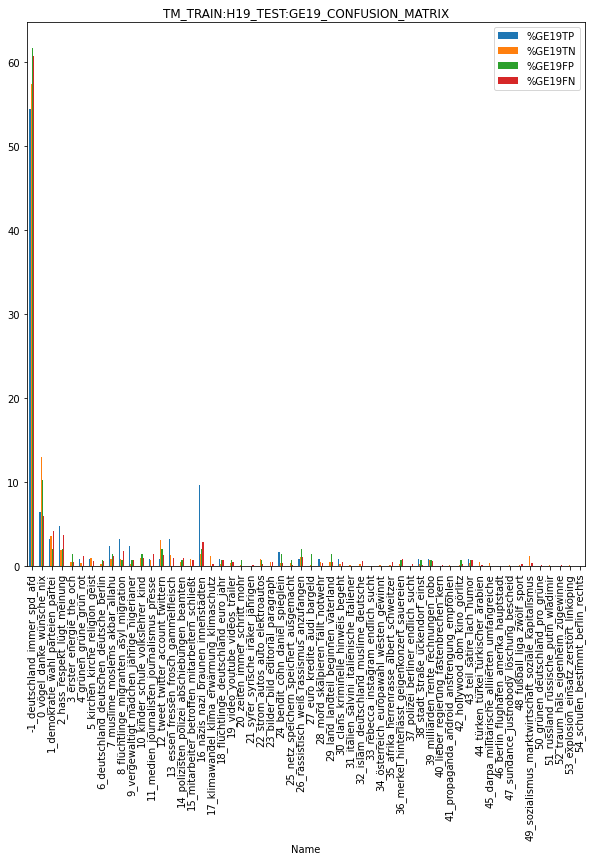

In [ ]:
test_ge19_df_percent_plt_CONF_MATRIX.plot(y=['%GE19TP', '%GE19TN','%GE19FP', '%GE19FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:H19_TEST:GE19_CONFUSION_MATRIX")

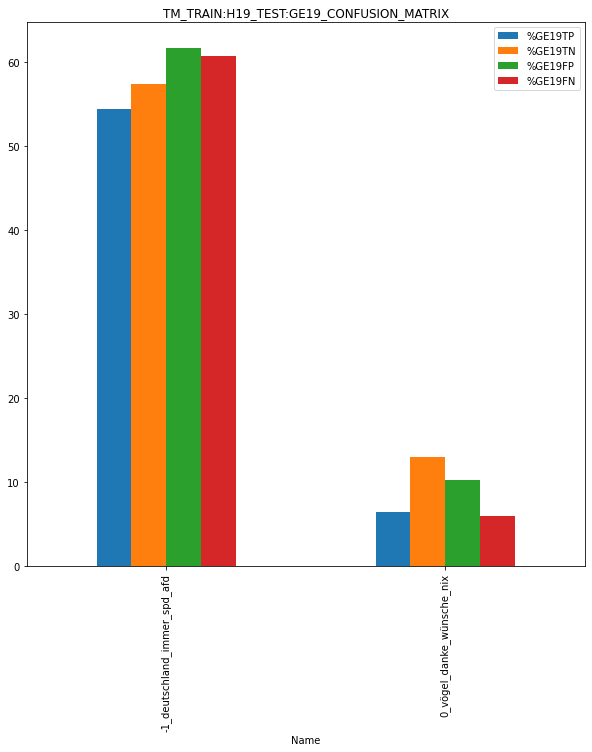

In [ ]:
test_ge19_df_percent_plt_CONF_MATRIX[0:2].plot(y=['%GE19TP', '%GE19TN','%GE19FP', '%GE19FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:H19_TEST:GE19_CONFUSION_MATRIX")

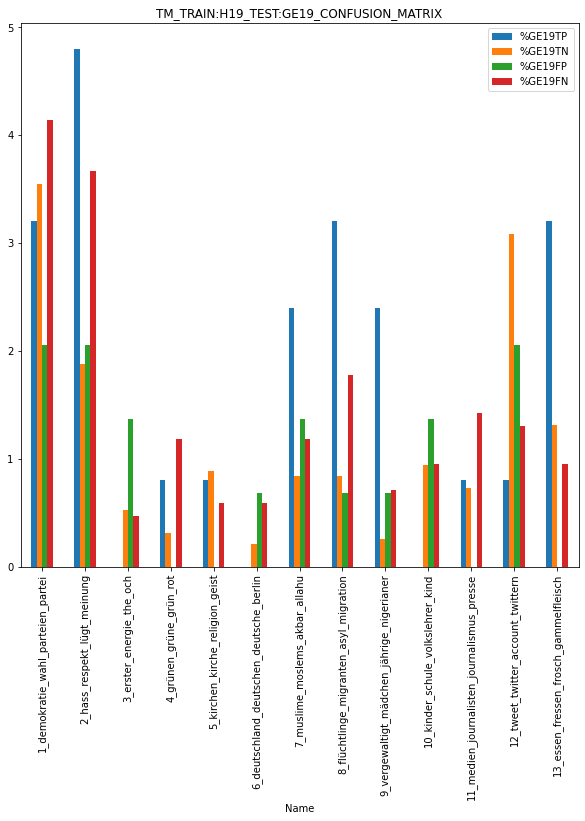

In [ ]:
test_ge19_df_percent_plt_CONF_MATRIX[2:15].plot(y=['%GE19TP', '%GE19TN','%GE19FP', '%GE19FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:H19_TEST:GE19_CONFUSION_MATRIX")

In [ ]:
#test_ge19_df_percent_plt_CONF_MATRIX[15:].plot(y=['%GE19TP', '%GE19TN','%GE19FP', '%GE19FN'], 
#                                            kind="bar",figsize=(10, 10), 
#                                            title = 
#                                            "TM_TRAIN:H19_TEST:GE19_CONFUSION_MATRIX")

### Test H2019

In [ ]:
train_h19_class_h19 = pd.read_csv('/content/NSIT_submission_DE_A_HASOC2019.csv')
train_h19_class_h19


task1
0        1
1        1
2        1
3        1
4        0
..     ...
845      1
846      1
847      1
848      1
849      1

[850 rows x 1 columns]

In [ ]:
train_h19_class_h19['task1'] = train_h19_class_h19['task1'].map({0: 1, 1: 0}).astype(int)
train_h19_class_h19

task1
0        0
1        0
2        0
3        0
4        1
..     ...
845      0
846      0
847      0
848      0
849      0

[850 rows x 1 columns]

In [ ]:
h19_test_class_values = pd.DataFrame(train_h19_class_h19['task1'].value_counts())
h19_test_class_values

task1
0    790
1     60

In [ ]:

h19_test_raw['class'] = train_h19_class_h19['task1']
h19_test_raw

text_id                                               text task_1  \
0    hasoc_de_5270  Die Grüne Intelligenz Bestie 'Eckhardt', Prang...    HOF   
1    hasoc_de_5271  Das Deutschlandlied,  Sinn und Unsinn  https:/...    NOT   
2    hasoc_de_5272               #Eurovision  https://t.co/24T8fzUI44    NOT   
3    hasoc_de_5273  Unsere ESC Kandidatinnen haben selbst Schuld a...    HOF   
4    hasoc_de_5274  Scheinbar bekommt Sarah's Conner's Sohn Vincen...    HOF   
..             ...                                                ...    ...   
845  hasoc_de_6115  #Erdogan ruft seine Mops wegen Untauglichkeit ...    HOF   
846  hasoc_de_6116  Ich würde der Linken Chefin Kipping die 1.000 ...    HOF   
847  hasoc_de_6117  Ausländer sind Top &amp; Trumpf  Schon aufgefa...    HOF   
848  hasoc_de_6118  Wie der Regierungsjet die Regierungsflieger wi...    HOF   
849  hasoc_de_6120  #guteMütter  sind heutzutage gut ausgebildete ...    NOT   

    task_2  pred  class  cat_bin_actual  cat_bin_predicted  
0     HATE     5      0               1                  1  
1     NONE     6      0               0                  0  
2     NONE     3      0               0                  0  
3     OFFN    -1      0               1                  0  
4     OFFN    -1      1               1                  0  
..     ...   ...    ...             ...                ...  
845   OFFN    -1      0               1                  0  
846   OFFN    13      0               1                  0  
847   OFFN    -1      0               1                  0  
848   OFFN    -1      0               1                  0  
849   NONE    10      0               0                  0  

[850 rows x 8 columns]

In [ ]:
# https://stackoverflow.com/questions/41691081/pandas-use-and-operator-in-loc-function
h19_test_true_pos = h19_test_raw.loc[(h19_test_raw['task_1'] == 'HOF') & (h19_test_raw['class'] == 1)]
h19_test_true_pos

text_id                                               text task_1  \
4    hasoc_de_5274  Scheinbar bekommt Sarah's Conner's Sohn Vincen...    HOF   
6    hasoc_de_5276  Du bist ein Rassist,Du erhöhst Dich über ander...    HOF   
77   hasoc_de_5347  Ich wäre auch für die Abschaffung von Plastikv...    HOF   
79   hasoc_de_5349  Deutsche Unternehmer haben sich eingearbeitet!...    HOF   
98   hasoc_de_5368  @Ungebeten1 Finde Homosexualität nicht 'gegen ...    HOF   
417  hasoc_de_5687  Heute sage ich, es war 89 falsch die Stasi-Unt...    HOF   
452  hasoc_de_5722  Was für eine armselige Kreatur! Kein Mitgefühl...    HOF   
609  hasoc_de_5879  'Wo sind die Kinder?“  “Auf der AfD-Demo: Stro...    HOF   
815  hasoc_de_6085  „Heute sind mutige Soldaten, mutige Patrioten,...    HOF   

    task_2  pred  class  cat_bin_actual  cat_bin_predicted  
4     OFFN    -1      1               1                  0  
6     OFFN    26      1               1                  1  
77    HATE     8      1               1                  0  
79    HATE    -1      1               1                  0  
98    HATE     9      1               1                  1  
417   PRFN    -1      1               1                  1  
452   OFFN    16      1               1                  1  
609   PRFN    -1      1               1                  1  
815   OFFN    16      1               1                  0

In [ ]:
h19_test_pred_values_true_pos = pd.DataFrame(h19_test_true_pos['pred'].value_counts())
h19_test_pred_values_true_pos['percent'] = (h19_test_pred_values_true_pos['pred'] / h19_test_pred_values_true_pos['pred'].sum()) * 100
h19_test_pred_values_true_pos

pred    percent
-1      4  44.444444
 16     2  22.222222
 26     1  11.111111
 8      1  11.111111
 9      1  11.111111

In [ ]:
h19_test_false_pos = h19_test_raw.loc[(h19_test_raw['task_1'] == 'NOT') & (h19_test_raw['class'] == 1)]
h19_test_false_pos

text_id                                               text task_1  \
30   hasoc_de_5300  Wieso ist eigentlich die Bevölkerungsschicht n...    NOT   
34   hasoc_de_5304  Dann scheint es ja den richtigen getroffen zu ...    NOT   
70   hasoc_de_5340  Abrüstung:die Anstalt!  Aus den Gewehrläufen m...    NOT   
80   hasoc_de_5350  Ich habe da mal eine Frage?  Hat schon mal ein...    NOT   
95   hasoc_de_5365  Lanz und Schröder auf der gleichen Welle,Popku...    NOT   
107  hasoc_de_5377  @BlondJedi @michaela_bogner @akk gute  frage.....    NOT   
114  hasoc_de_5384  @BlondJedi @akk Wie wäre es, mir weniger dumme...    NOT   
116  hasoc_de_5386             @BlondJedi @akk ... Wäre eine Maßnahme    NOT   
126  hasoc_de_5396  @BlondJedi @akk Bevor AKK Klarnamenpflicht for...    NOT   
137  hasoc_de_5407  @BlondJedi @akk Sowas gilt immer nur für die d...    NOT   
176  hasoc_de_5446  @Ralf64904117 Die sind so blöde 🤯🤯 es macht ei...    NOT   
177  hasoc_de_5447  2/2   voll umweltschädlich Mit ihrer narzissti...    NOT   
181  hasoc_de_5451  2/2  endgültig zur Strunzenddummheit verurteil...    NOT   
203  hasoc_de_5473  2/2  bei Aldi alles umpacken kann och der arme...    NOT   
213  hasoc_de_5483  2/3  Strafverfolgung führen........  Tja man s...    NOT   
223  hasoc_de_5493  @Ralf64904117 Hat die überhaupt ein anerkannte...    NOT   
252  hasoc_de_5522  @mainwasser Olaf hat das mit dem 'an sich glau...    NOT   
279  hasoc_de_5549  @Uwe_Junge_MdL Unsere Kinder würden uns euch N...    NOT   
287  hasoc_de_5557  @Uwe_Junge_MdL Unsere Nachfahren werden uns da...    NOT   
289  hasoc_de_5559  @Uwe_Junge_MdL Sie müssen jetzt ganz stark sei...    NOT   
340  hasoc_de_5610  Nahezu 1 Millionen alleinerziehende,leben in D...    NOT   
349  hasoc_de_5619  Prof. Heiner Flassbeck: 'Die SPD hat alles fal...    NOT   
352  hasoc_de_5622  @dreher_ingrid @Joerg_Meuthen Ja, da sind ganz...    NOT   
355  hasoc_de_5625  Vielen Dank, dass du mir geholfen hast, 100 Fo...    NOT   
389  hasoc_de_5659  ++ Wohlstandsvernichtung ohne Gnade: Geldtrans...    NOT   
400  hasoc_de_5670  Versteht einer der linken Pinsel den Satz über...    NOT   
404  hasoc_de_5674  Wir haben jetzt schon aufgrund der Energiewend...    NOT   
433  hasoc_de_5703  Am 14.10.2018 ist das alte, kluge Bayern gesto...    NOT   
444  hasoc_de_5714  ...und ist trotzdem Präsident geworden. Damals...    NOT   
448  hasoc_de_5718  Araber macht deutschen Polizisten eindrucksvol...    NOT   
454  hasoc_de_5724  Neuerdings sind RAF Tattoos der letzte Schrei ...    NOT   
459  hasoc_de_5729  https://t.co/IGk5NO2jCy  Ramadan gehört zu deu...    NOT   
468  hasoc_de_5738  Wenn Ostdeutschland so 'Nazi' ist, warum wande...    NOT   
491  hasoc_de_5761  Burkini und Vollverschleierung gehören in unse...    NOT   
500  hasoc_de_5770  #Wenn jeder 5. der SPD die Stimme geben würde,...    NOT   
520  hasoc_de_5790  Kleiner Hinweis an den neuen Außenminister, in...    NOT   
527  hasoc_de_5797  #Antifa-Idioten sind oft gescheiterte Existenz...    NOT   
535  hasoc_de_5805  Jamaika? Wollte sie.   GroKo? Will sie nun.   ...    NOT   
541  hasoc_de_5811  Na sowas?  Dalai Lama verbreitet AfD-Ansichten...    NOT   
556  hasoc_de_5826  Dem Teil der #87Prozent, der sich täglich zur ...    NOT   
591  hasoc_de_5861  #Gießen: 'Wunsch nach einer Beziehung muss seh...    NOT   
592  hasoc_de_5862  Vermummte Linksradikale haben in Berlin einen ...    NOT   
617  hasoc_de_5887  #Dresden Am Montag kam der unbegleitete Minder...    NOT   
631  hasoc_de_5901  @Uwe_Junge_MdL Dann kann man ja nur hoffen. Mi...    NOT   
697  hasoc_de_5967  @Uwe_Junge_MdL Nur dumm, dass es keine muslimi...    NOT   
701  hasoc_de_5971  @Uwe_Junge_MdL Von eurer Hetze und homophoben ...    NOT   
705  hasoc_de_5975  @Uwe_Junge_MdL Erzähl mir mehr davon, wie du d...    NOT   
714  hasoc_de_5984  @Uwe_Junge_MdL Feindlichkeit gegen Homosexuali...    NOT   
722  hasoc_de_5992  @Uwe_Junge_MdL Und wenn du nicht endlich dein ...    NOT   
723  hasoc_

In [ ]:
h19_test_pred_values_false_pos = pd.DataFrame(h19_test_false_pos['pred'].value_counts())
h19_test_pred_values_false_pos['percent'] = (h19_test_pred_values_false_pos['pred'] / h19_test_pred_values_false_pos['pred'].sum()) * 100
h19_test_pred_values_false_pos

pred    percent
-1     23  45.098039
 0      5   9.803922
 16     4   7.843137
 1      3   5.882353
 9      3   5.882353
 39     2   3.921569
 21     2   3.921569
 10     1   1.960784
 46     1   1.960784
 18     1   1.960784
 27     1   1.960784
 37     1   1.960784
 38     1   1.960784
 35     1   1.960784
 26     1   1.960784
 15     1   1.960784

In [ ]:
h19_test_true_neg = h19_test_raw.loc[(h19_test_raw['task_1'] == 'NOT') & (h19_test_raw['class'] == 0)]
h19_test_true_neg

text_id                                               text task_1  \
1    hasoc_de_5271  Das Deutschlandlied,  Sinn und Unsinn  https:/...    NOT   
2    hasoc_de_5272               #Eurovision  https://t.co/24T8fzUI44    NOT   
7    hasoc_de_5277  Und genau das macht er und lässt sich Scheiden...    NOT   
8    hasoc_de_5278  Dann wird das Konto gesperrt und Du musst wied...    NOT   
9    hasoc_de_5279         Dann bleib Single! https://t.co/TOP0spaU01    NOT   
..             ...                                                ...    ...   
836  hasoc_de_6106  @Uwe_Junge_MdL Ach Junge, hast Du Angst, dass ...    NOT   
837  hasoc_de_6107  @Uwe_Junge_MdL @Beatrix_vStorch  @lsvd  @Nicol...    NOT   
838  hasoc_de_6108  @Uwe_Junge_MdL Ihr streitet es zwar immer ab, ...    NOT   
840  hasoc_de_6110                                   @Uwe_Junge_MdL 🤣    NOT   
849  hasoc_de_6120  #guteMütter  sind heutzutage gut ausgebildete ...    NOT   

    task_2  pred  class  cat_bin_actual  cat_bin_predicted  
1     NONE     6      0               0                  0  
2     NONE     3      0               0                  0  
7     NONE    -1      0               0                  0  
8     NONE    -1      0               0                  0  
9     NONE     0      0               0                  0  
..     ...   ...    ...             ...                ...  
836   NONE    -1      0               0                  1  
837   NONE    -1      0               0                  0  
838   NONE     7      0               0                  1  
840   NONE     3      0               0                  0  
849   NONE    10      0               0                  0  

[663 rows x 8 columns]

In [ ]:
h19_test_pred_values_true_neg = pd.DataFrame(h19_test_true_neg['pred'].value_counts())
h19_test_pred_values_true_neg['percent'] = (h19_test_pred_values_true_neg['pred'] / h19_test_pred_values_true_neg['pred'].sum()) * 100
h19_test_pred_values_true_neg

pred    percent
-1    312  47.058824
 0     61   9.200603
 3     53   7.993967
 8     26   3.921569
 1     23   3.469080
 9     17   2.564103
 18    12   1.809955
 12    10   1.508296
 7     10   1.508296
 10     9   1.357466
 6      8   1.206637
 51     7   1.055807
 16     7   1.055807
 11     7   1.055807
 36     7   1.055807
 39     6   0.904977
 17     6   0.904977
 2      6   0.904977
 4      6   0.904977
 49     6   0.904977
 15     5   0.754148
 13     5   0.754148
 25     4   0.603318
 28     4   0.603318
 23     4   0.603318
 22     3   0.452489
 14     3   0.452489
 21     3   0.452489
 24     3   0.452489
 38     3   0.452489
 29     3   0.452489
 44     3   0.452489
 33     2   0.301659
 34     2   0.301659
 31     2   0.301659
 50     2   0.301659
 5      2   0.301659
 32     2   0.301659
 37     1   0.150830
 26     1   0.150830
 54     1   0.150830
 43     1   0.150830
 19     1   0.150830
 30     1   0.150830
 27     1   0.150830
 35     1   0.150830
 20     1   0.150830

In [ ]:
h19_test_false_neg = h19_test_raw.loc[(h19_test_raw['task_1'] == 'HOF') & (h19_test_raw['class'] == 0)]
h19_test_false_neg

text_id                                               text task_1  \
0    hasoc_de_5270  Die Grüne Intelligenz Bestie 'Eckhardt', Prang...    HOF   
3    hasoc_de_5273  Unsere ESC Kandidatinnen haben selbst Schuld a...    HOF   
5    hasoc_de_5275  #Bundeswehr  erst überzeugen Politische Linke,...    HOF   
41   hasoc_de_5311  Lanz und Schwarzer,  neuerdings AfD Befürworte...    HOF   
46   hasoc_de_5316  @MichaelaKorte @chris_hiv @derCharlie_ @scheid...    HOF   
..             ...                                                ...    ...   
844  hasoc_de_6114  Der/die/das große E ruft seine Mops wegen Unta...    HOF   
845  hasoc_de_6115  #Erdogan ruft seine Mops wegen Untauglichkeit ...    HOF   
846  hasoc_de_6116  Ich würde der Linken Chefin Kipping die 1.000 ...    HOF   
847  hasoc_de_6117  Ausländer sind Top &amp; Trumpf  Schon aufgefa...    HOF   
848  hasoc_de_6118  Wie der Regierungsjet die Regierungsflieger wi...    HOF   

    task_2  pred  class  cat_bin_actual  cat_bin_predicted  
0     HATE     5      0               1                  1  
3     OFFN    -1      0               1                  0  
5     HATE     1      0               1                  0  
41    HATE    -1      0               1                  0  
46    HATE     9      0               1                  1  
..     ...   ...    ...             ...                ...  
844   OFFN    -1      0               1                  0  
845   OFFN    -1      0               1                  0  
846   OFFN    13      0               1                  0  
847   OFFN    -1      0               1                  0  
848   OFFN    -1      0               1                  0  

[127 rows x 8 columns]

In [ ]:
h19_test_pred_values_false_neg = pd.DataFrame(h19_test_false_neg['pred'].value_counts())
h19_test_pred_values_false_neg['percent'] = (h19_test_pred_values_false_neg['pred'] / h19_test_pred_values_false_neg['pred'].sum()) * 100
h19_test_pred_values_false_neg

pred    percent
-1     70  55.118110
 9      6   4.724409
 7      5   3.937008
 5      4   3.149606
 8      4   3.149606
 1      3   2.362205
 2      3   2.362205
 29     2   1.574803
 11     2   1.574803
 16     2   1.574803
 32     2   1.574803
 26     2   1.574803
 36     2   1.574803
 4      2   1.574803
 18     2   1.574803
 51     2   1.574803
 0      2   1.574803
 23     1   0.787402
 12     1   0.787402
 39     1   0.787402
 37     1   0.787402
 17     1   0.787402
 49     1   0.787402
 28     1   0.787402
 44     1   0.787402
 43     1   0.787402
 38     1   0.787402
 14     1   0.787402
 13     1   0.787402

In [ ]:
h19_test_raw['cat_bin_actual'] = h19_test_raw['task_1'].map({'NOT': 0, 'HOF': 1}).astype(int)
h19_test_raw['cat_bin_predicted'] = h19_test_raw['class'].astype(int)


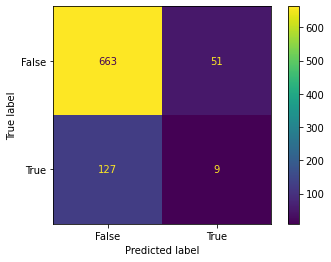

In [ ]:
# https://www.w3schools.com/python/python_ml_confusion_matrix.asp
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = h19_test_raw['cat_bin_actual']
predicted = h19_test_raw['cat_bin_predicted']

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
accuracy = metrics.accuracy_score(actual, predicted)
accuracy

0.7905882352941176

In [ ]:
precision = metrics.precision_score(actual, predicted)
precision

0.15

In [ ]:
sensitivity_recall = metrics.recall_score(actual, predicted)
sensitivity_recall

0.0661764705882353

In [ ]:
specificity = metrics.recall_score(actual, predicted, pos_label=0)
specificity

0.9285714285714286

In [ ]:
F1_score = metrics.f1_score(actual, predicted)
F1_score

0.09183673469387754

In [ ]:
#metrics
print({"Accuracy":accuracy,"Precision":precision,
       "Sensitivity_recall":sensitivity_recall,
       "Specificity":specificity,
       "F1_score":F1_score})

{'Accuracy': 0.7905882352941176, 'Precision': 0.15, 'Sensitivity_recall': 0.0661764705882353, 'Specificity': 0.9285714285714286, 'F1_score': 0.09183673469387754}


### TEST H2019 INDEZES CONFUSION MATRIX

In [ ]:
# df1 enthält die Topicnummern und ihre Bezeichnungen
df1 =  train_h19_model_topics[['Topic','Name']]
df1

Topic                                               Name
0      -1                       -1_deutschland_immer_spd_afd
1       0                          0_vögel_danke_wünsche_nix
2       1                  1_demokratie_wahl_parteien_partei
3       2                        2_hass_respekt_lügt_meinung
4       3                           3_erster_energie_the_och
5       4                            4_grünen_grüne_grün_rot
6       5                    5_kirchen_kirche_religion_geist
7       6            6_deutschland_deutschen_deutsche_berlin
8       7                     7_muslime_moslems_akbar_allahu
9       8             8_flüchtlinge_migranten_asyl_migration
10      9          9_vergewaltigt_mädchen_jährige_nigerianer
11     10                  10_kinder_schule_volkslehrer_kind
12     11         11_medien_journalisten_journalismus_presse
13     12                  12_tweet_twitter_account_twittern
14     13              13_essen_fressen_frosch_gammelfleisch
15     14        14_polizisten_polizei_abschiebungen_beamten
16     15     15_mitarbeiter_betroffen_mitarbeitern_schließt
17     16                 16_nazis_nazi_braunen_innenstädten
18     17         17_klimawandel_klima_erwärmung_klimaschutz
19     18               18_flüchtlinge_deutschland_euro_jahr
20     19                    19_video_youtube_videos_trailer
21     20                       20_zeiten_immer_schritt_mohr
22     21                  21_syrer_syrische_iraker_jährigen
23     22                   22_strom_autos_auto_elektroautos
24     23                 23_bilder_bild_editorial_paragraph
25     24                    24_bendit_cohn_daniel_spieglein
26     25             25_netz_speichern_speichert_ausgemacht
27     26           26_rassistisch_weiß_rassismus_anzufangen
28     27                       27_euro_kredite_audi_bargeld
29     28                   28_mord_skalpieren_fällt_notwehr
30     29                29_land_landteil_beginnen_vaterland
31     30                 30_clans_kriminelle_hinweis_begeht
32     31          31_italien_salvini_italienische_italiener
33     32              32_islam_deutschland_muslime_deutsche
34     33                 33_rebecca_instagram_endlich_sucht
35     34            34_österreich_europawahl_westen_gewinnt
36     35            35_afrika_herrenrasse_albert_schweitzer
37     36      36_merkel_hinterlässt_geigenkonzert_sauereien
38     37                  37_polizei_berliner_endlich_sucht
39     38                    38_stadt_straße_ückendorf_einst
40     39                39_milliarden_rente_rechnungen_robo
41     40             40_lieber_regierung_fastenbrechen_kern
42     41        41_propaganda_android_anstrengung_empfohlen
43     42                      42_hollywood_obm_kino_görlitz
44     43                          43_teil_satire_lach_humor
45     44                44_türken_türkei_türkischer_arabien
46     45      45_darpa_militärische_alliierten_umfangreiche
47     46             46_berlin_flughafen_amerika_hauptstadt
48     47           47_sundance_justnobody_löschung_bescheid
49     48                        48_fußball_liga_zwölf_sport
50     49  49_sozialismus_marktwirtschaft_soziale_kapital...
51     50                    50_grünen_deutschland_pro_grüne
52     51               51_russland_russische_putin_wladimir
53     52                  52_traum_hals_eigenheim_zugewinne
54     53            53_explosion_einsatz_zerstört_linköping
55     54                  54_schulen_bestimmt_berlin_rechts

In [ ]:
h19_test_pred_values_true_pos['Topic'] = h19_test_pred_values_true_pos.index
h19_test_pred_values_true_pos

pred    percent  Topic
-1      4  44.444444     -1
 16     2  22.222222     16
 26     1  11.111111     26
 8      1  11.111111      8
 9      1  11.111111      9

In [ ]:
# df2 bis df5 enthalten Vorhersagen, Topicanteile in Prozent sowie die Topicnr.
# dabei werden die Spalten umbenannt, damit es später beim Zusammenfügen nicht
# zu Doppelungen kommt
df2 = h19_test_pred_values_true_pos 
df2 = df2.rename(columns={'pred':'predH19TP', 'percent':'%H19TP', 'Topic':'Topic'})

In [ ]:
h19_test_pred_values_false_pos['Topic'] = h19_test_pred_values_false_pos.index
h19_test_pred_values_false_pos

pred    percent  Topic
-1     23  45.098039     -1
 0      5   9.803922      0
 16     4   7.843137     16
 1      3   5.882353      1
 9      3   5.882353      9
 39     2   3.921569     39
 21     2   3.921569     21
 10     1   1.960784     10
 46     1   1.960784     46
 18     1   1.960784     18
 27     1   1.960784     27
 37     1   1.960784     37
 38     1   1.960784     38
 35     1   1.960784     35
 26     1   1.960784     26
 15     1   1.960784     15

In [ ]:
df3 = h19_test_pred_values_false_pos
df3 = df3.rename(columns={'pred':'predH19FP', 'percent':'%H19FP', 'Topic':'Topic'})

In [ ]:
h19_test_pred_values_true_neg['Topic'] = h19_test_pred_values_true_neg.index
h19_test_pred_values_true_neg

pred    percent  Topic
-1    312  47.058824     -1
 0     61   9.200603      0
 3     53   7.993967      3
 8     26   3.921569      8
 1     23   3.469080      1
 9     17   2.564103      9
 18    12   1.809955     18
 12    10   1.508296     12
 7     10   1.508296      7
 10     9   1.357466     10
 6      8   1.206637      6
 51     7   1.055807     51
 16     7   1.055807     16
 11     7   1.055807     11
 36     7   1.055807     36
 39     6   0.904977     39
 17     6   0.904977     17
 2      6   0.904977      2
 4      6   0.904977      4
 49     6   0.904977     49
 15     5   0.754148     15
 13     5   0.754148     13
 25     4   0.603318     25
 28     4   0.603318     28
 23     4   0.603318     23
 22     3   0.452489     22
 14     3   0.452489     14
 21     3   0.452489     21
 24     3   0.452489     24
 38     3   0.452489     38
 29     3   0.452489     29
 44     3   0.452489     44
 33     2   0.301659     33
 34     2   0.301659     34
 31     2   0.301659     31
 50     2   0.301659     50
 5      2   0.301659      5
 32     2   0.301659     32
 37     1   0.150830     37
 26     1   0.150830     26
 54     1   0.150830     54
 43     1   0.150830     43
 19     1   0.150830     19
 30     1   0.150830     30
 27     1   0.150830     27
 35     1   0.150830     35
 20     1   0.150830     20

In [ ]:
df4 = h19_test_pred_values_true_neg
df4 = df4.rename(columns={'pred':'predH19TN', 'percent':'%H19TN', 'Topic':'Topic'})

In [ ]:
h19_test_pred_values_false_neg['Topic'] = h19_test_pred_values_false_neg.index
h19_test_pred_values_false_neg

pred    percent  Topic
-1     70  55.118110     -1
 9      6   4.724409      9
 7      5   3.937008      7
 5      4   3.149606      5
 8      4   3.149606      8
 1      3   2.362205      1
 2      3   2.362205      2
 29     2   1.574803     29
 11     2   1.574803     11
 16     2   1.574803     16
 32     2   1.574803     32
 26     2   1.574803     26
 36     2   1.574803     36
 4      2   1.574803      4
 18     2   1.574803     18
 51     2   1.574803     51
 0      2   1.574803      0
 23     1   0.787402     23
 12     1   0.787402     12
 39     1   0.787402     39
 37     1   0.787402     37
 17     1   0.787402     17
 49     1   0.787402     49
 28     1   0.787402     28
 44     1   0.787402     44
 43     1   0.787402     43
 38     1   0.787402     38
 14     1   0.787402     14
 13     1   0.787402     13

In [ ]:
df5 = h19_test_pred_values_false_neg
df5 = df5.rename(columns={'pred':'predH19FN', 'percent':'%H19FN', 'Topic':'Topic'})

In [ ]:
# https://stackoverflow.com/questions/44327999/how-to-merge-multiple-dataframes
from functools import reduce

data_frames = [df1, df2, df3, df4, df5]
df_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_merged[['%H19TP', '%H19TN','%H19FP', '%H19FN']] = df_merged[['%H19TP', '%H19TN','%H19FP', '%H19FN']].astype(float).round(2)
df_merged
#df_to_round = df_merged[['%H19', '%H19','%H19', '%H20']]
#df_to_round = df_to_round[['%H19', '%H19','%H19', '%H20']].round(2)
#df_to_round

Topic                                               Name predH19TP  \
0      -1                       -1_deutschland_immer_spd_afd       4.0   
1       0                          0_vögel_danke_wünsche_nix         0   
2       1                  1_demokratie_wahl_parteien_partei         0   
3       2                        2_hass_respekt_lügt_meinung         0   
4       3                           3_erster_energie_the_och         0   
5       4                            4_grünen_grüne_grün_rot         0   
6       5                    5_kirchen_kirche_religion_geist         0   
7       6            6_deutschland_deutschen_deutsche_berlin         0   
8       7                     7_muslime_moslems_akbar_allahu         0   
9       8             8_flüchtlinge_migranten_asyl_migration       1.0   
10      9          9_vergewaltigt_mädchen_jährige_nigerianer       1.0   
11     10                  10_kinder_schule_volkslehrer_kind         0   
12     11         11_medien_journalisten_journalismus_presse         0   
13     12                  12_tweet_twitter_account_twittern         0   
14     13              13_essen_fressen_frosch_gammelfleisch         0   
15     14        14_polizisten_polizei_abschiebungen_beamten         0   
16     15     15_mitarbeiter_betroffen_mitarbeitern_schließt         0   
17     16                 16_nazis_nazi_braunen_innenstädten       2.0   
18     17         17_klimawandel_klima_erwärmung_klimaschutz         0   
19     18               18_flüchtlinge_deutschland_euro_jahr         0   
20     19                    19_video_youtube_videos_trailer         0   
21     20                       20_zeiten_immer_schritt_mohr         0   
22     21                  21_syrer_syrische_iraker_jährigen         0   
23     22                   22_strom_autos_auto_elektroautos         0   
24     23                 23_bilder_bild_editorial_paragraph         0   
25     24                    24_bendit_cohn_daniel_spieglein         0   
26     25             25_netz_speichern_speichert_ausgemacht         0   
27     26           26_rassistisch_weiß_rassismus_anzufangen       1.0   
28     27                       27_euro_kredite_audi_bargeld         0   
29     28                   28_mord_skalpieren_fällt_notwehr         0   
30     29                29_land_landteil_beginnen_vaterland         0   
31     30                 30_clans_kriminelle_hinweis_begeht         0   
32     31          31_italien_salvini_italienische_italiener         0   
33     32              32_islam_deutschland_muslime_deutsche         0   
34     33                 33_rebecca_instagram_endlich_sucht         0   
35     34            34_österreich_europawahl_westen_gewinnt         0   
36     35            35_afrika_herrenrasse_albert_schweitzer         0   
37     36      36_merkel_hinterlässt_geigenkonzert_sauereien         0   
38     37                  37_polizei_berliner_endlich_sucht         0   
39     38                    38_stadt_straße_ückendorf_einst         0   
40     39                39_milliarden_rente_rechnungen_robo         0   
41     40             40_lieber_regierung_fastenbrechen_kern         0   
42     41        41_propaganda_android_anstrengung_empfohlen         0   
43     42                      42_hollywood_obm_kino_görlitz         0   
44     43                          43_teil_satire_lach_humor         0   
45     44                44_türken_türkei_türkischer_arabien         0   
46     45      45_darpa_militärische_alliierten_umfangreiche         0   
47     46             46_berlin_flughafen_amerika_hauptstadt         0   
48     47           47_sundance_justnobody_löschung_bescheid         0   
49     48                        48_fußball_liga_zwölf_sport         0   
50     49  49_sozialismus_marktwirtschaft_soziale_kapital...         0   
51     50                    50_grünen_deutschland_pro_grüne         0   
52     51               51_russland_russische_putin_wladimir         0   
53     5

In [ ]:
df_merged

Topic                                               Name predH19TP  \
0      -1                       -1_deutschland_immer_spd_afd       4.0   
1       0                          0_vögel_danke_wünsche_nix         0   
2       1                  1_demokratie_wahl_parteien_partei         0   
3       2                        2_hass_respekt_lügt_meinung         0   
4       3                           3_erster_energie_the_och         0   
5       4                            4_grünen_grüne_grün_rot         0   
6       5                    5_kirchen_kirche_religion_geist         0   
7       6            6_deutschland_deutschen_deutsche_berlin         0   
8       7                     7_muslime_moslems_akbar_allahu         0   
9       8             8_flüchtlinge_migranten_asyl_migration       1.0   
10      9          9_vergewaltigt_mädchen_jährige_nigerianer       1.0   
11     10                  10_kinder_schule_volkslehrer_kind         0   
12     11         11_medien_journalisten_journalismus_presse         0   
13     12                  12_tweet_twitter_account_twittern         0   
14     13              13_essen_fressen_frosch_gammelfleisch         0   
15     14        14_polizisten_polizei_abschiebungen_beamten         0   
16     15     15_mitarbeiter_betroffen_mitarbeitern_schließt         0   
17     16                 16_nazis_nazi_braunen_innenstädten       2.0   
18     17         17_klimawandel_klima_erwärmung_klimaschutz         0   
19     18               18_flüchtlinge_deutschland_euro_jahr         0   
20     19                    19_video_youtube_videos_trailer         0   
21     20                       20_zeiten_immer_schritt_mohr         0   
22     21                  21_syrer_syrische_iraker_jährigen         0   
23     22                   22_strom_autos_auto_elektroautos         0   
24     23                 23_bilder_bild_editorial_paragraph         0   
25     24                    24_bendit_cohn_daniel_spieglein         0   
26     25             25_netz_speichern_speichert_ausgemacht         0   
27     26           26_rassistisch_weiß_rassismus_anzufangen       1.0   
28     27                       27_euro_kredite_audi_bargeld         0   
29     28                   28_mord_skalpieren_fällt_notwehr         0   
30     29                29_land_landteil_beginnen_vaterland         0   
31     30                 30_clans_kriminelle_hinweis_begeht         0   
32     31          31_italien_salvini_italienische_italiener         0   
33     32              32_islam_deutschland_muslime_deutsche         0   
34     33                 33_rebecca_instagram_endlich_sucht         0   
35     34            34_österreich_europawahl_westen_gewinnt         0   
36     35            35_afrika_herrenrasse_albert_schweitzer         0   
37     36      36_merkel_hinterlässt_geigenkonzert_sauereien         0   
38     37                  37_polizei_berliner_endlich_sucht         0   
39     38                    38_stadt_straße_ückendorf_einst         0   
40     39                39_milliarden_rente_rechnungen_robo         0   
41     40             40_lieber_regierung_fastenbrechen_kern         0   
42     41        41_propaganda_android_anstrengung_empfohlen         0   
43     42                      42_hollywood_obm_kino_görlitz         0   
44     43                          43_teil_satire_lach_humor         0   
45     44                44_türken_türkei_türkischer_arabien         0   
46     45      45_darpa_militärische_alliierten_umfangreiche         0   
47     46             46_berlin_flughafen_amerika_hauptstadt         0   
48     47           47_sundance_justnobody_löschung_bescheid         0   
49     48                        48_fußball_liga_zwölf_sport         0   
50     49  49_sozialismus_marktwirtschaft_soziale_kapital...         0   
51     50                    50_grünen_deutschland_pro_grüne         0   
52     51               51_russland_russische_putin_wladimir         0   
53     5

In [ ]:
# https://stackoverflow.com/questions/15891038/change-column-type-in-pandas
# Die Anzahlen der vorhergesagten Topics werden in int umgewandelt
df_merged = df_merged.astype({"predH19TP": int, "predH19TN":int, "predH19FP":int, "predH19FN":int})
df_merged

Topic                                               Name  predH19TP  \
0      -1                       -1_deutschland_immer_spd_afd          4   
1       0                          0_vögel_danke_wünsche_nix          0   
2       1                  1_demokratie_wahl_parteien_partei          0   
3       2                        2_hass_respekt_lügt_meinung          0   
4       3                           3_erster_energie_the_och          0   
5       4                            4_grünen_grüne_grün_rot          0   
6       5                    5_kirchen_kirche_religion_geist          0   
7       6            6_deutschland_deutschen_deutsche_berlin          0   
8       7                     7_muslime_moslems_akbar_allahu          0   
9       8             8_flüchtlinge_migranten_asyl_migration          1   
10      9          9_vergewaltigt_mädchen_jährige_nigerianer          1   
11     10                  10_kinder_schule_volkslehrer_kind          0   
12     11         11_medien_journalisten_journalismus_presse          0   
13     12                  12_tweet_twitter_account_twittern          0   
14     13              13_essen_fressen_frosch_gammelfleisch          0   
15     14        14_polizisten_polizei_abschiebungen_beamten          0   
16     15     15_mitarbeiter_betroffen_mitarbeitern_schließt          0   
17     16                 16_nazis_nazi_braunen_innenstädten          2   
18     17         17_klimawandel_klima_erwärmung_klimaschutz          0   
19     18               18_flüchtlinge_deutschland_euro_jahr          0   
20     19                    19_video_youtube_videos_trailer          0   
21     20                       20_zeiten_immer_schritt_mohr          0   
22     21                  21_syrer_syrische_iraker_jährigen          0   
23     22                   22_strom_autos_auto_elektroautos          0   
24     23                 23_bilder_bild_editorial_paragraph          0   
25     24                    24_bendit_cohn_daniel_spieglein          0   
26     25             25_netz_speichern_speichert_ausgemacht          0   
27     26           26_rassistisch_weiß_rassismus_anzufangen          1   
28     27                       27_euro_kredite_audi_bargeld          0   
29     28                   28_mord_skalpieren_fällt_notwehr          0   
30     29                29_land_landteil_beginnen_vaterland          0   
31     30                 30_clans_kriminelle_hinweis_begeht          0   
32     31          31_italien_salvini_italienische_italiener          0   
33     32              32_islam_deutschland_muslime_deutsche          0   
34     33                 33_rebecca_instagram_endlich_sucht          0   
35     34            34_österreich_europawahl_westen_gewinnt          0   
36     35            35_afrika_herrenrasse_albert_schweitzer          0   
37     36      36_merkel_hinterlässt_geigenkonzert_sauereien          0   
38     37                  37_polizei_berliner_endlich_sucht          0   
39     38                    38_stadt_straße_ückendorf_einst          0   
40     39                39_milliarden_rente_rechnungen_robo          0   
41     40             40_lieber_regierung_fastenbrechen_kern          0   
42     41        41_propaganda_android_anstrengung_empfohlen          0   
43     42                      42_hollywood_obm_kino_görlitz          0   
44     43                          43_teil_satire_lach_humor          0   
45     44                44_türken_türkei_türkischer_arabien          0   
46     45      45_darpa_militärische_alliierten_umfangreiche          0   
47     46             46_berlin_flughafen_amerika_hauptstadt          0   
48     47           47_sundance_justnobody_löschung_bescheid          0   
49     48                        48_fußball_liga_zwölf_sport          0   
50     49  49_sozialismus_marktwirtschaft_soziale_kapital...          0   
51     50                    50_grünen_deutschland_pro_grüne          0   
52     51               51_ru

In [ ]:
df_percent = df_merged[['Topic','%H19TP', '%H19TN','%H19FP', '%H19FN','Name']]
df_percent

Topic  %H19TP  %H19TN  %H19FP  %H19FN  \
0      -1   44.44   47.06   45.10   55.12   
1       0    0.00    9.20    9.80    1.57   
2       1    0.00    3.47    5.88    2.36   
3       2    0.00    0.90    0.00    2.36   
4       3    0.00    7.99    0.00    0.00   
5       4    0.00    0.90    0.00    1.57   
6       5    0.00    0.30    0.00    3.15   
7       6    0.00    1.21    0.00    0.00   
8       7    0.00    1.51    0.00    3.94   
9       8   11.11    3.92    0.00    3.15   
10      9   11.11    2.56    5.88    4.72   
11     10    0.00    1.36    1.96    0.00   
12     11    0.00    1.06    0.00    1.57   
13     12    0.00    1.51    0.00    0.79   
14     13    0.00    0.75    0.00    0.79   
15     14    0.00    0.45    0.00    0.79   
16     15    0.00    0.75    1.96    0.00   
17     16   22.22    1.06    7.84    1.57   
18     17    0.00    0.90    0.00    0.79   
19     18    0.00    1.81    1.96    1.57   
20     19    0.00    0.15    0.00    0.00   
21     20    0.00    0.15    0.00    0.00   
22     21    0.00    0.45    3.92    0.00   
23     22    0.00    0.45    0.00    0.00   
24     23    0.00    0.60    0.00    0.79   
25     24    0.00    0.45    0.00    0.00   
26     25    0.00    0.60    0.00    0.00   
27     26   11.11    0.15    1.96    1.57   
28     27    0.00    0.15    1.96    0.00   
29     28    0.00    0.60    0.00    0.79   
30     29    0.00    0.45    0.00    1.57   
31     30    0.00    0.15    0.00    0.00   
32     31    0.00    0.30    0.00    0.00   
33     32    0.00    0.30    0.00    1.57   
34     33    0.00    0.30    0.00    0.00   
35     34    0.00    0.30    0.00    0.00   
36     35    0.00    0.15    1.96    0.00   
37     36    0.00    1.06    0.00    1.57   
38     37    0.00    0.15    1.96    0.79   
39     38    0.00    0.45    1.96    0.79   
40     39    0.00    0.90    3.92    0.79   
41     40    0.00    0.00    0.00    0.00   
42     41    0.00    0.00    0.00    0.00   
43     42    0.00    0.00    0.00    0.00   
44     43    0.00    0.15    0.00    0.79   
45     44    0.00    0.45    0.00    0.79   
46     45    0.00    0.00    0.00    0.00   
47     46    0.00    0.00    1.96    0.00   
48     47    0.00    0.00    0.00    0.00   
49     48    0.00    0.00    0.00    0.00   
50     49    0.00    0.90    0.00    0.79   
51     50    0.00    0.30    0.00    0.00   
52     51    0.00    1.06    0.00    1.57   
53     52    0.00    0.00    0.00    0.00   
54     53    0.00    0.00    0.00    0.00   
55     54    0.00    0.15    0.00    0.00   

                                                 Name  
0                        -1_deutschland_immer_spd_afd  
1                           0_vögel_danke_wünsche_nix  
2                   1_demokratie_wahl_parteien_partei  
3                         2_hass_respekt_lügt_meinung  
4                            3_erster_energie_the_och  
5                             4_grünen_grüne_grün_rot  
6                     5_kirchen_kirche_religion_geist  
7             6_deutschland_deutschen_deutsche_berlin  
8                      7_muslime_moslems_akbar_allahu  
9              8_flüchtlinge_migranten_asyl_migration  
10          9_vergewaltigt_mädchen_jährige_nigerianer  
11                  10_kinder_schule_volkslehrer_kind  
12         11_medien_journalisten_journalismus_presse  
13                  12_tweet_twitter_account_twittern  
14              13_essen_fressen_frosch_gammelfleisch  
15        14_polizisten_polizei_abschiebungen_beamten  
16     15_mitarbeiter_betroffen_mitarbeitern_schließt  
17                 16_nazis_nazi_braunen_innenstädten  
18         17_klimawandel_klima_erwärmung_klimaschutz  
19               18_flüchtlinge_deutschland_euro_jahr  
20                    19_video_youtube_videos_trailer  
21                       20_zeiten_immer_schritt_mohr  
22                  21_syrer_syrische_iraker_jährigen  
23                   22_strom_autos_auto_elektroautos  
24                 23_bilder_bild_edit

In [ ]:
test_h19_df_percent_plt_CONF_MATRIX = df_percent.set_index('Name')

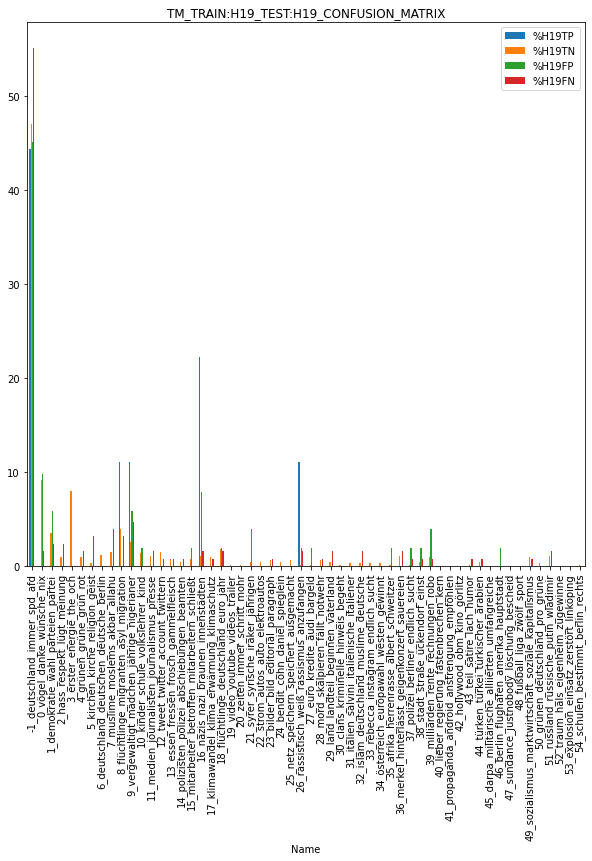

In [ ]:
test_h19_df_percent_plt_CONF_MATRIX.plot(y=['%H19TP', '%H19TN','%H19FP', '%H19FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:H19_TEST:H19_CONFUSION_MATRIX")

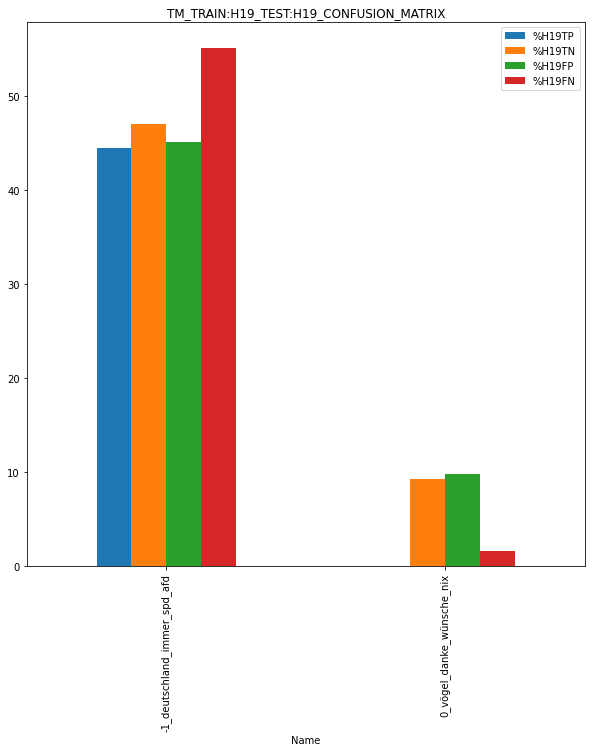

In [ ]:
test_h19_df_percent_plt_CONF_MATRIX[0:2].plot(y=['%H19TP', '%H19TN','%H19FP', '%H19FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:H19_TEST:H19_CONFUSION_MATRIX")

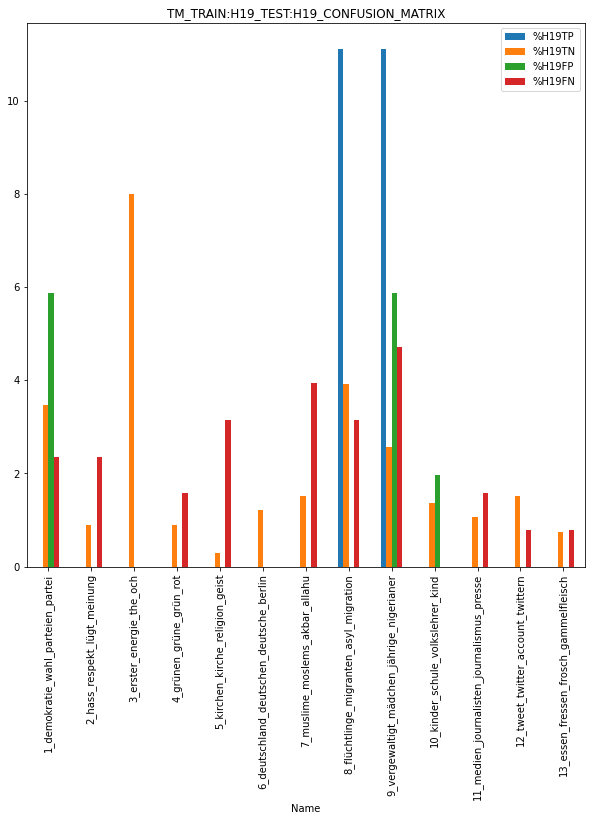

In [ ]:
test_h19_df_percent_plt_CONF_MATRIX[2:15].plot(y=['%H19TP', '%H19TN','%H19FP', '%H19FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:H19_TEST:H19_CONFUSION_MATRIX")

In [ ]:
#test_h19_df_percent_plt_CONF_MATRIX[15:].plot(y=['%H19TP', '%H19TN','%H19FP', '%H19FN'], 
#                                            kind="bar",figsize=(10, 10), 
#                                            title = 
#                                            "TM_TRAIN:H19_TEST:H19_CONFUSION_MATRIX")

### Test H2020

In [ ]:
train_h19_class_h20 = pd.read_csv('/content/NSIT_submission_DE_Train_HASOC2019_Test_HASOC2020_TASK_A.csv')
train_h19_class_h20

task1
0        1
1        1
2        1
3        1
4        0
..     ...
521      1
522      1
523      1
524      1
525      0

[526 rows x 1 columns]

In [ ]:
train_h19_class_h20['task1'] = train_h19_class_h20['task1'].map({0: 1, 1: 0}).astype(int)
train_h19_class_h20

task1
0        0
1        0
2        0
3        0
4        1
..     ...
521      0
522      0
523      0
524      0
525      1

[526 rows x 1 columns]

In [ ]:
h20_test_class_values = pd.DataFrame(train_h19_class_h20['task1'].value_counts())
h20_test_class_values

task1
0    456
1     70

In [ ]:

h20_test_raw['class'] = train_h19_class_h20['task1']
h20_test_raw

Unnamed: 0             tweet_id  \
0             0  1129095874242650112   
1             1  1129004308396236800   
2             2  1130896929355907080   
3             3  1132251534329307136   
4             4  1124941869115498496   
..          ...                  ...   
521         521  1124809878546128897   
522         522  1132433240000798720   
523         523  1127366294255357958   
524         524  1124362090460975105   
525         525  1131487097293103104   

                                                  text task1 task2  \
0      @derCarsti Boykottieren hört sich besser an. 💙💙   NOT  NONE   
1    RT @ibikus31: Es wird spekuliert, ob Merkel ei...   NOT  NONE   
2    Hat #Hitler wirklich den Krieg in der Wüste ve...   NOT  NONE   
3    RT @Beatrix_vStorch: #May tritt in UK unter Tr...   NOT  NONE   
4    @justmeDoro Eher nicht. Das Gänse hauen wieder...   NOT  NONE   
..                                                 ...   ...   ...   
521  RT @ChanMachtSo: SCHMERZEN!!!! Au!!! Mein Gehi...   NOT  NONE   
522  Die Zerstörung der Grünen. https://t.co/SIYDJj...   NOT  NONE   
523  RT @PParzival: "Antideutsche" Pseudo-linke Ide...   NOT  NONE   
524                         Klug reden und dumm leben.   NOT  NONE   
525  Wissen wir schon lange....hat das die Merkel e...   NOT  NONE   

                     ID  pred  class  cat_bin_actual  cat_bin_predicted  
0    hasoc_2020_de_1053    -1      0               0                  0  
1     hasoc_2020_de_671    36      0               0                  0  
2    hasoc_2020_de_2977    -1      0               0                  0  
3    hasoc_2020_de_1746    -1      0               0                  0  
4    hasoc_2020_de_2416     0      1               0                  0  
..                  ...   ...    ...             ...                ...  
521   hasoc_2020_de_486    -1      0               0                  0  
522  hasoc_2020_de_3388     4      0               0                  0  
523  hasoc_2020_de_2745    -1      0               0                  0  
524   hasoc_2020_de_236     2      0               0                  0  
525  hasoc_2020_de_2850     4      1               0                  0  

[526 rows x 10 columns]

In [ ]:
# https://stackoverflow.com/questions/41691081/pandas-use-and-operator-in-loc-function
h20_test_true_pos = h20_test_raw.loc[(h20_test_raw['task1'] == 'HOF') & (h20_test_raw['class'] == 1)]
h20_test_true_pos

Unnamed: 0             tweet_id  \
22           22  1134444350027509766   
24           24  1124210944534614016   
33           33  1126172771518746624   
37           37  1129807773473091586   
43           43  1132986556778733569   
55           55  1126762125752274945   
60           60  1124996290209775616   
111         111  1133562111739793410   
121         121  1131308545767612416   
163         163  1134039318660599809   
164         164  1124796846835163141   
176         176  1131110721427787776   
186         186  1126196372833755137   
204         204  1125774195173072896   
205         205  1133652473841893376   
211         211  1128445077628641280   
219         219  1127222836500811776   
231         231  1131312698120167424   
240         240  1132883158775607301   
243         243  1126095613106503680   
245         245  1132005412579020801   
247         247  1134485257095458818   
249         249  1129887519762460672   
258         258  1123528959076048897   
281         281  1126347246163890179   
299         299  1129859053008695301   
304         304  1134487350044700673   
326         326  1129354125915885568   
358         358  1128379017336324097   
360         360  1129359209420787713   
361         361  1127882030077890561   
383         383  1124420298999312387   
389         389  1131475739105271808   
393         393  1127131157370478592   
400         400  1125106688464433157   
421         421  1132249445603643393   
423         423  1129603984816320512   
428         428  1128267511798149123   
486         486  1128516649236217856   
492         492  1130047717005242371   
496         496  1131274676741836800   
508         508  1129379774076473344   
511         511  1130096161212252162   

                                                  text task1 task2  \
22                 Scheiß. Hurensohn gam @FortniteGame   HOF  PRFN   
24   @HyperBushido fr ich streu den scheiß überall ...   HOF  PRFN   
33   @ChrisEpunkt Erste ist doh net schlimm und 2. ...   HOF  PRFN   
37   @PandabrchenThe1 Keine Ahnung, die sind richti...   HOF  PRFN   
43   @Julia42833681 @eva_leisner @SPIEGELONLINE Als...   HOF  HATE   
55   #FridaysForFurture voraus! Oder wie die Regier...   HOF  HATE   
60   @MaxScurScur ER SAH IMMER AUS WIE EIN HUND IHR...   HOF  PRFN   
111  Muttis arsch kostenloser sex frankfurt. Gratis...   HOF  PRFN   
121  Noch nie geliebt worden, einfach dumme frauen ...   HOF  PRFN   
163  @sebaso grenzen des wachstums war eine sehr bi...   HOF  PRFN   
164  @afternoonsand @Acosta Seik heilp for your lüg...   HOF  PRFN   
176  RT @yasinaygan: @TDoernb @alican_2023 @ProvoMe...   HOF  OFFN   
186  Ghile ungesunde Schweinerei komm in mein fette...   HOF  PRFN   
204  @HolyVitality @JustVNTY Scheiß Nazi. Verpiss d...   HOF  OFFN   
205  @bineuerboss @fivethrsix der ist unlustig und ...   HOF  OFFN   
211  RT @isariuzCS: erstmal bissel klinik am hurens...   HOF  PRFN   
219                       @anne_kyf Richtiger Scheiß 🙄   HOF  PRFN   
231  pornofoto sveta belochkina deutsche jugendlich...   HOF  PRFN   
240  RT @karina140911: Eva Herman: Ihr seid Idioten...   HOF  PRFN   
243  @cem_oezdemir Nazis abschieben in die Türkei.....   HOF  NONE   
245  RT @Carpediem041703: Langsam reichts. Ich werd...   HOF  HATE   
247                        dumme dreckige scheiß nutte   HOF  OFFN   
249  @vm_dittrich Ach so blöd kann man doch nicht s...   HOF  PRFN   
258  @SPD_Friedenau @matzegeisthardt ihr Arschlöche...   HOF  OFFN   
281  Noch 2 Tage und ich bin durch mit dieser schei...   HOF  PRFN   
299  @4Kolner Bimmermann ist ein dreckiges Stück Sc...   HOF  OFFN   
304  Alte deutsche schlampen, ficken in dusche. Gra...   HOF  PRFN   
326         @krzyx0 du dummer hurensohn halt dein maul   HOF  PRFN   
358  @19Steffen09 @Nina2776 Am Arsch die Räuber, hö...   HOF  PRFN   
360                   Ich pack diese Hirnwixerei nicht   HOF  PRFN   
361  @DPolGThueringen Linke und Grüne leben halt in...   HOF  OFFN   
383 

In [ ]:
h20_test_pred_values_true_pos = pd.DataFrame(h20_test_true_pos['pred'].value_counts())
h20_test_pred_values_true_pos['percent'] = (h20_test_pred_values_true_pos['pred'] / h20_test_pred_values_true_pos['pred'].sum()) * 100
h20_test_pred_values_true_pos

pred    percent
-1     26  60.465116
 0      6  13.953488
 4      4   9.302326
 13     2   4.651163
 16     2   4.651163
 9      1   2.325581
 2      1   2.325581
 44     1   2.325581

In [ ]:
h20_test_false_pos = h20_test_raw.loc[(h20_test_raw['task1'] == 'NOT') & (h20_test_raw['class'] == 1)]
h20_test_false_pos

Unnamed: 0             tweet_id  \
4             4  1124941869115498496   
8             8  1129473948813541376   
16           16  1129426301515960320   
19           19  1126930715776516096   
45           45  1124653598804271105   
59           59  1125459697887322112   
62           62  1124434324785455104   
79           79  1128883487283527680   
108         108  1130787319600955392   
115         115  1126213502409093121   
122         122  1125783212943466497   
123         123  1130085096646762496   
213         213  1129318243632582657   
233         233  1129046947665534978   
261         261  1124737992365694976   
308         308  1127131497138462720   
322         322  1133086737712992257   
340         340  1134521038681923585   
369         369  1127086156678684672   
378         378  1126219605108776960   
394         394  1124188517582741504   
398         398  1128396457269133327   
435         435  1133310424156430336   
443         443  1132644280579887104   
452         452  1130773289658458112   
518         518  1128653081556787205   
525         525  1131487097293103104   

                                                  text task1 task2  \
4    @justmeDoro Eher nicht. Das Gänse hauen wieder...   NOT  NONE   
8    Nazan, komm bittebitte zurück, löse die „Pungg...   NOT  NONE   
16   @welt Holzen wir halt den ganzen Amazonas ab !...   NOT  NONE   
19   RT @andyamholst: Nazis "wählen" Nazis und nich...   NOT  NONE   
45   RT @priv_girl: Fröhliches nationalitätenraten ...   NOT  NONE   
59                             @tanturs Jaaaa pack aus   NOT  NONE   
62   RT @mozart2018: ? "#Merkel sponsert den Bau" ?...   NOT  NONE   
79   RT @Fern_Schreiber: "In meiner Klasse warn hal...   NOT  NONE   
108  RT @Jeky: Wenn selbst die @Welt das veröffentl...   NOT  NONE   
115         @Hallaschka_HH Ich könnte nur noch KOTZEN.   NOT  NONE   
122  @prdgrmn @Renft1964 Echt, kann sich eigentlich...   NOT  NONE   
123  Traditionelles Backhausfest mit Tetscher, Zwie...   NOT  NONE   
213  @vanillelikoer Warum Türkin in Anführungszeich...   NOT  NONE   
233  RT @Hevellia64: @Ralf64904117 @ChrisFuerAfD Sc...   NOT  NONE   
261  RT @DrPhiloponus: Deutsche Einmärsche hui, deu...   NOT  NONE   
308  Die #fckafd ist mit 6 Nazis in #Harburg #noafd...   NOT  NONE   
322  RT @digitalFarmer3: Gauland „Wähler im Westen ...   NOT  NONE   
340  @JulieReichwein1 @NanuNan32440900 Müssen sich ...   NOT  NONE   
369        Merkels größte Lüge https://t.co/cdI7pSCdLL   NOT  NONE   
378  @InfoHunter161 Was sind schon leibhaftige Nazi...   NOT  NONE   
394  Treffen mit venezolanischer Opposition: Maas w...   NOT  NONE   
398  RT @HermannUli: @HelgeBruhn Blocken. Idioten S...   NOT  NONE   
435  FRAU DOKTOR? Jetzt hat sich doch glatt mal jem...   NOT  NONE   
443  @SawsanChebli Dumm ist der, der dummes tut. ht...   NOT  NONE   
452  @TomMayerEuropa Die mittlerweile erstarkten Gr...   NOT  NONE   
518           Vegetarisch essen um die Nazis zu ärgern   NOT  NONE   
525  Wissen wir schon lange....hat das die Merkel e...   NOT  NONE   

                     ID  pred  class  cat_bin_actual  cat_bin_predicted  
4    hasoc_2020_de_2416     0      1               0                  0  
8     hasoc_2020_de_387    -1      1               0                  0  
16   hasoc_2020_de_1064     4      1               0                  0  
19   hasoc_2020_de_1195    16      1               0                  0  
45   hasoc_2020_de_1830    -1      1               0                  0  
59   hasoc_2020_de_2523     0      1               0                  0  
62   hasoc_2020_de_2798    -1      1               0                  0  
79   hasoc_2020_de_2021     1      1               0                  1  
108   hasoc_2020_de_537     1      1               0                  0  
115  hasoc_2020_de_1565     0      1               0                  0  
122  hasoc_2020_de_1891    -1      1               0                  0  
123   hasoc_2020_de_194    13      

In [ ]:
h20_test_pred_values_false_pos = pd.DataFrame(h20_test_false_pos['pred'].value_counts())
h20_test_pred_values_false_pos['percent'] = (h20_test_pred_values_false_pos['pred'] / h20_test_pred_values_false_pos['pred'].sum()) * 100
h20_test_pred_values_false_pos

pred    percent
-1     11  40.740741
 16     5  18.518519
 0      3  11.111111
 4      3  11.111111
 1      2   7.407407
 13     1   3.703704
 44     1   3.703704
 7      1   3.703704

In [ ]:
h20_test_true_neg = h20_test_raw.loc[(h20_test_raw['task1'] == 'NOT') & (h20_test_raw['class'] == 0)]
h20_test_true_neg

Unnamed: 0             tweet_id  \
0             0  1129095874242650112   
1             1  1129004308396236800   
2             2  1130896929355907080   
3             3  1132251534329307136   
7             7  1124978296628961287   
..          ...                  ...   
520         520  1123589659047731201   
521         521  1124809878546128897   
522         522  1132433240000798720   
523         523  1127366294255357958   
524         524  1124362090460975105   

                                                  text task1 task2  \
0      @derCarsti Boykottieren hört sich besser an. 💙💙   NOT  NONE   
1    RT @ibikus31: Es wird spekuliert, ob Merkel ei...   NOT  NONE   
2    Hat #Hitler wirklich den Krieg in der Wüste ve...   NOT  NONE   
3    RT @Beatrix_vStorch: #May tritt in UK unter Tr...   NOT  NONE   
7    Da war #SPD #Kuehnert und am Ende auch #Nahles...   NOT  NONE   
..                                                 ...   ...   ...   
520        Einfach einladend 😉 https://t.co/kRHAoshmxY   NOT  NONE   
521  RT @ChanMachtSo: SCHMERZEN!!!! Au!!! Mein Gehi...   NOT  NONE   
522  Die Zerstörung der Grünen. https://t.co/SIYDJj...   NOT  NONE   
523  RT @PParzival: "Antideutsche" Pseudo-linke Ide...   NOT  NONE   
524                         Klug reden und dumm leben.   NOT  NONE   

                     ID  pred  class  cat_bin_actual  cat_bin_predicted  
0    hasoc_2020_de_1053    -1      0               0                  0  
1     hasoc_2020_de_671    36      0               0                  0  
2    hasoc_2020_de_2977    -1      0               0                  0  
3    hasoc_2020_de_1746    -1      0               0                  0  
7    hasoc_2020_de_2205    -1      0               0                  0  
..                  ...   ...    ...             ...                ...  
520  hasoc_2020_de_2794     0      0               0                  0  
521   hasoc_2020_de_486    -1      0               0                  0  
522  hasoc_2020_de_3388     4      0               0                  0  
523  hasoc_2020_de_2745    -1      0               0                  0  
524   hasoc_2020_de_236     2      0               0                  0  

[338 rows x 10 columns]

In [ ]:
h20_test_pred_values_true_neg = pd.DataFrame(h20_test_true_neg['pred'].value_counts())
h20_test_pred_values_true_neg['percent'] = (h20_test_pred_values_true_neg['pred'] / h20_test_pred_values_true_neg['pred'].sum()) * 100
h20_test_pred_values_true_neg

pred    percent
-1    169  50.000000
 0     56  16.568047
 4     23   6.804734
 36    13   3.846154
 16    12   3.550296
 6      8   2.366864
 2      8   2.366864
 3      7   2.071006
 1      5   1.479290
 10     4   1.183432
 39     3   0.887574
 44     3   0.887574
 7      3   0.887574
 42     2   0.591716
 43     2   0.591716
 9      2   0.591716
 32     2   0.591716
 27     1   0.295858
 23     1   0.295858
 28     1   0.295858
 22     1   0.295858
 15     1   0.295858
 5      1   0.295858
 8      1   0.295858
 18     1   0.295858
 13     1   0.295858
 47     1   0.295858
 24     1   0.295858
 25     1   0.295858
 34     1   0.295858
 50     1   0.295858
 26     1   0.295858
 20     1   0.295858

In [ ]:
h20_test_false_neg = h20_test_raw.loc[(h20_test_raw['task1'] == 'HOF') & (h20_test_raw['class'] == 0)]
h20_test_false_neg

Unnamed: 0             tweet_id  \
5             5  1129712298531184641   
6             6  1123981478361219073   
17           17  1126089577486323712   
21           21  1134130242786926592   
25           25  1131517942175289344   
..          ...                  ...   
497         497  1134619244107370496   
498         498  1129818645109116928   
500         500  1128321203075256320   
512         512  1124842568972288000   
517         517  1124379312264708101   

                                                  text task1 task2  \
5    RT @VonSchwer: Ein guter Patriot geht von Bord...   HOF  OFFN   
6    @yooli_derechte @MontanaBlack Mich wundert es ...   HOF  OFFN   
17   RT @CWBWElias: @TheresaGesperrt Wollte meine N...   HOF  PRFN   
21   @sgepeeti Verdursten ist aber auch ein scheiß ...   HOF  PRFN   
25   RT @Symon634: Ich ficke deine enkeltochter du ...   HOF  PRFN   
..                                                 ...   ...   ...   
497  RT @maxotte_says: #Harvard war mal eine #Elite...   HOF  OFFN   
498  @ChHuegel @ManfredWeber Man kann doch den über...   HOF  HATE   
500                         @VizzionsXI halt dein maul   HOF  OFFN   
512  Der Bass ist tief, die Atmosphäre sehr entspan...   HOF  PRFN   
517  RT @theunwantedpath: HABT IHR DEN ARSCH OFFEN ...   HOF  PRFN   

                     ID  pred  class  cat_bin_actual  cat_bin_predicted  
5    hasoc_2020_de_1112    -1      0               1                  0  
6    hasoc_2020_de_2938    -1      0               1                  1  
17   hasoc_2020_de_2545    -1      0               1                  0  
21   hasoc_2020_de_1235    -1      0               1                  0  
25   hasoc_2020_de_2382    -1      0               1                  1  
..                  ...   ...    ...             ...                ...  
497  hasoc_2020_de_1606    -1      0               1                  0  
498  hasoc_2020_de_2580     4      0               1                  0  
500  hasoc_2020_de_1958    -1      0               1                  0  
512  hasoc_2020_de_2470     0      0               1                  0  
517   hasoc_2020_de_986    -1      0               1                  0  

[118 rows x 10 columns]

In [ ]:
h20_test_pred_values_false_neg = pd.DataFrame(h20_test_false_neg['pred'].value_counts())
h20_test_pred_values_false_neg['percent'] = (h20_test_pred_values_false_neg['pred'] / h20_test_pred_values_false_neg['pred'].sum()) * 100
h20_test_pred_values_false_neg

pred    percent
-1     65  55.084746
 0     19  16.101695
 2      4   3.389831
 13     4   3.389831
 38     3   2.542373
 4      3   2.542373
 1      3   2.542373
 9      2   1.694915
 24     2   1.694915
 7      2   1.694915
 8      2   1.694915
 6      2   1.694915
 10     1   0.847458
 51     1   0.847458
 11     1   0.847458
 12     1   0.847458
 23     1   0.847458
 3      1   0.847458
 36     1   0.847458

In [ ]:
h20_test_raw['cat_bin_actual'] = h20_test_raw['task1'].map({'NOT': 0, 'HOF': 1}).astype(int)
h20_test_raw['cat_bin_predicted'] = h20_test_raw['class'].astype(int)


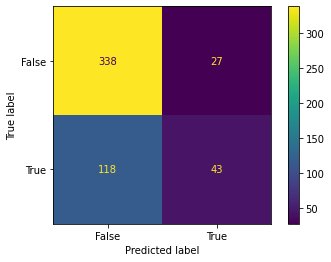

In [ ]:
# https://www.w3schools.com/python/python_ml_confusion_matrix.asp
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = h20_test_raw['cat_bin_actual']
predicted = h20_test_raw['cat_bin_predicted']

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
accuracy = metrics.accuracy_score(actual, predicted)
accuracy

0.7243346007604563

In [ ]:
precision = metrics.precision_score(actual, predicted)
precision

0.6142857142857143

In [ ]:
sensitivity_recall = metrics.recall_score(actual, predicted)
sensitivity_recall

0.2670807453416149

In [ ]:
specificity = metrics.recall_score(actual, predicted, pos_label=0)
specificity

0.9260273972602739

In [ ]:
F1_score = metrics.f1_score(actual, predicted)
F1_score

0.37229437229437234

In [ ]:
#metrics
print({"Accuracy":accuracy,"Precision":precision,
       "Sensitivity_recall":sensitivity_recall,
       "Specificity":specificity,
       "F1_score":F1_score})

{'Accuracy': 0.7243346007604563, 'Precision': 0.6142857142857143, 'Sensitivity_recall': 0.2670807453416149, 'Specificity': 0.9260273972602739, 'F1_score': 0.37229437229437234}


### TEST H2020 INDEZES CONFUSION MATRIX

In [ ]:
# df1 enthält die Topicnummern und ihre Bezeichnungen
df1 =  train_h19_model_topics[['Topic','Name']]
df1

Topic                                               Name
0      -1                       -1_deutschland_immer_spd_afd
1       0                          0_vögel_danke_wünsche_nix
2       1                  1_demokratie_wahl_parteien_partei
3       2                        2_hass_respekt_lügt_meinung
4       3                           3_erster_energie_the_och
5       4                            4_grünen_grüne_grün_rot
6       5                    5_kirchen_kirche_religion_geist
7       6            6_deutschland_deutschen_deutsche_berlin
8       7                     7_muslime_moslems_akbar_allahu
9       8             8_flüchtlinge_migranten_asyl_migration
10      9          9_vergewaltigt_mädchen_jährige_nigerianer
11     10                  10_kinder_schule_volkslehrer_kind
12     11         11_medien_journalisten_journalismus_presse
13     12                  12_tweet_twitter_account_twittern
14     13              13_essen_fressen_frosch_gammelfleisch
15     14        14_polizisten_polizei_abschiebungen_beamten
16     15     15_mitarbeiter_betroffen_mitarbeitern_schließt
17     16                 16_nazis_nazi_braunen_innenstädten
18     17         17_klimawandel_klima_erwärmung_klimaschutz
19     18               18_flüchtlinge_deutschland_euro_jahr
20     19                    19_video_youtube_videos_trailer
21     20                       20_zeiten_immer_schritt_mohr
22     21                  21_syrer_syrische_iraker_jährigen
23     22                   22_strom_autos_auto_elektroautos
24     23                 23_bilder_bild_editorial_paragraph
25     24                    24_bendit_cohn_daniel_spieglein
26     25             25_netz_speichern_speichert_ausgemacht
27     26           26_rassistisch_weiß_rassismus_anzufangen
28     27                       27_euro_kredite_audi_bargeld
29     28                   28_mord_skalpieren_fällt_notwehr
30     29                29_land_landteil_beginnen_vaterland
31     30                 30_clans_kriminelle_hinweis_begeht
32     31          31_italien_salvini_italienische_italiener
33     32              32_islam_deutschland_muslime_deutsche
34     33                 33_rebecca_instagram_endlich_sucht
35     34            34_österreich_europawahl_westen_gewinnt
36     35            35_afrika_herrenrasse_albert_schweitzer
37     36      36_merkel_hinterlässt_geigenkonzert_sauereien
38     37                  37_polizei_berliner_endlich_sucht
39     38                    38_stadt_straße_ückendorf_einst
40     39                39_milliarden_rente_rechnungen_robo
41     40             40_lieber_regierung_fastenbrechen_kern
42     41        41_propaganda_android_anstrengung_empfohlen
43     42                      42_hollywood_obm_kino_görlitz
44     43                          43_teil_satire_lach_humor
45     44                44_türken_türkei_türkischer_arabien
46     45      45_darpa_militärische_alliierten_umfangreiche
47     46             46_berlin_flughafen_amerika_hauptstadt
48     47           47_sundance_justnobody_löschung_bescheid
49     48                        48_fußball_liga_zwölf_sport
50     49  49_sozialismus_marktwirtschaft_soziale_kapital...
51     50                    50_grünen_deutschland_pro_grüne
52     51               51_russland_russische_putin_wladimir
53     52                  52_traum_hals_eigenheim_zugewinne
54     53            53_explosion_einsatz_zerstört_linköping
55     54                  54_schulen_bestimmt_berlin_rechts

In [ ]:
h20_test_pred_values_true_pos['Topic'] = h20_test_pred_values_true_pos.index
h20_test_pred_values_true_pos

pred    percent  Topic
-1     26  60.465116     -1
 0      6  13.953488      0
 4      4   9.302326      4
 13     2   4.651163     13
 16     2   4.651163     16
 9      1   2.325581      9
 2      1   2.325581      2
 44     1   2.325581     44

In [ ]:
# df2 bis df5 enthalten Vorhersagen, Topicanteile in Prozent sowie die Topicnr.
# dabei werden die Spalten umbenannt, damit es später beim Zusammenfügen nicht
# zu Doppelungen kommt
df2 = h20_test_pred_values_true_pos 
df2 = df2.rename(columns={'pred':'predH20TP', 'percent':'%H20TP', 'Topic':'Topic'})

In [ ]:
h20_test_pred_values_false_pos['Topic'] = h20_test_pred_values_false_pos.index
h20_test_pred_values_false_pos

pred    percent  Topic
-1     11  40.740741     -1
 16     5  18.518519     16
 0      3  11.111111      0
 4      3  11.111111      4
 1      2   7.407407      1
 13     1   3.703704     13
 44     1   3.703704     44
 7      1   3.703704      7

In [ ]:
df3 = h20_test_pred_values_false_pos
df3 = df3.rename(columns={'pred':'predH20FP', 'percent':'%H20FP', 'Topic':'Topic'})

In [ ]:
h20_test_pred_values_true_neg['Topic'] = h20_test_pred_values_true_neg.index
h20_test_pred_values_true_neg

pred    percent  Topic
-1    169  50.000000     -1
 0     56  16.568047      0
 4     23   6.804734      4
 36    13   3.846154     36
 16    12   3.550296     16
 6      8   2.366864      6
 2      8   2.366864      2
 3      7   2.071006      3
 1      5   1.479290      1
 10     4   1.183432     10
 39     3   0.887574     39
 44     3   0.887574     44
 7      3   0.887574      7
 42     2   0.591716     42
 43     2   0.591716     43
 9      2   0.591716      9
 32     2   0.591716     32
 27     1   0.295858     27
 23     1   0.295858     23
 28     1   0.295858     28
 22     1   0.295858     22
 15     1   0.295858     15
 5      1   0.295858      5
 8      1   0.295858      8
 18     1   0.295858     18
 13     1   0.295858     13
 47     1   0.295858     47
 24     1   0.295858     24
 25     1   0.295858     25
 34     1   0.295858     34
 50     1   0.295858     50
 26     1   0.295858     26
 20     1   0.295858     20

In [ ]:
df4 = h20_test_pred_values_true_neg
df4 = df4.rename(columns={'pred':'predH20TN', 'percent':'%H20TN', 'Topic':'Topic'})

In [ ]:
h20_test_pred_values_false_neg['Topic'] = h20_test_pred_values_false_neg.index
h20_test_pred_values_false_neg

pred    percent  Topic
-1     65  55.084746     -1
 0     19  16.101695      0
 2      4   3.389831      2
 13     4   3.389831     13
 38     3   2.542373     38
 4      3   2.542373      4
 1      3   2.542373      1
 9      2   1.694915      9
 24     2   1.694915     24
 7      2   1.694915      7
 8      2   1.694915      8
 6      2   1.694915      6
 10     1   0.847458     10
 51     1   0.847458     51
 11     1   0.847458     11
 12     1   0.847458     12
 23     1   0.847458     23
 3      1   0.847458      3
 36     1   0.847458     36

In [ ]:
df5 = h20_test_pred_values_false_neg
df5 = df5.rename(columns={'pred':'predH20FN', 'percent':'%H20FN', 'Topic':'Topic'})

In [ ]:
# https://stackoverflow.com/questions/44327999/how-to-merge-multiple-dataframes
from functools import reduce

data_frames = [df1, df2, df3, df4, df5]
df_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_merged[['%H20TP', '%H20TN','%H20FP', '%H20FN']] = df_merged[['%H20TP', '%H20TN','%H20FP', '%H20FN']].astype(float).round(2)
df_merged
#df_to_round = df_merged[['%H20', '%H20','%H20', '%H20']]
#df_to_round = df_to_round[['%H20', '%H20','%H20', '%H20']].round(2)
#df_to_round

Topic                                               Name predH20TP  \
0      -1                       -1_deutschland_immer_spd_afd      26.0   
1       0                          0_vögel_danke_wünsche_nix       6.0   
2       1                  1_demokratie_wahl_parteien_partei         0   
3       2                        2_hass_respekt_lügt_meinung       1.0   
4       3                           3_erster_energie_the_och         0   
5       4                            4_grünen_grüne_grün_rot       4.0   
6       5                    5_kirchen_kirche_religion_geist         0   
7       6            6_deutschland_deutschen_deutsche_berlin         0   
8       7                     7_muslime_moslems_akbar_allahu         0   
9       8             8_flüchtlinge_migranten_asyl_migration         0   
10      9          9_vergewaltigt_mädchen_jährige_nigerianer       1.0   
11     10                  10_kinder_schule_volkslehrer_kind         0   
12     11         11_medien_journalisten_journalismus_presse         0   
13     12                  12_tweet_twitter_account_twittern         0   
14     13              13_essen_fressen_frosch_gammelfleisch       2.0   
15     14        14_polizisten_polizei_abschiebungen_beamten         0   
16     15     15_mitarbeiter_betroffen_mitarbeitern_schließt         0   
17     16                 16_nazis_nazi_braunen_innenstädten       2.0   
18     17         17_klimawandel_klima_erwärmung_klimaschutz         0   
19     18               18_flüchtlinge_deutschland_euro_jahr         0   
20     19                    19_video_youtube_videos_trailer         0   
21     20                       20_zeiten_immer_schritt_mohr         0   
22     21                  21_syrer_syrische_iraker_jährigen         0   
23     22                   22_strom_autos_auto_elektroautos         0   
24     23                 23_bilder_bild_editorial_paragraph         0   
25     24                    24_bendit_cohn_daniel_spieglein         0   
26     25             25_netz_speichern_speichert_ausgemacht         0   
27     26           26_rassistisch_weiß_rassismus_anzufangen         0   
28     27                       27_euro_kredite_audi_bargeld         0   
29     28                   28_mord_skalpieren_fällt_notwehr         0   
30     29                29_land_landteil_beginnen_vaterland         0   
31     30                 30_clans_kriminelle_hinweis_begeht         0   
32     31          31_italien_salvini_italienische_italiener         0   
33     32              32_islam_deutschland_muslime_deutsche         0   
34     33                 33_rebecca_instagram_endlich_sucht         0   
35     34            34_österreich_europawahl_westen_gewinnt         0   
36     35            35_afrika_herrenrasse_albert_schweitzer         0   
37     36      36_merkel_hinterlässt_geigenkonzert_sauereien         0   
38     37                  37_polizei_berliner_endlich_sucht         0   
39     38                    38_stadt_straße_ückendorf_einst         0   
40     39                39_milliarden_rente_rechnungen_robo         0   
41     40             40_lieber_regierung_fastenbrechen_kern         0   
42     41        41_propaganda_android_anstrengung_empfohlen         0   
43     42                      42_hollywood_obm_kino_görlitz         0   
44     43                          43_teil_satire_lach_humor         0   
45     44                44_türken_türkei_türkischer_arabien       1.0   
46     45      45_darpa_militärische_alliierten_umfangreiche         0   
47     46             46_berlin_flughafen_amerika_hauptstadt         0   
48     47           47_sundance_justnobody_löschung_bescheid         0   
49     48                        48_fußball_liga_zwölf_sport         0   
50     49  49_sozialismus_marktwirtschaft_soziale_kapital...         0   
51     50                    50_grünen_deutschland_pro_grüne         0   
52     51               51_russland_russische_putin_wladimir         0   
53     5

In [ ]:
df_merged

Topic                                               Name predH20TP  \
0      -1                       -1_deutschland_immer_spd_afd      26.0   
1       0                          0_vögel_danke_wünsche_nix       6.0   
2       1                  1_demokratie_wahl_parteien_partei         0   
3       2                        2_hass_respekt_lügt_meinung       1.0   
4       3                           3_erster_energie_the_och         0   
5       4                            4_grünen_grüne_grün_rot       4.0   
6       5                    5_kirchen_kirche_religion_geist         0   
7       6            6_deutschland_deutschen_deutsche_berlin         0   
8       7                     7_muslime_moslems_akbar_allahu         0   
9       8             8_flüchtlinge_migranten_asyl_migration         0   
10      9          9_vergewaltigt_mädchen_jährige_nigerianer       1.0   
11     10                  10_kinder_schule_volkslehrer_kind         0   
12     11         11_medien_journalisten_journalismus_presse         0   
13     12                  12_tweet_twitter_account_twittern         0   
14     13              13_essen_fressen_frosch_gammelfleisch       2.0   
15     14        14_polizisten_polizei_abschiebungen_beamten         0   
16     15     15_mitarbeiter_betroffen_mitarbeitern_schließt         0   
17     16                 16_nazis_nazi_braunen_innenstädten       2.0   
18     17         17_klimawandel_klima_erwärmung_klimaschutz         0   
19     18               18_flüchtlinge_deutschland_euro_jahr         0   
20     19                    19_video_youtube_videos_trailer         0   
21     20                       20_zeiten_immer_schritt_mohr         0   
22     21                  21_syrer_syrische_iraker_jährigen         0   
23     22                   22_strom_autos_auto_elektroautos         0   
24     23                 23_bilder_bild_editorial_paragraph         0   
25     24                    24_bendit_cohn_daniel_spieglein         0   
26     25             25_netz_speichern_speichert_ausgemacht         0   
27     26           26_rassistisch_weiß_rassismus_anzufangen         0   
28     27                       27_euro_kredite_audi_bargeld         0   
29     28                   28_mord_skalpieren_fällt_notwehr         0   
30     29                29_land_landteil_beginnen_vaterland         0   
31     30                 30_clans_kriminelle_hinweis_begeht         0   
32     31          31_italien_salvini_italienische_italiener         0   
33     32              32_islam_deutschland_muslime_deutsche         0   
34     33                 33_rebecca_instagram_endlich_sucht         0   
35     34            34_österreich_europawahl_westen_gewinnt         0   
36     35            35_afrika_herrenrasse_albert_schweitzer         0   
37     36      36_merkel_hinterlässt_geigenkonzert_sauereien         0   
38     37                  37_polizei_berliner_endlich_sucht         0   
39     38                    38_stadt_straße_ückendorf_einst         0   
40     39                39_milliarden_rente_rechnungen_robo         0   
41     40             40_lieber_regierung_fastenbrechen_kern         0   
42     41        41_propaganda_android_anstrengung_empfohlen         0   
43     42                      42_hollywood_obm_kino_görlitz         0   
44     43                          43_teil_satire_lach_humor         0   
45     44                44_türken_türkei_türkischer_arabien       1.0   
46     45      45_darpa_militärische_alliierten_umfangreiche         0   
47     46             46_berlin_flughafen_amerika_hauptstadt         0   
48     47           47_sundance_justnobody_löschung_bescheid         0   
49     48                        48_fußball_liga_zwölf_sport         0   
50     49  49_sozialismus_marktwirtschaft_soziale_kapital...         0   
51     50                    50_grünen_deutschland_pro_grüne         0   
52     51               51_russland_russische_putin_wladimir         0   
53     5

In [ ]:
# https://stackoverflow.com/questions/15891038/change-column-type-in-pandas
# Die Anzahlen der vorhergesagten Topics werden in int umgewandelt
df_merged = df_merged.astype({"predH20TP": int, "predH20TN":int, "predH20FP":int, "predH20FN":int})
df_merged

Topic                                               Name  predH20TP  \
0      -1                       -1_deutschland_immer_spd_afd         26   
1       0                          0_vögel_danke_wünsche_nix          6   
2       1                  1_demokratie_wahl_parteien_partei          0   
3       2                        2_hass_respekt_lügt_meinung          1   
4       3                           3_erster_energie_the_och          0   
5       4                            4_grünen_grüne_grün_rot          4   
6       5                    5_kirchen_kirche_religion_geist          0   
7       6            6_deutschland_deutschen_deutsche_berlin          0   
8       7                     7_muslime_moslems_akbar_allahu          0   
9       8             8_flüchtlinge_migranten_asyl_migration          0   
10      9          9_vergewaltigt_mädchen_jährige_nigerianer          1   
11     10                  10_kinder_schule_volkslehrer_kind          0   
12     11         11_medien_journalisten_journalismus_presse          0   
13     12                  12_tweet_twitter_account_twittern          0   
14     13              13_essen_fressen_frosch_gammelfleisch          2   
15     14        14_polizisten_polizei_abschiebungen_beamten          0   
16     15     15_mitarbeiter_betroffen_mitarbeitern_schließt          0   
17     16                 16_nazis_nazi_braunen_innenstädten          2   
18     17         17_klimawandel_klima_erwärmung_klimaschutz          0   
19     18               18_flüchtlinge_deutschland_euro_jahr          0   
20     19                    19_video_youtube_videos_trailer          0   
21     20                       20_zeiten_immer_schritt_mohr          0   
22     21                  21_syrer_syrische_iraker_jährigen          0   
23     22                   22_strom_autos_auto_elektroautos          0   
24     23                 23_bilder_bild_editorial_paragraph          0   
25     24                    24_bendit_cohn_daniel_spieglein          0   
26     25             25_netz_speichern_speichert_ausgemacht          0   
27     26           26_rassistisch_weiß_rassismus_anzufangen          0   
28     27                       27_euro_kredite_audi_bargeld          0   
29     28                   28_mord_skalpieren_fällt_notwehr          0   
30     29                29_land_landteil_beginnen_vaterland          0   
31     30                 30_clans_kriminelle_hinweis_begeht          0   
32     31          31_italien_salvini_italienische_italiener          0   
33     32              32_islam_deutschland_muslime_deutsche          0   
34     33                 33_rebecca_instagram_endlich_sucht          0   
35     34            34_österreich_europawahl_westen_gewinnt          0   
36     35            35_afrika_herrenrasse_albert_schweitzer          0   
37     36      36_merkel_hinterlässt_geigenkonzert_sauereien          0   
38     37                  37_polizei_berliner_endlich_sucht          0   
39     38                    38_stadt_straße_ückendorf_einst          0   
40     39                39_milliarden_rente_rechnungen_robo          0   
41     40             40_lieber_regierung_fastenbrechen_kern          0   
42     41        41_propaganda_android_anstrengung_empfohlen          0   
43     42                      42_hollywood_obm_kino_görlitz          0   
44     43                          43_teil_satire_lach_humor          0   
45     44                44_türken_türkei_türkischer_arabien          1   
46     45      45_darpa_militärische_alliierten_umfangreiche          0   
47     46             46_berlin_flughafen_amerika_hauptstadt          0   
48     47           47_sundance_justnobody_löschung_bescheid          0   
49     48                        48_fußball_liga_zwölf_sport          0   
50     49  49_sozialismus_marktwirtschaft_soziale_kapital...          0   
51     50                    50_grünen_deutschland_pro_grüne          0   
52     51               51_ru

In [ ]:
df_percent = df_merged[['Topic','%H20TP', '%H20TN','%H20FP', '%H20FN','Name']]
df_percent

Topic  %H20TP  %H20TN  %H20FP  %H20FN  \
0      -1   60.47   50.00   40.74   55.08   
1       0   13.95   16.57   11.11   16.10   
2       1    0.00    1.48    7.41    2.54   
3       2    2.33    2.37    0.00    3.39   
4       3    0.00    2.07    0.00    0.85   
5       4    9.30    6.80   11.11    2.54   
6       5    0.00    0.30    0.00    0.00   
7       6    0.00    2.37    0.00    1.69   
8       7    0.00    0.89    3.70    1.69   
9       8    0.00    0.30    0.00    1.69   
10      9    2.33    0.59    0.00    1.69   
11     10    0.00    1.18    0.00    0.85   
12     11    0.00    0.00    0.00    0.85   
13     12    0.00    0.00    0.00    0.85   
14     13    4.65    0.30    3.70    3.39   
15     14    0.00    0.00    0.00    0.00   
16     15    0.00    0.30    0.00    0.00   
17     16    4.65    3.55   18.52    0.00   
18     17    0.00    0.00    0.00    0.00   
19     18    0.00    0.30    0.00    0.00   
20     19    0.00    0.00    0.00    0.00   
21     20    0.00    0.30    0.00    0.00   
22     21    0.00    0.00    0.00    0.00   
23     22    0.00    0.30    0.00    0.00   
24     23    0.00    0.30    0.00    0.85   
25     24    0.00    0.30    0.00    1.69   
26     25    0.00    0.30    0.00    0.00   
27     26    0.00    0.30    0.00    0.00   
28     27    0.00    0.30    0.00    0.00   
29     28    0.00    0.30    0.00    0.00   
30     29    0.00    0.00    0.00    0.00   
31     30    0.00    0.00    0.00    0.00   
32     31    0.00    0.00    0.00    0.00   
33     32    0.00    0.59    0.00    0.00   
34     33    0.00    0.00    0.00    0.00   
35     34    0.00    0.30    0.00    0.00   
36     35    0.00    0.00    0.00    0.00   
37     36    0.00    3.85    0.00    0.85   
38     37    0.00    0.00    0.00    0.00   
39     38    0.00    0.00    0.00    2.54   
40     39    0.00    0.89    0.00    0.00   
41     40    0.00    0.00    0.00    0.00   
42     41    0.00    0.00    0.00    0.00   
43     42    0.00    0.59    0.00    0.00   
44     43    0.00    0.59    0.00    0.00   
45     44    2.33    0.89    3.70    0.00   
46     45    0.00    0.00    0.00    0.00   
47     46    0.00    0.00    0.00    0.00   
48     47    0.00    0.30    0.00    0.00   
49     48    0.00    0.00    0.00    0.00   
50     49    0.00    0.00    0.00    0.00   
51     50    0.00    0.30    0.00    0.00   
52     51    0.00    0.00    0.00    0.85   
53     52    0.00    0.00    0.00    0.00   
54     53    0.00    0.00    0.00    0.00   
55     54    0.00    0.00    0.00    0.00   

                                                 Name  
0                        -1_deutschland_immer_spd_afd  
1                           0_vögel_danke_wünsche_nix  
2                   1_demokratie_wahl_parteien_partei  
3                         2_hass_respekt_lügt_meinung  
4                            3_erster_energie_the_och  
5                             4_grünen_grüne_grün_rot  
6                     5_kirchen_kirche_religion_geist  
7             6_deutschland_deutschen_deutsche_berlin  
8                      7_muslime_moslems_akbar_allahu  
9              8_flüchtlinge_migranten_asyl_migration  
10          9_vergewaltigt_mädchen_jährige_nigerianer  
11                  10_kinder_schule_volkslehrer_kind  
12         11_medien_journalisten_journalismus_presse  
13                  12_tweet_twitter_account_twittern  
14              13_essen_fressen_frosch_gammelfleisch  
15        14_polizisten_polizei_abschiebungen_beamten  
16     15_mitarbeiter_betroffen_mitarbeitern_schließt  
17                 16_nazis_nazi_braunen_innenstädten  
18         17_klimawandel_klima_erwärmung_klimaschutz  
19               18_flüchtlinge_deutschland_euro_jahr  
20                    19_video_youtube_videos_trailer  
21                       20_zeiten_immer_schritt_mohr  
22                  21_syrer_syrische_iraker_jährigen  
23                   22_strom_autos_auto_elektroautos  
24                 23_bilder_bild_edit

In [ ]:
test_h20_df_percent_plt_CONF_MATRIX = df_percent.set_index('Name')

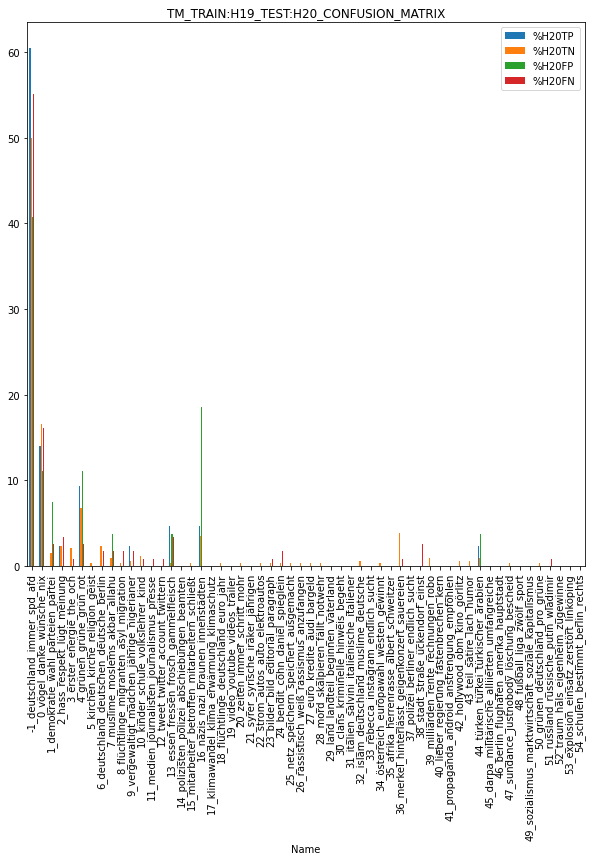

In [ ]:
test_h20_df_percent_plt_CONF_MATRIX.plot(y=['%H20TP', '%H20TN','%H20FP', '%H20FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:H19_TEST:H20_CONFUSION_MATRIX")

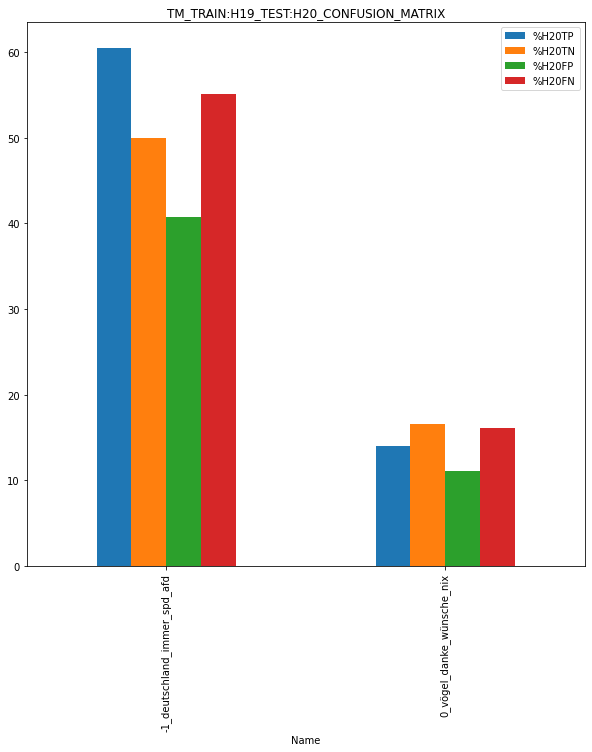

In [ ]:
test_h20_df_percent_plt_CONF_MATRIX[0:2].plot(y=['%H20TP', '%H20TN','%H20FP', '%H20FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:H19_TEST:H20_CONFUSION_MATRIX")

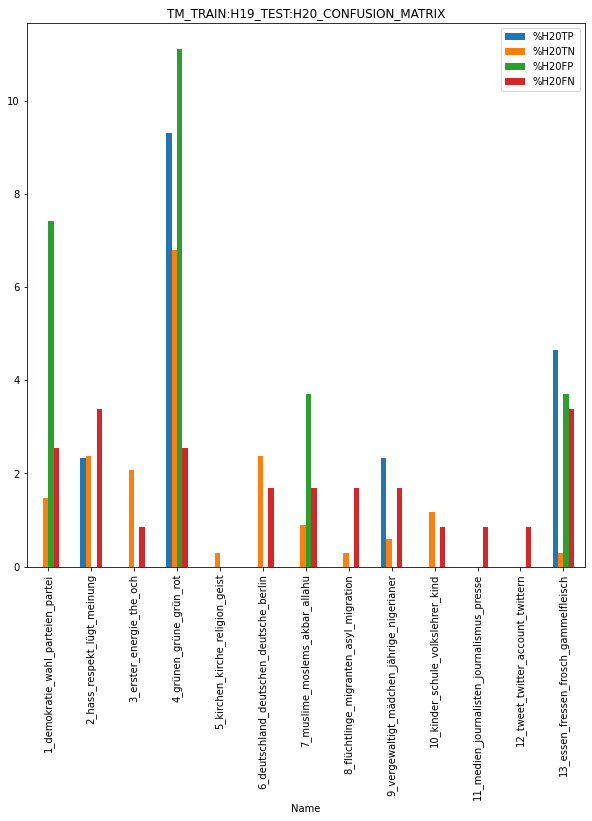

In [ ]:
test_h20_df_percent_plt_CONF_MATRIX[2:15].plot(y=['%H20TP', '%H20TN','%H20FP', '%H20FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:H19_TEST:H20_CONFUSION_MATRIX")

In [ ]:
#test_h20_df_percent_plt_CONF_MATRIX[15:].plot(y=['%H20TP', '%H20TN','%H20FP', '%H20FN'], 
#                                            kind="bar",figsize=(10, 10), 
#                                            title = 
#                                            "TM_TRAIN:H19_TEST:H20_CONFUSION_MATRIX")